<a href="https://colab.research.google.com/github/riabose2507/finance/blob/main/FinancialTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext google.colab.data_table
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
plt.style.use('seaborn')

# Loading Datasets

In [ ]:
#@title Loading Bitcoin Data
%%writefile bitcoin_data.csv
Date,Open,High,Low,Close,Volume
2016-12-17,785.17,792.51,784.86,790.83,78989800
2016-12-18,791.01,794.74,788.03,790.53,60524400
2016-12-19,790.69,793.61,790.32,792.71,74886400
2016-12-20,792.25,801.34,791.50,800.88,99629296
2016-12-21,800.64,834.28,799.41,834.28,155576000
2016-12-22,834.18,875.78,834.15,864.54,200027008
2016-12-23,864.89,925.12,864.68,921.98,275564000
2016-12-24,922.18,923.48,886.34,898.82,137727008
2016-12-25,899.65,899.65,862.42,896.18,143664992
2016-12-26,896.91,913.18,896.90,907.61,123771000
2016-12-27,908.35,940.05,904.26,933.20,167308000
2016-12-28,934.83,975.92,934.83,975.92,236630000
2016-12-29,975.13,979.40,954.50,973.50,199320000
2016-12-30,972.53,972.53,934.83,961.24,187474000
2016-12-31,960.63,963.74,947.24,963.74,99135104
2017-01-01,963.66,1003.08,958.70,998.33,147775008
2017-01-02,998.62,1031.39,996.70,1021.75,222184992
2017-01-03,1021.60,1044.08,1021.60,1043.84,185168000
2017-01-04,1044.40,1159.42,1044.40,1154.73,344945984
2017-01-05,1156.73,1191.10,910.42,1013.38,510199008
2017-01-06,1014.24,1046.81,883.94,902.20,351876000
2017-01-07,903.49,908.59,823.56,908.59,279550016
2017-01-08,908.17,942.72,887.25,911.20,158715008
2017-01-09,913.24,913.69,879.81,902.83,141876992
2017-01-10,902.44,914.87,901.06,907.68,115808000
2017-01-11,908.11,919.45,762.77,777.76,310928992
2017-01-12,775.18,826.25,755.76,804.83,222326000
2017-01-13,803.74,829.00,780.00,823.98,168968000
2017-01-14,825.14,835.09,812.46,818.41,93063296
2017-01-15,818.14,823.31,812.87,821.80,71013600
2017-01-16,821.78,834.53,820.27,831.53,82755200
2017-01-17,830.95,910.56,830.80,907.94,155095008
2017-01-18,909.37,917.50,858.30,886.62,225676992
2017-01-19,888.34,904.61,884.34,899.07,105625000
2017-01-20,898.17,899.40,887.01,895.03,86728400
2017-01-21,895.55,927.37,895.53,921.79,111158000
2017-01-22,922.21,937.53,897.56,924.67,116573000
2017-01-23,925.50,928.27,916.74,921.01,73588600
2017-01-24,910.68,924.15,892.29,892.69,111349000
2017-01-25,891.92,903.25,891.69,901.54,120831000
2017-01-26,902.40,919.33,902.22,917.59,131958000
2017-01-27,918.36,923.22,915.85,919.75,125594000
2017-01-28,919.81,923.91,919.81,921.59,68979600
2017-01-29,922.07,923.42,919.15,919.50,60851700
2017-01-30,920.15,923.05,919.47,920.38,78227296
2017-01-31,920.96,972.02,920.96,970.40,164582000
2017-02-01,970.94,989.11,970.74,989.02,150110000
2017-02-02,990.00,1013.52,983.22,1011.80,145820992
2017-02-03,1011.46,1033.87,1008.79,1029.91,201278000
2017-02-04,1031.33,1045.90,1015.16,1042.90,155064000
2017-02-05,1043.52,1043.63,1022.37,1027.34,114208000
2017-02-06,1028.40,1044.64,1028.16,1038.15,111762000
2017-02-07,1040.14,1061.93,1040.14,1061.35,146007008
2017-02-08,1062.32,1078.97,1037.49,1063.07,201855008
2017-02-09,1064.70,1088.99,953.34,994.38,407220000
2017-02-10,995.63,998.91,946.69,988.67,190452000
2017-02-11,988.90,1009.29,982.83,1004.45,102261000
2017-02-12,1003.52,1004.76,996.92,999.18,67530000
2017-02-13,998.89,1002.10,976.00,990.64,100607000
2017-02-14,991.73,1011.51,986.47,1004.55,137946000
2017-02-15,1006.21,1008.84,1001.58,1007.48,89759400
2017-02-16,1007.65,1033.37,1007.65,1027.44,122277000
2017-02-17,1026.12,1053.17,1025.64,1046.21,136474000
2017-02-18,1049.21,1061.10,1046.96,1054.42,99073504
2017-02-19,1054.76,1056.81,1043.46,1047.87,77423296
2017-02-20,1048.69,1080.49,1041.69,1079.98,109478000
2017-02-21,1079.28,1117.25,1076.93,1115.30,186868992
2017-02-22,1114.80,1125.39,1100.55,1117.44,136100000
2017-02-23,1117.27,1176.62,1116.96,1166.72,189454000
2017-02-24,1172.71,1200.39,1131.96,1173.68,330759008
2017-02-25,1170.41,1174.85,1124.59,1143.84,139960992
2017-02-26,1144.27,1167.47,1130.20,1165.20,116486000
2017-02-27,1163.78,1181.98,1163.38,1179.97,131570000
2017-02-28,1180.72,1193.25,1171.82,1179.97,184956000
2017-03-01,1180.04,1222.50,1179.69,1222.50,229056992
2017-03-02,1224.68,1262.13,1215.62,1251.01,368275008
2017-03-03,1250.71,1280.31,1250.71,1274.99,315739008
2017-03-04,1277.43,1279.40,1230.51,1255.15,183270000
2017-03-05,1254.29,1267.29,1238.06,1267.12,134127000
2017-03-06,1267.47,1276.00,1264.60,1272.83,153656992
2017-03-07,1273.21,1275.55,1204.80,1223.54,291256000
2017-03-08,1223.23,1232.16,1148.08,1150.00,332603008
2017-03-09,1150.35,1197.46,1141.23,1188.49,212283008
2017-03-10,1189.36,1270.47,1077.25,1116.72,563795968
2017-03-11,1116.32,1193.83,1116.32,1175.83,283320000
2017-03-12,1176.62,1226.98,1175.36,1221.38,227176000
2017-03-13,1221.78,1237.37,1217.03,1231.92,380276992
2017-03-14,1232.16,1244.81,1220.72,1240.00,245306000
2017-03-15,1240.16,1251.61,1239.75,1249.61,297804992
2017-03-16,1251.33,1257.98,1152.44,1187.81,638568000
2017-03-17,1180.16,1180.16,1099.57,1100.23,706598976
2017-03-18,1099.69,1114.07,957.66,973.82,621302016
2017-03-19,976.73,1069.91,976.73,1036.74,406648000
2017-03-20,1037.24,1063.03,1036.68,1054.23,286529984
2017-03-21,1055.36,1122.43,1055.36,1120.54,337391008
2017-03-22,1120.65,1120.65,1014.21,1049.14,380840992
2017-03-23,1050.05,1058.01,1028.93,1038.59,248540000
2017-03-24,1038.45,1040.47,934.36,937.52,491038016
2017-03-25,936.54,975.76,903.71,972.78,435803008
2017-03-26,974.02,1007.96,954.19,966.72,303668000
2017-03-27,972.05,1046.40,971.98,1045.77,372535008
2017-03-28,1044.58,1064.65,1027.73,1047.15,326332000
2017-03-29,1046.08,1055.13,1015.88,1039.97,298457984
2017-03-30,1042.21,1049.29,1020.04,1026.43,352968992
2017-03-31,1026.64,1074.92,1026.64,1071.79,447287008
2017-04-01,1071.71,1091.72,1061.09,1080.50,289633984
2017-04-02,1080.61,1107.59,1075.45,1102.17,514187008
2017-04-03,1102.95,1151.74,1102.95,1143.81,580444032
2017-04-04,1145.52,1156.44,1120.52,1133.25,436310016
2017-04-05,1134.14,1135.09,1113.63,1124.78,414784000
2017-04-06,1125.81,1188.37,1125.81,1182.68,511222016
2017-04-07,1178.94,1186.58,1163.39,1176.90,317022016
2017-04-08,1172.65,1184.98,1162.58,1175.95,209312000
2017-04-09,1176.57,1197.21,1171.86,1187.87,242343008
2017-04-10,1187.30,1190.34,1179.04,1187.13,215883008
2017-04-11,1187.46,1208.07,1187.46,1205.01,216182000
2017-04-12,1204.81,1207.14,1196.76,1200.37,288702016
2017-04-13,1201.02,1205.89,1156.44,1169.28,351968992
2017-04-14,1170.33,1190.80,1159.79,1167.54,254827008
2017-04-15,1167.30,1188.00,1164.96,1172.52,203559008
2017-04-16,1172.61,1187.22,1172.61,1182.94,183231008
2017-04-17,1183.25,1194.90,1172.65,1193.91,253206000
2017-04-18,1193.77,1217.57,1193.77,1211.67,270524000
2017-04-19,1212.13,1215.51,1205.08,1210.29,288060992
2017-04-20,1211.08,1240.79,1208.41,1229.08,315108000
2017-04-21,1229.42,1235.94,1215.56,1222.05,272167008
2017-04-22,1222.71,1235.56,1208.47,1231.71,249320000
2017-04-23,1231.92,1232.20,1203.94,1207.21,258951008
2017-04-24,1209.63,1250.94,1209.63,1250.15,235806000
2017-04-25,1250.45,1267.58,1249.97,1265.49,242556000
2017-04-26,1265.99,1294.83,1265.93,1281.08,329631008
2017-04-27,1281.88,1319.70,1281.30,1317.73,449196992
2017-04-28,1317.74,1331.28,1292.37,1316.48,527488992
2017-04-29,1317.84,1327.20,1315.21,1321.79,422705984
2017-04-30,1321.87,1347.91,1314.92,1347.89,413115008
2017-05-01,1348.30,1434.32,1348.30,1421.60,713624000
2017-05-02,1421.03,1473.90,1415.69,1452.82,477337984
2017-05-03,1453.78,1492.77,1447.49,1490.09,583795968
2017-05-04,1490.72,1608.91,1490.72,1537.67,933548992
2017-05-05,1540.87,1618.03,1530.31,1555.45,946035968
2017-05-06,1556.81,1578.80,1542.50,1578.80,582529984
2017-05-07,1579.47,1596.72,1559.76,1596.71,1080029952
2017-05-08,1596.92,1723.35,1596.92,1723.35,1340320000
2017-05-09,1723.89,1833.49,1716.30,1755.36,1167920000
2017-05-10,1756.52,1788.44,1719.10,1787.13,915723008
2017-05-11,1780.37,1873.93,1755.35,1848.57,799489984
2017-05-12,1845.76,1856.15,1694.01,1724.24,740984000
2017-05-13,1723.12,1812.99,1651.08,1804.91,579635008
2017-05-14,1800.86,1831.42,1776.62,1808.91,437196000
2017-05-15,1808.44,1812.80,1708.54,1738.43,731529024
2017-05-16,1741.70,1785.94,1686.54,1734.45,959044992
2017-05-17,1726.73,1864.05,1661.91,1839.09,1064729984
2017-05-18,1818.70,1904.48,1807.12,1888.65,894321024
2017-05-19,1897.37,2004.52,1890.25,1987.71,1157289984
2017-05-20,1984.24,2084.73,1974.92,2084.73,961336000
2017-05-21,2067.03,2119.08,2037.50,2041.20,1147859968
2017-05-22,2043.19,2303.90,2017.87,2173.40,1942220032
2017-05-23,2191.56,2320.82,2178.50,2320.42,1378749952
2017-05-24,2321.37,2523.72,2321.37,2443.64,1725379968
2017-05-25,2446.24,2763.71,2285.30,2304.98,2406700032
2017-05-26,2320.89,2573.79,2071.99,2202.42,1763480064
2017-05-27,2196.27,2260.20,1855.83,2038.87,1700480000
2017-05-28,2054.08,2267.34,2054.08,2155.80,1147139968
2017-05-29,2159.43,2307.05,2107.17,2255.61,994625024
2017-05-30,2255.36,2301.96,2124.57,2175.47,1443970048
2017-05-31,2187.19,2311.08,2145.57,2286.41,1544829952
2017-06-01,2288.33,2448.39,2288.33,2407.88,1653180032
2017-06-02,2404.03,2488.55,2373.32,2488.55,1317030016
2017-06-03,2493.72,2581.91,2423.57,2515.35,1514950016
2017-06-04,2547.79,2585.89,2452.54,2511.81,1355120000
2017-06-05,2512.40,2686.81,2510.22,2686.81,1369309952
2017-06-06,2690.84,2999.91,2690.84,2863.20,2089609984
2017-06-07,2869.38,2869.38,2700.56,2732.16,1517709952
2017-06-08,2720.49,2815.30,2670.95,2805.62,1281170048
2017-06-09,2807.44,2901.71,2795.62,2823.81,1348950016
2017-06-10,2828.14,2950.99,2746.55,2947.71,2018889984
2017-06-11,2942.41,2996.60,2840.53,2958.11,1752400000
2017-06-12,2953.22,2997.26,2518.56,2659.63,2569530112
2017-06-13,2680.91,2789.04,2650.38,2717.02,1781200000
2017-06-14,2716.88,2786.83,2412.94,2506.37,1696560000
2017-06-15,2499.58,2534.71,2212.96,2464.58,2026259968
2017-06-16,2469.57,2539.92,2385.15,2518.56,1195190016
2017-06-17,2514.01,2685.19,2484.96,2655.88,1534509952
2017-06-18,2655.35,2662.10,2516.33,2548.29,1178659968
2017-06-19,2549.03,2662.85,2549.03,2589.60,1446840064
2017-06-20,2591.26,2763.45,2589.82,2721.79,1854189952
2017-06-21,2709.43,2772.01,2660.40,2689.10,1626579968
2017-06-22,2691.03,2723.74,2642.36,2705.41,1097939968
2017-06-23,2707.34,2765.17,2706.37,2744.91,961318976
2017-06-24,2738.52,2757.94,2583.19,2608.72,982750016
2017-06-25,2607.25,2682.26,2552.12,2589.41,1161100032
2017-06-26,2590.57,2615.25,2376.29,2478.45,1663280000
2017-06-27,2478.45,2552.45,2332.99,2552.45,1489789952
2017-06-28,2553.03,2603.98,2484.42,2574.79,1183869952
2017-06-29,2567.56,2588.83,2510.48,2539.32,949979008
2017-06-30,2539.24,2559.25,2478.43,2480.84,860273024
2017-07-01,2492.60,2515.27,2419.23,2434.55,779913984
2017-07-02,2436.40,2514.28,2394.84,2506.47,803747008
2017-07-03,2498.56,2595.00,2480.47,2564.06,964112000
2017-07-04,2561.00,2631.59,2559.35,2601.64,985516032
2017-07-05,2602.87,2622.65,2538.55,2601.99,941566016
2017-07-06,2608.10,2616.72,2581.69,2608.56,761956992
2017-07-07,2608.59,2916.14,2498.87,2518.66,917411968
2017-07-08,2520.27,2571.34,2492.31,2571.34,733329984
2017-07-09,2572.61,2635.49,2517.59,2518.44,527856000
2017-07-10,2525.25,2537.16,2321.13,2372.56,1111200000
2017-07-11,2385.89,2413.47,2296.81,2337.79,1329760000
2017-07-12,2332.77,2423.71,2275.14,2398.84,1117410048
2017-07-13,2402.70,2425.22,2340.83,2357.90,835769984
2017-07-14,2360.59,2363.25,2183.22,2233.34,882502976
2017-07-15,2230.12,2231.14,1990.41,1998.86,993608000
2017-07-16,1991.98,2058.77,1843.03,1929.82,1182870016
2017-07-17,1932.62,2230.49,1932.62,2228.41,1201760000
2017-07-18,2233.52,2387.61,2164.77,2318.88,1512450048
2017-07-19,2323.08,2397.17,2260.23,2273.43,1245100032
2017-07-20,2269.89,2900.70,2269.89,2817.60,2249260032
2017-07-21,2838.41,2838.41,2621.85,2667.76,1489449984
2017-07-22,2668.63,2862.42,2657.71,2810.12,1177129984
2017-07-23,2808.10,2832.18,2653.94,2730.40,1072840000
2017-07-24,2732.70,2777.26,2699.19,2754.86,866473984
2017-07-25,2757.50,2768.08,2480.96,2576.48,1460089984
2017-07-26,2577.77,2610.76,2450.80,2529.45,937404032
2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000
2017-07-28,2679.73,2897.45,2679.73,2809.01,1380099968
2017-07-29,2807.02,2808.76,2692.80,2726.45,803745984
2017-07-30,2724.39,2758.53,2644.85,2757.18,705942976
2017-07-31,2763.24,2889.62,2720.61,2875.34,860574976
2017-08-01,2871.30,2921.35,2685.61,2718.26,1324669952
2017-08-02,2727.13,2762.53,2668.59,2710.67,1094950016
2017-08-03,2709.56,2813.31,2685.14,2804.73,804796992
2017-08-04,2806.93,2899.33,2743.72,2895.89,1002120000
2017-08-05,2897.63,3290.01,2874.83,3252.91,1945699968
2017-08-06,3257.61,3293.29,3155.60,3213.94,1105030016
2017-08-07,3212.78,3397.68,3180.89,3378.94,1482279936
2017-08-08,3370.22,3484.85,3345.83,3419.94,1752760064
2017-08-09,3420.40,3422.76,3247.67,3342.47,1468960000
2017-08-10,3341.84,3453.45,3319.47,3381.28,1515110016
2017-08-11,3373.82,3679.72,3372.12,3650.62,2021190016
2017-08-12,3650.63,3949.92,3613.70,3884.71,2219589888
2017-08-13,3880.04,4208.39,3857.80,4073.26,3159089920
2017-08-14,4066.10,4325.13,3989.16,4325.13,2463089920
2017-08-15,4326.99,4455.97,3906.18,4181.93,3258050048
2017-08-16,4200.34,4381.23,3994.42,4376.63,2272039936
2017-08-17,4384.44,4484.70,4243.71,4331.69,2553359872
2017-08-18,4324.34,4370.13,4015.40,4160.62,2941710080
2017-08-19,4137.75,4243.26,3970.55,4193.70,2975820032
2017-08-20,4189.31,4196.29,4069.88,4087.66,2109769984
2017-08-21,4090.48,4109.14,3988.60,4001.74,2800890112
2017-08-22,3998.35,4128.76,3674.58,4100.52,3764239872
2017-08-23,4089.01,4255.78,4078.41,4151.52,2369819904
2017-08-24,4137.60,4376.39,4130.26,4334.68,2037750016
2017-08-25,4332.82,4455.70,4307.35,4371.60,1727970048
2017-08-26,4372.06,4379.28,4269.52,4352.40,1511609984
2017-08-27,4345.10,4416.59,4317.29,4382.88,1537459968
2017-08-28,4384.45,4403.93,4224.64,4382.66,1959330048
2017-08-29,4389.21,4625.68,4352.13,4579.02,2486080000
2017-08-30,4570.36,4626.52,4471.41,4565.30,1937849984
2017-08-31,4555.59,4736.05,4549.40,4703.39,1944930048
2017-09-01,4701.76,4892.01,4678.53,4892.01,2599079936
2017-09-02,4901.42,4975.04,4469.24,4578.77,2722139904
2017-09-03,4585.27,4714.08,4417.59,4582.96,1933190016
2017-09-04,4591.63,4591.63,4108.40,4236.31,2987330048
2017-09-05,4228.29,4427.84,3998.11,4376.53,2697969920
2017-09-06,4376.59,4617.25,4376.59,4597.12,2172100096
2017-09-07,4589.14,4655.04,4491.33,4599.88,1844620032
2017-09-08,4605.16,4661.00,4075.18,4228.75,2700890112
2017-09-09,4229.81,4308.82,4114.11,4226.06,1386230016
2017-09-10,4229.34,4245.44,3951.04,4122.94,1679090048
2017-09-11,4122.47,4261.67,4099.40,4161.27,1557330048
2017-09-12,4168.88,4344.65,4085.22,4130.81,1864530048
2017-09-13,4131.98,4131.98,3789.92,3882.59,2219409920
2017-09-14,3875.37,3920.60,3153.86,3154.95,2716310016
2017-09-15,3166.30,3733.45,2946.62,3637.52,4148069888
2017-09-16,3637.75,3808.84,3487.79,3625.04,1818400000
2017-09-17,3606.28,3664.81,3445.64,3582.88,1239149952
2017-09-18,3591.09,4079.23,3591.09,4065.20,1943209984
2017-09-19,4073.79,4094.07,3868.87,3924.97,1563980032
2017-09-20,3916.36,4031.39,3857.73,3905.95,1213830016
2017-09-21,3901.47,3916.42,3613.63,3631.04,1411480064
2017-09-22,3628.02,3758.27,3553.53,3630.70,1194829952
2017-09-23,3629.92,3819.21,3594.58,3792.40,928113984
2017-09-24,3796.15,3796.15,3666.90,3682.84,768014976
2017-09-25,3681.58,3950.25,3681.58,3926.07,1374210048
2017-09-26,3928.41,3969.89,3869.90,3892.35,1043740032
2017-09-27,3892.94,4210.05,3884.82,4200.67,1686880000
2017-09-28,4197.13,4279.31,4109.70,4174.73,1712320000
2017-09-29,4171.62,4214.63,4039.29,4163.07,1367049984
2017-09-30,4166.11,4358.43,4160.86,4338.71,1207449984
2017-10-01,4341.05,4403.74,4269.81,4403.74,1208210048
2017-10-02,4395.81,4470.23,4377.46,4409.32,1431730048
2017-10-03,4408.46,4432.47,4258.89,4317.48,1288019968
2017-10-04,4319.37,4352.31,4210.42,4229.36,1116770048
2017-10-05,4229.88,4362.64,4164.05,4328.41,1161769984
2017-10-06,4324.46,4413.27,4320.53,4370.81,1069939968
2017-10-07,4369.35,4443.88,4321.05,4426.89,906928000
2017-10-08,4429.67,4624.14,4405.64,4610.48,1313869952
2017-10-09,4614.52,4878.71,4564.25,4772.02,1968739968
2017-10-10,4776.21,4922.17,4765.10,4781.99,1597139968
2017-10-11,4789.25,4873.73,4751.63,4826.48,1222279936
2017-10-12,4829.58,5446.91,4822.00,5446.91,2791610112
2017-10-13,5464.16,5840.30,5436.85,5647.21,3615480064
2017-10-14,5643.53,5837.70,5591.64,5831.79,1669030016
2017-10-15,5835.96,5852.48,5478.61,5678.19,1976039936
2017-10-16,5687.57,5776.23,5544.21,5725.59,2008070016
2017-10-17,5741.58,5800.35,5472.72,5605.51,1821570048
2017-10-18,5603.82,5603.82,5151.44,5590.69,2399269888
2017-10-19,5583.74,5744.35,5531.06,5708.52,1780540032
2017-10-20,5708.11,6060.11,5627.23,6011.45,2354429952
2017-10-21,5996.79,6194.88,5965.07,6031.60,2207099904
2017-10-22,6036.66,6076.26,5792.34,6008.42,2034630016
2017-10-23,6006.00,6075.59,5732.47,5930.32,2401840128
2017-10-24,5935.52,5935.52,5504.18,5526.64,2735699968
2017-10-25,5524.60,5754.33,5397.88,5750.80,1966989952
2017-10-26,5747.95,5976.80,5721.22,5904.83,1905040000
2017-10-27,5899.74,5988.39,5728.82,5780.90,1710130048
2017-10-28,5787.82,5876.72,5689.19,5753.09,1403920000
2017-10-29,5754.44,6255.71,5724.58,6153.85,2859040000
2017-10-30,6114.85,6214.99,6040.85,6130.53,1772150016
2017-10-31,6132.02,6470.43,6103.33,6468.40,2311379968
2017-11-01,6440.97,6767.31,6377.88,6767.31,2870320128
2017-11-02,6777.77,7367.33,6758.72,7078.50,4653770240
2017-11-03,7087.53,7461.29,7002.94,7207.76,3369860096
2017-11-04,7164.48,7492.86,7031.28,7379.95,2483800064
2017-11-05,7404.52,7617.48,7333.19,7407.41,2380410112
2017-11-06,7403.22,7445.77,7007.31,7022.76,3111899904
2017-11-07,7023.10,7253.32,7023.10,7144.38,2326340096
2017-11-08,7141.38,7776.42,7114.02,7459.69,4602200064
2017-11-09,7446.83,7446.83,7101.52,7143.58,3226249984
2017-11-10,7173.73,7312.00,6436.87,6618.14,5208249856
2017-11-11,6618.61,6873.15,6204.22,6357.60,4908680192
2017-11-12,6295.45,6625.05,5519.01,5950.07,8957349888
2017-11-13,5938.25,6811.19,5844.29,6559.49,6263249920
2017-11-14,6561.48,6764.98,6461.75,6635.75,3197110016
2017-11-15,6634.76,7342.25,6634.76,7315.54,4200880128
2017-11-16,7323.24,7967.38,7176.58,7871.69,5123809792
2017-11-17,7853.57,8004.59,7561.09,7708.99,4651670016
2017-11-18,7697.21,7884.99,7463.44,7790.15,3667190016
2017-11-19,7766.03,8101.91,7694.10,8036.49,3149319936
2017-11-20,8039.07,8336.86,7949.36,8200.64,3488450048
2017-11-21,8205.74,8348.66,7762.71,8071.26,4277609984
2017-11-22,8077.95,8302.26,8075.47,8253.55,3633530112
2017-11-23,8232.38,8267.40,8038.77,8038.77,4225179904
2017-11-24,8074.02,8374.16,7940.93,8253.69,5058610176
2017-11-25,8241.71,8790.92,8191.15,8790.92,4342060032
2017-11-26,8789.04,9522.93,8775.59,9330.55,5475579904
2017-11-27,9352.72,9818.35,9352.72,9818.35,5653320192
2017-11-28,9823.43,10125.70,9736.30,10058.80,6348819968
2017-11-29,10077.40,11517.40,9601.03,9888.61,11568799744
2017-11-30,9906.79,10801.00,9202.05,10233.60,8310689792
2017-12-01,10198.60,11046.70,9694.65,10975.60,6783119872
2017-12-02,10978.30,11320.20,10905.10,11074.60,5138500096
2017-12-03,11082.70,11858.70,10862.00,11323.20,6608309760
2017-12-04,11315.40,11657.20,11081.80,11657.20,6132409856
2017-12-05,11685.70,12032.00,11604.60,11916.70,6895260160
2017-12-06,11923.40,14369.10,11923.40,14291.50,12656300032
2017-12-07,14266.10,17899.70,14057.30,17899.70,17950699520
2017-12-08,17802.90,18353.40,14336.90,16569.40,21135998976
2017-12-09,16523.30,16783.00,13674.90,15178.20,13911300096
2017-12-10,15168.40,15850.60,13226.60,15455.40,13433299968
2017-12-11,15427.40,17513.90,15404.80,16936.80,12153900032
2017-12-12,16919.80,17781.80,16571.60,17415.40,14603799552
2017-12-13,17500.00,17653.10,16039.70,16408.20,12976900096
2017-12-14,16384.60,17085.80,16185.90,16564.00,13777399808
2017-12-15,16601.30,18154.10,16601.30,17706.90,14309999616
2017-12-16,17760.30,19716.70,17515.30,19497.40,12740599808
2017-12-17,19475.80,20089.00,18974.10,19140.80,13314599936
2017-12-18,19106.40,19371.00,18355.90,19114.20,14839499776
2017-12-19,19118.30,19177.80,17275.40,17776.70,16894499840
2017-12-20,17760.30,17934.70,16077.70,16624.60,22149699584
2017-12-21,16642.40,17567.70,15342.70,15802.90,16516599808
2017-12-22,15898.00,15943.40,11833.00,13831.80,22197999616
2017-12-23,13948.70,15603.20,13828.80,14699.20,13086000128
2017-12-24,14608.20,14626.00,12747.70,13925.80,11572299776
2017-12-25,13995.90,14593.00,13448.90,14026.60,10664699904
2017-12-26,14036.60,16461.20,14028.90,16099.80,13454300160
2017-12-27,16163.50,16930.90,15114.30,15838.50,12487600128
2017-12-28,15864.10,15888.40,13937.30,14606.50,12336499712
2017-12-29,14695.80,15279.00,14307.00,14656.20,13025500160
2017-12-30,14681.90,14681.90,12350.10,12952.20,14452599808
2017-12-31,12897.70,14377.40,12755.60,14156.40,12136299520
2018-01-01,14112.20,14112.20,13154.70,13657.20,10291200000
2018-01-02,13625.00,15444.60,13163.60,14982.10,16846600192
2018-01-03,14978.20,15572.80,14844.50,15201.00,16871900160
2018-01-04,15270.70,15739.70,14522.20,15599.20,21783199744
2018-01-05,15477.20,17705.20,15202.80,17429.50,23840899072
2018-01-06,17462.10,17712.40,16764.60,17527.00,18314600448
2018-01-07,17527.30,17579.60,16087.70,16477.60,15866000384
2018-01-08,16476.20,16537.90,14208.20,15170.10,18413899776
2018-01-09,15123.70,15497.50,14424.00,14595.40,16659999744
2018-01-10,14588.50,14973.30,13691.20,14973.30,18500800512
2018-01-11,14968.20,15018.80,13105.90,13405.80,16534099968
2018-01-12,13453.90,14229.90,13158.10,13980.60,12065699840
2018-01-13,13952.40,14659.50,13952.40,14360.20,12763599872
2018-01-14,14370.80,14511.80,13268.00,13772.00,11084099584
2018-01-15,13767.30,14445.50,13641.70,13819.80,12750799872
2018-01-16,13836.10,13843.10,10194.90,11490.50,18853799936
2018-01-17,11431.10,11678.00,9402.29,11188.60,18830600192
2018-01-18,11198.80,12107.30,10942.50,11474.90,15020399616
2018-01-19,11429.80,11992.80,11172.10,11607.40,10740400128
2018-01-20,11656.20,13103.00,11656.20,12899.20,11801700352
2018-01-21,12889.20,12895.90,11288.20,11600.10,9935179776
2018-01-22,11633.10,11966.40,10240.20,10931.40,10537400320
2018-01-23,10944.50,11377.60,10129.70,10868.40,9660609536
2018-01-24,10903.40,11501.40,10639.80,11359.40,9940989952
2018-01-25,11421.70,11785.70,11057.40,11259.40,8873169920
2018-01-26,11256.00,11656.70,10470.30,11171.40,9746199552
2018-01-27,11174.90,11614.90,10989.20,11440.70,7583269888
2018-01-28,11475.30,12040.30,11475.30,11786.30,8350360064
2018-01-29,11755.50,11875.60,11179.20,11296.40,7107359744
2018-01-30,11306.80,11307.20,10036.20,10106.30,8637859840
2018-01-31,10108.20,10381.60,9777.42,10221.10,8041160192
2018-02-01,10237.30,10288.80,8812.28,9170.54,9959400448
2018-02-02,9142.28,9142.28,7796.49,8830.75,12726899712
2018-02-03,8852.12,9430.75,8251.63,9174.91,7263790080
2018-02-04,9175.70,9334.87,8031.22,8277.01,7073549824
2018-02-05,8270.54,8364.84,6756.68,6955.27,9285289984
2018-02-06,7051.75,7850.70,6048.26,7754.00,13999800320
2018-02-07,7755.49,8509.11,7236.79,7621.30,9169280000
2018-02-08,7637.86,8558.77,7637.86,8265.59,9346750464
2018-02-09,8271.84,8736.98,7884.71,8736.98,6784820224
2018-02-10,8720.08,9122.55,8295.47,8621.90,7780960256
2018-02-11,8616.13,8616.13,7931.10,8129.97,6122189824
2018-02-12,8141.43,8985.92,8141.43,8926.57,6256439808
2018-02-13,8926.72,8958.47,8455.41,8598.31,5696719872
2018-02-14,8599.92,9518.54,8599.92,9494.63,7909819904
2018-02-15,9488.32,10234.80,9395.58,10166.40,9062540288
2018-02-16,10135.70,10324.10,9824.82,10233.90,7296159744
2018-02-17,10207.50,11139.50,10149.40,11112.70,8660880384
2018-02-18,11123.40,11349.80,10326.00,10551.80,8744009728
2018-02-19,10552.60,11273.80,10513.20,11225.30,7652089856
2018-02-20,11231.80,11958.50,11231.80,11403.70,9926540288
2018-02-21,11372.20,11418.50,10479.10,10690.40,9405339648
2018-02-22,10660.40,11039.10,9939.09,10005.00,8040079872
2018-02-23,9937.07,10487.30,9734.56,10301.10,7739500032
2018-02-24,10287.70,10597.20,9546.97,9813.07,6917929984
2018-02-25,9796.42,9923.22,9407.06,9664.73,5706939904
2018-02-26,9669.43,10475.00,9501.73,10366.70,7287690240
2018-02-27,10393.90,10878.50,10246.10,10725.60,6966179840
2018-02-28,10687.20,11089.80,10393.10,10397.90,6936189952
2018-03-01,10385.00,11052.30,10352.70,10951.00,7317279744
2018-03-02,10977.40,11189.00,10850.10,11086.40,7620590080
2018-03-03,11101.90,11528.20,11002.40,11489.70,6690570240
2018-03-04,11497.40,11512.60,11136.10,11512.60,6084149760
2018-03-05,11532.40,11704.10,11443.90,11573.30,6468539904
2018-03-06,11500.10,11500.10,10694.30,10779.90,6832169984
2018-03-07,10803.90,10929.50,9692.12,9965.57,8797910016
2018-03-08,9951.44,10147.40,9335.87,9395.01,7186089984
2018-03-09,9414.69,9466.35,8513.03,9337.55,8704190464
2018-03-10,9350.59,9531.32,8828.47,8866.00,5386319872
2018-03-11,8852.78,9711.89,8607.12,9578.63,6296370176
2018-03-12,9602.93,9937.50,8956.43,9205.12,6457399808
2018-03-13,9173.04,9470.38,8958.19,9194.85,5991139840
2018-03-14,9214.65,9355.85,8068.59,8269.81,6438230016
2018-03-15,8290.76,8428.35,7783.05,8300.86,6834429952
2018-03-16,8322.91,8585.15,8005.31,8338.35,5289379840
2018-03-17,8321.91,8346.53,7812.82,7916.88,4426149888
2018-03-18,7890.52,8245.51,7397.99,8223.68,6639190016
2018-03-19,8344.12,8675.87,8182.40,8630.65,6729110016
2018-03-20,8619.67,9051.02,8389.89,8913.47,6361789952
2018-03-21,8937.48,9177.37,8846.33,8929.28,6043129856
2018-03-22,8939.44,9100.71,8564.90,8728.47,5530390016
2018-03-23,8736.25,8879.62,8360.62,8879.62,5954120192
2018-03-24,8901.95,8996.18,8665.70,8668.12,5664600064
2018-03-25,8612.81,8682.01,8449.10,8495.78,4569880064
2018-03-26,8498.47,8530.08,7921.43,8209.40,5921039872
2018-03-27,8200.00,8232.78,7797.28,7833.04,5378250240
2018-03-28,7836.83,8122.89,7809.17,7954.48,4935289856
2018-03-29,7979.07,7994.33,7081.38,7165.70,6361229824
2018-03-30,7171.45,7276.66,6683.93,6890.52,6289509888
2018-03-31,6892.48,7207.85,6863.52,6973.53,4553269760
2018-04-01,7003.06,7060.95,6526.87,6844.23,4532100096
2018-04-02,6844.86,7135.47,6816.58,7083.80,4333440000
2018-04-03,7102.26,7530.94,7072.49,7456.11,5499700224
2018-04-04,7456.41,7469.88,6803.88,6853.84,4936000000
2018-04-05,6848.65,6933.82,6644.80,6811.47,5639320064
2018-04-06,6815.96,6857.49,6575.00,6636.32,3766810112
2018-04-07,6630.51,7050.54,6630.51,6911.09,3976610048
2018-04-08,6919.98,7111.56,6919.98,7023.52,3652499968
2018-04-09,7044.32,7178.11,6661.99,6770.73,4894060032
2018-04-10,6795.44,6872.41,6704.15,6834.76,4272750080
2018-04-11,6843.47,6968.32,6817.59,6968.32,4641889792
2018-04-12,6955.38,7899.23,6806.51,7889.25,8906250240
2018-04-13,7901.09,8183.96,7758.93,7895.96,7764460032
2018-04-14,7874.67,8140.71,7846.00,7986.24,5191430144
2018-04-15,7999.33,8338.42,7999.33,8329.11,5244480000
2018-04-16,8337.57,8371.15,7925.73,8058.67,5631309824
2018-04-17,8071.66,8285.96,7881.72,7902.09,6900879872
2018-04-18,7944.43,8197.80,7886.01,8163.42,6529909760
2018-04-19,8159.27,8298.69,8138.78,8294.31,7063209984
2018-04-20,8286.88,8880.23,8244.54,8845.83,8438110208
2018-04-21,8848.79,8997.57,8652.15,8895.58,7548550144
2018-04-22,8925.06,9001.64,8779.61,8802.46,6629899776
2018-04-23,8794.39,8958.55,8788.81,8930.88,6925190144
2018-04-24,8934.34,9732.61,8927.83,9697.50,10678800384
2018-04-25,9701.03,9745.32,8799.84,8845.74,11083100160
2018-04-26,8867.32,9281.51,8727.09,9281.51,8970559488
2018-04-27,9290.63,9375.47,8987.05,8987.05,7566289920
2018-04-28,8939.27,9412.09,8931.99,9348.48,7805479936
2018-04-29,9346.41,9531.49,9193.71,9419.08,8853000192
2018-04-30,9426.11,9477.14,9166.81,9240.55,8673920000
2018-05-01,9251.47,9255.88,8891.05,9119.01,7713019904
2018-05-02,9104.60,9256.52,9015.14,9235.92,7558159872
2018-05-03,9233.97,9798.33,9188.15,9743.86,10207299584
2018-05-04,9695.50,9779.20,9585.96,9700.76,8217829888
2018-05-05,9700.28,9964.50,9695.12,9858.15,7651939840
2018-05-06,9845.31,9940.14,9465.25,9654.80,7222280192
2018-05-07,9645.67,9665.85,9231.53,9373.01,7394019840
2018-05-08,9380.87,9462.75,9127.77,9234.82,7415869952
2018-05-09,9223.73,9374.76,9031.62,9325.18,7226890240
2018-05-10,9325.96,9396.04,9040.52,9043.94,6906699776
2018-05-11,9052.96,9052.96,8394.46,8441.49,8488520192
2018-05-12,8441.44,8664.86,8223.50,8504.89,6821380096
2018-05-13,8515.49,8773.55,8395.12,8723.94,5866379776
2018-05-14,8713.10,8881.12,8367.97,8716.79,7364149760
2018-05-15,8705.19,8836.19,8456.45,8510.38,6705710080
2018-05-16,8504.41,8508.43,8175.49,8368.83,6760220160
2018-05-17,8370.05,8445.54,8054.12,8094.32,5862530048
2018-05-18,8091.83,8274.12,7974.82,8250.97,5764190208
2018-05-19,8255.73,8372.06,8183.35,8247.18,4712399872
2018-05-20,8246.99,8562.41,8205.24,8513.25,5191059968
2018-05-21,8522.33,8557.52,8365.12,8418.99,5154990080
2018-05-22,8419.87,8423.25,8004.58,8041.78,5137010176
2018-05-23,8037.08,8054.66,7507.88,7557.82,6491120128
2018-05-24,7561.12,7738.60,7331.14,7587.34,6049220096
2018-05-25,7592.30,7659.14,7392.65,7480.14,4867829760
2018-05-26,7486.48,7595.16,7349.12,7355.88,4051539968
2018-05-27,7362.08,7381.74,7270.96,7368.22,4056519936
2018-05-28,7371.31,7419.05,7100.89,7135.99,5040600064
2018-05-29,7129.46,7526.42,7090.68,7472.59,5662660096
2018-05-30,7469.73,7573.77,7313.60,7406.52,4922540032
2018-05-31,7406.15,7608.90,7361.13,7494.17,5127130112
2018-06-01,7500.70,7604.73,7407.34,7541.45,4921460224
2018-06-02,7536.72,7695.83,7497.26,7643.45,4939299840
2018-06-03,7632.09,7754.89,7613.04,7720.25,4851760128
2018-06-04,7722.53,7753.82,7474.04,7514.47,4993169920
2018-06-05,7500.90,7643.23,7397.00,7633.76,4961739776
2018-06-06,7625.97,7680.43,7502.01,7653.98,4692259840
2018-06-07,7650.82,7741.27,7650.82,7678.24,4485799936
2018-06-08,7685.14,7698.19,7558.40,7624.92,4227579904
2018-06-09,7632.52,7683.58,7531.98,7531.98,3845220096
2018-06-10,7499.55,7499.55,6709.07,6786.02,5804839936
2018-06-11,6799.29,6910.18,6706.63,6906.92,4745269760
2018-06-12,6905.82,6907.96,6542.08,6582.36,4654380032
2018-06-13,6596.88,6631.66,6285.63,6349.90,5052349952
2018-06-14,6342.75,6707.14,6334.46,6675.35,5138710016
2018-06-15,6674.08,6681.08,6433.87,6456.58,3955389952
2018-06-16,6455.45,6592.49,6402.29,6550.16,3194170112
2018-06-17,6545.53,6589.11,6499.27,6499.27,3104019968
2018-06-18,6510.07,6781.14,6446.68,6734.82,4039200000
2018-06-19,6742.39,6822.50,6709.92,6769.94,4057029888
2018-06-20,6770.76,6821.56,6611.88,6776.55,3888640000
2018-06-21,6780.09,6810.94,6715.17,6729.74,3529129984
2018-06-22,6737.88,6747.08,6006.60,6083.69,5079810048
2018-06-23,6090.10,6224.82,6071.81,6162.48,3431360000
2018-06-24,6164.28,6223.78,5826.41,6173.23,4566909952
2018-06-25,6171.97,6327.37,6119.68,6249.18,5500810240
2018-06-26,6253.55,6290.16,6093.67,6093.67,3279759872
2018-06-27,6084.40,6180.00,6052.85,6157.13,3296219904
2018-06-28,6153.16,6170.41,5873.05,5903.44,3467800064
2018-06-29,5898.13,6261.66,5835.75,6218.30,3966230016
2018-06-30,6214.22,6465.51,6214.22,6404.00,4543860224
2018-07-01,6411.68,6432.85,6289.29,6385.82,4788259840
2018-07-02,6380.38,6683.86,6305.70,6614.18,4396930048
2018-07-03,6596.66,6671.37,6447.75,6529.59,4672309760
2018-07-04,6550.87,6771.92,6450.46,6597.55,4176689920
2018-07-05,6599.71,6749.54,6546.65,6639.14,4999240192
2018-07-06,6638.69,6700.94,6533.55,6673.50,4313959936
2018-07-07,6668.71,6863.99,6579.24,6856.93,3961080064
2018-07-08,6857.80,6885.91,6747.98,6773.88,3386210048
2018-07-09,6775.08,6838.68,6724.34,6741.75,3718129920
2018-07-10,6739.21,6767.74,6320.72,6329.95,4052430080
2018-07-11,6330.77,6444.96,6330.47,6394.71,3644859904
2018-07-12,6396.78,6397.10,6136.42,6228.81,3770170112
2018-07-13,6235.03,6310.55,6192.24,6238.05,3805400064
2018-07-14,6247.50,6298.19,6212.22,6276.12,2923670016
2018-07-15,6272.70,6403.46,6256.51,6359.64,3285459968
2018-07-16,6357.01,6741.75,6357.01,6741.75,4725799936
2018-07-17,6739.65,7387.24,6684.17,7321.04,5961950208
2018-07-18,7315.32,7534.99,7280.47,7370.78,6103410176
2018-07-19,7378.20,7494.46,7295.46,7466.86,5111629824
2018-07-20,7467.40,7594.67,7323.26,7354.13,4936869888
2018-07-21,7352.72,7437.64,7262.41,7419.29,3726609920
2018-07-22,7417.80,7537.95,7383.82,7418.49,3695460096
2018-07-23,7414.71,7771.50,7409.10,7711.11,5132480000
2018-07-24,7716.51,8424.27,7705.50,8424.27,7277689856
2018-07-25,8379.66,8416.87,8086.36,8181.39,5845400064
2018-07-26,8176.85,8290.33,7878.71,7951.58,4899089920
2018-07-27,7950.40,8262.66,7839.76,8165.01,5195879936
2018-07-28,8169.06,8222.85,8110.77,8192.15,3988750080
2018-07-29,8205.82,8272.26,8141.18,8218.46,4107190016
2018-07-30,8221.58,8235.50,7917.50,8180.48,5551400000
2018-07-31,8181.20,8181.53,7696.93,7780.44,5287530000
2018-08-01,7769.04,7769.04,7504.95,7624.91,4797620000
2018-08-02,7634.19,7712.77,7523.44,7567.15,4214110000
2018-08-03,7562.14,7562.14,7328.65,7434.39,4627150000
2018-08-04,7438.67,7497.49,6984.07,7032.85,4268390000
2018-08-05,7031.08,7102.77,6940.70,7068.48,3679110000
2018-08-06,7062.94,7166.55,6890.54,6951.80,3925900000
2018-08-07,6958.32,7146.56,6748.24,6753.12,4682800000
2018-08-08,6746.85,6746.85,6226.22,6305.80,5064430000
2018-08-09,6305.56,6625.73,6249.07,6568.23,4267040000
2018-08-10,6571.42,6591.26,6124.52,6184.71,4528680000
2018-08-11,6185.79,6455.74,6109.03,6295.73,4047850000
2018-08-12,6283.65,6409.85,6237.50,6322.69,5665250000
2018-08-13,6341.36,6537.05,6225.72,6297.57,4083980000
2018-08-14,6287.66,6287.94,5971.05,6199.71,5301700000
2018-08-15,6221.42,6588.49,6221.42,6308.52,4895450000
2018-08-16,6294.23,6473.50,6276.41,6334.73,4328420000
2018-08-17,6340.91,6582.50,6324.97,6580.63,4992990000
2018-08-18,6583.43,6617.35,6353.73,6423.76,3984520000
2018-08-19,6422.57,6537.98,6361.55,6506.07,3311170000
2018-08-20,6500.51,6536.92,6297.93,6308.53,3665100000
2018-08-21,6301.07,6500.87,6298.24,6488.76,3377180000
2018-08-22,6486.25,6816.79,6310.11,6376.71,4668110000
2018-08-23,6371.34,6546.54,6371.34,6534.88,3426180000
2018-08-24,6551.52,6719.96,6498.64,6719.96,4097820000
2018-08-25,6719.95,6789.63,6700.96,6763.19,3312600000
2018-08-26,6754.64,6774.75,6620.75,6707.26,3295500000
2018-08-27,6710.80,6884.64,6689.71,6884.64,4019000000
2018-08-28,6891.08,7109.56,6882.34,7096.28,4659940000
2018-08-29,7091.71,7113.30,6970.82,7047.16,4145880000
2018-08-30,7043.76,7072.69,6834.69,6978.23,4463250000
2018-08-31,6973.97,7057.17,6920.16,7037.58,4495650000
2018-09-01,7044.81,7242.29,7038.05,7193.25,4116050000
2018-09-02,7189.58,7306.31,7132.16,7272.72,4329540000
2018-09-03,7279.03,7317.94,7208.15,7260.06,4087760000
2018-09-04,7263.00,7388.26,7255.44,7361.66,4273640000
2018-09-05,7361.46,7388.43,6792.83,6792.83,5800460000
2018-09-06,6755.14,6755.14,6404.72,6529.17,5523470000
2018-09-07,6528.92,6555.29,6396.87,6467.07,4264680000
2018-09-08,6460.17,6534.25,6197.52,6225.98,3835060000
2018-09-09,6223.38,6446.26,6201.22,6300.86,3671890000
2018-09-10,6301.57,6374.98,6292.76,6329.70,3714100000
2018-09-11,6331.88,6398.92,6260.21,6321.20,3849910000
2018-09-12,6317.01,6363.87,6265.09,6351.80,4064230000
2018-09-13,6354.24,6535.41,6354.24,6517.31,4210910000
2018-09-14,6515.41,6596.10,6456.17,6512.71,4076220000
2018-09-15,6509.40,6561.72,6493.55,6543.20,3216300000
2018-09-16,6536.68,6544.33,6460.10,6517.18,3273730000
2018-09-17,6514.06,6540.21,6257.52,6281.20,3910780000
2018-09-18,6280.91,6384.18,6265.71,6371.30,4180090000
2018-09-19,6371.85,6448.46,6208.34,6398.54,4431340000
2018-09-20,6398.85,6529.26,6395.95,6519.67,4348110000
2018-09-21,6513.87,6794.33,6496.36,6734.95,6531940000
2018-09-22,6735.05,6814.56,6616.80,6721.98,4509660000
2018-09-23,6715.32,6766.15,6679.42,6710.63,4197500000
2018-09-24,6704.77,6713.56,6580.90,6595.41,4177310000
2018-09-25,6603.64,6603.64,6381.86,6446.47,4726180000
2018-09-26,6452.79,6585.91,6397.89,6495.00,4437300000
2018-09-27,6495.29,6712.10,6464.95,6676.75,4606810000
2018-09-28,6678.75,6785.03,6598.32,6644.13,5014430000
2018-09-29,6643.10,6643.10,6511.65,6601.96,4363690000
2018-09-30,6604.71,6643.78,6566.54,6625.56,4002280000
2018-10-01,6619.85,6653.30,6549.08,6589.62,4000970000
2018-10-02,6593.24,6611.84,6537.90,6556.10,3979260000
2018-10-03,6553.86,6571.46,6454.03,6502.59,3887310000
2018-10-04,6497.91,6603.31,6497.91,6576.69,3838410000
2018-10-05,6574.15,6623.62,6557.41,6622.48,3671500000
2018-10-06,6622.45,6628.54,6577.80,6588.31,3259740000
2018-10-07,6590.68,6641.49,6557.04,6602.95,3306630000
2018-10-08,6600.19,6675.06,6576.04,6652.23,3979460000
2018-10-09,6653.08,6661.41,6606.94,6642.64,3580810000
2018-10-10,6640.29,6640.29,6538.96,6585.53,3787650000
2018-10-11,6586.74,6586.74,6243.74,6256.24,5181640000
2018-10-12,6239.25,6328.50,6236.47,6274.58,3783500000
2018-10-13,6278.08,6308.51,6259.81,6285.99,3064030000
2018-10-14,6288.49,6363.21,6280.15,6290.93,3085320000
2018-10-15,6292.64,6965.06,6258.68,6596.54,7370770000
2018-10-16,6601.41,6673.59,6571.37,6596.11,4074800000
2018-10-17,6590.52,6601.21,6517.45,6544.43,4088420000
2018-10-18,6542.33,6567.54,6450.04,6476.71,3924080000
2018-10-19,6478.07,6493.68,6445.31,6465.41,3578870000
2018-10-20,6460.92,6497.72,6449.00,6489.19,3379130000
2018-10-21,6490.09,6556.38,6476.00,6482.35,3253610000
2018-10-22,6486.05,6543.80,6462.98,6487.16,3672860000
2018-10-23,6472.36,6506.01,6451.27,6475.74,3716150000
2018-10-24,6478.89,6521.99,6468.86,6495.84,3424670000
2018-10-25,6484.65,6504.65,6447.03,6476.29,3230550000
2018-10-26,6468.44,6498.29,6449.61,6474.75,3306050000
2018-10-27,6480.84,6507.41,6453.53,6480.38,3393250000
2018-10-28,6482.66,6502.28,6447.91,6486.39,3445190000
2018-10-29,6492.35,6503.60,6306.99,6332.63,4199910000
2018-10-30,6337.04,6364.99,6310.14,6334.27,3781100000
2018-10-31,6336.99,6349.16,6316.88,6317.61,4191240000
2018-11-01,6318.14,6547.14,6311.83,6377.78,3789400000
2018-11-02,6378.92,6396.86,6327.38,6388.44,4234870000
2018-11-03,6387.24,6400.07,6342.37,6361.26,3658640000
2018-11-04,6365.47,6388.63,6294.57,6376.13,4390020000
2018-11-05,6363.62,6480.59,6363.62,6419.66,4174800000
2018-11-06,6433.38,6463.55,6408.16,6461.01,4700040000
2018-11-07,6468.50,6552.16,6468.31,6530.14,4941260000
2018-11-08,6522.27,6536.92,6438.53,6453.72,4665260000
2018-11-09,6442.60,6456.46,6373.37,6385.62,4346820000
2018-11-10,6386.13,6437.28,6385.31,6409.22,3705320000
2018-11-11,6413.63,6423.25,6350.17,6411.27,3939060000
2018-11-12,6411.76,6434.21,6360.47,6371.27,4295770000
2018-11-13,6373.19,6395.27,6342.67,6359.49,4503800000
2018-11-14,6351.24,6371.55,5544.09,5738.35,7398940000
2018-11-15,5736.15,5774.82,5358.38,5648.03,7032140000
2018-11-16,5645.32,5657.02,5498.94,5575.55,5279320000
2018-11-17,5578.58,5578.58,5519.56,5554.33,4303150000
2018-11-18,5559.74,5653.61,5559.74,5623.54,4159680000
2018-11-19,5620.78,5620.78,4842.91,4871.49,7039560000
2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000
2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000
2018-11-22,4611.57,4629.64,4365.64,4365.94,4569370000
2018-11-23,4360.70,4396.42,4195.68,4347.11,4871490000
2018-11-24,4347.69,4413.09,3795.16,3880.76,4679500000
2018-11-25,3880.78,4120.87,3585.06,4009.97,6825640000
2018-11-26,4015.07,4107.14,3643.92,3779.13,6476900000
2018-11-27,3765.95,3862.96,3661.01,3820.72,5998720000
2018-11-28,3822.47,4385.90,3822.47,4257.42,7280280000
2018-11-29,4269.00,4413.02,4145.77,4278.85,6503347767
2018-11-30,4289.09,4322.98,3942.82,4017.27,6048016716
2018-12-01,4024.46,4309.38,3969.71,4214.67,5375314093
2018-12-02,4200.73,4301.52,4110.98,4139.88,5262697895
2018-12-03,4147.32,4155.98,3840.45,3894.13,5089570993
2018-12-04,3886.29,4075.63,3832.75,3956.89,5028069239
2018-12-05,3958.89,3969.54,3753.99,3753.99,5302481573
2018-12-06,3754.07,3874.97,3521.10,3521.10,5878333109
2018-12-07,3512.59,3512.59,3280.23,3419.94,6835615448
2018-12-08,3421.91,3506.04,3350.65,3476.11,5305024497
2018-12-09,3473.23,3685.31,3469.09,3614.23,4947372847
2018-12-10,3612.05,3647.33,3470.14,3502.66,5020968740
2018-12-11,3497.55,3513.19,3392.25,3424.59,4696765187
2018-12-12,3421.46,3534.23,3413.48,3486.95,4139364828
2018-12-13,3487.88,3489.74,3298.13,3313.68,4343372456
2018-12-14,3311.75,3329.56,3206.54,3242.48,4372763663
2018-12-15,3244.00,3275.38,3191.30,3236.76,3551763561
2018-12-16,3236.27,3305.75,3233.82,3252.84,3744248994
2018-12-17,3253.12,3597.92,3253.12,3545.86,5409247918
2018-12-18,3544.76,3701.35,3487.17,3696.06,5911325472
2018-12-19,3706.82,3949.32,3687.23,3745.95,6810689118
2018-12-20,3742.20,4191.23,3728.97,4134.44,8927129279
2018-12-21,4133.70,4198.43,3850.95,3896.54,7206015706
2018-12-22,3898.08,4014.18,3855.74,4014.18,5605823232
2018-12-23,4020.99,4085.72,3976.41,3998.98,6151275489
2018-12-24,4000.33,4271.79,4000.33,4078.60,7240968501
2018-12-25,4081.03,4089.56,3760.02,3815.49,6158207293
2018-12-26,3819.67,3893.36,3769.86,3857.30,5326547918
2018-12-27,3854.69,3874.42,3645.45,3654.83,5130222366
2018-12-28,3653.13,3956.14,3642.63,3923.92,5631554348
2018-12-29,3932.49,3963.76,3820.41,3820.41,4991655917
2018-12-30,3822.38,3901.91,3797.22,3865.95,4770578574
2018-12-31,3866.84,3868.74,3725.87,3742.70,4661840806
2019-01-01,3746.71,3850.91,3707.23,3843.52,4324200990
2019-01-02,3849.22,3947.98,3817.41,3943.41,5244856835
2019-01-03,3931.05,3935.69,3826.22,3836.74,4530215218
2019-01-04,3832.04,3865.93,3783.85,3857.72,4847965467
2019-01-05,3851.97,3904.90,3836.90,3845.19,5137609823
2019-01-06,3836.52,4093.30,3826.51,4076.63,5597027439
2019-01-07,4078.58,4092.61,4020.89,4025.25,5228625637
2019-01-08,4028.47,4109.02,3996.96,4030.85,5306593305
2019-01-09,4031.55,4068.40,4022.66,4035.30,5115905224
2019-01-10,4034.41,4064.07,3659.17,3678.92,6874143795
2019-01-11,3674.02,3713.88,3653.07,3687.37,5538712864
2019-01-12,3686.97,3698.98,3653.81,3661.30,4778170882
2019-01-13,3658.87,3674.76,3544.93,3552.95,4681302465
2019-01-14,3557.31,3727.84,3552.29,3706.05,5651384489
2019-01-15,3704.22,3720.15,3619.95,3630.68,5537192301
2019-01-16,3631.51,3685.78,3624.67,3655.01,5394457144
2019-01-17,3651.87,3680.14,3621.96,3678.56,5464420383
2019-01-18,3677.99,3682.52,3637.08,3657.84,5002961726
2019-01-19,3652.38,3758.53,3652.38,3728.57,5955691379
2019-01-20,3725.45,3743.39,3583.02,3601.01,5582489559
2019-01-21,3600.37,3608.84,3558.54,3576.03,5004347059
2019-01-22,3575.08,3620.75,3539.72,3604.58,5313623556
2019-01-23,3605.56,3623.07,3565.31,3585.12,5433755648
2019-01-24,3584.50,3616.09,3569.09,3600.87,5262869046
2019-01-25,3607.39,3612.93,3575.60,3599.77,5265847538
2019-01-26,3599.72,3654.93,3593.35,3602.46,5098183234
2019-01-27,3604.69,3612.67,3567.25,3583.97,5570752966
2019-01-28,3584.28,3586.75,3439.23,3470.45,6908930483
2019-01-29,3468.87,3476.07,3400.82,3448.12,5897159492
2019-01-30,3443.90,3495.17,3429.39,3486.18,5955112626
2019-01-31,3485.41,3504.80,3447.92,3457.79,5831198270
2019-02-01,3460.55,3501.95,3431.59,3487.95,5422926707
2019-02-02,3484.63,3523.29,3467.57,3521.06,5071623600
2019-02-03,3516.14,3521.39,3447.92,3464.01,5043937583
2019-02-04,3467.21,3476.22,3442.59,3459.15,5332718886
2019-02-05,3454.95,3478.15,3451.94,3466.36,5227549544
2019-02-06,3469.09,3469.09,3398.57,3413.77,5482196037
2019-02-07,3414.93,3427.95,3394.22,3399.47,5004962682
2019-02-08,3401.38,3695.61,3391.02,3666.78,7735623101
2019-02-09,3671.59,3679.94,3646.56,3671.20,6158833644
2019-02-10,3673.20,3695.04,3640.98,3690.19,6282256902
2019-02-11,3695.61,3695.61,3642.29,3648.43,6277056433
2019-02-12,3642.75,3668.59,3618.56,3653.53,6480384531
2019-02-13,3653.60,3669.75,3617.25,3632.07,6438903822
2019-02-14,3631.17,3646.26,3607.70,3616.88,6271044417
2019-02-15,3617.37,3647.80,3608.21,3620.81,6091952230
2019-02-16,3615.27,3652.84,3615.27,3629.79,5934744051
2019-02-17,3633.36,3680.54,3619.18,3673.84,7039512502
2019-02-18,3671.37,3936.67,3669.98,3915.71,9908216640
2019-02-19,3911.66,4010.88,3908.15,3947.09,9933626654
2019-02-20,3946.69,4000.49,3926.25,3999.82,8693373948
2019-02-21,4000.26,4010.01,3940.11,3954.12,7775128102
2019-02-22,3952.41,4006.54,3950.82,4005.53,7826525254
2019-02-23,3998.92,4166.29,3968.73,4142.53,8922258315
2019-02-24,4145.46,4210.64,3793.71,3810.43,10794227451
2019-02-25,3807.00,3913.71,3807.00,3882.70,9318796066
2019-02-26,3878.70,3891.58,3837.99,3854.36,7931218996
2019-02-27,3857.48,3888.80,3787.06,3851.05,8301309684
2019-02-28,3848.26,3906.06,3845.82,3854.79,8399767798
2019-03-01,3853.76,3907.80,3851.69,3859.58,7661247975
2019-03-02,3855.32,3874.61,3832.13,3864.42,7578786075
2019-03-03,3862.27,3875.48,3836.91,3847.18,7253558152
2019-03-04,3845.09,3867.38,3733.75,3761.56,9029175787
2019-03-05,3759.83,3903.92,3745.18,3896.38,10174126414
2019-03-06,3897.08,3919.51,3871.46,3903.94,9175291528
2019-03-07,3903.38,3939.37,3894.11,3911.48,9584165518
2019-03-08,3913.23,3950.43,3875.23,3901.13,10638638944
2019-03-09,3894.55,3987.24,3892.39,3963.31,10796103518
2019-03-10,3966.17,3966.17,3924.38,3951.60,9713267606
2019-03-11,3953.74,3966.38,3889.24,3905.23,10125901902
2019-03-12,3903.76,3926.89,3863.56,3909.16,9809887079
2019-03-13,3913.05,3926.60,3891.90,3906.72,9469184841
2019-03-14,3905.58,3946.50,3901.30,3924.37,10480789569
2019-03-15,3926.66,3968.54,3914.02,3960.91,9394210604
2019-03-16,3963.90,4077.04,3961.66,4048.73,9856166973
2019-03-17,4047.72,4054.12,4006.41,4025.23,8221625399
2019-03-18,4029.97,4071.56,4009.12,4032.51,9646954186
2019-03-19,4032.69,4082.22,4023.81,4071.19,9344919956
2019-03-20,4070.79,4089.46,4031.11,4087.48,10175916388
2019-03-21,4083.95,4097.36,4005.15,4029.33,10831212661
2019-03-22,4028.51,4053.91,4021.54,4023.97,9252935969
2019-03-23,4022.71,4049.88,4015.96,4035.83,9578850549
2019-03-24,4035.16,4040.70,4006.19,4022.17,9144851064
2019-03-25,4024.11,4038.84,3934.03,3963.07,10359818882
2019-03-26,3969.23,3985.08,3944.75,3985.08,10707678814
2019-03-27,3984.24,4087.07,3977.81,4087.07,10897131934
2019-03-28,4087.58,4094.90,4040.27,4069.11,9353915899
2019-03-29,4068.30,4113.50,4034.10,4098.37,10918665556
2019-03-30,4092.14,4296.81,4053.91,4106.66,9732688060
2019-03-31,4105.46,4113.02,4094.10,4105.40,9045122442
2019-04-01,4105.36,4164.95,4096.90,4158.18,10157794170
2019-04-02,4156.92,4905.95,4155.32,4879.88,21315047816
2019-04-03,4879.96,5307.00,4876.62,4973.02,22899891582
2019-04-04,4971.31,5063.16,4836.79,4922.80,18251810239
2019-04-05,4922.81,5053.51,4919.49,5036.68,16837325387
2019-04-06,5036.79,5205.82,4992.22,5059.82,16929795193
2019-04-07,5062.79,5235.19,5050.41,5198.90,16655416140
2019-04-08,5199.84,5318.84,5148.21,5289.77,17154113634
2019-04-09,5289.92,5289.92,5167.42,5204.96,14722104361
2019-04-10,5204.11,5421.65,5193.38,5324.55,15504590933
2019-04-11,5325.08,5354.23,5017.30,5064.49,16555616019
2019-04-12,5061.20,5103.27,4955.85,5089.54,13675206312
2019-04-13,5088.85,5127.12,5061.59,5096.59,10823289598
2019-04-14,5095.76,5184.02,5053.57,5167.72,10391952498
2019-04-15,5167.32,5196.61,5024.07,5067.11,12290155060
2019-04-16,5066.58,5238.95,5055.19,5235.56,11618660197
2019-04-17,5236.14,5274.28,5219.21,5251.94,12438480676
2019-04-18,5251.48,5319.99,5250.51,5298.39,13256489918
2019-04-19,5298.15,5336.68,5233.34,5303.81,13780238655
2019-04-20,5304.16,5358.49,5295.88,5337.89,13169647522
2019-04-21,5335.88,5359.92,5257.34,5314.53,13731844222
2019-04-22,5312.49,5422.69,5280.28,5399.37,14601631647
2019-04-23,5399.37,5633.80,5389.41,5572.36,15867308107
2019-04-24,5571.51,5642.04,5418.26,5464.87,17048033399
2019-04-25,5466.52,5542.24,5181.34,5210.52,15330283408
2019-04-26,5210.30,5383.63,5177.37,5279.35,16812108039
2019-04-27,5279.47,5310.75,5233.64,5268.29,13111274675
2019-04-28,5271.75,5326.23,5255.68,5285.14,12819992055
2019-04-29,5284.86,5311.27,5216.49,5247.35,13735490672
2019-04-30,5247.73,5363.26,5224.19,5350.73,13878964573
2019-05-01,5350.91,5418.00,5347.65,5402.70,13679528236
2019-05-02,5402.42,5522.26,5394.22,5505.28,14644460907
2019-05-03,5505.55,5865.88,5490.20,5768.29,18720780005
2019-05-04,5769.20,5886.89,5645.47,5831.17,17567780765
2019-05-05,5831.07,5833.86,5708.04,5795.71,14808830722
2019-05-06,5791.69,5802.96,5653.69,5746.81,15737171804
2019-05-07,5745.60,5988.18,5741.40,5829.50,18026409032
2019-05-08,5849.48,5989.98,5794.72,5982.46,15320605299
2019-05-09,5982.32,6183.04,5982.32,6174.53,16784645410
2019-05-10,6175.82,6434.62,6161.52,6378.85,19419875367
2019-05-11,6379.67,7333.00,6375.70,7204.77,28867562329
2019-05-12,7203.51,7503.87,6815.77,6972.37,27773333679
2019-05-13,6971.18,8047.41,6898.28,7814.92,28677672181
2019-05-14,7807.88,8268.71,7696.39,7994.42,32031452226
2019-05-15,7989.37,8216.42,7899.11,8205.17,28344112919
2019-05-16,8194.50,8320.82,7729.61,7884.91,33167197581
2019-05-17,7886.93,7929.15,7038.12,7343.90,30066644905
2019-05-18,7341.66,7447.27,7251.50,7271.21,21354286561
2019-05-19,7267.96,8261.94,7267.96,8197.69,25902422039
2019-05-20,8196.92,8200.97,7678.78,7978.31,23843404339
2019-05-21,7977.97,8062.17,7843.34,7963.33,25127245056
2019-05-22,7956.29,7997.61,7615.99,7680.07,24719473174
2019-05-23,7677.27,7943.79,7533.20,7881.85,24457107820
2019-05-24,7881.70,8140.72,7824.45,7987.37,25919126990
2019-05-25,7991.89,8117.93,7965.98,8052.54,22256813106
2019-05-26,8055.21,8687.52,7924.67,8673.22,26677970091
2019-05-27,8674.07,8907.17,8668.71,8805.78,27949839563
2019-05-28,8802.76,8807.02,8634.72,8719.96,24226919266
2019-05-29,8718.59,8755.85,8482.73,8659.49,23473479966
2019-05-30,8661.76,9008.31,8221.27,8319.47,29246528551
2019-05-31,8320.29,8586.66,8172.55,8574.50,25365190957
2019-06-01,8573.84,8625.60,8481.58,8564.02,22488303543
2019-06-02,8565.47,8809.30,8561.24,8742.96,20266216022
2019-06-03,8741.75,8743.50,8204.19,8209.00,22004511436
2019-06-04,8210.99,8210.99,7564.49,7707.77,24609731548
2019-06-05,7704.34,7901.85,7668.67,7824.23,21760923463
2019-06-06,7819.63,7937.34,7571.47,7822.02,19474611077
2019-06-07,7826.90,8126.15,7788.37,8043.95,19141423230
2019-06-08,8036.77,8076.89,7837.61,7954.13,16522722809
2019-06-09,7949.67,7975.97,7583.22,7688.08,16610726547
2019-06-10,7692.28,8031.91,7586.73,8000.33,18689275117
2019-06-11,8004.24,8026.39,7772.80,7927.71,17107279931
2019-06-12,7925.43,8196.65,7862.36,8145.86,19034432883
2019-06-13,8145.55,8311.57,8087.06,8230.92,18669407147
2019-06-14,8230.90,8710.64,8183.39,8693.83,19831162905
2019-06-15,8689.75,8859.13,8618.40,8838.38,18371033226
2019-06-16,8841.44,9335.87,8814.56,8994.49,23348550310
2019-06-17,8988.92,9416.41,8988.92,9320.35,15562951918
2019-06-18,9335.47,9348.37,9004.90,9081.76,15848210535
2019-06-19,9078.73,9299.62,9070.40,9273.52,15546809946
2019-06-20,9273.06,9594.42,9232.48,9527.16,17846823783
2019-06-21,9525.07,10144.56,9525.07,10144.56,20624008643
2019-06-22,10175.92,11157.35,10107.04,10701.69,29995204860
2019-06-23,10696.69,11246.14,10556.10,10855.37,20998326501
2019-06-24,10853.74,11065.90,10610.43,11011.10,19271652364
2019-06-25,11007.20,11790.92,11007.20,11790.92,24879684533
2019-06-26,11778.58,13796.49,11755.60,13016.23,45105733173
2019-06-27,13017.13,13311.14,10491.85,11182.81,39977475222
2019-06-28,11162.17,12445.17,10914.50,12407.33,35087757765
2019-06-29,12400.76,12400.91,11508.38,11959.37,29923961127
2019-06-30,11931.99,12178.38,10799.01,10817.16,27256473494
2019-07-01,10796.93,11206.44,10089.31,10583.13,29378589324
2019-07-02,10588.68,10912.19,9737.88,10801.68,31015895222
2019-07-03,10818.16,11968.08,10818.16,11961.27,30796494293
2019-07-04,11972.72,12006.08,11166.57,11215.44,25920294033
2019-07-05,11203.10,11395.66,10874.96,10978.46,23838480210
2019-07-06,10982.54,11620.96,10982.54,11208.55,21092024306
2019-07-07,11217.62,11541.62,11148.80,11450.85,19369044276
2019-07-08,11446.60,12345.83,11393.37,12285.96,23482551458
2019-07-09,12284.33,12779.13,12233.26,12573.81,28167921522
2019-07-10,12571.54,13129.53,11710.98,12156.51,33627574244
2019-07-11,12139.71,12144.62,11158.92,11358.66,28595327690
2019-07-12,11354.30,11905.49,11179.14,11815.99,23534692796
2019-07-13,11813.13,11841.96,10908.48,11392.38,21042616383
2019-07-14,11381.02,11451.20,10234.58,10256.06,22486000001
2019-07-15,10257.84,11052.77,9992.01,10895.09,25384047206
2019-07-16,10896.65,10996.63,9448.11,9477.64,24151199069
2019-07-17,9471.21,9963.13,9163.13,9693.80,24569921548
2019-07-18,9698.50,10736.84,9376.80,10666.48,25187024648
2019-07-19,10653.96,10716.98,10229.63,10530.73,20727426309
2019-07-20,10525.82,11048.66,10451.28,10767.14,20206615154
2019-07-21,10777.53,10841.89,10389.60,10599.11,17130580467
2019-07-22,10596.95,10651.79,10154.92,10343.11,16334414913
2019-07-23,10346.75,10346.75,9883.59,9900.77,17851916994
2019-07-24,9887.73,9908.80,9614.31,9811.93,17398734321
2019-07-25,9809.10,10154.25,9773.96,9911.84,15821952090
2019-07-26,9913.13,9916.52,9717.98,9870.30,14495714483
2019-07-27,9871.17,10167.32,9411.52,9477.68,16817809536
2019-07-28,9491.63,9575.54,9252.30,9552.86,13738687092
2019-07-29,9548.18,9681.65,9472.95,9519.15,13791445323
2019-07-30,9522.33,9701.76,9437.34,9607.42,13829811132
2019-07-31,9604.05,10085.63,9598.10,10085.63,16631520647
2019-08-01,10077.44,10446.92,9922.02,10399.67,17165337857
2019-08-02,10402.04,10657.95,10371.01,10518.17,17489094081
2019-08-03,10519.28,10946.78,10503.50,10821.73,15352685060
2019-08-04,10821.63,11009.21,10620.28,10970.18,16530894786
2019-08-05,10960.74,11895.09,10960.74,11805.65,23875988832
2019-08-06,11811.54,12273.82,11290.73,11478.17,23635107659
2019-08-07,11476.19,12036.99,11433.70,11941.97,22194988641
2019-08-08,11954.04,11979.42,11556.17,11966.41,19481591729
2019-08-09,11953.47,11970.46,11709.75,11862.94,18339989959
2019-08-10,11861.56,11915.66,11323.90,11354.02,18125355447
2019-08-11,11349.74,11523.58,11248.29,11523.58,15774371517
2019-08-12,11528.19,11528.19,11320.95,11382.62,13647198229
2019-08-13,11385.05,11420.05,10830.33,10895.83,16681503536
2019-08-14,10889.49,10889.56,10028.14,10051.70,19990838299
2019-08-15,10038.42,10437.41,9675.32,10311.55,22899115082
2019-08-16,10319.42,10524.35,9855.48,10374.34,20228207096
2019-08-17,10358.72,10452.63,10086.70,10231.74,13778035685
2019-08-18,10233.01,10487.07,10119.09,10345.81,12999813869
2019-08-19,10350.28,10916.05,10313.20,10916.05,16038264603
2019-08-20,10916.35,10947.04,10618.96,10763.23,15053082175
2019-08-21,10764.57,10798.73,9962.72,10138.05,19473084767
2019-08-22,10142.52,10233.00,9831.46,10131.06,17097508856
2019-08-23,10136.31,10442.44,10078.19,10407.96,15627023886
2019-08-24,10407.64,10418.02,9982.30,10159.96,15451030650
2019-08-25,10160.74,10304.62,10008.79,10138.52,14153856609
2019-08-26,10126.30,10512.33,10126.30,10370.82,18438654079
2019-08-27,10372.83,10381.33,10087.30,10185.50,14762609502
2019-08-28,10203.43,10279.37,9716.66,9754.42,17603790323
2019-08-29,9756.79,9756.79,9421.63,9510.20,17045878500
2019-08-30,9514.84,9656.12,9428.30,9598.17,13595263986
2019-08-31,9597.54,9673.22,9531.80,9630.66,11454806419
2019-09-01,9630.59,9796.76,9582.94,9757.97,11445355859
2019-09-02,9757.47,10396.59,9730.65,10346.76,17248102293
2019-09-03,10345.73,10736.10,10308.55,10623.54,19384917988
2019-09-04,10621.18,10762.64,10434.71,10594.49,16742664768
2019-09-05,10588.18,10627.27,10516.42,10575.53,14551239507
2019-09-06,10578.20,10898.76,10292.30,10353.30,19536574782
2019-09-07,10353.93,10558.67,10348.92,10517.25,15307366476
2019-09-08,10518.11,10595.64,10409.09,10441.28,13670567492
2019-09-09,10443.23,10450.31,10144.93,10334.97,17595943367
2019-09-10,10336.41,10394.35,10020.57,10115.98,14906809639
2019-09-11,10123.04,10215.95,9980.78,10178.37,15428063426
2019-09-12,10176.82,10442.25,10099.24,10410.13,15323563925
2019-09-13,10415.36,10441.49,10226.60,10360.55,14109864674
2019-09-14,10345.40,10422.13,10291.69,10358.05,13468713124
2019-09-15,10356.47,10387.04,10313.09,10347.71,12043433567
2019-09-16,10347.22,10386.87,10189.74,10276.79,15160167778
2019-09-17,10281.51,10296.77,10199.74,10241.27,15304603363
2019-09-18,10247.80,10275.93,10191.47,10198.25,16169268880
2019-09-19,10200.50,10295.67,9851.69,10266.42,19937691247
2019-09-20,10266.32,10285.87,10132.19,10181.64,14734189639
2019-09-21,10183.65,10188.10,10000.71,10019.72,13425266806
2019-09-22,10024.12,10074.44,9922.53,10070.39,13199651698
2019-09-23,10067.96,10074.24,9727.14,9729.32,15144925408
2019-09-24,9729.32,9804.32,8370.80,8620.57,25002886688
2019-09-25,8603.43,8744.83,8325.40,8486.99,21744728352
2019-09-26,8487.67,8515.69,7895.63,8118.97,19258205289
2019-09-27,8113.10,8271.52,7965.92,8251.85,16408941155
2019-09-28,8251.27,8285.62,8125.43,8245.92,14141152736
2019-09-29,8246.04,8261.71,7990.50,8104.19,13034629108
2019-09-30,8104.23,8314.23,7830.76,8293.87,17115474183
2019-10-01,8299.72,8497.69,8232.68,8343.28,15305343412
2019-10-02,8344.21,8393.04,8227.70,8393.04,13125712442
2019-10-03,8390.77,8414.23,8146.44,8259.99,13668823409
2019-10-04,8259.49,8260.06,8151.24,8205.94,13139456229
2019-10-05,8210.15,8215.53,8071.12,8151.50,12200497197
2019-10-06,8149.88,8161.41,7958.85,7988.16,13160830305
2019-10-07,7989.12,8308.45,7905.77,8245.62,18009742607
2019-10-08,8246.85,8332.71,8185.76,8228.78,15592264032
2019-10-09,8229.84,8627.71,8169.30,8595.74,19384942333
2019-10-10,8585.28,8625.27,8471.93,8586.47,17618660671
2019-10-11,8585.26,8721.78,8316.18,8321.76,19604381101
2019-10-12,8315.67,8415.24,8313.34,8336.56,14532641604
2019-10-13,8336.90,8470.99,8276.61,8321.01,13808286058
2019-10-14,8320.83,8390.21,8284.13,8374.69,15151387859
2019-10-15,8373.46,8410.71,8182.71,8205.37,15220412631
2019-10-16,8204.67,8216.81,7985.09,8047.53,16071646995
2019-10-17,8047.81,8134.83,8000.94,8103.91,14313052244
2019-10-18,8100.93,8138.41,7902.16,7973.21,15651592610
2019-10-19,7973.80,8082.63,7944.78,7988.56,13797825640
2019-10-20,7997.81,8281.82,7949.44,8222.08,15504249442
2019-10-21,8225.12,8296.69,8196.42,8243.72,15868748865
2019-10-22,8243.40,8296.65,8074.46,8078.20,16803377856
2019-10-23,8076.23,8093.00,7469.32,7514.67,21942878957
2019-10-24,7509.73,7532.87,7446.99,7493.49,16268708848
2019-10-25,7490.70,8691.54,7479.98,8660.70,28705065488
2019-10-26,8667.58,10021.74,8662.62,9244.97,44496255608
2019-10-27,9241.71,9749.53,9112.54,9551.71,32593129500
2019-10-28,9565.10,9805.12,9256.15,9256.15,30948255331
2019-10-29,9248.44,9516.18,9232.65,9427.69,28426779937
2019-10-30,9422.46,9426.87,9085.37,9205.73,27706531577
2019-10-31,9202.46,9383.16,9028.72,9199.58,26583653946
2019-11-01,9193.99,9275.66,9132.05,9261.10,24324691031
2019-11-02,9259.78,9377.49,9249.59,9324.72,21242676385
2019-11-03,9324.79,9379.81,9141.25,9235.35,21132220847
2019-11-04,9235.61,9505.05,9191.49,9412.61,26170255634
2019-11-05,9413.00,9457.42,9256.93,9342.53,26198609047
2019-11-06,9340.86,9423.24,9305.91,9360.88,23133895764
2019-11-07,9352.39,9368.48,9202.35,9267.56,22700383838
2019-11-08,9265.37,9272.76,8775.53,8804.88,24333037836
2019-11-09,8809.47,8891.82,8793.16,8813.58,17578630605
2019-11-10,8812.49,9103.83,8806.16,9055.53,20587919881
2019-11-11,9056.92,9081.28,8700.61,8757.79,20265510765
2019-11-12,8759.75,8853.77,8685.43,8815.66,20309769107
2019-11-13,8812.03,8836.84,8761.65,8808.26,17545755404
2019-11-14,8811.94,8826.94,8692.55,8708.09,19084739974
2019-11-15,8705.71,8730.87,8484.84,8491.99,21796856471
2019-11-16,8491.17,8592.00,8473.97,8550.76,16495389808
2019-11-17,8549.47,8727.79,8500.97,8577.98,18668638896
2019-11-18,8573.98,8653.28,8273.57,8309.29,21579470673
2019-11-19,8305.13,8408.52,8099.96,8206.15,21083613815
2019-11-20,8203.61,8237.24,8010.51,8027.27,20764300436
2019-11-21,8023.64,8110.10,7597.38,7642.75,22514243371
2019-11-22,7643.57,7697.38,6936.71,7296.58,34242315784
2019-11-23,7296.16,7442.26,7151.42,7397.80,21008924417
2019-11-24,7398.63,7408.58,7029.29,7047.92,30433517289
2019-11-25,7039.98,7319.86,6617.17,7146.13,42685231261
2019-11-26,7145.16,7320.23,7098.57,7218.37,21129505542
2019-11-27,7220.88,7619.69,6974.17,7531.66,23991412764
2019-11-28,7536.82,7730.07,7454.12,7463.11,19050116751
2019-11-29,7466.73,7781.18,7460.76,7761.24,19709695455
2019-11-30,7764.06,7836.10,7515.85,7569.63,17158194786
2019-12-01,7571.62,7571.62,7291.34,7424.29,18720708479
2019-12-02,7424.04,7474.82,7233.40,7321.99,17082040705
2019-12-03,7323.98,7418.86,7229.36,7320.15,14797485769
2019-12-04,7320.13,7539.78,7170.92,7252.03,21664240918
2019-12-05,7253.24,7743.43,7232.68,7448.31,18816085231
2019-12-06,7450.56,7547.00,7392.18,7547.00,18104466306
2019-12-07,7547.27,7589.95,7525.71,7556.24,15453520564
2019-12-08,7551.34,7634.61,7476.09,7564.35,15409908086
2019-12-09,7561.80,7618.09,7365.99,7400.90,17872021272
2019-12-10,7397.13,7424.02,7246.04,7278.12,18249031194
2019-12-11,7277.20,7324.16,7195.53,7217.43,16350490689
2019-12-12,7216.74,7266.64,7164.74,7243.13,18927080224
2019-12-13,7244.66,7293.56,7227.12,7269.68,17125736940
2019-12-14,7268.90,7308.84,7097.21,7124.67,17137029729
2019-12-15,7124.24,7181.08,6924.38,7152.30,16881129804
2019-12-16,7153.66,7171.17,6903.68,6932.48,20213265949
2019-12-17,6931.32,6964.08,6587.97,6640.52,22363804217
2019-12-18,6647.70,7324.98,6540.05,7276.80,31836522778
2019-12-19,7277.59,7346.60,7041.38,7202.84,25904604415
2019-12-20,7208.64,7257.92,7086.12,7218.82,22633815180
2019-12-21,7220.59,7223.23,7112.74,7191.16,19312552168
2019-12-22,7191.19,7518.03,7167.18,7511.59,23134537956
2019-12-23,7508.90,7656.18,7326.19,7355.63,27831788041
2019-12-24,7354.39,7535.72,7269.53,7322.53,22991622105
2019-12-25,7325.76,7357.02,7220.99,7275.16,21559505148
2019-12-26,7274.80,7388.30,7200.39,7238.97,22787010034
2019-12-27,7238.14,7363.53,7189.93,7290.09,22777360995
2019-12-28,7289.03,7399.04,7286.91,7317.99,21365673026
2019-12-29,7317.65,7513.95,7279.87,7422.65,22445257701
2019-12-30,7420.27,7454.82,7276.31,7293.00,22874131671
2019-12-31,7294.44,7335.29,7169.78,7193.60,21167946112
2020-01-01,7194.89,7254.33,7174.94,7200.17,18565664996
2020-01-02,7202.55,7212.16,6935.27,6985.47,20802083465
2020-01-03,6984.43,7413.72,6915.00,7344.88,28111481031
2020-01-04,7345.38,7427.39,7309.51,7410.66,18444271274
2020-01-05,7410.45,7544.50,7400.54,7411.32,19725074094
2020-01-06,7410.45,7781.87,7409.29,7769.22,23276261598
2020-01-07,7768.68,8178.22,7768.23,8163.69,28767291326
2020-01-08,8161.94,8396.74,7956.77,8079.86,31672559264
2020-01-09,8082.30,8082.30,7842.40,7879.07,24045990465
2020-01-10,7878.31,8166.55,7726.77,8166.55,28714583843
2020-01-11,8162.19,8218.36,8029.64,8037.54,25521165085
2020-01-12,8033.26,8200.06,8009.06,8192.49,22903438381
2020-01-13,8189.77,8197.79,8079.70,8144.19,22482910687
2020-01-14,8140.93,8879.51,8140.93,8827.76,44841784107
2020-01-15,8825.34,8890.12,8657.19,8807.01,40102834649
2020-01-16,8812.48,8846.46,8612.10,8723.79,31313981930
2020-01-17,8725.21,8958.12,8677.32,8929.04,36372139320
2020-01-18,8927.21,9012.20,8827.33,8942.81,32337772626
2020-01-19,8941.45,9164.36,8620.08,8706.25,34217320471
2020-01-20,8704.63,8745.59,8560.47,8657.64,26422375678
2020-01-21,8658.99,8755.71,8544.52,8745.89,24097418512
2020-01-22,8744.21,8792.99,8636.75,8680.88,22600204050
2020-01-23,8680.65,8687.75,8333.64,8406.52,25770680778
2020-01-24,8405.57,8514.67,8266.84,8445.43,24397913025
2020-01-25,8440.12,8458.45,8296.22,8367.85,19647331548
2020-01-26,8364.41,8602.40,8325.50,8596.83,22177678795
2020-01-27,8597.31,8977.73,8597.31,8909.82,28647338393
2020-01-28,8912.52,9358.59,8908.45,9358.59,34398744402
2020-01-29,9357.47,9406.43,9269.47,9316.63,30682598115
2020-01-30,9316.02,9553.13,9230.90,9508.99,32378792850
2020-01-31,9508.31,9521.71,9230.78,9350.53,29432489719
2020-02-01,9346.36,9439.32,9313.24,9392.88,25922656496
2020-02-02,9389.82,9468.80,9217.82,9344.37,30835736946
2020-02-03,9344.68,9540.37,9248.63,9293.52,30934096508
2020-02-04,9292.84,9331.27,9112.81,9180.96,29893183716
2020-02-05,9183.42,9701.30,9163.70,9613.42,35222060874
2020-02-06,9617.82,9824.62,9539.82,9729.80,37628823715
2020-02-07,9726.00,9834.72,9726.00,9795.94,34522718159
2020-02-08,9793.07,9876.75,9678.91,9865.12,35172043761
2020-02-09,9863.89,10129.44,9850.39,10116.67,35807884663
2020-02-10,10115.56,10165.77,9784.56,9856.61,39386548074
2020-02-11,9855.89,10210.05,9729.33,10208.24,37648059388
2020-02-12,10202.39,10393.61,10202.39,10326.05,43444303830
2020-02-13,10323.96,10457.63,10116.16,10214.38,49356071372
2020-02-14,10211.55,10322.00,10125.53,10312.12,43338264161
2020-02-15,10313.86,10341.56,9874.43,9889.42,43865054831
2020-02-16,9889.18,10053.97,9722.39,9934.43,43374780305
2020-02-17,9936.56,9938.82,9507.64,9690.14,45998298412
2020-02-18,9691.23,10161.94,9632.38,10142.00,47271023953
2020-02-19,10143.80,10191.68,9611.22,9633.39,46992019709
2020-02-20,9629.33,9643.22,9507.90,9608.48,44925260236
2020-02-21,9611.78,9723.01,9589.74,9686.44,40930547512
2020-02-22,9687.71,9698.23,9600.73,9663.18,35838025154
2020-02-23,9663.32,9937.40,9657.79,9924.52,41185185761
2020-02-24,9921.58,9951.75,9537.04,9650.17,45080496648
2020-02-25,9651.31,9652.74,9305.02,9341.71,42515259129
2020-02-26,9338.29,9354.78,8704.43,8820.52,50420050761
2020-02-27,8825.09,8932.89,8577.20,8784.49,45470195695
2020-02-28,8788.73,8890.46,8492.93,8672.46,44605450442
2020-02-29,8671.21,8775.63,8599.51,8599.51,35792392544
2020-03-01,8599.76,8726.80,8471.21,8562.45,35349164300
2020-03-02,8563.26,8921.31,8532.63,8869.67,42857674408
2020-03-03,8865.39,8901.60,8704.99,8787.79,42386715820
2020-03-04,8788.54,8843.37,8712.43,8755.25,34746706368
2020-03-05,8760.29,9142.05,8757.25,9078.76,39698054597
2020-03-06,9078.31,9167.70,9032.08,9122.55,40826885650
2020-03-07,9121.60,9163.22,8890.74,8909.95,36216930369
2020-03-08,8908.21,8914.34,8105.25,8108.12,39973102120
2020-03-09,8111.15,8177.79,7690.10,7923.64,46936995808
2020-03-10,7922.15,8136.95,7814.76,7909.73,42213940993
2020-03-11,7910.09,7950.81,7642.81,7911.43,38682762604
2020-03-12,7913.62,7929.12,4860.35,4970.79,53980357243
2020-03-13,5017.83,5838.11,4106.98,5563.71,74156772074
2020-03-14,5573.08,5625.23,5125.07,5200.37,36154506007
2020-03-15,5201.07,5836.65,5169.28,5392.31,33997889638
2020-03-16,5385.23,5385.23,4575.36,5014.48,45368026429
2020-03-17,5002.58,5371.35,4981.91,5225.63,38622642935
2020-03-18,5227.11,5331.83,5069.34,5238.44,37878801016
2020-03-19,5245.42,6329.74,5236.97,6191.19,51000731797
2020-03-20,6191.65,6844.26,5865.78,6198.78,54442976102
2020-03-21,6206.52,6378.14,5932.82,6185.07,42494390879
2020-03-22,6185.56,6359.70,5823.71,5830.25,40099664740
2020-03-23,5831.37,6443.93,5785.00,6416.31,46491915999
2020-03-24,6436.64,6789.02,6411.07,6734.80,48221910672
2020-03-25,6738.72,6892.51,6536.93,6681.06,44590107887
2020-03-26,6675.17,6735.46,6590.96,6716.44,35319797641
2020-03-27,6719.39,6793.84,6466.70,6469.80,34585598366
2020-03-28,6467.25,6467.50,6117.84,6242.19,34885225901
2020-03-29,6245.62,6250.47,5920.09,5922.04,28373690930
2020-03-30,5925.54,6517.20,5903.23,6429.84,37101651525
2020-03-31,6430.61,6504.52,6374.16,6438.64,32786468812
2020-04-01,6437.32,6612.57,6202.37,6606.78,40346426265
2020-04-02,6606.78,7088.25,6595.92,6793.62,47660646124
2020-04-03,6797.40,7003.22,6673.34,6733.39,38976504902
2020-04-04,6738.38,6878.95,6696.48,6867.53,33185988583
2020-04-05,6862.54,6883.41,6715.93,6791.13,29510409856
2020-04-06,6788.05,7271.78,6782.89,7271.78,46896904614
2020-04-07,7273.64,7427.94,7136.71,7176.41,44243482667
2020-04-08,7179.28,7356.22,7153.31,7334.10,37563249548
2020-04-09,7337.97,7341.45,7179.09,7302.09,34815139177
2020-04-10,7303.82,7303.82,6802.48,6865.49,43622840991
2020-04-11,6867.44,6926.07,6789.92,6859.08,31222085946
2020-04-12,6858.07,7119.95,6811.08,6971.09,35759567632
2020-04-13,6965.62,6965.62,6668.26,6845.04,38619308647
2020-04-14,6843.28,6958.56,6793.82,6842.43,34110434051
2020-04-15,6845.56,6928.66,6633.40,6642.11,32288311030
2020-04-16,6640.45,7134.45,6555.50,7116.80,46783242376
2020-04-17,7116.55,7167.18,7050.33,7096.18,32513423567
2020-04-18,7092.29,7269.96,7089.25,7257.67,32447188385
2020-04-19,7260.92,7280.52,7167.05,7189.42,31311210215
2020-04-20,7186.87,7240.29,6835.50,6881.96,37747113935
2020-04-21,6879.78,6934.55,6834.44,6880.32,32589741510
2020-04-22,6879.44,7145.87,6867.78,7117.21,33249153865
2020-04-23,7121.31,7491.79,7081.59,7429.72,43500782316
2020-04-24,7434.18,7574.20,7434.18,7550.90,34636526285
2020-04-25,7550.48,7641.36,7521.67,7569.94,32941541446
2020-04-26,7570.14,7700.59,7561.41,7679.87,33070154490
2020-04-27,7679.42,7795.60,7679.42,7795.60,36162144724
2020-04-28,7796.97,7814.53,7730.81,7807.06,33187959920
2020-04-29,7806.71,8871.75,7786.05,8801.04,60201052202
2020-04-30,8797.67,9440.65,8533.26,8658.55,66964629541
2020-05-01,8672.78,9048.02,8667.76,8864.77,44068389996
2020-05-02,8869.06,9007.19,8811.37,8988.60,40134388683
2020-05-03,8983.61,9167.78,8830.97,8897.47,47101785174
2020-05-04,8895.75,8956.91,8645.02,8912.65,45718796275
2020-05-05,8912.83,9062.42,8856.83,9003.07,43148462663
2020-05-06,9007.44,9411.47,8966.71,9268.76,49371886931
2020-05-07,9261.90,9992.66,9138.32,9951.52,61112700562
2020-05-08,9936.16,9996.74,9767.17,9842.67,51780748041
2020-05-09,9840.91,9913.86,9580.64,9593.90,46566121841
2020-05-10,9591.17,9595.58,8395.11,8756.43,63325279336
2020-05-11,8755.54,9033.47,8374.32,8601.80,57119858801
2020-05-12,8610.39,8949.90,8569.64,8804.48,42142717533
2020-05-13,8805.39,9317.88,8805.39,9269.99,45558144023
2020-05-14,9271.33,9793.27,9255.04,9733.72,56426907637
2020-05-15,9734.29,9755.83,9261.40,9328.20,48158802327
2020-05-16,9333.24,9564.21,9260.69,9377.01,36164766407
2020-05-17,9374.93,9823.00,9349.55,9670.74,40084250662
2020-05-18,9675.70,9906.03,9570.36,9726.58,41827139895
2020-05-19,9727.06,9836.05,9539.62,9729.04,39254288954
2020-05-20,9725.33,9804.79,9447.20,9522.98,36546239702
2020-05-21,9522.74,9555.24,8869.93,9081.76,39326160532
2020-05-22,9080.33,9232.94,9008.64,9182.58,29810773699
2020-05-23,9185.06,9302.50,9118.11,9209.29,27727866811
2020-05-24,9212.28,9288.40,8787.25,8790.37,32518803299
2020-05-25,8786.11,8951.01,8719.67,8906.93,31288157264
2020-05-26,8909.59,8991.97,8757.29,8835.05,29584186947
2020-05-27,8837.38,9203.32,8834.16,9181.02,32740536902
2020-05-28,9184.95,9546.32,9148.46,9525.75,34367073114
2020-05-29,9528.36,9573.67,9379.34,9439.12,32896642044
2020-05-30,9438.91,9704.03,9366.73,9700.41,32722975141
2020-05-31,9700.11,9700.34,9432.30,9461.06,27773290298
2020-06-01,9463.61,10199.57,9450.90,10167.27,35198901068
2020-06-02,10162.97,10182.34,9460.57,9529.80,39137252108
2020-06-03,9533.76,9682.86,9471.85,9656.72,25007459262
2020-06-04,9655.85,9887.61,9525.25,9800.64,25921805071
2020-06-05,9800.22,9869.24,9663.22,9665.53,23509628646
2020-06-06,9664.90,9773.43,9591.02,9653.68,20438419222
2020-06-07,9653.00,9768.50,9458.15,9758.85,25015250845
2020-06-08,9760.06,9782.31,9675.89,9771.49,21486346311
2020-06-09,9774.36,9836.37,9664.72,9795.70,23717842782
2020-06-10,9794.12,9908.90,9728.29,9870.09,25706567600
2020-06-11,9870.08,9938.30,9263.07,9321.78,30247143440
2020-06-12,9320.69,9540.47,9285.85,9480.84,22610564515
2020-06-13,9480.74,9493.21,9396.01,9475.28,17564322315
2020-06-14,9477.55,9482.27,9347.59,9386.79,18991732745
2020-06-15,9386.04,9504.86,8990.18,9450.70,26699704768
2020-06-16,9454.27,9579.43,9400.45,9538.02,21565537208
2020-06-17,9533.78,9540.42,9327.34,9480.25,20177709879
2020-06-18,9481.57,9482.78,9328.40,9411.84,17770083002
2020-06-19,9410.29,9440.88,9274.30,9288.02,19632223107
2020-06-20,9290.96,9394.97,9247.38,9332.34,17130541557
2020-06-21,9330.93,9401.11,9300.43,9303.63,15324301168
2020-06-22,9300.92,9655.07,9296.87,9648.72,21104009513
2020-06-23,9644.08,9670.54,9547.25,9629.66,17006433272
2020-06-24,9632.15,9680.37,9278.23,9313.61,18961716075
2020-06-25,9314.13,9340.16,9095.32,9264.81,18616048626
2020-06-26,9261.00,9310.52,9101.74,9162.92,18341465836
2020-06-27,9167.82,9207.81,8998.22,9045.39,17273093144
2020-06-28,9048.46,9197.55,8975.53,9143.58,14560870760
2020-06-29,9140.03,9237.57,9041.88,9190.85,16460547078
2020-06-30,9185.58,9217.84,9084.84,9137.99,15735797743
2020-07-01,9145.99,9309.75,9104.74,9228.33,15971550355
2020-07-02,9231.14,9274.96,9036.62,9123.41,16338916796
2020-07-03,9124.84,9202.34,9058.79,9087.30,13078970998
2020-07-04,9084.23,9183.30,9053.63,9132.49,12290528515
2020-07-05,9126.09,9162.18,8977.02,9073.94,12903406143
2020-07-06,9072.85,9375.47,9058.66,9375.47,17889263251
2020-07-07,9349.16,9360.62,9201.82,9252.28,13839652594
2020-07-08,9253.02,9450.34,9249.50,9428.33,19702359882
2020-07-09,9427.99,9431.38,9235.00,9277.97,18000702524
2020-07-10,9273.36,9287.47,9118.00,9278.81,16860035604
2020-07-11,9277.51,9293.53,9199.49,9240.35,13249910444
2020-07-12,9241.05,9319.42,9197.45,9276.50,14452361906
2020-07-13,9277.21,9306.41,9224.29,9243.61,17519821266
2020-07-14,9238.70,9283.84,9171.66,9243.21,18085038362
2020-07-15,9241.90,9275.33,9171.93,9192.84,15844731575
2020-07-16,9191.98,9214.31,9088.95,9132.23,15713967522
2020-07-17,9131.81,9182.25,9089.20,9151.39,13944570749
2020-07-18,9151.18,9230.98,9100.82,9159.04,12252601474
2020-07-19,9158.01,9201.40,9097.63,9185.82,12939002784
2020-07-20,9187.22,9214.27,9137.51,9164.23,13755604145
2020-07-21,9162.51,9407.26,9149.39,9374.89,18069581955
2020-07-22,9375.08,9530.52,9319.65,9525.36,16532254884
2020-07-23,9527.14,9610.25,9483.00,9581.07,18146399001
2020-07-24,9585.51,9623.34,9481.45,9536.89,16552768324
2020-07-25,9539.49,9704.56,9530.21,9677.11,16610070932
2020-07-26,9680.23,10023.81,9652.85,9905.17,20507998996
2020-07-27,9905.22,11298.22,9903.97,10990.87,35359749590
2020-07-28,11017.46,11204.33,10632.63,10912.82,28766551141
2020-07-29,10912.95,11304.40,10856.14,11100.47,24617249714
2020-07-30,11099.83,11169.36,10895.46,11111.21,22857247900
2020-07-31,11110.21,11415.86,10987.05,11323.47,23160469766
2020-08-01,11322.57,11794.78,11239.68,11759.59,26075670302
2020-08-02,11758.76,12034.14,11018.13,11053.61,27410067336
2020-08-03,11043.77,11453.08,11012.42,11246.35,20271713443
2020-08-04,11246.20,11385.38,11094.15,11205.89,21250197042
2020-08-05,11203.82,11786.62,11158.29,11747.02,24411254471
2020-08-06,11749.87,11902.34,11598.71,11779.77,23400740340
2020-08-07,11778.89,11898.04,11408.59,11601.47,23132312867
2020-08-08,11604.55,11800.06,11558.43,11754.05,17572057837
2020-08-09,11737.33,11806.06,11548.78,11675.74,17489608833
2020-08-10,11662.26,12045.14,11662.26,11878.11,26114112569
2020-08-11,11881.65,11932.71,11195.71,11410.53,27039782639
2020-08-12,11404.60,11748.40,11249.61,11584.93,25064548486
2020-08-13,11588.41,11796.40,11216.87,11784.14,27522199497
2020-08-14,11772.66,12150.99,11685.46,11768.87,24237958589
2020-08-15,11768.70,11963.20,11768.70,11865.70,23354924400
2020-08-16,11866.69,11934.90,11737.19,11892.80,20583375490
2020-08-17,11895.66,12359.06,11806.70,12254.40,28227687026
2020-08-18,12251.90,12335.71,11954.53,11991.23,26043227671
2020-08-19,11990.88,12028.92,11687.33,11758.28,24502851117
2020-08-20,11761.50,11900.41,11710.06,11878.37,20175242944
2020-08-21,11878.03,11899.26,11564.98,11592.49,23762425998
2020-08-22,11585.48,11689.41,11448.81,11681.83,20224191305
2020-08-23,11679.70,11713.43,11559.92,11664.85,18482062657
2020-08-24,11663.69,11807.63,11623.25,11774.60,20681511754
2020-08-25,11773.59,11778.30,11189.85,11366.13,26301509931
2020-08-26,11366.89,11530.05,11296.99,11488.36,22466660957
2020-08-27,11485.61,11570.79,11185.94,11323.40,23240415075
2020-08-28,11325.30,11545.62,11316.42,11542.50,19807127587
2020-08-29,11541.05,11585.64,11466.29,11506.87,17485597759
2020-08-30,11508.71,11715.26,11492.38,11711.51,19760127944
2020-08-31,11713.31,11768.88,11598.32,11680.82,22285928250
2020-09-01,11679.32,12067.08,11601.13,11970.48,27311555343
2020-09-02,11964.82,11964.82,11290.79,11414.03,28037405298
2020-09-03,11407.19,11443.02,10182.46,10245.30,31927261554
2020-09-04,10230.37,10663.92,10207.94,10511.81,29965130373
2020-09-05,10512.53,10581.57,9946.68,10169.57,44916565291
2020-09-06,10167.22,10353.93,10056.89,10280.35,37071460174
2020-09-07,10281.00,10399.15,9916.49,10369.56,33703098409
2020-09-08,10369.31,10414.78,9945.11,10131.52,33430927462
2020-09-09,10134.15,10350.54,10017.25,10242.35,24128292754
2020-09-10,10242.33,10503.91,10238.14,10363.14,54406443210
2020-09-11,10369.03,10434.92,10140.84,10400.92,45201121774
2020-09-12,10409.86,10578.84,10292.39,10442.17,36750077323
2020-09-13,10452.40,10577.21,10224.33,10323.76,36506852789
2020-09-14,10328.73,10800.01,10266.01,10680.84,35453581939
2020-09-15,10677.75,10938.63,10656.46,10796.95,32509451925
2020-09-16,10797.76,11100.12,10704.88,10974.91,30769986454
2020-09-17,10973.25,11037.42,10774.63,10948.99,38151810523
2020-09-18,10951.82,11034.91,10829.66,10944.59,26341903912
2020-09-19,10933.75,11134.09,10909.62,11094.35,22764204007
2020-09-20,11095.87,11095.87,10814.48,10938.27,24699523787
2020-09-21,10934.93,10988.30,10380.26,10462.26,28884999243
2020-09-22,10459.62,10568.08,10382.73,10538.46,23621787803
2020-09-23,10539.46,10637.85,10185.77,10225.86,22986733996
2020-09-24,10227.48,10765.79,10215.21,10745.55,23017536741
2020-09-25,10747.47,10757.55,10594.05,10702.29,21232549821
2020-09-26,10702.24,10778.50,10682.08,10754.44,18105012128
2020-09-27,10752.94,10804.73,10643.46,10774.43,18016880214
2020-09-28,10771.64,10949.12,10716.68,10721.33,22720365388
2020-09-29,10712.46,10858.94,10665.34,10848.83,20459870041
2020-09-30,10845.41,10856.53,10689.67,10787.62,20759622009
2020-10-01,10785.01,10915.84,10493.55,10623.33,27178227815
2020-10-02,10624.39,10662.81,10440.31,10585.16,23127839259
2020-10-03,10583.81,10614.09,10527.98,10565.49,17094010304
2020-10-04,10567.92,10700.79,10531.34,10684.43,17546792791
2020-10-05,10688.03,10804.00,10646.44,10804.00,19385191766
2020-10-06,10799.78,10803.46,10565.20,10621.66,22264958686
2020-10-07,10619.80,10687.27,10591.96,10679.14,17634388529
2020-10-08,10677.63,10939.80,10569.82,10923.63,21962121001
2020-10-09,10925.44,11105.85,10862.97,11079.47,22593173917
2020-10-10,11059.14,11442.21,11056.94,11296.36,22877978587
2020-10-11,11296.08,11428.81,11288.63,11384.18,19968627059
2020-10-12,11392.64,11698.47,11240.69,11555.36,26163972641
2020-10-13,11548.72,11548.98,11321.22,11425.90,24241420250
2020-10-14,11429.05,11539.98,11307.83,11429.51,24103426719
2020-10-15,11426.60,11569.91,11303.60,11495.35,24487233057
2020-10-16,11502.83,11540.06,11223.01,11322.12,25635480771
2020-10-17,11322.12,11386.26,11285.35,11358.10,19130430173
2020-10-18,11355.98,11483.36,11347.58,11483.36,18283314340
2020-10-19,11495.04,11799.09,11408.29,11742.04,23860769927
2020-10-20,11745.97,11999.92,11681.48,11916.33,30915821592
2020-10-21,11913.08,13184.57,11900.93,12823.69,43414712626
2020-10-22,12801.64,13161.59,12717.09,12965.89,34729759598
2020-10-23,12971.55,13015.96,12752.65,12931.54,28974975002
2020-10-24,12931.57,13145.07,12885.75,13108.06,24542317939
2020-10-25,13108.06,13329.18,12910.06,13031.17,24406920575
2020-10-26,13031.20,13225.30,12822.38,13075.25,29461458313
2020-10-27,13075.24,13759.67,13060.84,13654.22,33749878155
2020-10-28,13654.21,13837.70,12932.25,13271.29,35867318894
2020-10-29,13271.30,13612.05,12980.06,13437.88,56499499598
2020-10-30,13437.87,13651.52,13136.20,13546.52,30581485200
2020-10-31,13546.53,14028.21,13457.53,13781.00,30306464718
2020-11-01,13781.00,13862.03,13628.38,13737.11,24453857900
2020-11-02,13737.03,13808.32,13243.16,13550.49,30771455467
2020-11-03,13550.45,13984.98,13325.44,13950.30,29869951617
2020-11-04,13950.49,14218.77,13580.47,14133.71,35116364961
2020-11-05,14133.73,15706.40,14102.09,15579.85,40856321438
2020-11-06,15579.73,15903.44,15226.84,15565.88,39837841971
2020-11-07,15565.88,15737.10,14423.20,14833.75,35024953705
2020-11-08,14833.75,15637.32,14744.11,15479.57,26632075028
2020-11-09,15479.60,15785.14,14865.53,15332.32,34149115565
2020-11-10,15332.35,15450.33,15124.96,15290.90,25574938143
2020-11-11,15290.91,15916.26,15290.01,15701.34,29772374934
2020-11-12,15701.30,16305.00,15534.77,16276.34,34175758344
2020-11-13,16276.44,16463.18,15992.15,16317.81,31599492172
2020-11-14,16317.81,16317.81,15749.19,16068.14,27481710135
2020-11-15,16068.14,16123.11,15793.53,15955.59,23653867582
2020-11-16,15955.58,16816.18,15880.71,16716.11,31526766675
2020-11-17,16685.69,17782.92,16564.54,17645.41,39006849169
2020-11-18,17645.19,18393.95,17352.91,17804.01,49064800277
2020-11-19,17803.86,18119.55,17382.55,17817.09,36985055355
2020-11-20,17817.08,18773.23,17765.79,18621.31,36992873939
2020-11-21,18621.32,18936.62,18444.36,18642.23,39650210707
2020-11-22,18642.23,18688.97,17671.38,18370.00,41280434225
2020-11-23,18370.02,18711.43,18000.80,18364.12,42741112307
2020-11-24,18365.02,19348.27,18128.66,19107.46,51469565008
2020-11-25,19104.41,19390.96,18581.15,18732.12,43710357371
2020-11-26,18729.84,18866.29,16351.04,17150.62,61396835736
2020-11-27,17153.91,17445.02,16526.42,17108.40,38886494645
2020-11-28,17112.93,17853.94,16910.65,17717.41,32601040733
2020-11-29,17719.63,18283.63,17559.12,18177.48,31133957704
2020-11-30,18178.32,19749.26,18178.32,19625.84,47728480399
2020-12-01,19633.77,19845.97,18321.92,18803.00,49633658712
2020-12-02,18801.74,19308.33,18347.72,19201.09,37387697138
2020-12-03,19205.93,19566.19,18925.79,19445.40,31930317405
2020-12-04,19446.97,19511.40,18697.19,18699.77,33872388057
2020-12-05,18698.38,19160.45,18590.19,19154.23,27242455063
2020-12-06,19154.18,19390.50,18897.89,19345.12,25293775714
2020-12-07,19343.13,19411.83,18931.14,19191.63,26896357742
2020-12-08,19191.53,19283.48,18269.95,18321.14,31692288756
2020-12-09,18320.88,18626.29,17935.55,18553.92,34420373071
2020-12-10,18553.30,18553.30,17957.06,18264.99,25547132265
2020-12-11,18263.93,18268.45,17619.53,18058.90,27919640985
2020-12-12,18051.32,18919.55,18046.04,18803.66,21752580802
2020-12-13,18806.77,19381.54,18734.33,19142.38,25450468637
2020-12-14,19144.49,19305.10,19012.71,19246.64,22473997681
2020-12-15,19246.92,19525.01,19079.84,19417.08,26741982541
2020-12-16,19418.82,21458.91,19298.32,21310.60,44409011479
2020-12-17,22674.05,23586.91,21237.53,22885.93,67490234368

Overwriting bitcoin_data.csv


In [ ]:
#@title Loading Google Data
%%writefile google_data.csv
Date,Open,High,Low,Close,Adj Close,Volume
2015-12-29,766.69,779.98,766.43,776.60,776.60,1765000
2015-12-30,776.60,777.60,766.90,771.00,771.00,1293300
2015-12-31,769.50,769.50,758.34,758.88,758.88,1500900
2016-01-04,743.00,744.06,731.26,741.84,741.84,3272800
2016-01-05,746.45,752.00,738.64,742.58,742.58,1950700
2016-01-06,730.00,747.18,728.92,743.62,743.62,1947000
2016-01-07,730.31,738.50,719.06,726.39,726.39,2963700
2016-01-08,731.45,733.23,713.00,714.47,714.47,2450900
2016-01-11,716.61,718.85,703.54,716.03,716.03,2090600
2016-01-12,721.68,728.75,717.32,726.07,726.07,2024500
2016-01-13,730.85,734.74,698.61,700.56,700.56,2501700
2016-01-14,705.38,721.92,689.10,714.72,714.72,2225800
2016-01-15,692.29,706.74,685.37,694.45,694.45,3608100
2016-01-19,703.30,709.98,693.41,701.79,701.79,2268100
2016-01-20,688.61,706.85,673.26,698.45,698.45,3445000
2016-01-21,702.18,719.19,694.46,706.59,706.59,2412200
2016-01-22,723.60,728.13,720.12,725.25,725.25,2011800
2016-01-25,723.58,729.68,710.01,711.67,711.67,1711700
2016-01-26,713.85,718.28,706.48,713.04,713.04,1331700
2016-01-27,713.67,718.23,694.39,699.99,699.99,2194200
2016-01-28,722.22,733.69,712.35,730.96,730.96,2676400
2016-01-29,731.53,744.99,726.80,742.95,742.95,3474300
2016-02-01,750.46,757.86,743.27,752.00,752.00,5139200
2016-02-02,784.50,789.87,764.65,764.65,764.65,6348100
2016-02-03,770.22,774.50,720.50,726.95,726.95,6171000
2016-02-04,722.81,727.00,701.86,708.01,708.01,5168700
2016-02-05,703.87,703.99,680.15,683.57,683.57,5105700
2016-02-08,667.85,684.03,663.06,682.74,682.74,4247400
2016-02-09,672.32,699.90,668.77,678.11,678.11,3608900
2016-02-10,686.86,701.31,682.13,684.12,684.12,2638000
2016-02-11,675.00,689.35,668.87,683.11,683.11,3024000
2016-02-12,690.26,693.75,678.60,682.40,682.40,2141400
2016-02-16,692.98,698.00,685.05,691.00,691.00,2520000
2016-02-17,698.09,709.75,691.38,708.40,708.40,2492600
2016-02-18,710.00,712.35,696.03,697.35,697.35,1883200
2016-02-19,695.03,703.08,694.05,700.91,700.91,1589300
2016-02-22,707.45,713.24,702.51,706.46,706.46,1949800
2016-02-23,701.45,708.40,693.58,695.85,695.85,2009300
2016-02-24,688.92,700.00,680.78,699.56,699.56,1963600
2016-02-25,700.01,705.98,690.59,705.75,705.75,1642200
2016-02-26,708.58,713.43,700.86,705.07,705.07,2243500
2016-02-29,700.32,710.89,697.68,697.77,697.77,2481100
2016-03-01,703.62,718.81,699.77,718.81,718.81,2151400
2016-03-02,719.00,720.00,712.00,718.85,718.85,1629000
2016-03-03,718.68,719.45,706.02,712.42,712.42,1958000
2016-03-04,714.99,716.49,706.02,710.89,710.89,1972100
2016-03-07,706.90,708.09,686.90,695.16,695.16,2985100
2016-03-08,688.59,703.79,685.34,693.97,693.97,2076300
2016-03-09,698.47,705.68,694.00,705.24,705.24,1421500
2016-03-10,708.12,716.44,703.36,712.82,712.82,2833500
2016-03-11,720.00,726.92,717.13,726.82,726.82,1970800
2016-03-14,726.81,735.50,725.15,730.49,730.49,1718300
2016-03-15,726.92,732.29,724.77,728.33,728.33,1721000
2016-03-16,726.37,737.47,724.51,736.09,736.09,1624400
2016-03-17,736.45,743.07,736.00,737.78,737.78,1860800
2016-03-18,741.86,742.00,731.83,737.60,737.60,2980700
2016-03-21,736.50,742.50,733.52,742.09,742.09,1836500
2016-03-22,737.46,745.00,737.46,740.75,740.75,1269700
2016-03-23,742.36,745.72,736.15,738.06,738.06,1432100
2016-03-24,732.01,737.75,731.00,735.30,735.30,1594900
2016-03-28,736.79,738.99,732.50,733.53,733.53,1301300
2016-03-29,734.59,747.25,728.76,744.77,744.77,1903800
2016-03-30,750.10,757.88,748.74,750.53,750.53,1782400
2016-03-31,749.25,750.85,740.94,744.95,744.95,1718800
2016-04-01,738.60,750.34,737.00,749.91,749.91,1576700
2016-04-04,750.06,752.80,742.43,745.29,745.29,1134200
2016-04-05,738.00,742.80,735.37,737.80,737.80,1132300
2016-04-06,735.77,746.24,735.56,745.69,745.69,1053700
2016-04-07,745.37,747.00,736.28,740.28,740.28,1453200
2016-04-08,743.97,745.45,735.55,739.15,739.15,1290800
2016-04-11,743.02,745.00,736.05,736.10,736.10,1220100
2016-04-12,738.00,743.83,731.01,743.09,743.09,1353000
2016-04-13,749.16,754.38,744.26,751.72,751.72,1707100
2016-04-14,754.01,757.31,752.71,753.20,753.20,1135300
2016-04-15,753.98,761.00,752.69,759.00,759.00,1809300
2016-04-18,760.46,768.05,757.30,766.61,766.61,1558800
2016-04-19,769.51,769.90,749.33,753.93,753.93,2030500
2016-04-20,758.00,758.13,750.01,752.67,752.67,1529200
2016-04-21,755.38,760.45,749.55,759.14,759.14,3060500
2016-04-22,726.30,736.12,713.61,718.77,718.77,5951900
2016-04-25,716.10,723.93,715.59,723.15,723.15,1959200
2016-04-26,725.42,725.77,703.03,708.14,708.14,2744600
2016-04-27,707.29,708.98,692.36,705.84,705.84,3098600
2016-04-28,708.26,714.17,689.55,691.02,691.02,2867300
2016-04-29,690.70,697.62,689.00,693.01,693.01,2487700
2016-05-02,697.63,700.64,691.00,698.21,698.21,1645300
2016-05-03,696.87,697.84,692.00,692.36,692.36,1543800
2016-05-04,690.49,699.75,689.01,695.70,695.70,1693500
2016-05-05,697.70,702.32,695.72,701.43,701.43,1683500
2016-05-06,698.38,711.86,698.11,711.12,711.12,1829300
2016-05-09,712.00,718.71,710.00,712.90,712.90,1510300
2016-05-10,716.75,723.50,715.72,723.18,723.18,1569600
2016-05-11,723.41,724.48,712.80,715.29,715.29,1692100
2016-05-12,717.06,719.25,709.00,713.31,713.31,1360700
2016-05-13,711.93,716.66,709.26,710.83,710.83,1314500
2016-05-16,709.13,718.48,705.65,716.49,716.49,1317100
2016-05-17,715.99,721.52,704.11,706.23,706.23,2001200
2016-05-18,703.67,711.60,700.63,706.63,706.63,1766800
2016-05-19,702.36,706.00,696.80,700.32,700.32,1670200
2016-05-20,701.62,714.58,700.52,709.74,709.74,1828400
2016-05-23,706.53,711.48,704.18,704.24,704.24,1330700
2016-05-24,706.86,720.97,706.86,720.09,720.09,1929500
2016-05-25,720.76,727.51,719.71,725.27,725.27,1629200
2016-05-26,722.87,728.33,720.28,724.12,724.12,1576300
2016-05-27,724.01,733.94,724.00,732.66,732.66,1975000
2016-05-31,731.74,739.73,731.26,735.72,735.72,2129500
2016-06-01,734.53,737.21,730.66,734.15,734.15,1253600
2016-06-02,732.50,733.02,724.17,730.40,730.40,1341800
2016-06-03,729.27,729.49,720.56,722.34,722.34,1226300
2016-06-06,724.91,724.91,714.61,716.55,716.55,1565300
2016-06-07,719.84,721.98,716.55,716.65,716.65,1336200
2016-06-08,723.96,728.57,720.58,728.28,728.28,1583700
2016-06-09,722.87,729.54,722.34,728.58,728.58,988900
2016-06-10,719.47,725.89,716.43,719.41,719.41,1216400
2016-06-13,716.51,725.44,716.51,718.36,718.36,1258900
2016-06-14,716.48,722.47,713.12,718.27,718.27,1306100
2016-06-15,719.00,722.98,717.31,718.92,718.92,1214500
2016-06-16,714.91,716.65,703.26,710.36,710.36,1982500
2016-06-17,708.65,708.82,688.45,691.72,691.72,3402400
2016-06-20,698.77,702.48,693.41,693.71,693.71,2082500
2016-06-21,698.40,702.77,692.01,695.94,695.94,1465600
2016-06-22,699.06,700.86,693.08,697.46,697.46,1184300
2016-06-23,697.45,701.95,687.00,701.87,701.87,2171400
2016-06-24,675.17,689.40,673.45,675.22,675.22,4449000
2016-06-27,671.00,672.30,663.28,668.26,668.26,2629000
2016-06-28,678.97,680.33,673.00,680.04,680.04,2173800
2016-06-29,683.00,687.43,681.41,684.11,684.11,1932600
2016-06-30,685.47,692.32,683.65,692.10,692.10,1597700
2016-07-01,692.20,700.65,692.13,699.21,699.21,1344700
2016-07-05,696.06,696.94,688.88,694.95,694.95,1462600
2016-07-06,689.98,701.68,689.09,697.77,697.77,1411900
2016-07-07,698.08,698.20,688.22,695.36,695.36,1304200
2016-07-08,699.50,705.71,696.43,705.63,705.63,1575200
2016-07-11,708.05,716.51,707.24,715.09,715.09,1111800
2016-07-12,719.12,722.94,715.91,720.64,720.64,1336900
2016-07-13,723.62,724.00,716.85,716.98,716.98,935900
2016-07-14,721.58,722.21,718.03,720.95,720.95,950200
2016-07-15,725.73,725.74,719.05,719.85,719.85,1279300
2016-07-18,722.71,736.13,721.19,733.78,733.78,1295500
2016-07-19,729.89,736.99,729.00,736.96,736.96,1227500
2016-07-20,737.33,742.13,737.10,741.19,741.19,1289700
2016-07-21,740.36,741.69,735.83,738.63,738.63,1026300
2016-07-22,741.86,743.24,736.56,742.74,742.74,1259800
2016-07-25,740.67,742.61,737.50,739.77,739.77,1032400
2016-07-26,739.04,741.69,734.27,738.42,738.42,1186700
2016-07-27,738.28,744.46,737.00,741.77,741.77,1512500
2016-07-28,747.04,748.65,739.30,745.91,745.91,3530200
2016-07-29,772.71,778.55,766.77,768.79,768.79,3841500
2016-08-01,761.09,780.43,761.09,772.88,772.88,2700500
2016-08-02,768.69,775.84,767.85,771.07,771.07,1784500
2016-08-03,767.18,773.21,766.82,773.18,773.18,1287400
2016-08-04,772.22,774.07,768.79,771.61,771.61,1140300
2016-08-05,773.78,783.04,772.34,782.22,782.22,1801200
2016-08-08,782.00,782.63,778.09,781.76,781.76,1107900
2016-08-09,781.10,788.94,780.57,784.26,784.26,1318900
2016-08-10,783.75,786.81,782.78,784.68,784.68,786400
2016-08-11,785.00,789.75,782.97,784.85,784.85,975100
2016-08-12,781.50,783.40,780.40,783.22,783.22,740500
2016-08-15,783.75,787.49,780.11,782.44,782.44,938200
2016-08-16,780.30,780.98,773.44,777.14,777.14,1028000
2016-08-17,777.32,780.81,773.53,779.91,779.91,924200
2016-08-18,780.01,782.86,777.00,777.50,777.50,719400
2016-08-19,775.00,777.10,773.13,775.42,775.42,861500
2016-08-22,773.27,774.54,770.05,772.15,772.15,951400
2016-08-23,775.48,776.44,771.78,772.08,772.08,928200
2016-08-24,770.58,774.50,767.07,769.64,769.64,1072000
2016-08-25,767.00,771.89,763.18,769.41,769.41,926900
2016-08-26,769.00,776.08,765.85,769.54,769.54,1166700
2016-08-29,768.74,774.99,766.61,772.15,772.15,847600
2016-08-30,769.33,774.47,766.84,769.09,769.09,1130000
2016-08-31,767.01,769.09,765.38,767.05,767.05,1248600
2016-09-01,769.25,771.02,764.30,768.78,768.78,925100
2016-09-02,773.01,773.92,768.41,771.46,771.46,1072700
2016-09-06,773.45,782.00,771.00,780.08,780.08,1442800
2016-09-07,780.00,782.73,776.20,780.35,780.35,893700
2016-09-08,778.59,780.35,773.58,775.32,775.32,1270300
2016-09-09,770.10,773.24,759.66,759.66,759.66,1885500
2016-09-12,755.13,770.29,754.00,769.02,769.02,1311000
2016-09-13,764.48,766.22,755.80,759.69,759.69,1395000
2016-09-14,759.61,767.68,759.11,762.49,762.49,1087400
2016-09-15,762.89,773.80,759.96,771.76,771.76,1305100
2016-09-16,769.75,769.75,764.66,768.88,768.88,2049300
2016-09-19,772.42,774.00,764.44,765.70,765.70,1172800
2016-09-20,769.00,773.33,768.53,771.41,771.41,978600
2016-09-21,772.66,777.16,768.30,776.22,776.22,1167800
2016-09-22,780.00,789.85,778.44,787.21,787.21,1486200
2016-09-23,786.59,788.93,784.15,786.90,786.90,1411900
2016-09-26,782.74,782.74,773.07,774.21,774.21,1533200
2016-09-27,775.50,785.99,774.31,783.01,783.01,1153200
2016-09-28,777.85,781.81,774.97,781.56,781.56,1109800
2016-09-29,781.44,785.80,774.23,775.01,775.01,1314700
2016-09-30,776.33,780.94,774.09,777.29,777.29,1585300
2016-10-03,774.25,776.07,769.50,772.56,772.56,1278800
2016-10-04,776.03,778.71,772.89,776.43,776.43,1201400
2016-10-05,779.31,782.07,775.65,776.47,776.47,1461200
2016-10-06,779.00,780.48,775.54,776.86,776.86,1070700
2016-10-07,779.66,779.66,770.75,775.08,775.08,933200
2016-10-10,777.71,789.38,775.87,785.94,785.94,1174900
2016-10-11,786.66,792.28,780.58,783.07,783.07,1372500
2016-10-12,783.76,788.13,782.06,786.14,786.14,937400
2016-10-13,781.22,781.22,773.00,778.19,778.19,1365300
2016-10-14,781.65,783.95,776.00,778.53,778.53,852500
2016-10-17,779.80,785.85,777.50,779.96,779.96,1093000
2016-10-18,787.85,801.61,785.57,795.26,795.26,2056900
2016-10-19,798.24,804.60,798.03,801.50,801.50,1766800
2016-10-20,803.30,803.97,796.03,796.97,796.97,1757500
2016-10-21,795.00,799.50,794.00,799.37,799.37,1266200
2016-10-24,804.90,815.18,804.82,813.11,813.11,1697500
2016-10-25,816.68,816.68,805.14,807.67,807.67,1576400
2016-10-26,806.34,806.98,796.32,799.07,799.07,1647700
2016-10-27,801.00,803.49,791.50,795.35,795.35,2749200
2016-10-28,808.35,815.49,793.59,795.37,795.37,4269900
2016-10-31,795.47,796.86,784.00,784.54,784.54,2427300
2016-11-01,782.89,789.49,775.54,783.61,783.61,2406400
2016-11-02,778.20,781.65,763.45,768.70,768.70,1872400
2016-11-03,767.25,769.95,759.03,762.13,762.13,1943200
2016-11-04,750.66,770.36,750.56,762.02,762.02,2134800
2016-11-07,774.50,785.19,772.55,782.52,782.52,1585100
2016-11-08,783.40,795.63,780.19,790.51,790.51,1366900
2016-11-09,779.94,791.23,771.67,785.31,785.31,2607100
2016-11-10,791.17,791.17,752.18,762.56,762.56,4745200
2016-11-11,756.54,760.78,750.38,754.02,754.02,2431800
2016-11-14,755.60,757.85,727.54,736.08,736.08,3654400
2016-11-15,746.97,764.42,746.97,758.49,758.49,2384000
2016-11-16,755.20,766.36,750.51,764.48,764.48,1472600
2016-11-17,766.92,772.70,764.23,771.23,771.23,1304000
2016-11-18,771.37,775.00,760.00,760.54,760.54,1547100
2016-11-21,762.61,769.70,760.60,769.20,769.20,1330600
2016-11-22,772.63,776.96,767.00,768.27,768.27,1593100
2016-11-23,767.73,768.28,755.25,760.99,760.99,1478400
2016-11-25,764.26,765.00,760.52,761.68,761.68,587400
2016-11-28,760.00,779.53,759.80,768.24,768.24,2188200
2016-11-29,771.53,778.50,768.24,770.84,770.84,1616600
2016-11-30,770.07,772.99,754.83,758.04,758.04,2392900
2016-12-01,757.44,759.85,737.03,747.92,747.92,3017900
2016-12-02,744.59,754.00,743.10,750.50,750.50,1452500
2016-12-05,757.71,763.90,752.90,762.52,762.52,1394200
2016-12-06,764.73,768.83,757.34,759.11,759.11,1690700
2016-12-07,761.00,771.36,755.80,771.19,771.19,1761000
2016-12-08,772.48,778.18,767.23,776.42,776.42,1488100
2016-12-09,780.00,789.43,779.02,789.29,789.29,1821900
2016-12-12,785.04,791.25,784.35,789.27,789.27,2104100
2016-12-13,793.90,804.38,793.34,796.10,796.10,2145200
2016-12-14,797.40,804.00,794.01,797.07,797.07,1704200
2016-12-15,797.34,803.00,792.92,797.85,797.85,1626500
2016-12-16,800.40,800.86,790.29,790.80,790.80,2443800
2016-12-19,790.22,797.66,786.27,794.20,794.20,1232100
2016-12-20,796.76,798.65,793.27,796.42,796.42,951000
2016-12-21,795.84,796.68,787.10,794.56,794.56,1211300
2016-12-22,792.36,793.32,788.58,791.26,791.26,972200
2016-12-23,790.90,792.74,787.28,789.91,789.91,623400
2016-12-27,790.68,797.86,787.66,791.55,791.55,789100
2016-12-28,793.70,794.23,783.20,785.05,785.05,1153800
2016-12-29,783.33,785.93,778.92,782.79,782.79,744300
2016-12-30,782.75,782.78,770.41,771.82,771.82,1770000
2017-01-03,778.81,789.63,775.80,786.14,786.14,1657300
2017-01-04,788.36,791.34,783.16,786.90,786.90,1073000
2017-01-05,786.08,794.48,785.02,794.02,794.02,1335200
2017-01-06,795.26,807.90,792.20,806.15,806.15,1640200
2017-01-09,806.40,809.97,802.83,806.65,806.65,1274600
2017-01-10,807.86,809.13,803.51,804.79,804.79,1176800
2017-01-11,805.00,808.15,801.37,807.91,807.91,1065900
2017-01-12,807.14,807.39,799.17,806.36,806.36,1353100
2017-01-13,807.48,811.22,806.69,807.88,807.88,1099200
2017-01-17,807.08,807.14,800.37,804.61,804.61,1362100
2017-01-18,805.81,806.21,800.99,806.07,806.07,1294400
2017-01-19,805.12,809.48,801.80,802.17,802.17,919300
2017-01-20,806.91,806.91,801.69,805.02,805.02,1670000
2017-01-23,807.25,820.87,803.74,819.31,819.31,1963600
2017-01-24,822.30,825.90,817.82,823.87,823.87,1474000
2017-01-25,829.62,835.77,825.06,835.67,835.67,1494500
2017-01-26,837.81,838.00,827.01,832.15,832.15,2973900
2017-01-27,834.71,841.95,820.44,823.31,823.31,2965800
2017-01-30,814.66,815.84,799.80,802.32,802.32,3246600
2017-01-31,796.86,801.25,790.52,796.79,796.79,2160600
2017-02-01,799.68,801.19,791.19,795.70,795.70,2029700
2017-02-02,793.80,802.70,792.00,798.53,798.53,1532100
2017-02-03,802.99,806.00,800.37,801.49,801.49,1463400
2017-02-06,799.70,801.67,795.25,801.34,801.34,1184500
2017-02-07,803.99,810.50,801.78,806.97,806.97,1241200
2017-02-08,807.00,811.84,803.19,808.38,808.38,1155300
2017-02-09,809.51,810.66,804.54,809.56,809.56,989700
2017-02-10,811.70,815.25,809.78,813.67,813.67,1135000
2017-02-13,816.00,820.96,815.49,819.24,819.24,1213300
2017-02-14,819.00,823.00,816.00,820.45,820.45,1054700
2017-02-15,819.36,823.00,818.47,818.98,818.98,1313600
2017-02-16,819.93,824.40,818.98,824.16,824.16,1287600
2017-02-17,823.02,828.07,821.66,828.07,828.07,1611000
2017-02-21,828.66,833.45,828.35,831.66,831.66,1262300
2017-02-22,828.66,833.25,828.64,830.76,830.76,982900
2017-02-23,830.12,832.46,822.88,831.33,831.33,1472800
2017-02-24,827.73,829.00,824.20,828.64,828.64,1392200
2017-02-27,824.55,830.50,824.00,829.28,829.28,1101500
2017-02-28,825.61,828.54,820.20,823.21,823.21,2260800
2017-03-01,828.85,836.26,827.26,835.24,835.24,1496500
2017-03-02,833.85,834.51,829.64,830.63,830.63,942500
2017-03-03,830.56,831.36,825.75,829.08,829.08,896400
2017-03-06,826.95,828.88,822.40,827.78,827.78,1109000
2017-03-07,827.40,833.41,826.52,831.91,831.91,1037600
2017-03-08,833.51,838.15,831.79,835.37,835.37,989800
2017-03-09,836.00,842.00,834.21,838.68,838.68,1261500
2017-03-10,843.28,844.91,839.50,843.25,843.25,1704000
2017-03-13,844.00,848.68,843.25,845.54,845.54,1223600
2017-03-14,843.64,847.24,840.80,845.62,845.62,779900
2017-03-15,847.59,848.63,840.77,847.20,847.20,1381500
2017-03-16,849.03,850.85,846.13,848.78,848.78,977600
2017-03-17,851.61,853.40,847.11,852.12,852.12,1712300
2017-03-20,850.01,850.22,845.15,848.40,848.40,1231500
2017-03-21,851.40,853.50,829.02,830.46,830.46,2463500
2017-03-22,831.91,835.55,827.18,829.59,829.59,1401500
2017-03-23,821.00,822.57,812.26,817.58,817.58,3487100
2017-03-24,820.08,821.93,808.89,814.43,814.43,1981000
2017-03-27,806.95,821.63,803.37,819.51,819.51,1894300
2017-03-28,820.41,825.99,814.03,820.92,820.92,1620500
2017-03-29,825.00,832.77,822.38,831.41,831.41,1786300
2017-03-30,833.50,833.68,829.00,831.50,831.50,1055300
2017-03-31,828.97,831.64,827.39,829.56,829.56,1401900
2017-04-03,829.22,840.85,829.22,838.55,838.55,1671500
2017-04-04,831.36,835.18,829.04,834.57,834.57,1045400
2017-04-05,835.51,842.45,830.72,831.41,831.41,1555300
2017-04-06,832.40,836.39,826.46,827.88,827.88,1254400
2017-04-07,827.96,828.48,820.51,824.67,824.67,1057300
2017-04-10,825.39,829.35,823.77,824.73,824.73,978900
2017-04-11,824.71,827.43,817.02,823.35,823.35,1079700
2017-04-12,821.93,826.66,821.02,824.32,824.32,900500
2017-04-13,822.14,826.38,821.44,823.56,823.56,1122400
2017-04-17,825.01,837.75,824.47,837.17,837.17,895000
2017-04-18,834.22,838.93,832.71,836.82,836.82,836700
2017-04-19,839.79,842.22,836.29,838.21,838.21,954200
2017-04-20,841.44,845.20,839.32,841.65,841.65,959000
2017-04-21,842.88,843.88,840.60,843.19,843.19,1323600
2017-04-24,851.20,863.45,849.86,862.76,862.76,1372500
2017-04-25,865.00,875.00,862.81,872.30,872.30,1672000
2017-04-26,874.23,876.05,867.75,871.73,871.73,1237200
2017-04-27,873.60,875.40,870.38,874.25,874.25,2026800
2017-04-28,910.66,916.85,905.77,905.96,905.96,3276300
2017-05-01,901.94,915.68,901.45,912.57,912.57,2116000
2017-05-02,909.62,920.77,909.45,916.44,916.44,1587200
2017-05-03,914.86,928.10,912.54,927.04,927.04,1499500
2017-05-04,926.07,935.93,924.59,931.66,931.66,1422100
2017-05-05,933.54,934.90,925.20,927.13,927.13,1911300
2017-05-08,926.12,936.92,925.26,934.30,934.30,1329800
2017-05-09,936.95,937.50,929.53,932.17,932.17,1581800
2017-05-10,931.98,932.00,925.16,928.78,928.78,1173900
2017-05-11,925.32,932.53,923.03,930.60,930.60,835000
2017-05-12,931.53,933.44,927.85,932.22,932.22,1050600
2017-05-15,932.95,938.25,929.34,937.08,937.08,1108100
2017-05-16,940.00,943.11,937.58,943.00,943.00,969500
2017-05-17,935.67,939.33,918.14,919.62,919.62,2362100
2017-05-18,921.00,933.17,918.75,930.24,930.24,1596900
2017-05-19,931.47,937.76,931.00,934.01,934.01,1393000
2017-05-22,935.00,941.88,935.00,941.86,941.86,1120400
2017-05-23,947.92,951.47,942.58,948.82,948.82,1270800
2017-05-24,952.98,955.09,949.50,954.96,954.96,1024800
2017-05-25,957.33,972.63,955.47,969.54,969.54,1660500
2017-05-26,969.70,974.98,965.03,971.47,971.47,1252000
2017-05-30,970.31,976.20,969.49,975.88,975.88,1466700
2017-05-31,975.02,979.27,960.18,964.86,964.86,2448100
2017-06-01,968.95,971.50,960.01,966.95,966.95,1410500
2017-06-02,969.46,975.88,966.00,975.60,975.60,1751000
2017-06-05,976.55,986.91,975.10,983.68,983.68,1252100
2017-06-06,983.16,988.25,975.14,976.57,976.57,1814600
2017-06-07,980.00,983.98,975.94,980.94,980.94,1453900
2017-06-08,982.35,984.57,977.20,983.41,983.41,1481900
2017-06-09,984.50,984.50,935.63,949.83,949.83,3309400
2017-06-12,939.56,949.35,915.23,942.90,942.90,3763500
2017-06-13,951.91,959.98,944.09,953.40,953.40,2013300
2017-06-14,959.92,961.15,942.25,950.76,950.76,1489700
2017-06-15,933.97,943.34,924.44,942.31,942.31,2133100
2017-06-16,940.00,942.04,931.59,939.78,939.78,3094700
2017-06-19,949.96,959.99,949.05,957.37,957.37,1533300
2017-06-20,957.52,961.62,950.01,950.63,950.63,1126000
2017-06-21,953.64,960.10,950.76,959.45,959.45,1202200
2017-06-22,958.70,960.72,954.55,957.09,957.09,941400
2017-06-23,956.83,966.00,954.20,965.59,965.59,1527900
2017-06-26,969.90,973.31,950.79,952.27,952.27,1598400
2017-06-27,942.46,948.29,926.85,927.33,927.33,2579900
2017-06-28,929.00,942.75,916.00,940.49,940.49,2721400
2017-06-29,929.92,931.26,910.62,917.79,917.79,3299200
2017-06-30,926.05,926.05,908.31,908.73,908.73,2090200
2017-07-03,912.18,913.94,894.79,898.70,898.70,1709800
2017-07-05,901.76,914.51,898.50,911.71,911.71,1813900
2017-07-06,904.12,914.94,899.70,906.69,906.69,1424500
2017-07-07,908.85,921.54,908.85,918.59,918.59,1637800
2017-07-10,921.77,930.38,919.59,928.80,928.80,1192800
2017-07-11,929.54,931.43,922.00,930.09,930.09,1113200
2017-07-12,938.68,946.30,934.47,943.83,943.83,1532100
2017-07-13,946.29,954.45,943.01,947.16,947.16,1294700
2017-07-14,952.00,956.91,948.01,955.99,955.99,1053800
2017-07-17,957.00,960.74,949.24,953.42,953.42,1165500
2017-07-18,953.00,968.04,950.60,965.40,965.40,1154000
2017-07-19,967.84,973.04,964.03,970.89,970.89,1224500
2017-07-20,975.00,975.90,961.51,968.15,968.15,1624500
2017-07-21,962.25,973.23,960.15,972.92,972.92,1711000
2017-07-24,972.22,986.20,970.77,980.34,980.34,3248300
2017-07-25,953.81,959.70,945.40,950.70,950.70,4661000
2017-07-26,954.68,955.00,942.28,947.80,947.80,2088300
2017-07-27,951.78,951.78,920.00,934.09,934.09,3213000
2017-07-28,929.40,943.83,927.50,941.53,941.53,1846400
2017-07-31,941.89,943.59,926.04,930.50,930.50,1970100
2017-08-01,932.38,937.45,929.26,930.83,930.83,1277700
2017-08-02,928.61,932.60,916.68,930.39,930.39,1824400
2017-08-03,930.34,932.24,922.24,923.65,923.65,1202500
2017-08-04,926.75,930.31,923.03,927.96,927.96,1082300
2017-08-07,929.06,931.70,926.50,929.36,929.36,1032200
2017-08-08,927.09,935.81,925.61,926.79,926.79,1061600
2017-08-09,920.61,925.98,917.25,922.90,922.90,1192100
2017-08-10,917.55,919.26,906.13,907.24,907.24,1824000
2017-08-11,907.97,917.78,905.58,914.39,914.39,1206800
2017-08-14,922.53,924.67,918.19,922.67,922.67,1064500
2017-08-15,924.23,926.55,919.82,922.22,922.22,883400
2017-08-16,925.29,932.70,923.45,926.96,926.96,1006700
2017-08-17,925.78,926.86,910.98,910.98,910.98,1277200
2017-08-18,910.31,915.28,907.15,910.67,910.67,1342700
2017-08-21,910.00,913.00,903.40,906.66,906.66,943400
2017-08-22,912.72,925.86,911.47,924.69,924.69,1166700
2017-08-23,921.93,929.93,919.36,927.00,927.00,1090200
2017-08-24,928.66,930.84,915.50,921.28,921.28,1270300
2017-08-25,923.49,925.55,915.50,915.89,915.89,1053400
2017-08-28,916.00,919.24,911.87,913.81,913.81,1086500
2017-08-29,905.10,923.33,905.00,921.29,921.29,1185600
2017-08-30,920.05,930.82,919.65,929.57,929.57,1301200
2017-08-31,931.76,941.98,931.76,939.33,939.33,1582600
2017-09-01,941.13,942.48,935.15,937.34,937.34,947400
2017-09-05,933.08,937.00,921.96,928.45,928.45,1326400
2017-09-06,930.15,930.91,919.27,927.81,927.81,1527700
2017-09-07,931.73,936.41,923.62,935.95,935.95,1212700
2017-09-08,936.49,936.99,924.88,926.50,926.50,1011500
2017-09-11,934.25,938.38,926.92,929.08,929.08,1267000
2017-09-12,932.59,933.48,923.86,932.07,932.07,1134400
2017-09-13,930.66,937.25,929.86,935.09,935.09,1102600
2017-09-14,931.25,932.77,924.00,925.11,925.11,1397600
2017-09-15,924.66,926.49,916.36,920.29,920.29,2505400
2017-09-18,920.01,922.08,910.60,915.00,915.00,1306900
2017-09-19,917.42,922.42,912.55,921.81,921.81,936700
2017-09-20,922.98,933.88,922.00,931.58,931.58,1669800
2017-09-21,933.00,936.53,923.83,932.45,932.45,1290600
2017-09-22,927.75,934.73,926.48,928.53,928.53,1052700
2017-09-25,925.45,926.40,909.70,920.97,920.97,1856800
2017-09-26,923.72,930.82,921.14,924.86,924.86,1666900
2017-09-27,927.74,949.90,927.74,944.49,944.49,2239400
2017-09-28,941.36,950.69,940.55,949.50,949.50,1020300
2017-09-29,952.00,959.79,951.51,959.11,959.11,1581000
2017-10-02,959.98,962.54,947.84,953.27,953.27,1283400
2017-10-03,954.00,958.00,949.14,957.79,957.79,888300
2017-10-04,957.00,960.39,950.69,951.68,951.68,952400
2017-10-05,955.49,970.91,955.18,969.96,969.96,1213800
2017-10-06,966.70,979.46,963.36,978.89,978.89,1173900
2017-10-09,980.00,985.42,976.11,977.00,977.00,891400
2017-10-10,980.00,981.57,966.08,972.60,972.60,968400
2017-10-11,973.72,990.71,972.25,989.25,989.25,1693300
2017-10-12,987.45,994.12,985.00,987.83,987.83,1262400
2017-10-13,992.00,997.21,989.00,989.68,989.68,1169800
2017-10-16,992.10,993.91,984.00,992.00,992.00,910500
2017-10-17,990.29,996.44,988.59,992.18,992.18,1290200
2017-10-18,991.77,996.72,986.97,992.81,992.81,1057600
2017-10-19,986.00,988.88,978.39,984.45,984.45,1313600
2017-10-20,989.44,991.00,984.58,988.20,988.20,1183200
2017-10-23,989.52,989.52,966.12,968.45,968.45,1478400
2017-10-24,970.00,972.23,961.00,970.54,970.54,1212200
2017-10-25,968.37,976.09,960.52,973.33,973.33,1211300
2017-10-26,980.00,987.60,972.20,972.56,972.56,2042100
2017-10-27,1009.19,1048.39,1008.20,1019.27,1019.27,5167700
2017-10-30,1014.00,1024.97,1007.50,1017.11,1017.11,2085100
2017-10-31,1015.22,1024.00,1010.42,1016.64,1016.64,1330700
2017-11-01,1017.21,1029.67,1016.95,1025.50,1025.50,1373400
2017-11-02,1021.76,1028.09,1013.01,1025.58,1025.58,1049000
2017-11-03,1022.11,1032.65,1020.31,1032.48,1032.48,1076400
2017-11-06,1028.99,1034.87,1025.00,1025.90,1025.90,1125200
2017-11-07,1027.27,1033.97,1025.13,1033.33,1033.33,1112300
2017-11-08,1030.52,1043.52,1028.45,1039.85,1039.85,1088700
2017-11-09,1033.99,1033.99,1019.67,1031.26,1031.26,1245200
2017-11-10,1026.46,1030.76,1025.28,1028.07,1028.07,720000
2017-11-13,1023.42,1031.58,1022.57,1025.75,1025.75,885800
2017-11-14,1022.59,1026.81,1014.15,1026.00,1026.00,959200
2017-11-15,1019.21,1024.09,1015.42,1020.91,1020.91,854000
2017-11-16,1022.52,1035.92,1022.52,1032.50,1032.50,1129700
2017-11-17,1034.01,1034.42,1017.75,1019.09,1019.09,1397100
2017-11-20,1020.26,1022.61,1017.50,1018.38,1018.38,953500
2017-11-21,1023.31,1035.11,1022.66,1034.49,1034.49,1097000
2017-11-22,1035.00,1039.71,1031.43,1035.96,1035.96,746300
2017-11-24,1035.87,1043.18,1035.00,1040.61,1040.61,537000
2017-11-27,1040.00,1055.46,1038.44,1054.21,1054.21,1307900
2017-11-28,1055.09,1062.38,1040.00,1047.41,1047.41,1424400
2017-11-29,1042.68,1044.08,1015.65,1021.66,1021.66,2459400
2017-11-30,1022.37,1028.49,1015.00,1021.41,1021.41,1724000
2017-12-01,1015.80,1022.49,1002.02,1010.17,1010.17,1909600
2017-12-04,1012.66,1016.10,995.57,998.68,998.68,1906400
2017-12-05,995.94,1020.61,988.28,1005.15,1005.15,2067300
2017-12-06,1001.50,1024.97,1001.14,1018.38,1018.38,1272000
2017-12-07,1020.43,1034.24,1018.07,1030.93,1030.93,1458200
2017-12-08,1037.49,1042.05,1032.52,1037.05,1037.05,1290800
2017-12-11,1035.50,1043.80,1032.05,1041.10,1041.10,1192800
2017-12-12,1039.63,1050.31,1033.69,1040.48,1040.48,1279500
2017-12-13,1046.12,1046.67,1038.38,1040.61,1040.61,1282700
2017-12-14,1045.00,1058.50,1043.11,1049.15,1049.15,1558700
2017-12-15,1054.61,1067.62,1049.50,1064.19,1064.19,3275900
2017-12-18,1066.08,1078.49,1062.00,1077.14,1077.14,1554600
2017-12-19,1075.20,1076.84,1063.55,1070.68,1070.68,1338700
2017-12-20,1071.78,1073.38,1061.52,1064.95,1064.95,1268600
2017-12-21,1064.95,1069.33,1061.79,1063.63,1063.63,995700
2017-12-22,1061.11,1064.20,1059.44,1060.12,1060.12,755100
2017-12-26,1058.07,1060.12,1050.20,1056.74,1056.74,760600
2017-12-27,1057.39,1058.37,1048.05,1049.37,1049.37,1271900
2017-12-28,1051.60,1054.75,1044.77,1048.14,1048.14,837100
2017-12-29,1046.72,1049.70,1044.90,1046.40,1046.40,887500
2018-01-02,1048.34,1066.94,1045.23,1065.00,1065.00,1237600
2018-01-03,1064.31,1086.29,1063.21,1082.48,1082.48,1430200
2018-01-04,1088.00,1093.57,1084.00,1086.40,1086.40,1004600
2018-01-05,1094.00,1104.25,1092.00,1102.23,1102.23,1279100
2018-01-08,1102.23,1111.27,1101.62,1106.94,1106.94,1047600
2018-01-09,1109.40,1110.57,1101.23,1106.26,1106.26,902500
2018-01-10,1097.10,1104.60,1096.11,1102.61,1102.61,1042800
2018-01-11,1106.30,1106.53,1099.59,1105.52,1105.52,978300
2018-01-12,1102.41,1124.29,1101.15,1122.26,1122.26,1720500
2018-01-16,1132.51,1139.91,1117.83,1121.76,1121.76,1575300
2018-01-17,1126.22,1132.60,1117.01,1131.98,1131.98,1202600
2018-01-18,1131.41,1132.51,1117.50,1129.79,1129.79,1198200
2018-01-19,1131.83,1137.86,1128.30,1137.51,1137.51,1778200
2018-01-22,1137.49,1159.88,1135.11,1155.81,1155.81,1618000
2018-01-23,1159.85,1171.63,1158.75,1169.97,1169.97,1333100
2018-01-24,1177.33,1179.86,1161.05,1164.24,1164.24,1416600
2018-01-25,1172.53,1175.94,1162.76,1170.37,1170.37,1480500
2018-01-26,1175.08,1175.84,1158.11,1175.84,1175.84,2018800
2018-01-29,1176.48,1186.89,1171.98,1175.58,1175.58,1378900
2018-01-30,1167.83,1176.52,1163.52,1163.69,1163.69,1556300
2018-01-31,1170.57,1173.00,1159.13,1169.94,1169.94,1538700
2018-02-01,1162.61,1174.00,1157.52,1167.70,1167.70,2412100
2018-02-02,1122.00,1123.07,1107.28,1111.90,1111.90,4857900
2018-02-05,1090.60,1110.00,1052.03,1055.80,1055.80,3798300
2018-02-06,1027.18,1081.71,1023.14,1080.60,1080.60,3448000
2018-02-07,1081.54,1081.78,1048.26,1048.58,1048.58,2369200
2018-02-08,1055.41,1058.62,1000.66,1001.52,1001.52,2859100
2018-02-09,1017.25,1043.97,992.56,1037.78,1037.78,3505900
2018-02-12,1048.00,1061.50,1040.93,1051.94,1051.94,2057700
2018-02-13,1045.00,1058.37,1044.09,1052.10,1052.10,1265100
2018-02-14,1048.95,1071.72,1046.75,1069.70,1069.70,1555800
2018-02-15,1079.07,1091.48,1064.34,1089.52,1089.52,1843400
2018-02-16,1088.41,1104.67,1088.31,1094.80,1094.80,1679500
2018-02-20,1090.57,1113.95,1088.52,1102.46,1102.46,1423100
2018-02-21,1106.47,1133.97,1106.33,1111.34,1111.34,1512900
2018-02-22,1116.19,1122.82,1102.59,1106.63,1106.63,1317200
2018-02-23,1112.64,1127.28,1104.71,1126.79,1126.79,1261000
2018-02-26,1127.80,1143.96,1126.69,1143.75,1143.75,1559100
2018-02-27,1141.24,1144.04,1118.00,1118.29,1118.29,1774100
2018-02-28,1123.03,1127.53,1103.24,1104.73,1104.73,1882600
2018-03-01,1107.87,1110.12,1067.00,1069.52,1069.52,2515900
2018-03-02,1053.08,1082.00,1048.11,1078.92,1078.92,2271600
2018-03-05,1075.14,1097.10,1069.00,1090.93,1090.93,1202200
2018-03-06,1099.22,1101.85,1089.78,1095.06,1095.06,1532800
2018-03-07,1089.19,1112.22,1085.48,1109.64,1109.64,1292500
2018-03-08,1115.32,1127.60,1112.80,1126.00,1126.00,1355100
2018-03-09,1136.00,1160.80,1132.46,1160.04,1160.04,2128000
2018-03-12,1163.85,1177.05,1157.42,1164.50,1164.50,2172300
2018-03-13,1170.00,1176.76,1133.33,1138.17,1138.17,1907200
2018-03-14,1145.21,1158.59,1141.44,1149.49,1149.49,1291400
2018-03-15,1149.96,1161.08,1134.54,1149.58,1149.58,1395400
2018-03-16,1154.14,1155.88,1131.96,1135.73,1135.73,3092000
2018-03-19,1120.01,1121.99,1089.01,1099.82,1099.82,2805900
2018-03-20,1099.00,1105.20,1083.46,1097.71,1097.71,1831900
2018-03-21,1092.74,1106.30,1085.15,1090.88,1090.88,1878900
2018-03-22,1081.88,1082.90,1045.91,1049.08,1049.08,2667000
2018-03-23,1047.03,1063.36,1021.22,1021.57,1021.57,2156700
2018-03-26,1046.00,1055.63,1008.40,1053.21,1053.21,2665100
2018-03-27,1063.00,1064.84,996.92,1005.10,1005.10,3095300
2018-03-28,998.00,1024.23,980.64,1004.56,1004.56,3369300
2018-03-29,1011.63,1043.00,1002.90,1031.79,1031.79,2726800
2018-04-02,1022.82,1034.80,990.37,1006.47,1006.47,2680400
2018-04-03,1013.91,1020.99,994.07,1013.41,1013.41,2275100
2018-04-04,993.41,1028.72,993.00,1025.14,1025.14,2484700
2018-04-05,1041.33,1042.79,1020.13,1027.81,1027.81,1363000
2018-04-06,1020.00,1031.42,1003.03,1007.04,1007.04,1746400
2018-04-09,1016.80,1039.60,1014.08,1015.45,1015.45,1751600
2018-04-10,1026.44,1036.28,1011.34,1031.64,1031.64,1974500
2018-04-11,1027.99,1031.36,1015.87,1019.97,1019.97,1483900
2018-04-12,1025.04,1040.69,1021.43,1032.51,1032.51,1357000
2018-04-13,1040.88,1046.42,1022.98,1029.27,1029.27,1223000
2018-04-16,1037.00,1043.24,1026.74,1037.98,1037.98,1211200
2018-04-17,1051.37,1077.88,1048.26,1074.16,1074.16,2320300
2018-04-18,1077.43,1077.43,1066.22,1072.08,1072.08,1344100
2018-04-19,1069.40,1094.17,1068.18,1087.70,1087.70,1747700
2018-04-20,1082.00,1092.35,1069.57,1072.96,1072.96,1889700
2018-04-23,1077.86,1082.72,1060.70,1067.45,1067.45,2341300
2018-04-24,1052.00,1057.00,1010.59,1019.98,1019.98,4760300
2018-04-25,1025.52,1032.49,1015.31,1021.18,1021.18,2391100
2018-04-26,1029.51,1047.98,1018.19,1040.04,1040.04,2079500
2018-04-27,1046.00,1049.50,1025.59,1030.05,1030.05,1619800
2018-04-30,1030.01,1037.00,1016.85,1017.33,1017.33,1671300
2018-05-01,1013.66,1038.47,1008.21,1037.31,1037.31,1427900
2018-05-02,1028.10,1040.39,1022.87,1024.38,1024.38,1603100
2018-05-03,1019.00,1029.68,1006.29,1023.72,1023.72,1815100
2018-05-04,1016.90,1048.51,1016.90,1048.21,1048.21,1938700
2018-05-07,1049.23,1061.68,1047.10,1054.79,1054.79,1466100
2018-05-08,1058.54,1060.55,1047.15,1053.91,1053.91,1217700
2018-05-09,1058.10,1085.44,1056.36,1082.76,1082.76,2032800
2018-05-10,1086.03,1100.44,1085.64,1097.57,1097.57,1443000
2018-05-11,1093.60,1101.33,1090.91,1098.26,1098.26,1253700
2018-05-14,1100.00,1110.75,1099.11,1100.20,1100.20,1518100
2018-05-15,1090.00,1090.05,1073.47,1079.23,1079.23,1494900
2018-05-16,1077.31,1089.27,1076.26,1081.77,1081.77,1097300
2018-05-17,1079.89,1086.87,1073.50,1078.59,1078.59,1043800
2018-05-18,1061.86,1069.94,1060.68,1066.36,1066.36,1565200
2018-05-21,1074.06,1088.00,1073.65,1079.58,1079.58,1023200
2018-05-22,1083.56,1086.59,1066.69,1069.73,1069.73,1090000
2018-05-23,1065.13,1080.78,1061.71,1079.69,1079.69,1060700
2018-05-24,1079.00,1080.47,1066.15,1079.24,1079.24,766800
2018-05-25,1079.02,1082.56,1073.78,1075.66,1075.66,899400
2018-05-29,1064.89,1073.37,1055.22,1060.32,1060.32,1865100
2018-05-30,1063.03,1069.21,1056.83,1067.80,1067.80,1138500
2018-05-31,1067.56,1097.19,1067.56,1084.99,1084.99,3088300
2018-06-01,1099.35,1120.00,1098.50,1119.50,1119.50,2421600
2018-06-04,1122.33,1141.89,1122.01,1139.29,1139.29,1889600
2018-06-05,1140.99,1145.74,1133.19,1139.66,1139.66,1678000
2018-06-06,1142.17,1143.00,1125.74,1136.88,1136.88,1698200
2018-06-07,1131.32,1135.82,1116.52,1123.86,1123.86,1520000
2018-06-08,1118.18,1126.67,1112.15,1120.87,1120.87,1290800
2018-06-11,1118.60,1137.26,1118.60,1129.99,1129.99,1079300
2018-06-12,1131.07,1139.79,1130.73,1139.32,1139.32,912000
2018-06-13,1141.12,1146.50,1133.38,1134.79,1134.79,1506400
2018-06-14,1143.85,1155.47,1140.64,1152.12,1152.12,1343400
2018-06-15,1148.86,1153.42,1143.48,1152.26,1152.26,2122500
2018-06-18,1143.65,1174.31,1143.59,1173.46,1173.46,1413700
2018-06-19,1158.50,1171.27,1154.01,1168.06,1168.06,1621000
2018-06-20,1175.31,1186.29,1169.16,1169.84,1169.84,1648500
2018-06-21,1174.85,1177.30,1152.23,1157.66,1157.66,1238100
2018-06-22,1159.14,1162.50,1147.26,1155.48,1155.48,1311000
2018-06-25,1143.60,1143.91,1112.78,1124.81,1124.81,2157300
2018-06-26,1128.00,1133.21,1116.66,1118.46,1118.46,1563200
2018-06-27,1121.34,1131.84,1103.62,1103.98,1103.98,1293900
2018-06-28,1102.09,1122.31,1096.01,1114.22,1114.22,1072400
2018-06-29,1120.00,1128.23,1115.00,1115.65,1115.65,1315100
2018-07-02,1099.00,1128.00,1093.80,1127.46,1127.46,1217300
2018-07-03,1135.82,1135.82,1100.02,1102.89,1102.89,679000
2018-07-05,1110.53,1127.50,1108.48,1124.27,1124.27,1066700
2018-07-06,1123.58,1140.93,1120.74,1140.17,1140.17,996100
2018-07-09,1148.48,1154.67,1143.42,1154.05,1154.05,909000
2018-07-10,1156.98,1159.59,1149.59,1152.84,1152.84,798400
2018-07-11,1144.59,1164.29,1141.00,1153.90,1153.90,1120000
2018-07-12,1159.89,1184.41,1155.94,1183.48,1183.48,1251900
2018-07-13,1185.00,1195.42,1180.00,1188.82,1188.82,1221900
2018-07-16,1189.39,1191.00,1179.28,1183.86,1183.86,1055700
2018-07-17,1172.22,1203.04,1170.60,1198.80,1198.80,1610400
2018-07-18,1196.56,1204.50,1190.34,1195.88,1195.88,1393600
2018-07-19,1191.00,1200.00,1183.32,1186.96,1186.96,1276700
2018-07-20,1186.96,1196.86,1184.22,1184.91,1184.91,1247400
2018-07-23,1181.01,1206.49,1181.00,1205.50,1205.50,2619200
2018-07-24,1262.59,1266.00,1235.56,1248.08,1248.08,3318200
2018-07-25,1239.13,1265.86,1239.13,1263.70,1263.70,2127800
2018-07-26,1251.00,1269.77,1249.02,1268.33,1268.33,2405600
2018-07-27,1271.00,1273.89,1231.00,1238.50,1238.50,2130600
2018-07-30,1228.01,1234.92,1211.47,1219.74,1219.74,1849900
2018-07-31,1220.01,1227.59,1205.60,1217.26,1217.26,1644700
2018-08-01,1228.00,1233.47,1210.21,1220.01,1220.01,1567200
2018-08-02,1205.90,1229.88,1204.79,1226.15,1226.15,1531300
2018-08-03,1229.62,1230.00,1215.06,1223.71,1223.71,1089600
2018-08-06,1225.00,1226.09,1215.80,1224.77,1224.77,1081700
2018-08-07,1237.00,1251.17,1236.17,1242.22,1242.22,1494000
2018-08-08,1240.47,1256.50,1238.01,1245.61,1245.61,1370300
2018-08-09,1249.90,1255.54,1246.01,1249.10,1249.10,848600
2018-08-10,1243.00,1245.69,1232.00,1237.61,1237.61,1108700
2018-08-13,1236.98,1249.27,1233.64,1235.01,1235.01,997300
2018-08-14,1235.19,1245.87,1225.11,1242.10,1242.10,1348100
2018-08-15,1229.26,1235.24,1209.51,1214.38,1214.38,1828800
2018-08-16,1224.73,1226.00,1202.55,1206.49,1206.49,1343200
2018-08-17,1202.03,1209.02,1188.24,1200.96,1200.96,1389600
2018-08-20,1205.02,1211.00,1194.63,1207.77,1207.77,870800
2018-08-21,1208.00,1217.26,1200.35,1201.62,1201.62,1205600
2018-08-22,1200.00,1211.84,1199.00,1207.33,1207.33,887400
2018-08-23,1207.14,1221.28,1204.24,1205.38,1205.38,992600
2018-08-24,1208.82,1221.65,1206.36,1220.65,1220.65,946600
2018-08-27,1227.60,1243.09,1225.72,1241.82,1241.82,1156300
2018-08-28,1241.29,1242.55,1228.69,1231.15,1231.15,1304000
2018-08-29,1237.45,1250.66,1236.36,1249.30,1249.30,1298900
2018-08-30,1244.23,1253.64,1232.59,1239.12,1239.12,1331400
2018-08-31,1234.98,1238.66,1211.29,1218.19,1218.19,1816400
2018-09-04,1204.27,1212.99,1192.50,1197.00,1197.00,1831000
2018-09-05,1193.80,1199.01,1162.00,1186.48,1186.48,2061300
2018-09-06,1186.30,1186.30,1152.00,1171.44,1171.44,1888500
2018-09-07,1158.67,1175.26,1157.21,1164.83,1164.83,1401300
2018-09-10,1172.19,1174.54,1160.11,1164.64,1164.64,1115400
2018-09-11,1161.63,1178.68,1156.24,1177.36,1177.36,1209300
2018-09-12,1172.72,1178.61,1158.36,1162.82,1162.82,1295500
2018-09-13,1170.74,1178.61,1162.85,1175.33,1175.33,1431200
2018-09-14,1179.10,1180.43,1168.33,1172.53,1172.53,944000
2018-09-17,1170.14,1177.24,1154.03,1156.05,1156.05,1306500
2018-09-18,1157.09,1176.08,1157.09,1161.22,1161.22,1203600
2018-09-19,1164.98,1173.21,1154.58,1171.09,1171.09,1191400
2018-09-20,1179.99,1189.89,1173.36,1186.87,1186.87,1225400
2018-09-21,1192.00,1192.21,1166.04,1166.09,1166.09,4405600
2018-09-24,1157.17,1178.00,1146.91,1173.37,1173.37,1271000
2018-09-25,1176.15,1186.88,1168.00,1184.65,1184.65,977700
2018-09-26,1185.15,1194.23,1174.77,1180.49,1180.49,1462300
2018-09-27,1186.73,1202.10,1183.63,1194.64,1194.64,1260800
2018-09-28,1191.87,1195.41,1184.50,1193.47,1193.47,1380600
2018-10-01,1199.89,1209.90,1190.30,1195.31,1195.31,1357600
2018-10-02,1190.96,1209.96,1186.63,1200.11,1200.11,1687900
2018-10-03,1205.00,1206.41,1193.83,1202.95,1202.95,1256200
2018-10-04,1195.33,1197.51,1155.58,1168.19,1168.19,2209500
2018-10-05,1167.50,1173.50,1145.12,1157.35,1157.35,1184300
2018-10-08,1150.11,1168.00,1127.36,1148.97,1148.97,1932400
2018-10-09,1146.15,1154.35,1137.57,1138.82,1138.82,1308700
2018-10-10,1131.08,1132.17,1081.13,1081.22,1081.22,2675700
2018-10-11,1072.94,1106.40,1068.27,1079.32,1079.32,2949000
2018-10-12,1108.00,1115.00,1086.40,1110.08,1110.08,2101300
2018-10-15,1108.91,1113.45,1089.00,1092.25,1092.25,1372400
2018-10-16,1104.59,1124.22,1102.50,1121.28,1121.28,1928500
2018-10-17,1126.46,1128.99,1102.19,1115.69,1115.69,1467200
2018-10-18,1121.84,1121.84,1077.09,1087.97,1087.97,2094500
2018-10-19,1093.37,1110.36,1087.75,1096.46,1096.46,1267600
2018-10-22,1103.06,1112.23,1091.00,1101.16,1101.16,1514200
2018-10-23,1080.89,1107.89,1070.00,1103.69,1103.69,1848700
2018-10-24,1104.25,1106.12,1048.74,1050.71,1050.71,1982400
2018-10-25,1071.79,1110.98,1069.55,1095.57,1095.57,2545800
2018-10-26,1037.03,1106.53,1034.09,1071.47,1071.47,4187600
2018-10-29,1082.47,1097.04,995.83,1020.08,1020.08,3880700
2018-10-30,1008.46,1037.49,1000.75,1036.21,1036.21,3212700
2018-10-31,1059.81,1091.94,1057.00,1076.77,1076.77,2529800
2018-11-01,1075.80,1083.97,1062.46,1070.00,1070.00,1482000
2018-11-02,1073.73,1082.97,1054.61,1057.79,1057.79,1839000
2018-11-05,1055.00,1058.47,1021.24,1040.09,1040.09,2441400
2018-11-06,1039.48,1064.34,1038.07,1055.81,1055.81,1233300
2018-11-07,1069.00,1095.46,1065.90,1093.39,1093.39,2058400
2018-11-08,1091.38,1093.27,1072.20,1082.40,1082.40,1488200
2018-11-09,1073.99,1075.56,1053.11,1066.15,1066.15,1343200
2018-11-12,1061.39,1062.12,1031.00,1038.63,1038.63,1471800
2018-11-13,1043.29,1056.60,1031.15,1036.05,1036.05,1513700
2018-11-14,1050.00,1054.56,1031.00,1043.66,1043.66,1565900
2018-11-15,1044.71,1071.85,1031.78,1064.71,1064.71,1836100
2018-11-16,1059.41,1067.00,1048.98,1061.49,1061.49,1658100
2018-11-19,1057.20,1060.79,1016.26,1020.00,1020.00,1858600
2018-11-20,1000.00,1031.74,996.02,1025.76,1025.76,2449100
2018-11-21,1036.76,1048.56,1033.47,1037.61,1037.61,1534300
2018-11-23,1030.00,1037.59,1022.40,1023.88,1023.88,691500
2018-11-26,1038.35,1049.31,1033.91,1048.62,1048.62,1942800
2018-11-27,1041.00,1057.58,1038.49,1044.41,1044.41,1803200
2018-11-28,1048.76,1086.84,1035.76,1086.23,1086.23,2475400
2018-11-29,1076.08,1094.24,1076.00,1088.30,1088.30,1468900
2018-11-30,1089.07,1095.57,1077.88,1094.43,1094.43,2580200
2018-12-03,1123.14,1124.65,1103.67,1106.43,1106.43,1991200
2018-12-04,1103.12,1104.42,1049.98,1050.82,1050.82,2345200
2018-12-06,1034.26,1071.20,1030.77,1068.73,1068.73,2769200
2018-12-07,1060.01,1075.26,1028.50,1036.58,1036.58,2101200
2018-12-10,1035.05,1048.45,1023.29,1039.55,1039.55,1807700
2018-12-11,1056.49,1060.60,1039.84,1051.75,1051.75,1394700
2018-12-12,1068.00,1081.65,1062.79,1063.68,1063.68,1523800
2018-12-13,1068.07,1079.76,1053.93,1061.90,1061.90,1329800
2018-12-14,1049.98,1062.60,1040.79,1042.10,1042.10,1686600
2018-12-17,1037.51,1053.15,1007.90,1016.53,1016.53,2385400
2018-12-18,1026.09,1049.48,1021.44,1028.71,1028.71,2192500
2018-12-19,1033.99,1062.00,1008.05,1023.01,1023.01,2479300
2018-12-20,1018.13,1034.22,996.36,1009.41,1009.41,2673500
2018-12-21,1015.30,1024.02,973.69,979.54,979.54,4596000
2018-12-24,973.90,1003.54,970.11,976.22,976.22,1590300
2018-12-26,989.01,1040.00,983.00,1039.46,1039.46,2373300
2018-12-27,1017.15,1043.89,997.00,1043.88,1043.88,2109800
2018-12-28,1049.62,1055.56,1033.10,1037.08,1037.08,1414800
2018-12-31,1050.96,1052.70,1023.59,1035.61,1035.61,1493300
2019-01-02,1016.57,1052.32,1015.71,1045.85,1045.85,1532600
2019-01-03,1041.00,1056.98,1014.07,1016.06,1016.06,1841100
2019-01-04,1032.59,1070.84,1027.42,1070.71,1070.71,2093900
2019-01-07,1071.50,1074.00,1054.76,1068.39,1068.39,1981900
2019-01-08,1076.11,1084.56,1060.53,1076.28,1076.28,1764900
2019-01-09,1081.65,1082.63,1066.40,1074.66,1074.66,1199300
2019-01-10,1067.66,1071.15,1057.71,1070.33,1070.33,1456400
2019-01-11,1063.18,1063.78,1048.48,1057.19,1057.19,1520800
2019-01-14,1046.92,1051.53,1041.26,1044.69,1044.69,1144300
2019-01-15,1050.17,1080.05,1047.34,1077.15,1077.15,1463600
2019-01-16,1080.00,1092.38,1079.34,1080.97,1080.97,1331800
2019-01-17,1079.47,1091.80,1073.50,1089.90,1089.90,1242700
2019-01-18,1100.00,1108.35,1090.90,1098.26,1098.26,1955600
2019-01-22,1088.00,1091.51,1063.47,1070.52,1070.52,1613500
2019-01-23,1077.35,1084.93,1059.75,1075.57,1075.57,967000
2019-01-24,1076.48,1079.47,1060.70,1073.90,1073.90,1361300
2019-01-25,1085.00,1094.00,1081.82,1090.99,1090.99,1119100
2019-01-28,1080.11,1083.00,1063.80,1070.08,1070.08,1284300
2019-01-29,1072.68,1075.15,1055.86,1060.62,1060.62,1021800
2019-01-30,1068.43,1091.00,1066.85,1089.06,1089.06,1279800
2019-01-31,1103.00,1117.33,1095.41,1116.37,1116.37,1538300
2019-02-01,1112.40,1125.00,1104.89,1110.75,1110.75,1462200
2019-02-04,1112.66,1132.80,1109.02,1132.80,1132.80,2576500
2019-02-05,1124.84,1146.85,1117.25,1145.99,1145.99,3552200
2019-02-06,1139.57,1147.00,1112.77,1115.23,1115.23,2105600
2019-02-07,1104.16,1104.84,1086.00,1098.71,1098.71,2044800
2019-02-08,1087.00,1098.91,1086.55,1095.06,1095.06,1075800
2019-02-11,1096.95,1105.94,1092.86,1095.01,1095.01,1065200
2019-02-12,1106.80,1125.30,1105.85,1121.37,1121.37,1609100
2019-02-13,1124.99,1134.73,1118.50,1120.16,1120.16,1049800
2019-02-14,1118.05,1128.23,1110.44,1121.67,1121.67,947600
2019-02-15,1130.08,1131.67,1110.65,1113.65,1113.65,1449800
2019-02-19,1110.00,1121.89,1110.00,1118.56,1118.56,1046400
2019-02-20,1119.99,1123.41,1105.28,1113.80,1113.80,1087800
2019-02-21,1110.84,1111.94,1092.52,1096.97,1096.97,1415100
2019-02-22,1100.90,1111.24,1095.60,1110.37,1110.37,1049500
2019-02-25,1116.00,1118.54,1107.27,1109.40,1109.40,1413100
2019-02-26,1105.75,1119.51,1099.92,1115.13,1115.13,1471300
2019-02-27,1106.95,1117.98,1101.00,1116.05,1116.05,968400
2019-02-28,1111.30,1127.65,1111.01,1119.92,1119.92,1542500
2019-03-01,1124.90,1142.97,1124.75,1140.99,1140.99,1450300
2019-03-04,1146.99,1158.28,1130.69,1147.80,1147.80,1446000
2019-03-05,1150.06,1169.61,1146.19,1162.03,1162.03,1443200
2019-03-06,1162.49,1167.57,1155.49,1157.86,1157.86,1099300
2019-03-07,1155.72,1156.76,1134.91,1143.30,1143.30,1166600
2019-03-08,1126.73,1147.08,1123.30,1142.32,1142.32,1212400
2019-03-11,1144.45,1176.19,1144.45,1175.76,1175.76,1719200
2019-03-12,1178.26,1200.00,1178.26,1193.20,1193.20,2013100
2019-03-13,1200.65,1200.93,1191.94,1193.32,1193.32,1435900
2019-03-14,1194.51,1197.88,1184.48,1185.55,1185.55,1172800
2019-03-15,1193.38,1196.57,1182.61,1184.46,1184.46,2461800
2019-03-18,1183.30,1190.00,1177.42,1184.26,1184.26,1292600
2019-03-19,1188.81,1200.00,1185.87,1198.85,1198.85,1520700
2019-03-20,1197.35,1227.14,1196.17,1223.97,1223.97,2227400
2019-03-21,1216.00,1231.79,1213.15,1231.54,1231.54,1204000
2019-03-22,1226.32,1230.00,1202.82,1205.50,1205.50,1714200
2019-03-25,1196.93,1206.40,1187.04,1193.00,1193.00,1496800
2019-03-26,1198.53,1202.83,1176.72,1184.62,1184.62,1901200
2019-03-27,1185.50,1187.56,1159.37,1173.02,1173.02,1400200
2019-03-28,1171.54,1171.56,1159.43,1168.49,1168.49,1012400
2019-03-29,1174.90,1178.99,1162.88,1173.31,1173.31,1269900
2019-04-01,1184.10,1196.66,1182.00,1194.43,1194.43,1252500
2019-04-02,1195.32,1201.35,1185.71,1200.49,1200.49,827900
2019-04-03,1207.48,1216.30,1200.50,1205.92,1205.92,1017800
2019-04-04,1205.94,1215.67,1204.13,1215.00,1215.00,950000
2019-04-05,1214.99,1216.22,1205.03,1207.15,1207.15,907200
2019-04-08,1207.89,1208.69,1199.86,1203.84,1203.84,860200
2019-04-09,1196.00,1202.29,1193.08,1197.25,1197.25,876400
2019-04-10,1200.68,1203.79,1196.44,1202.16,1202.16,724600
2019-04-11,1203.96,1207.96,1200.13,1204.62,1204.62,710200
2019-04-12,1210.00,1218.35,1208.11,1217.87,1217.87,933400
2019-04-15,1218.00,1224.20,1209.11,1221.10,1221.10,1187400
2019-04-16,1225.00,1230.82,1220.12,1227.13,1227.13,856300
2019-04-17,1233.00,1240.56,1227.82,1236.34,1236.34,1221900
2019-04-18,1239.18,1242.00,1234.61,1236.37,1236.37,1331800
2019-04-22,1235.99,1249.09,1228.31,1248.84,1248.84,807300
2019-04-23,1250.69,1269.00,1246.38,1264.55,1264.55,1319900
2019-04-24,1264.12,1268.01,1255.00,1256.00,1256.00,1018800
2019-04-25,1264.77,1267.41,1252.03,1263.45,1263.45,1107300
2019-04-26,1269.00,1273.07,1260.32,1272.18,1272.18,1241400
2019-04-29,1274.00,1289.27,1266.30,1287.58,1287.58,2499400
2019-04-30,1185.00,1192.81,1175.00,1188.48,1188.48,6207000
2019-05-01,1188.05,1188.05,1167.18,1168.08,1168.08,2639200
2019-05-02,1167.76,1174.19,1155.00,1162.61,1162.61,1944800
2019-05-03,1173.65,1186.80,1169.00,1185.40,1185.40,1980700
2019-05-06,1166.26,1190.85,1166.26,1189.39,1189.39,1563900
2019-05-07,1180.47,1190.44,1161.04,1174.10,1174.10,1551400
2019-05-08,1172.01,1180.42,1165.74,1166.27,1166.27,1309300
2019-05-09,1159.03,1169.66,1150.85,1162.38,1162.38,1185700
2019-05-10,1163.59,1172.60,1142.50,1164.27,1164.27,1314500
2019-05-13,1141.96,1147.94,1122.11,1132.03,1132.03,1860600
2019-05-14,1137.21,1140.42,1119.55,1120.44,1120.44,1836600
2019-05-15,1117.87,1171.33,1116.67,1164.21,1164.21,2289300
2019-05-16,1164.51,1188.16,1162.84,1178.98,1178.98,1531400
2019-05-17,1168.47,1180.15,1160.01,1162.30,1162.30,1208600
2019-05-20,1144.50,1146.80,1131.44,1138.85,1138.85,1353300
2019-05-21,1148.49,1152.71,1137.94,1149.63,1149.63,1159800
2019-05-22,1146.75,1158.52,1145.89,1151.42,1151.42,914500
2019-05-23,1140.50,1145.97,1129.22,1140.77,1140.77,1198900
2019-05-24,1147.36,1149.77,1131.66,1133.47,1133.47,1112000
2019-05-28,1134.00,1151.59,1133.12,1134.15,1134.15,1365000
2019-05-29,1127.52,1129.10,1108.22,1116.46,1116.46,1538200
2019-05-30,1115.54,1123.13,1112.12,1117.95,1117.95,951900
2019-05-31,1101.29,1109.60,1100.18,1103.63,1103.63,1507800
2019-06-03,1065.50,1065.50,1025.00,1036.23,1036.23,5130600
2019-06-04,1042.90,1056.05,1033.69,1053.05,1053.05,2833500
2019-06-05,1051.54,1053.55,1030.49,1042.22,1042.22,2168400
2019-06-06,1044.99,1047.49,1033.70,1044.34,1044.34,1703200
2019-06-07,1050.63,1070.92,1048.40,1066.04,1066.04,1802400
2019-06-10,1072.98,1092.66,1072.32,1080.38,1080.38,1464200
2019-06-11,1093.98,1101.99,1077.60,1078.72,1078.72,1436700
2019-06-12,1078.00,1080.93,1067.54,1077.03,1077.03,1061000
2019-06-13,1083.64,1094.17,1080.15,1088.77,1088.77,1057700
2019-06-14,1086.42,1092.69,1080.17,1085.35,1085.35,1111500
2019-06-17,1086.28,1099.18,1086.28,1092.50,1092.50,941600
2019-06-18,1109.69,1116.39,1098.99,1103.60,1103.60,1386700
2019-06-19,1105.60,1107.00,1093.48,1102.33,1102.33,1338800
2019-06-20,1119.99,1120.12,1104.74,1111.42,1111.42,1262000
2019-06-21,1109.24,1124.11,1108.08,1121.88,1121.88,1947600
2019-06-24,1119.61,1122.00,1111.01,1115.52,1115.52,1395600
2019-06-25,1112.66,1114.35,1083.80,1086.35,1086.35,1546900
2019-06-26,1086.50,1092.97,1072.24,1079.80,1079.80,1810900
2019-06-27,1084.00,1087.10,1075.29,1076.01,1076.01,1004300
2019-06-28,1076.39,1081.00,1073.37,1080.91,1080.91,1693200
2019-07-01,1098.00,1107.58,1093.70,1097.95,1097.95,1436300
2019-07-02,1102.24,1111.77,1098.17,1111.25,1111.25,991600
2019-07-03,1117.41,1126.76,1113.86,1121.58,1121.58,767000
2019-07-05,1117.80,1132.88,1116.14,1131.59,1131.59,1264300
2019-07-08,1125.17,1125.98,1111.21,1116.35,1116.35,1236400
2019-07-09,1111.80,1128.03,1107.17,1124.83,1124.83,1330400
2019-07-10,1131.22,1142.05,1130.97,1140.48,1140.48,1209500
2019-07-11,1143.25,1153.07,1139.58,1144.21,1144.21,1195500
2019-07-12,1143.99,1147.34,1138.78,1144.90,1144.90,864000
2019-07-15,1146.86,1150.82,1139.40,1150.34,1150.34,903800
2019-07-16,1146.00,1158.58,1145.00,1153.58,1153.58,1238800
2019-07-17,1150.97,1158.36,1145.77,1146.35,1146.35,1170000
2019-07-18,1141.74,1147.60,1132.73,1146.33,1146.33,1291300
2019-07-19,1148.19,1151.14,1129.62,1130.10,1130.10,1647200
2019-07-22,1133.45,1139.25,1124.24,1138.07,1138.07,1301500
2019-07-23,1144.00,1146.90,1131.80,1146.21,1146.21,1093700
2019-07-24,1131.90,1144.00,1126.99,1137.81,1137.81,1589800
2019-07-25,1137.82,1141.70,1120.92,1132.12,1132.12,2209800
2019-07-26,1224.04,1265.55,1224.00,1250.41,1250.41,4805800
2019-07-29,1241.05,1247.37,1228.23,1239.41,1239.41,2223700
2019-07-30,1225.41,1234.87,1223.30,1225.14,1225.14,1453300
2019-07-31,1223.00,1234.00,1207.76,1216.68,1216.68,1725500
2019-08-01,1214.03,1234.11,1205.72,1209.01,1209.01,1698500
2019-08-02,1200.74,1206.90,1188.94,1193.99,1193.99,1645100
2019-08-05,1170.04,1175.24,1140.14,1152.32,1152.32,2597500
2019-08-06,1163.31,1179.96,1160.00,1169.95,1169.95,1709400
2019-08-07,1156.00,1178.44,1149.62,1173.99,1173.99,1444300
2019-08-08,1182.83,1205.01,1173.02,1204.80,1204.80,1468000
2019-08-09,1197.99,1203.88,1183.60,1188.01,1188.01,1065700
2019-08-12,1179.21,1184.96,1167.67,1174.71,1174.71,1003000
2019-08-13,1171.46,1204.78,1171.46,1197.27,1197.27,1294400
2019-08-14,1176.31,1182.30,1160.54,1164.29,1164.29,1578700
2019-08-15,1163.50,1175.84,1162.11,1167.26,1167.26,1218700
2019-08-16,1179.55,1182.72,1171.81,1177.60,1177.60,1313300
2019-08-19,1190.09,1206.99,1190.09,1198.45,1198.45,1231600
2019-08-20,1195.25,1196.06,1182.11,1182.69,1182.69,915500
2019-08-21,1193.15,1199.00,1187.43,1191.25,1191.25,740700
2019-08-22,1194.07,1198.01,1178.58,1189.53,1189.53,947500
2019-08-23,1181.99,1194.08,1147.75,1151.29,1151.29,1687000
2019-08-26,1157.26,1169.47,1152.96,1168.89,1168.89,1226100
2019-08-27,1180.53,1182.40,1161.45,1167.84,1167.84,1077200
2019-08-28,1161.71,1176.42,1157.30,1171.02,1171.02,802000
2019-08-29,1181.12,1196.06,1181.12,1192.85,1192.85,1088400
2019-08-30,1198.50,1198.50,1183.80,1188.10,1188.10,1129800
2019-09-03,1177.03,1186.89,1163.20,1168.39,1168.39,1479900
2019-09-04,1176.71,1183.48,1171.00,1181.41,1181.41,1068900
2019-09-05,1191.53,1213.04,1191.53,1211.38,1211.38,1408100
2019-09-06,1208.13,1212.02,1202.52,1204.93,1204.93,1072100
2019-09-09,1204.00,1220.00,1192.62,1204.41,1204.41,1471900
2019-09-10,1195.15,1210.00,1194.58,1206.00,1206.00,1260100
2019-09-11,1203.41,1222.60,1202.20,1220.17,1220.17,1307000
2019-09-12,1224.30,1241.86,1223.02,1234.25,1234.25,1725900
2019-09-13,1231.35,1240.88,1227.01,1239.56,1239.56,1301400
2019-09-16,1229.52,1239.56,1225.61,1231.30,1231.30,1053300
2019-09-17,1230.40,1235.00,1223.69,1229.15,1229.15,955100
2019-09-18,1227.51,1235.61,1216.53,1232.41,1232.41,1135100
2019-09-19,1232.06,1244.44,1232.02,1238.71,1238.71,996000
2019-09-20,1233.12,1243.32,1223.08,1229.93,1229.93,2270000
2019-09-23,1226.00,1239.09,1224.17,1234.03,1234.03,1062400
2019-09-24,1240.00,1246.74,1210.68,1218.76,1218.76,1583200
2019-09-25,1215.82,1248.30,1210.09,1246.52,1246.52,1453000
2019-09-26,1241.96,1245.00,1232.27,1241.39,1241.39,1538000
2019-09-27,1243.01,1244.02,1214.45,1225.09,1225.09,1353900
2019-09-30,1220.97,1226.00,1212.30,1219.00,1219.00,1404100
2019-10-01,1219.00,1231.23,1203.58,1205.10,1205.10,1273500
2019-10-02,1196.98,1196.98,1171.29,1176.63,1176.63,1615100
2019-10-03,1180.00,1189.06,1162.43,1187.83,1187.83,1621200
2019-10-04,1191.89,1211.44,1189.17,1209.00,1209.00,1162400
2019-10-07,1204.40,1218.20,1203.75,1207.68,1207.68,842900
2019-10-08,1197.59,1206.08,1189.01,1189.13,1189.13,1039300
2019-10-09,1199.35,1208.35,1197.63,1202.31,1202.31,867700
2019-10-10,1198.58,1215.00,1197.34,1208.67,1208.67,846600
2019-10-11,1222.21,1228.39,1213.74,1215.45,1215.45,1272700
2019-10-14,1212.34,1226.33,1211.76,1217.14,1217.14,867500
2019-10-15,1220.40,1247.33,1220.40,1243.01,1243.01,1381700
2019-10-16,1241.17,1254.74,1238.45,1243.64,1243.64,1094600
2019-10-17,1250.93,1263.32,1249.94,1253.07,1253.07,952400
2019-10-18,1253.46,1258.89,1241.08,1245.49,1245.49,1352800
2019-10-21,1252.26,1254.63,1240.60,1246.15,1246.15,1027200
2019-10-22,1247.85,1250.60,1241.38,1242.80,1242.80,1023800
2019-10-23,1242.36,1259.89,1242.36,1259.13,1259.13,911500
2019-10-24,1260.90,1264.00,1253.71,1260.99,1260.99,1028100
2019-10-25,1251.03,1269.60,1250.01,1265.13,1265.13,1213100
2019-10-28,1275.45,1299.31,1272.54,1290.00,1290.00,2613200
2019-10-29,1276.23,1281.59,1257.21,1262.62,1262.62,1886400
2019-10-30,1252.97,1269.36,1252.00,1261.29,1261.29,1408900
2019-10-31,1261.28,1267.67,1250.84,1260.11,1260.11,1455700
2019-11-01,1265.00,1274.62,1260.50,1273.74,1273.74,1670100
2019-11-04,1276.45,1294.13,1276.35,1291.37,1291.37,1501000
2019-11-05,1292.89,1298.93,1291.23,1292.03,1292.03,1282700
2019-11-06,1289.46,1293.73,1282.50,1291.80,1291.80,1152700
2019-11-07,1294.28,1323.74,1294.24,1308.86,1308.86,2030000
2019-11-08,1305.28,1318.00,1304.36,1311.37,1311.37,1251400
2019-11-11,1303.18,1306.43,1297.41,1299.19,1299.19,1011900
2019-11-12,1300.00,1310.00,1295.77,1298.80,1298.80,1085900
2019-11-13,1294.07,1304.30,1293.51,1298.00,1298.00,826700
2019-11-14,1297.50,1317.00,1295.65,1311.46,1311.46,1193500
2019-11-15,1318.94,1334.88,1314.28,1334.87,1334.87,1782600
2019-11-18,1332.22,1335.53,1317.50,1320.70,1320.70,1487400
2019-11-19,1327.70,1327.70,1312.80,1315.46,1315.46,1269200
2019-11-20,1311.74,1315.00,1291.15,1303.05,1303.05,1308600
2019-11-21,1301.48,1312.59,1293.00,1301.35,1301.35,995500
2019-11-22,1305.62,1308.73,1291.41,1295.34,1295.34,1385700
2019-11-25,1299.18,1311.31,1298.13,1306.69,1306.69,1036200
2019-11-26,1309.86,1314.80,1305.09,1313.55,1313.55,1069700
2019-11-27,1315.00,1318.36,1309.63,1312.99,1312.99,995600
2019-11-29,1307.12,1310.20,1303.97,1304.96,1304.96,587000
2019-12-02,1301.00,1305.83,1281.00,1289.92,1289.92,1510900
2019-12-03,1279.57,1298.46,1279.00,1295.28,1295.28,1143800
2019-12-04,1307.01,1325.80,1304.87,1320.54,1320.54,1537500
2019-12-05,1328.00,1329.36,1316.44,1328.13,1328.13,1212700
2019-12-06,1333.44,1344.00,1333.44,1340.62,1340.62,1314800
2019-12-09,1338.04,1359.45,1337.84,1343.56,1343.56,1354300
2019-12-10,1341.50,1349.97,1336.04,1344.66,1344.66,1094100
2019-12-11,1350.84,1351.20,1342.67,1345.02,1345.02,850400
2019-12-12,1345.94,1355.78,1340.50,1350.27,1350.27,1281000
2019-12-13,1347.95,1353.09,1343.87,1347.83,1347.83,1549600
2019-12-16,1356.50,1364.68,1352.67,1361.17,1361.17,1397300
2019-12-17,1362.89,1365.00,1351.32,1355.12,1355.12,1854000
2019-12-18,1356.60,1360.47,1351.00,1352.62,1352.62,1522600
2019-12-19,1351.82,1358.10,1348.98,1356.04,1356.04,1469900
2019-12-20,1363.35,1363.64,1349.00,1349.59,1349.59,3315000
2019-12-23,1355.87,1359.80,1346.51,1348.84,1348.84,883100
2019-12-24,1348.50,1350.26,1342.78,1343.56,1343.56,347500
2019-12-26,1346.17,1361.33,1344.47,1360.40,1360.40,667500
2019-12-27,1362.99,1364.53,1349.31,1351.89,1351.89,1038400
2019-12-30,1350.00,1353.00,1334.02,1336.14,1336.14,1050900
2019-12-31,1330.11,1338.00,1329.08,1337.02,1337.02,961800
2020-01-02,1341.55,1368.14,1341.55,1367.37,1367.37,1406600
2020-01-03,1347.86,1372.50,1345.54,1360.66,1360.66,1186400
2020-01-06,1350.00,1396.50,1350.00,1394.21,1394.21,1732300
2020-01-07,1397.94,1402.99,1390.38,1393.34,1393.34,1502700
2020-01-08,1392.08,1411.58,1390.84,1404.32,1404.32,1528000
2020-01-09,1420.57,1427.33,1410.27,1419.83,1419.83,1500900
2020-01-10,1427.56,1434.93,1418.35,1429.73,1429.73,1820700
2020-01-13,1436.13,1440.52,1426.02,1439.23,1439.23,1652300
2020-01-14,1439.01,1441.80,1428.37,1430.88,1430.88,1558900
2020-01-15,1430.21,1441.40,1430.21,1439.20,1439.20,1282700
2020-01-16,1447.44,1451.99,1440.92,1451.70,1451.70,1173700
2020-01-17,1462.91,1481.30,1458.22,1480.39,1480.39,2396200
2020-01-21,1479.12,1491.85,1471.20,1484.40,1484.40,2036700
2020-01-22,1491.00,1503.21,1484.93,1485.95,1485.95,1610800
2020-01-23,1487.64,1495.52,1482.10,1486.65,1486.65,1351200
2020-01-24,1493.59,1495.49,1465.25,1466.71,1466.71,1784600
2020-01-27,1431.00,1438.07,1421.20,1433.90,1433.90,1755200
2020-01-28,1443.00,1456.00,1432.47,1452.56,1452.56,1577400
2020-01-29,1458.80,1465.43,1446.74,1458.63,1458.63,1077700
2020-01-30,1439.96,1457.28,1436.40,1455.84,1455.84,1339400
2020-01-31,1468.90,1470.13,1428.53,1434.23,1434.23,2417200
2020-02-03,1462.00,1490.00,1458.99,1485.94,1485.94,3055200
2020-02-04,1457.07,1469.50,1426.30,1447.07,1447.07,3933000
2020-02-05,1462.42,1463.84,1430.56,1448.23,1448.23,1986200
2020-02-06,1450.33,1482.00,1449.57,1476.23,1476.23,1679400
2020-02-07,1467.30,1485.84,1466.35,1479.23,1479.23,1172300
2020-02-10,1474.32,1509.50,1474.32,1508.68,1508.68,1419900
2020-02-11,1511.81,1529.63,1505.64,1508.79,1508.79,1344600
2020-02-12,1514.48,1520.69,1508.11,1518.27,1518.27,1167600
2020-02-13,1512.69,1527.18,1504.60,1514.66,1514.66,929500
2020-02-14,1515.60,1520.74,1507.34,1520.74,1520.74,1197800
2020-02-18,1515.00,1531.63,1512.59,1519.67,1519.67,1120700
2020-02-19,1525.07,1532.11,1521.40,1526.69,1526.69,949300
2020-02-20,1522.00,1529.64,1506.82,1518.15,1518.15,1096600
2020-02-21,1508.03,1512.21,1480.44,1485.11,1485.11,1731700
2020-02-24,1426.11,1436.97,1411.39,1421.59,1421.59,2867100
2020-02-25,1433.00,1438.14,1382.40,1388.45,1388.45,2478300
2020-02-26,1396.14,1415.70,1379.00,1393.18,1393.18,2202400
2020-02-27,1362.06,1371.70,1317.17,1318.09,1318.09,2978300
2020-02-28,1277.50,1341.14,1271.00,1339.33,1339.33,3790600
2020-03-02,1351.61,1390.87,1326.81,1389.11,1389.11,2431500
2020-03-03,1399.42,1410.15,1332.00,1341.39,1341.39,2402300
2020-03-04,1359.23,1388.09,1343.11,1386.52,1386.52,1913300
2020-03-05,1350.20,1358.91,1305.10,1319.04,1319.04,2561300
2020-03-06,1277.06,1306.22,1261.05,1298.41,1298.41,2660600
2020-03-09,1205.30,1254.76,1200.00,1215.56,1215.56,3365400
2020-03-10,1260.00,1281.15,1218.77,1280.39,1280.39,2611400
2020-03-11,1249.70,1260.96,1196.07,1215.41,1215.41,2608500
2020-03-12,1126.00,1193.87,1113.30,1114.91,1114.91,4226700
2020-03-13,1179.00,1219.76,1117.14,1219.73,1219.73,3700100
2020-03-16,1096.00,1152.27,1074.44,1084.33,1084.33,4252400
2020-03-17,1093.11,1130.86,1056.01,1119.80,1119.80,3861500
2020-03-18,1056.51,1106.50,1037.28,1096.80,1096.80,4233400
2020-03-19,1093.05,1157.97,1060.11,1115.29,1115.29,3651100
2020-03-20,1135.72,1143.99,1065.49,1072.32,1072.32,3601800
2020-03-23,1061.32,1071.32,1013.54,1056.62,1056.62,4044100
2020-03-24,1103.77,1135.00,1090.62,1134.46,1134.46,3344500
2020-03-25,1126.47,1148.90,1086.01,1102.49,1102.49,4081500
2020-03-26,1111.80,1169.97,1093.53,1161.75,1161.75,3571700
2020-03-27,1125.67,1150.67,1105.91,1110.71,1110.71,3208500
2020-03-30,1125.04,1151.63,1096.48,1146.82,1146.82,2574100
2020-03-31,1147.30,1175.31,1138.14,1162.81,1162.81,2486400
2020-04-01,1122.00,1129.69,1097.45,1105.62,1105.62,2344200
2020-04-02,1098.26,1126.86,1096.40,1120.84,1120.84,1964900
2020-04-03,1119.02,1123.54,1079.81,1097.88,1097.88,2313400
2020-04-06,1138.00,1194.66,1130.94,1186.92,1186.92,2664700
2020-04-07,1221.00,1225.00,1182.23,1186.51,1186.51,2387300
2020-04-08,1206.50,1219.07,1188.16,1210.28,1210.28,1975100
2020-04-09,1224.08,1225.57,1196.73,1211.45,1211.45,2175400
2020-04-13,1209.18,1220.51,1187.60,1217.56,1217.56,1739800
2020-04-14,1245.09,1282.07,1236.93,1269.23,1269.23,2470400
2020-04-15,1245.61,1280.46,1240.40,1262.47,1262.47,1671700
2020-04-16,1274.10,1279.00,1242.62,1263.47,1263.47,2518100
2020-04-17,1284.85,1294.43,1271.23,1283.25,1283.25,1949000
2020-04-20,1271.00,1281.60,1261.37,1266.61,1266.61,1695500
2020-04-21,1247.00,1254.27,1209.71,1216.34,1216.34,2153000
2020-04-22,1245.54,1285.61,1242.00,1263.21,1263.21,2093100
2020-04-23,1271.55,1293.31,1265.67,1276.31,1276.31,1566200
2020-04-24,1261.17,1280.40,1249.45,1279.31,1279.31,1640400
2020-04-27,1296.00,1296.15,1269.00,1275.88,1275.88,1600600
2020-04-28,1287.93,1288.05,1232.20,1233.67,1233.67,2951300
2020-04-29,1341.46,1359.99,1325.34,1341.48,1341.48,3793600
2020-04-30,1324.88,1352.82,1322.49,1348.66,1348.66,2668900
2020-05-01,1328.50,1352.07,1311.00,1320.61,1320.61,2072500
2020-05-04,1308.23,1327.66,1299.00,1326.80,1326.80,1504000
2020-05-05,1337.92,1373.94,1337.46,1351.11,1351.11,1651500
2020-05-06,1361.69,1371.12,1347.29,1347.30,1347.30,1215400
2020-05-07,1365.94,1377.60,1355.27,1372.56,1372.56,1397600
2020-05-08,1383.13,1398.76,1375.48,1388.37,1388.37,1388100
2020-05-11,1378.28,1416.53,1377.15,1403.26,1403.26,1412100
2020-05-12,1407.12,1415.00,1374.77,1375.74,1375.74,1390600
2020-05-13,1377.05,1385.48,1328.40,1349.33,1349.33,1812600
2020-05-14,1335.02,1357.42,1323.91,1356.13,1356.13,1603100
2020-05-15,1350.00,1374.48,1339.00,1373.19,1373.19,1707700
2020-05-18,1361.75,1392.32,1354.25,1383.94,1383.94,1824000
2020-05-19,1387.00,1392.00,1373.48,1373.48,1373.48,1280600
2020-05-20,1389.58,1410.42,1387.25,1406.72,1406.72,1655400
2020-05-21,1408.00,1415.49,1393.45,1402.80,1402.80,1385000
2020-05-22,1396.71,1412.76,1391.83,1410.42,1410.42,1309400
2020-05-26,1437.27,1441.00,1412.13,1417.02,1417.02,2060600
2020-05-27,1417.25,1421.74,1391.29,1417.84,1417.84,1685800
2020-05-28,1396.86,1440.84,1396.00,1416.73,1416.73,1692200
2020-05-29,1416.94,1432.57,1413.35,1428.92,1428.92,1838100
2020-06-01,1418.39,1437.96,1418.00,1431.82,1431.82,1217100
2020-06-02,1430.55,1439.61,1418.83,1439.22,1439.22,1278100
2020-06-03,1438.30,1446.55,1429.78,1436.38,1436.38,1256200
2020-06-04,1430.40,1438.96,1404.73,1412.18,1412.18,1484300
2020-06-05,1413.17,1445.05,1406.00,1438.39,1438.39,1734900
2020-06-08,1422.34,1447.99,1422.34,1446.61,1446.61,1404200
2020-06-09,1445.36,1468.00,1443.21,1456.16,1456.16,1409200
2020-06-10,1459.54,1474.26,1456.27,1465.85,1465.85,1525200
2020-06-11,1442.48,1454.47,1402.00,1403.84,1403.84,1991300
2020-06-12,1428.49,1437.00,1386.02,1413.18,1413.18,1944200
2020-06-15,1390.80,1424.80,1387.92,1419.85,1419.85,1503900
2020-06-16,1445.22,1455.02,1425.90,1442.72,1442.72,1709200
2020-06-17,1447.16,1460.00,1431.38,1451.12,1451.12,1548300
2020-06-18,1449.16,1451.41,1427.01,1435.96,1435.96,1581900
2020-06-19,1444.00,1447.80,1421.35,1431.72,1431.72,3157900
2020-06-22,1429.00,1452.75,1423.21,1451.86,1451.86,1542400
2020-06-23,1455.64,1475.94,1445.24,1464.41,1464.41,1429800
2020-06-24,1461.51,1475.42,1429.75,1431.97,1431.97,1756000
2020-06-25,1429.90,1442.90,1420.00,1441.33,1441.33,1230500
2020-06-26,1431.39,1433.45,1351.99,1359.90,1359.90,4267700
2020-06-29,1358.18,1395.60,1347.01,1394.97,1394.97,1810200
2020-06-30,1390.44,1418.65,1383.96,1413.61,1413.61,2041600
2020-07-01,1411.10,1443.00,1409.82,1438.04,1438.04,1775200
2020-07-02,1446.94,1482.95,1446.42,1464.70,1464.70,1859100
2020-07-06,1480.06,1506.59,1472.86,1495.70,1495.70,1564000
2020-07-07,1490.00,1516.80,1483.55,1485.18,1485.18,1458200
2020-07-08,1494.32,1505.88,1485.63,1496.00,1496.00,1249700
2020-07-09,1506.45,1522.72,1488.08,1510.99,1510.99,1423300
2020-07-10,1506.15,1543.83,1496.54,1541.74,1541.74,1856300
2020-07-13,1550.00,1577.13,1505.24,1511.34,1511.34,1846400
2020-07-14,1490.31,1522.95,1483.50,1520.58,1520.58,1585000
2020-07-15,1523.13,1535.33,1498.00,1513.64,1513.64,1610700
2020-07-16,1500.00,1518.69,1486.31,1518.00,1518.00,1519300
2020-07-17,1521.62,1523.44,1498.42,1515.55,1515.55,1456700
2020-07-20,1515.26,1570.29,1503.60,1565.72,1565.72,1557300
2020-07-21,1586.99,1586.99,1554.28,1558.42,1558.42,1218600
2020-07-22,1560.50,1570.00,1546.10,1568.49,1568.49,932000
2020-07-23,1566.97,1571.87,1507.39,1515.68,1515.68,1627600
2020-07-24,1498.93,1517.64,1488.40,1511.87,1511.87,1544000
2020-07-27,1515.60,1540.97,1515.21,1530.20,1530.20,1246000
2020-07-28,1525.18,1526.48,1497.66,1500.34,1500.34,1702200
2020-07-29,1506.32,1531.25,1501.33,1522.02,1522.02,1106500
2020-07-30,1497.00,1537.87,1492.22,1531.45,1531.45,1671400
2020-07-31,1505.01,1508.95,1454.03,1482.96,1482.96,3439900
2020-08-03,1486.64,1490.47,1465.64,1474.45,1474.45,2330200
2020-08-04,1476.57,1485.56,1458.65,1464.97,1464.97,1903500
2020-08-05,1469.30,1482.41,1463.46,1473.61,1473.61,1979500
2020-08-06,1471.75,1502.39,1466.00,1500.10,1500.10,1995400
2020-08-07,1500.00,1516.84,1481.64,1494.49,1494.49,1576600
2020-08-10,1487.18,1504.07,1473.08,1496.10,1496.10,1289300
2020-08-11,1492.44,1510.00,1478.00,1480.32,1480.32,1454400
2020-08-12,1485.58,1512.39,1485.25,1506.62,1506.62,1437700
2020-08-13,1510.34,1537.25,1508.01,1518.45,1518.45,1455200
2020-08-14,1515.66,1521.90,1502.88,1507.73,1507.73,1354800
2020-08-17,1514.67,1525.61,1507.97,1517.98,1517.98,1378300
2020-08-18,1526.18,1562.47,1523.71,1558.60,1558.60,2027100
2020-08-19,1553.31,1573.68,1543.95,1547.53,1547.53,1660600
2020-08-20,1543.45,1585.87,1538.20,1581.75,1581.75,1706900
2020-08-21,1577.03,1597.72,1568.01,1580.42,1580.42,1446500
2020-08-24,1593.98,1614.17,1580.57,1588.20,1588.20,1409900
2020-08-25,1582.07,1611.62,1582.07,1608.22,1608.22,2247100
2020-08-26,1608.00,1659.22,1603.60,1652.38,1652.38,3993400
2020-08-27,1653.68,1655.00,1625.75,1634.33,1634.33,1861600
2020-08-28,1633.49,1647.17,1630.75,1644.41,1644.41,1499800
2020-08-31,1647.89,1647.96,1630.31,1634.18,1634.18,1823400
2020-09-01,1636.63,1665.73,1632.22,1660.71,1660.71,1826700
2020-09-02,1673.78,1733.18,1666.33,1728.28,1728.28,2511200
2020-09-03,1709.71,1709.71,1615.06,1641.84,1641.84,3107800
2020-09-04,1624.26,1645.11,1547.61,1591.04,1591.04,2608600
2020-09-08,1533.51,1563.86,1528.01,1532.39,1532.39,2610900
2020-09-09,1557.53,1569.00,1536.05,1556.96,1556.96,1774700
2020-09-10,1560.64,1584.08,1525.81,1532.02,1532.02,1618600
2020-09-11,1536.00,1575.20,1497.36,1520.72,1520.72,1597100
2020-09-14,1539.01,1564.00,1515.74,1519.28,1519.28,1696600
2020-09-15,1536.00,1559.57,1531.83,1541.44,1541.44,1331100
2020-09-16,1555.54,1562.00,1519.82,1520.90,1520.90,1311700
2020-09-17,1496.00,1508.30,1470.00,1495.53,1495.53,1879800
2020-09-18,1498.01,1503.00,1437.13,1459.99,1459.99,3103900
2020-09-21,1440.06,1448.36,1406.55,1431.16,1431.16,2888800
2020-09-22,1450.09,1469.52,1434.53,1465.46,1465.46,1583200
2020-09-23,1458.78,1460.96,1407.70,1415.21,1415.21,1657400
2020-09-24,1411.03,1443.71,1409.85,1428.29,1428.29,1450200
2020-09-25,1432.63,1450.00,1413.34,1444.96,1444.96,1323000
2020-09-28,1474.21,1476.80,1449.30,1464.52,1464.52,2007900
2020-09-29,1470.39,1476.66,1458.81,1469.33,1469.33,978200
2020-09-30,1466.80,1489.75,1459.88,1469.60,1469.60,1700600
2020-10-01,1484.27,1499.04,1479.21,1490.09,1490.09,1779500
2020-10-02,1462.03,1483.20,1450.92,1458.42,1458.42,1284100
2020-10-05,1466.21,1488.21,1464.27,1486.02,1486.02,1113300
2020-10-06,1475.58,1486.76,1448.59,1453.44,1453.44,1245400
2020-10-07,1464.29,1468.96,1436.00,1460.29,1460.29,1746200
2020-10-08,1465.09,1490.00,1465.09,1485.93,1485.93,1187800
2020-10-09,1494.70,1516.52,1489.45,1515.22,1515.22,1435300
2020-10-12,1543.00,1593.86,1532.57,1569.15,1569.15,2482600
2020-10-13,1583.73,1590.00,1563.20,1571.68,1571.68,1601000
2020-10-14,1578.59,1587.68,1550.53,1568.08,1568.08,1931000
2020-10-15,1547.15,1575.10,1545.03,1559.13,1559.13,1540000
2020-10-16,1565.85,1581.13,1563.00,1573.01,1573.01,1434700
2020-10-19,1580.46,1588.15,1528.00,1534.61,1534.61,1607100
2020-10-20,1527.05,1577.50,1525.67,1555.93,1555.93,2241700
2020-10-21,1573.33,1618.73,1571.63,1593.31,1593.31,2568300
2020-10-22,1593.05,1621.99,1585.00,1615.33,1615.33,1433600
2020-10-23,1626.07,1642.36,1620.51,1641.00,1641.00,1375800
2020-10-26,1625.01,1638.24,1576.50,1590.45,1590.45,1853300
2020-10-27,1595.67,1606.84,1582.78,1604.26,1604.26,1229000
2020-10-28,1559.74,1561.35,1514.62,1516.62,1516.62,1834000
2020-10-29,1522.36,1593.71,1522.24,1567.24,1567.24,2003100
2020-10-30,1672.11,1687.00,1604.46,1621.01,1621.01,4329100
2020-11-02,1628.16,1660.77,1616.03,1626.03,1626.03,2535400
2020-11-03,1631.78,1661.70,1616.62,1650.21,1650.21,1661700
2020-11-04,1710.28,1771.36,1706.03,1749.13,1749.13,3570900
2020-11-05,1781.00,1793.64,1750.51,1763.37,1763.37,2065800
2020-11-06,1753.95,1772.43,1740.35,1761.75,1761.75,1660900
2020-11-09,1790.90,1818.06,1760.02,1763.00,1763.00,2268300
2020-11-10,1731.09,1763.00,1717.30,1740.39,1740.39,2636100
2020-11-11,1750.00,1764.22,1747.36,1752.71,1752.71,1264000
2020-11-12,1747.63,1768.27,1745.60,1749.84,1749.84,1247500
2020-11-13,1757.63,1781.04,1744.55,1777.02,1777.02,1499900
2020-11-16,1771.70,1799.07,1767.69,1781.38,1781.38,1246800
2020-11-17,1776.94,1785.00,1767.00,1770.15,1770.15,1147100
2020-11-18,1765.23,1773.47,1746.14,1746.78,1746.78,1173500
2020-11-19,1738.38,1769.59,1737.01,1763.92,1763.92,1249900
2020-11-20,1765.21,1774.00,1741.86,1742.19,1742.19,2313500
2020-11-23,1749.60,1753.90,1717.72,1734.86,1734.86,2161600
2020-11-24,1730.50,1771.60,1727.69,1768.88,1768.88,1578000
2020-11-25,1772.89,1778.54,1756.54,1771.43,1771.43,1045800
2020-11-27,1773.09,1804.00,1772.44,1793.19,1793.19,884900
2020-11-30,1781.18,1788.06,1755.00,1760.74,1760.74,1823800
2020-12-01,1774.37,1824.83,1769.37,1798.10,1798.10,1739000
2020-12-02,1798.10,1835.65,1789.47,1827.95,1827.95,1222000
2020-12-03,1824.01,1847.20,1822.65,1826.77,1826.77,1227300
2020-12-04,1824.52,1833.16,1816.99,1827.99,1827.99,1378200
2020-12-07,1819.00,1832.37,1805.78,1819.48,1819.48,1320900
2020-12-08,1810.10,1821.90,1796.20,1818.55,1818.55,1096300
2020-12-09,1812.01,1834.27,1767.81,1784.13,1784.13,1507600
2020-12-10,1769.80,1781.31,1740.32,1775.33,1775.33,1362800
2020-12-11,1763.06,1784.45,1760.00,1781.77,1781.77,1220700
2020-12-14,1775.00,1797.39,1757.21,1760.06,1760.06,1600200
2020-12-15,1764.42,1771.42,1749.95,1767.77,1767.77,1482300
2020-12-16,1772.88,1773.00,1756.08,1763.00,1763.00,1513500
2020-12-17,1768.51,1771.78,1738.66,1747.90,1747.90,1624700
2020-12-18,1754.18,1755.11,1720.22,1731.01,1731.01,4016400
2020-12-21,1713.51,1740.85,1699.00,1739.37,1739.37,1828400
2020-12-22,1734.43,1737.41,1712.57,1723.50,1723.50,936700
2020-12-23,1728.11,1747.99,1725.04,1732.38,1732.38,1033800
2020-12-24,1735.00,1746.00,1729.11,1738.85,1738.85,346800
2020-12-28,1751.64,1790.73,1746.33,1776.09,1776.09,1393000

Writing google_data.csv


In [ ]:
#@title Loading Amazon Data
%%writefile amazon_data.csv
Date,Open,High,Low,Close,Adj Close,Volume
2015-12-29,677.98,696.44,677.89,693.97,693.97,5735000
2015-12-30,691.89,695.49,686.38,689.07,689.07,3519000
2015-12-31,686.08,687.75,675.89,675.89,675.89,3749600
2016-01-04,656.29,657.72,627.51,636.99,636.99,9314500
2016-01-05,646.86,646.91,627.65,633.79,633.79,5822600
2016-01-06,622.00,639.79,620.31,632.65,632.65,5329200
2016-01-07,621.80,630.00,605.21,607.94,607.94,7074900
2016-01-08,619.66,624.14,606.00,607.05,607.05,5512900
2016-01-11,612.48,619.85,598.57,617.74,617.74,4891600
2016-01-12,625.25,625.99,612.24,617.89,617.89,4724100
2016-01-13,620.88,620.88,579.16,581.81,581.81,7655200
2016-01-14,580.25,602.25,569.88,593.00,593.00,7238000
2016-01-15,572.24,584.62,565.30,570.18,570.18,7784500
2016-01-19,577.09,584.00,566.45,574.48,574.48,4807200
2016-01-20,564.36,578.45,547.18,571.77,571.77,7966400
2016-01-21,573.58,588.81,568.22,575.02,575.02,4952200
2016-01-22,588.73,600.10,584.11,596.38,596.38,5120100
2016-01-25,597.99,608.50,594.56,596.53,596.53,4396100
2016-01-26,603.45,604.50,590.38,601.25,601.25,3765700
2016-01-27,601.99,603.39,578.78,583.35,583.35,5152900
2016-01-28,608.37,638.06,597.55,635.35,635.35,14015200
2016-01-29,571.98,593.00,570.00,587.00,587.00,14677600
2016-02-01,578.15,581.80,570.31,574.81,574.81,6355100
2016-02-02,570.00,571.56,550.09,552.10,552.10,6312000
2016-02-03,553.50,556.00,521.90,531.07,531.07,10048700
2016-02-04,525.00,538.99,519.22,536.26,536.26,6199100
2016-02-05,529.28,529.45,499.19,502.13,502.13,9708900
2016-02-08,486.47,493.50,475.21,488.10,488.10,9825500
2016-02-09,478.01,498.38,474.00,482.07,482.07,7077900
2016-02-10,491.76,504.66,486.00,490.48,490.48,6786200
2016-02-11,491.17,509.30,484.00,503.82,503.82,7397400
2016-02-12,510.70,516.75,501.49,507.08,507.08,5384800
2016-02-16,519.48,524.45,511.66,521.10,521.10,5118500
2016-02-17,528.74,537.48,519.39,534.10,534.10,4824000
2016-02-18,541.19,541.20,523.73,525.00,525.00,4735000
2016-02-19,520.71,535.95,515.35,534.90,534.90,4974700
2016-02-22,542.20,560.65,541.08,559.50,559.50,5566600
2016-02-23,555.55,556.91,545.33,552.94,552.94,4050800
2016-02-24,545.75,554.27,533.15,554.04,554.04,6231700
2016-02-25,555.52,559.39,545.29,555.15,555.15,4525500
2016-02-26,560.12,562.50,553.17,555.23,555.23,4877000
2016-02-29,554.00,564.81,552.51,552.52,552.52,4145400
2016-03-01,556.29,579.25,556.00,579.04,579.04,5038500
2016-03-02,581.75,585.00,573.70,580.21,580.21,4582200
2016-03-03,577.96,579.87,573.11,577.49,577.49,2741300
2016-03-04,581.07,581.40,571.07,575.14,575.14,3416500
2016-03-07,573.54,573.63,555.55,562.80,562.80,4926900
2016-03-08,557.87,571.35,554.74,560.26,560.26,4730000
2016-03-09,559.56,560.35,550.13,559.47,559.47,4377300
2016-03-10,566.74,567.00,547.90,558.93,558.93,3919900
2016-03-11,566.95,570.06,562.73,569.61,569.61,3771300
2016-03-14,567.00,576.89,563.05,573.37,573.37,3454200
2016-03-15,571.00,581.52,567.00,577.02,577.02,3876800
2016-03-16,576.64,581.32,571.14,574.27,574.27,3537700
2016-03-17,569.51,571.40,555.01,559.44,559.44,5928100
2016-03-18,560.94,562.33,546.09,552.08,552.08,7296900
2016-03-21,548.91,555.24,538.58,553.98,553.98,5155700
2016-03-22,545.11,562.76,545.05,560.48,560.48,4000600
2016-03-23,561.00,572.48,558.10,569.63,569.63,3983700
2016-03-24,567.11,583.55,567.08,582.95,582.95,5185500
2016-03-28,584.40,584.75,575.56,579.87,579.87,3121500
2016-03-29,580.15,595.85,576.50,593.86,593.86,4392600
2016-03-30,596.71,603.24,595.00,598.69,598.69,3890500
2016-03-31,599.28,600.75,592.21,593.64,593.64,2681800
2016-04-01,590.49,599.03,588.30,598.50,598.50,2917400
2016-04-04,599.00,599.50,590.55,593.19,593.19,2470800
2016-04-05,590.77,593.47,585.25,586.14,586.14,2308900
2016-04-06,587.52,602.39,587.50,602.08,602.08,2849900
2016-04-07,598.76,599.60,589.08,591.43,591.43,3189000
2016-04-08,594.32,597.86,589.00,594.60,594.60,2591900
2016-04-11,596.14,604.00,594.91,595.93,595.93,2704300
2016-04-12,598.40,604.06,592.31,603.17,603.17,2641100
2016-04-13,607.68,616.81,605.29,614.82,614.82,4228300
2016-04-14,615.07,624.38,615.07,620.75,620.75,3512100
2016-04-15,621.92,626.77,618.11,625.89,625.89,2887700
2016-04-18,625.35,637.64,624.96,635.35,635.35,4360900
2016-04-19,637.14,638.01,620.80,627.90,627.90,4055900
2016-04-20,630.00,636.55,623.00,632.99,632.99,2609400
2016-04-21,631.00,637.82,628.50,631.00,631.00,2596300
2016-04-22,624.47,628.25,611.56,620.50,620.50,5083900
2016-04-25,616.61,626.98,616.25,626.20,626.20,2682900
2016-04-26,626.17,626.75,614.88,616.88,616.88,2521400
2016-04-27,611.80,615.95,601.28,606.57,606.57,4068800
2016-04-28,615.54,626.80,599.20,602.00,602.00,7872600
2016-04-29,666.00,669.98,654.00,659.59,659.59,10310700
2016-05-02,663.92,685.50,662.03,683.85,683.85,6578500
2016-05-03,677.36,680.30,670.43,671.32,671.32,4923400
2016-05-04,662.59,674.00,662.14,670.90,670.90,4635500
2016-05-05,673.31,676.49,656.00,659.09,659.09,4884100
2016-05-06,656.05,676.95,656.01,673.95,673.95,4365300
2016-05-09,673.95,686.98,671.41,679.75,679.75,3982200
2016-05-10,694.00,704.55,693.50,703.07,703.07,6105600
2016-05-11,705.79,719.00,701.65,713.23,713.23,7338200
2016-05-12,717.38,722.45,711.51,717.93,717.93,5048200
2016-05-13,714.64,719.25,706.51,709.92,709.92,4763400
2016-05-16,710.13,713.25,700.28,710.66,710.66,5432900
2016-05-17,709.90,714.47,693.91,695.27,695.27,5121400
2016-05-18,689.56,702.54,688.76,697.45,697.45,4283200
2016-05-19,691.88,699.40,689.56,698.52,698.52,3025600
2016-05-20,701.05,707.24,700.00,702.80,702.80,2916200
2016-05-23,704.25,706.00,696.42,696.75,696.75,2595100
2016-05-24,698.01,707.50,698.00,704.20,704.20,3033800
2016-05-25,708.00,710.86,705.52,708.35,708.35,3267700
2016-05-26,708.33,715.00,707.29,714.91,714.91,2446700
2016-05-27,715.00,716.60,711.10,712.24,712.24,2249200
2016-05-31,712.33,724.23,711.32,722.79,722.79,3618300
2016-06-01,720.90,726.43,718.22,719.44,719.44,3263100
2016-06-02,720.97,728.28,715.50,728.24,728.24,3026600
2016-06-03,726.74,727.00,718.43,725.54,725.54,3367300
2016-06-06,726.50,731.50,724.42,726.73,726.73,2704800
2016-06-07,729.89,730.00,720.55,723.74,723.74,2732500
2016-06-08,726.40,729.42,721.60,726.64,726.64,2223400
2016-06-09,723.10,728.91,722.30,727.65,727.65,2170300
2016-06-10,722.35,724.98,714.21,717.91,717.91,3425700
2016-06-13,714.01,721.99,711.16,715.24,715.24,3352200
2016-06-14,712.33,720.81,712.27,719.30,719.30,2506900
2016-06-15,722.00,722.56,713.35,714.26,714.26,2709400
2016-06-16,712.05,718.00,705.30,717.51,717.51,3098000
2016-06-17,718.19,718.20,699.18,706.39,706.39,5897800
2016-06-20,713.50,721.31,710.81,714.01,714.01,3677200
2016-06-21,715.72,718.40,712.72,715.82,715.82,2137500
2016-06-22,716.58,717.00,707.57,710.60,710.60,2260500
2016-06-23,715.50,722.12,712.50,722.08,722.08,2825000
2016-06-24,693.00,712.53,692.20,698.96,698.96,7632500
2016-06-27,692.01,696.82,682.12,691.36,691.36,5568000
2016-06-28,700.00,708.00,698.17,707.95,707.95,4037000
2016-06-29,715.75,719.50,713.54,715.60,715.60,3070100
2016-06-30,717.20,719.37,712.54,715.62,715.62,2855100
2016-07-01,717.32,728.00,716.54,725.68,725.68,2920400
2016-07-05,722.80,729.56,719.61,728.10,728.10,2431400
2016-07-06,725.71,737.77,722.58,737.61,737.61,3938200
2016-07-07,739.33,739.55,731.63,736.57,736.57,2945800
2016-07-08,740.14,746.10,738.00,745.81,745.81,3429200
2016-07-11,750.00,755.90,747.00,753.78,753.78,3195300
2016-07-12,756.86,757.34,740.33,748.21,748.21,5623700
2016-07-13,746.76,756.87,741.25,742.63,742.63,4142300
2016-07-14,748.86,749.04,739.02,741.20,741.20,2390500
2016-07-15,746.55,746.55,734.05,735.44,735.44,3121400
2016-07-18,735.49,741.60,728.72,736.07,736.07,2954900
2016-07-19,732.50,743.33,732.31,739.95,739.95,2216800
2016-07-20,744.00,746.25,740.70,745.72,745.72,2214000
2016-07-21,747.50,749.36,742.79,744.43,744.43,2317100
2016-07-22,747.79,751.28,743.53,744.86,744.86,2277700
2016-07-25,746.55,748.50,735.35,739.61,739.61,2679300
2016-07-26,742.71,743.13,732.75,735.59,735.59,2529700
2016-07-27,737.97,740.94,733.86,736.67,736.67,2913100
2016-07-28,745.98,753.36,739.70,752.61,752.61,7617600
2016-07-29,765.00,766.00,755.00,758.81,758.81,6777100
2016-08-01,759.87,770.50,757.06,767.74,767.74,3578200
2016-08-02,763.81,765.01,757.02,760.58,760.58,3603300
2016-08-03,757.06,758.89,752.25,754.64,754.64,3581500
2016-08-04,753.70,765.00,750.35,760.77,760.77,3178200
2016-08-05,764.81,768.47,763.09,765.98,765.98,2704400
2016-08-08,766.81,767.00,761.02,766.56,766.56,1986300
2016-08-09,767.39,772.60,766.90,768.31,768.31,1876100
2016-08-10,769.80,772.10,766.19,768.56,768.56,1604300
2016-08-11,769.94,773.75,769.12,771.24,771.24,2019700
2016-08-12,768.46,773.15,768.42,772.56,772.56,1563300
2016-08-15,771.90,772.04,767.71,768.49,768.49,2118500
2016-08-16,768.62,768.73,763.82,764.04,764.04,1604600
2016-08-17,764.41,765.22,759.20,764.63,764.63,1891100
2016-08-18,764.00,765.17,760.60,764.46,764.46,1458800
2016-08-19,761.90,762.49,756.89,757.31,757.31,2343200
2016-08-22,757.50,759.85,752.10,759.48,759.48,1679300
2016-08-23,763.31,764.70,761.00,762.45,762.45,1524100
2016-08-24,763.00,763.41,755.36,757.25,757.25,1744100
2016-08-25,756.00,760.56,754.74,759.22,759.22,1623000
2016-08-26,760.05,770.00,759.80,769.00,769.00,2776800
2016-08-29,768.72,774.98,768.60,771.29,771.29,2198600
2016-08-30,771.05,771.84,765.56,767.58,767.58,1709200
2016-08-31,766.60,769.64,764.00,769.16,769.16,1633800
2016-09-01,770.90,772.04,766.75,770.62,770.62,1792300
2016-09-02,774.11,776.00,771.70,772.44,772.44,2181800
2016-09-06,774.04,789.48,770.22,788.87,788.87,3719800
2016-09-07,789.53,790.79,784.33,784.48,784.48,2424600
2016-09-08,783.89,786.50,781.44,784.06,784.06,2030500
2016-09-09,779.36,781.00,760.11,760.14,760.14,4257300
2016-09-12,757.35,772.66,756.00,771.49,771.49,3124700
2016-09-13,768.77,769.89,759.05,761.01,761.01,3117200
2016-09-14,762.20,767.50,758.85,761.09,761.09,2523000
2016-09-15,762.00,770.87,757.58,769.69,769.69,3034000
2016-09-16,773.28,780.46,771.66,778.52,778.52,5499200
2016-09-19,779.97,781.94,771.00,775.10,775.10,2297200
2016-09-20,776.00,781.37,776.00,780.22,780.22,1937200
2016-09-21,783.25,790.69,779.01,789.74,789.74,2718600
2016-09-22,794.27,805.89,794.27,804.70,804.70,4078900
2016-09-23,803.13,807.75,802.12,805.75,805.75,2353500
2016-09-26,801.80,805.93,797.15,799.16,799.16,2651400
2016-09-27,801.85,816.64,801.11,816.11,816.11,3819600
2016-09-28,818.00,830.14,817.03,828.72,828.72,4422100
2016-09-29,828.26,837.50,824.63,829.05,829.05,4922200
2016-09-30,832.61,839.95,832.40,837.31,837.31,4430600
2016-10-03,836.00,839.86,831.25,836.74,836.74,2769400
2016-10-04,840.91,842.37,830.26,834.03,834.03,2950300
2016-10-05,838.00,845.67,836.12,844.36,844.36,3469100
2016-10-06,843.70,847.21,840.60,841.66,841.66,2684000
2016-10-07,845.79,845.95,837.45,839.43,839.43,2426200
2016-10-10,843.25,845.20,840.27,841.71,841.71,1827100
2016-10-11,841.02,841.29,828.35,831.00,831.00,3588200
2016-10-12,834.00,837.67,830.10,834.09,834.09,2380400
2016-10-13,829.00,831.80,821.21,829.28,829.28,3091400
2016-10-14,835.08,835.74,822.96,822.96,822.96,2999800
2016-10-17,821.50,822.00,811.68,812.95,812.95,3361500
2016-10-18,822.11,823.26,815.02,817.65,817.65,2512500
2016-10-19,820.40,820.67,815.17,817.69,817.69,2090700
2016-10-20,813.99,815.71,803.10,810.32,810.32,3152000
2016-10-21,809.36,819.42,809.00,818.99,818.99,2793000
2016-10-24,824.95,838.30,822.21,838.09,838.09,4060900
2016-10-25,839.30,843.09,833.22,835.18,835.18,3248400
2016-10-26,832.76,833.44,820.00,822.59,822.59,3998100
2016-10-27,831.24,831.72,815.43,818.36,818.36,7406400
2016-10-28,782.00,789.49,774.61,776.32,776.32,10841100
2016-10-31,781.03,793.70,780.11,789.82,789.82,5413300
2016-11-01,799.00,800.84,776.71,785.41,785.41,5305400
2016-11-02,783.93,784.75,763.55,765.56,765.56,5026500
2016-11-03,765.05,777.00,764.00,767.03,767.03,3872500
2016-11-04,762.79,766.00,753.23,755.05,755.05,5122100
2016-11-07,771.64,787.73,770.94,784.93,784.93,5984400
2016-11-08,784.97,791.74,779.10,787.75,787.75,3412600
2016-11-09,764.00,777.50,760.09,771.88,771.88,8562900
2016-11-10,778.81,778.83,717.70,742.38,742.38,12747000
2016-11-11,735.73,743.26,728.90,739.01,739.01,6622800
2016-11-14,745.51,746.00,710.10,719.07,719.07,7321300
2016-11-15,730.00,746.78,725.99,743.24,743.24,6755800
2016-11-16,739.88,749.87,735.61,746.49,746.49,3648800
2016-11-17,749.32,757.50,748.00,756.40,756.40,3690100
2016-11-18,761.00,767.74,757.64,760.16,760.16,4373400
2016-11-21,766.00,780.35,765.11,780.00,780.00,4614600
2016-11-22,788.17,792.40,781.00,785.33,785.33,5311300
2016-11-23,781.73,781.75,773.12,780.12,780.12,3540300
2016-11-25,786.50,786.75,777.90,780.37,780.37,1837100
2016-11-28,776.99,777.00,764.24,766.77,766.77,4438800
2016-11-29,768.00,769.89,761.32,762.52,762.52,3272300
2016-11-30,762.00,768.09,750.25,750.57,750.57,4625900
2016-12-01,752.41,753.37,738.03,743.65,743.65,4666000
2016-12-02,743.40,748.49,736.70,740.34,740.34,3561300
2016-12-05,745.00,761.49,742.00,759.36,759.36,4314700
2016-12-06,763.99,768.24,757.25,764.72,764.72,3794700
2016-12-07,764.55,770.42,755.82,770.42,770.42,3684900
2016-12-08,771.87,773.79,765.19,767.33,767.33,3189600
2016-12-09,770.00,770.25,765.34,768.66,768.66,2470900
2016-12-12,766.40,766.89,757.20,760.12,760.12,2963900
2016-12-13,764.96,782.46,762.00,774.34,774.34,5285300
2016-12-14,778.25,780.86,762.81,768.82,768.82,5454800
2016-12-15,766.28,769.10,760.31,761.00,761.00,3801900
2016-12-16,765.00,765.13,754.00,757.77,757.77,4848200
2016-12-19,758.89,770.50,756.16,766.00,766.00,3113200
2016-12-20,768.65,774.39,767.71,771.22,771.22,2703600
2016-12-21,770.00,771.22,765.70,770.60,770.60,2044600
2016-12-22,768.12,771.21,763.02,766.34,766.34,2543600
2016-12-23,764.55,766.50,757.99,760.59,760.59,1981600
2016-12-27,763.40,774.65,761.20,771.40,771.40,2638700
2016-12-28,776.25,780.00,770.50,772.13,772.13,3301000
2016-12-29,772.40,773.40,760.85,765.15,765.15,3158300
2016-12-30,766.47,767.40,748.28,749.87,749.87,4139400
2017-01-03,757.92,758.76,747.70,753.67,753.67,3521100
2017-01-04,758.39,759.68,754.20,757.18,757.18,2510500
2017-01-05,761.55,782.40,760.26,780.45,780.45,5830100
2017-01-06,782.36,799.44,778.48,795.99,795.99,5986200
2017-01-09,798.00,801.77,791.77,796.92,796.92,3446100
2017-01-10,796.60,798.00,789.54,795.90,795.90,2558400
2017-01-11,793.66,799.50,789.51,799.02,799.02,2992800
2017-01-12,800.31,814.13,799.50,813.64,813.64,4873900
2017-01-13,814.32,821.65,811.40,817.14,817.14,3791900
2017-01-17,815.70,816.00,803.44,809.72,809.72,3670500
2017-01-18,809.50,811.73,804.27,807.48,807.48,2354200
2017-01-19,810.00,813.51,807.32,809.04,809.04,2540800
2017-01-20,815.28,816.02,806.26,808.33,808.33,3376200
2017-01-23,806.80,818.50,805.08,817.88,817.88,2797500
2017-01-24,822.00,823.99,814.50,822.44,822.44,2971700
2017-01-25,825.79,837.42,825.29,836.52,836.52,3922600
2017-01-26,835.53,843.84,833.00,839.15,839.15,3586300
2017-01-27,839.00,839.70,829.44,835.77,835.77,2998700
2017-01-30,833.00,833.50,816.38,830.38,830.38,3747300
2017-01-31,823.75,826.99,819.56,823.48,823.48,3137200
2017-02-01,829.21,833.78,824.94,832.35,832.35,3850200
2017-02-02,836.59,842.49,828.26,839.95,839.95,7350500
2017-02-03,806.72,818.30,804.00,810.20,810.20,10868800
2017-02-06,809.80,810.72,803.00,807.64,807.64,3897300
2017-02-07,809.31,816.16,807.50,812.50,812.50,3466100
2017-02-08,812.69,821.48,812.50,819.71,819.71,2858000
2017-02-09,821.60,825.00,819.71,821.36,821.36,2484900
2017-02-10,823.82,828.00,822.85,827.46,827.46,2429600
2017-02-13,831.62,843.00,828.55,836.53,836.53,4172600
2017-02-14,837.00,838.31,831.45,836.39,836.39,2792400
2017-02-15,834.00,842.81,832.82,842.70,842.70,2968900
2017-02-16,841.84,845.00,839.38,844.14,844.14,2714700
2017-02-17,842.00,847.27,840.73,845.07,845.07,3112300
2017-02-21,848.84,857.98,847.25,856.44,856.44,3507700
2017-02-22,856.95,858.43,852.18,855.61,855.61,2617000
2017-02-23,857.57,860.86,848.00,852.19,852.19,3462000
2017-02-24,844.69,845.81,837.75,845.24,845.24,3688000
2017-02-27,842.38,852.50,839.67,848.64,848.64,2713600
2017-02-28,851.45,854.09,842.05,845.04,845.04,2793700
2017-03-01,853.05,854.83,849.01,853.08,853.08,2760100
2017-03-02,853.08,854.82,847.28,848.91,848.91,2132100
2017-03-03,847.20,851.99,846.27,849.88,849.88,1941100
2017-03-06,845.23,848.49,841.12,846.61,846.61,2610400
2017-03-07,845.48,848.46,843.75,846.02,846.02,2247600
2017-03-08,848.00,853.07,846.79,850.50,850.50,2286500
2017-03-09,851.00,856.40,850.31,853.00,853.00,2048200
2017-03-10,857.00,857.35,851.72,852.46,852.46,2436400
2017-03-13,851.77,855.69,851.71,854.59,854.59,1909700
2017-03-14,853.55,853.75,847.55,852.53,852.53,2130600
2017-03-15,854.33,854.45,847.11,852.97,852.97,2562200
2017-03-16,855.30,855.50,850.51,853.42,853.42,1842300
2017-03-17,853.49,853.83,850.64,852.31,852.31,3384400
2017-03-20,851.51,857.80,851.01,856.97,856.97,2282700
2017-03-21,858.84,862.80,841.31,843.20,843.20,4382900
2017-03-22,840.43,849.37,839.05,848.06,848.06,2658700
2017-03-23,848.20,850.89,844.80,847.38,847.38,1953000
2017-03-24,851.68,851.80,843.53,845.61,845.61,2138300
2017-03-27,838.07,850.30,833.50,846.82,846.82,2755800
2017-03-28,851.75,858.46,850.10,856.00,856.00,3041600
2017-03-29,859.05,876.44,859.02,874.32,874.32,4485800
2017-03-30,874.95,877.06,871.66,876.34,876.34,2762700
2017-03-31,877.00,890.35,876.65,886.54,886.54,3957600
2017-04-03,888.00,893.49,885.42,891.51,891.51,3422300
2017-04-04,891.50,908.54,890.28,906.83,906.83,4984700
2017-04-05,910.82,923.72,905.62,909.28,909.28,7508400
2017-04-06,913.80,917.19,894.49,898.28,898.28,6344100
2017-04-07,899.65,900.09,889.31,894.88,894.88,3710900
2017-04-10,899.63,908.51,899.00,907.04,907.04,3184300
2017-04-11,907.04,911.24,897.50,902.36,902.36,3012700
2017-04-12,903.09,904.09,895.25,896.23,896.23,2456100
2017-04-13,891.45,894.97,884.49,884.67,884.67,3174600
2017-04-17,887.50,902.38,887.50,901.99,901.99,2854700
2017-04-18,900.99,909.61,900.78,903.78,903.78,2999200
2017-04-19,907.84,910.50,897.37,899.20,899.20,2870200
2017-04-20,899.70,905.32,896.29,902.06,902.06,2814400
2017-04-21,902.67,903.65,896.77,898.53,898.53,2420500
2017-04-24,908.68,909.99,903.82,907.41,907.41,3122900
2017-04-25,907.04,909.48,903.00,907.62,907.62,3380600
2017-04-26,910.30,915.75,907.56,909.29,909.29,2608900
2017-04-27,914.39,921.86,912.11,918.38,918.38,5305500
2017-04-28,948.83,949.59,924.33,924.99,924.99,7364700
2017-05-01,927.80,954.40,927.80,948.23,948.23,5466500
2017-05-02,946.65,950.10,941.41,946.94,946.94,3848800
2017-05-03,946.00,946.00,935.90,941.03,941.03,3582700
2017-05-04,944.75,945.00,934.22,937.53,937.53,2418400
2017-05-05,940.52,940.79,930.30,934.15,934.15,2866400
2017-05-08,940.95,949.05,939.21,949.04,949.04,3415700
2017-05-09,952.80,957.89,950.20,952.82,952.82,3262100
2017-05-10,953.50,953.75,945.00,948.95,948.95,2096500
2017-05-11,945.11,950.29,940.78,947.62,947.62,2194100
2017-05-12,954.50,962.79,951.53,961.35,961.35,3625900
2017-05-15,958.73,963.15,956.06,957.97,957.97,4270600
2017-05-16,961.00,970.06,960.91,966.07,966.07,3126100
2017-05-17,954.70,960.40,944.12,944.76,944.76,5145600
2017-05-18,944.80,962.75,944.76,958.49,958.49,3939300
2017-05-19,962.84,968.92,959.72,959.84,959.84,3972100
2017-05-22,964.00,971.38,962.90,970.67,970.67,2642200
2017-05-23,975.02,975.20,966.85,971.54,971.54,2415600
2017-05-24,976.00,981.00,970.23,980.35,980.35,2446000
2017-05-25,984.85,999.00,982.11,993.38,993.38,4822000
2017-05-26,995.00,998.65,989.25,995.78,995.78,3469200
2017-05-30,996.51,1001.20,995.52,996.70,996.70,3263100
2017-05-31,1000.00,1000.12,982.16,994.62,994.62,3913100
2017-06-01,998.59,998.99,991.37,995.95,995.95,2454800
2017-06-02,998.99,1008.48,995.67,1006.73,1006.73,3752300
2017-06-05,1007.23,1013.21,1003.51,1011.34,1011.34,2719900
2017-06-06,1012.00,1016.50,1001.25,1003.00,1003.00,3346400
2017-06-07,1005.95,1010.25,1002.00,1010.07,1010.07,2823000
2017-06-08,1012.06,1013.61,1006.11,1010.27,1010.27,2767900
2017-06-09,1012.50,1012.99,927.00,978.31,978.31,7647700
2017-06-12,967.00,975.95,945.00,964.91,964.91,9447200
2017-06-13,977.99,984.50,966.10,980.79,980.79,4580000
2017-06-14,988.59,990.34,966.71,976.47,976.47,3974900
2017-06-15,958.70,965.73,950.86,964.17,964.17,5373900
2017-06-16,996.00,999.75,982.00,987.71,987.71,11472700
2017-06-19,1017.00,1017.00,989.90,995.17,995.17,5043400
2017-06-20,998.00,1004.88,992.02,992.59,992.59,4076800
2017-06-21,998.70,1002.72,992.65,1002.23,1002.23,2922500
2017-06-22,1002.23,1006.96,997.20,1001.30,1001.30,2253400
2017-06-23,1002.54,1004.62,998.02,1003.74,1003.74,2879100
2017-06-26,1008.50,1009.80,992.00,993.98,993.98,3386200
2017-06-27,990.69,998.80,976.00,976.78,976.78,3782400
2017-06-28,978.55,990.68,969.21,990.33,990.33,3737600
2017-06-29,979.00,987.56,965.25,975.93,975.93,4303000
2017-06-30,980.12,983.47,967.61,968.00,968.00,3390300
2017-07-03,972.79,974.49,951.00,953.66,953.66,2909100
2017-07-05,961.53,975.00,955.25,971.40,971.40,3653000
2017-07-06,964.66,974.40,959.02,965.14,965.14,3259600
2017-07-07,969.55,980.11,969.14,978.76,978.76,2643400
2017-07-10,985.00,999.44,983.50,996.47,996.47,3546300
2017-07-11,993.00,995.99,983.72,994.13,994.13,2982700
2017-07-12,1000.65,1008.55,998.10,1006.51,1006.51,3608600
2017-07-13,1004.62,1006.88,995.90,1000.63,1000.63,2880800
2017-07-14,1002.40,1004.45,996.89,1001.81,1001.81,2102500
2017-07-17,1004.69,1014.75,1003.81,1010.04,1010.04,3712600
2017-07-18,1006.00,1026.03,1004.00,1024.45,1024.45,4007600
2017-07-19,1025.00,1031.59,1022.50,1026.87,1026.87,2964000
2017-07-20,1031.59,1034.97,1022.52,1028.70,1028.70,3097500
2017-07-21,1021.28,1026.10,1011.00,1025.67,1025.67,2734600
2017-07-24,1028.34,1043.01,1027.43,1038.95,1038.95,3288000
2017-07-25,1038.05,1043.33,1032.48,1039.87,1039.87,2447600
2017-07-26,1043.20,1053.20,1043.20,1052.80,1052.80,2921300
2017-07-27,1069.55,1083.31,1040.18,1046.00,1046.00,10991700
2017-07-28,1012.14,1032.85,1001.00,1020.04,1020.04,7709400
2017-07-31,1019.05,1019.05,987.02,987.78,987.78,7352100
2017-08-01,996.11,1006.40,991.58,996.19,996.19,4572600
2017-08-02,1001.77,1003.21,981.73,995.89,995.89,4070000
2017-08-03,999.47,999.50,984.59,986.92,986.92,3255800
2017-08-04,989.68,991.67,982.00,987.58,987.58,2730300
2017-08-07,990.65,995.00,987.14,992.27,992.27,2676600
2017-08-08,994.35,996.28,985.79,989.84,989.84,2902800
2017-08-09,982.60,988.00,975.27,982.01,982.01,3569700
2017-08-10,976.30,979.86,954.68,956.92,956.92,5684100
2017-08-11,960.00,970.39,951.38,967.99,967.99,3468000
2017-08-14,978.41,985.50,976.19,983.30,983.30,3172900
2017-08-15,988.90,991.74,982.00,982.74,982.74,2549300
2017-08-16,981.65,986.46,973.22,978.18,978.18,3132100
2017-08-17,977.84,977.84,960.32,960.57,960.57,3512400
2017-08-18,961.40,965.43,954.65,958.47,958.47,3284800
2017-08-21,957.57,961.20,945.46,953.29,953.29,3164500
2017-08-22,955.52,967.93,955.50,966.90,966.90,2750000
2017-08-23,959.38,962.00,954.20,958.00,958.00,2668300
2017-08-24,957.42,959.00,941.14,952.45,952.45,5195700
2017-08-25,956.00,957.62,944.10,945.26,945.26,3324800
2017-08-28,946.54,953.00,942.25,946.02,946.02,2596700
2017-08-29,940.00,956.00,936.33,954.06,954.06,2874300
2017-08-30,958.44,969.41,956.91,967.59,967.59,2904600
2017-08-31,974.70,981.00,972.76,980.60,980.60,3331500
2017-09-01,984.20,984.50,976.88,978.25,978.25,2535900
2017-09-05,975.40,976.77,960.37,965.27,965.27,2883200
2017-09-06,968.32,971.84,960.60,967.80,967.80,2129900
2017-09-07,974.00,980.59,972.55,979.47,979.47,2566800
2017-09-08,979.10,979.88,963.47,965.90,965.90,2605300
2017-09-11,974.46,981.94,974.22,977.96,977.96,2186700
2017-09-12,983.27,984.67,975.52,982.58,982.58,2481100
2017-09-13,983.97,1000.00,979.42,999.60,999.60,3374700
2017-09-14,996.80,998.56,987.74,992.21,992.21,3913300
2017-09-15,993.01,996.25,984.03,986.79,986.79,3760200
2017-09-18,990.40,992.79,968.17,974.19,974.19,3411300
2017-09-19,977.25,978.24,967.46,969.86,969.86,2671100
2017-09-20,971.79,974.81,962.16,973.21,973.21,2888800
2017-09-21,971.31,971.70,962.02,964.65,964.65,2337600
2017-09-22,961.01,965.61,954.42,955.10,955.10,2641800
2017-09-25,949.31,949.42,932.89,939.79,939.79,5124000
2017-09-26,945.49,948.63,931.75,938.60,938.60,3564800
2017-09-27,948.00,955.30,943.30,950.87,950.87,3148900
2017-09-28,951.86,959.70,950.10,956.40,956.40,2522600
2017-09-29,960.11,964.83,958.38,961.35,961.35,2543800
2017-10-02,964.00,967.31,952.12,959.19,959.19,2442900
2017-10-03,958.00,963.69,950.37,957.10,957.10,2666600
2017-10-04,954.21,967.79,954.05,965.45,965.45,2527400
2017-10-05,970.00,981.51,969.64,980.85,980.85,3229200
2017-10-06,975.64,995.75,975.64,989.58,989.58,3782100
2017-10-09,993.24,998.50,987.50,990.99,990.99,2938600
2017-10-10,996.67,997.95,980.10,987.20,987.20,3084900
2017-10-11,991.27,995.50,986.70,995.00,995.00,2337100
2017-10-12,996.81,1008.44,992.40,1000.93,1000.93,4067300
2017-10-13,1007.00,1007.77,1001.03,1002.94,1002.94,2431500
2017-10-16,1008.44,1009.57,1001.04,1006.34,1006.34,2008900
2017-10-17,1005.59,1011.47,1004.38,1009.13,1009.13,2319700
2017-10-18,1009.27,1022.31,996.55,997.00,997.00,2499700
2017-10-19,990.00,991.05,980.24,986.61,986.61,3108200
2017-10-20,993.53,994.62,982.00,982.91,982.91,2365100
2017-10-23,986.73,986.78,962.50,966.30,966.30,3494100
2017-10-24,969.00,979.85,965.00,975.90,975.90,2723900
2017-10-25,978.00,984.44,966.24,972.91,972.91,3033100
2017-10-26,980.33,982.90,968.55,972.43,972.43,5618700
2017-10-27,1058.14,1105.58,1050.55,1100.95,1100.95,16565000
2017-10-30,1095.01,1122.79,1093.56,1110.85,1110.85,6613100
2017-10-31,1109.00,1110.54,1101.12,1105.28,1105.28,3477000
2017-11-01,1105.40,1108.97,1096.74,1103.68,1103.68,3755500
2017-11-02,1097.81,1101.94,1086.87,1094.22,1094.22,3684900
2017-11-03,1091.15,1112.68,1088.52,1111.60,1111.60,3751500
2017-11-06,1109.15,1125.41,1108.77,1120.66,1120.66,3381100
2017-11-07,1124.74,1130.60,1117.50,1123.17,1123.17,2689000
2017-11-08,1122.82,1135.54,1119.11,1132.88,1132.88,2581500
2017-11-09,1125.96,1129.62,1115.77,1129.13,1129.13,3732700
2017-11-10,1126.10,1131.75,1124.06,1125.35,1125.35,2179900
2017-11-13,1123.00,1139.90,1122.34,1129.17,1129.17,2918400
2017-11-14,1130.11,1138.00,1123.89,1136.84,1136.84,3138400
2017-11-15,1127.01,1131.75,1121.63,1126.69,1126.69,3928700
2017-11-16,1130.16,1138.16,1130.05,1137.29,1137.29,2213300
2017-11-17,1138.28,1138.80,1125.81,1129.88,1129.88,2413400
2017-11-20,1129.77,1133.42,1122.55,1126.31,1126.31,2163900
2017-11-21,1132.86,1140.00,1128.20,1139.49,1139.49,2479400
2017-11-22,1141.00,1160.27,1141.00,1156.16,1156.16,3555300
2017-11-24,1160.70,1186.84,1160.70,1186.00,1186.00,3528000
2017-11-27,1202.66,1213.41,1191.15,1195.83,1195.83,6744000
2017-11-28,1204.88,1205.34,1188.52,1193.60,1193.60,4559400
2017-11-29,1194.80,1194.80,1145.19,1161.27,1161.27,9257500
2017-11-30,1167.10,1178.57,1160.00,1176.75,1176.75,4509200
2017-12-01,1172.05,1179.65,1152.00,1162.35,1162.35,4107100
2017-12-04,1173.85,1175.20,1128.00,1133.95,1133.95,5931900
2017-12-05,1128.26,1159.27,1124.74,1141.57,1141.57,4079800
2017-12-06,1137.99,1155.89,1136.08,1152.35,1152.35,2853300
2017-12-07,1156.59,1163.19,1151.00,1159.79,1159.79,2511600
2017-12-08,1170.40,1172.79,1157.10,1162.00,1162.00,3050100
2017-12-11,1164.60,1169.90,1157.00,1168.92,1168.92,2363500
2017-12-12,1166.51,1173.60,1161.61,1165.08,1165.08,2235900
2017-12-13,1170.00,1170.87,1160.27,1164.13,1164.13,2616800
2017-12-14,1163.71,1177.93,1162.45,1174.26,1174.26,3214300
2017-12-15,1179.03,1182.75,1169.33,1179.14,1179.14,4778600
2017-12-18,1187.37,1194.78,1180.91,1190.58,1190.58,2947600
2017-12-19,1189.15,1192.97,1179.14,1187.38,1187.38,2587800
2017-12-20,1190.50,1191.00,1176.00,1177.62,1177.62,2371200
2017-12-21,1175.90,1179.17,1167.64,1174.76,1174.76,2123100
2017-12-22,1172.08,1174.62,1167.83,1168.36,1168.36,1585100
2017-12-26,1168.36,1178.32,1160.55,1176.76,1176.76,2005200
2017-12-27,1179.91,1187.29,1175.61,1182.26,1182.26,1867200
2017-12-28,1189.00,1190.10,1184.38,1186.10,1186.10,1841700
2017-12-29,1182.35,1184.00,1167.50,1169.47,1169.47,2688400
2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2694500
2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3108800
2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3022100
2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3544700
2018-01-08,1236.00,1253.08,1232.03,1246.87,1246.87,4279500
2018-01-09,1256.90,1259.33,1241.76,1252.70,1252.70,3661300
2018-01-10,1245.15,1254.33,1237.23,1254.33,1254.33,2686000
2018-01-11,1259.74,1276.77,1256.46,1276.68,1276.68,3125000
2018-01-12,1273.39,1305.76,1273.39,1305.20,1305.20,5443700
2018-01-16,1323.00,1339.94,1292.30,1304.86,1304.86,7220700
2018-01-17,1312.24,1314.00,1280.88,1295.00,1295.00,5253800
2018-01-18,1293.95,1304.60,1284.02,1293.32,1293.32,4026900
2018-01-19,1312.00,1313.00,1292.99,1294.58,1294.58,4578500
2018-01-22,1297.17,1327.45,1296.66,1327.31,1327.31,4140100
2018-01-23,1338.09,1364.90,1337.34,1362.54,1362.54,5169300
2018-01-24,1374.82,1388.16,1338.00,1357.51,1357.51,6807500
2018-01-25,1368.00,1378.34,1357.62,1377.95,1377.95,4753000
2018-01-26,1392.01,1402.53,1380.91,1402.05,1402.05,4857300
2018-01-29,1409.18,1431.39,1400.44,1417.68,1417.68,5701900
2018-01-30,1403.17,1439.25,1392.00,1437.82,1437.82,5871900
2018-01-31,1451.30,1472.58,1450.04,1450.89,1450.89,6424700
2018-02-01,1445.00,1459.88,1385.14,1390.00,1390.00,9113800
2018-02-02,1477.39,1498.00,1414.00,1429.95,1429.95,11125700
2018-02-05,1402.62,1458.98,1320.72,1390.00,1390.00,11495000
2018-02-06,1361.46,1443.99,1351.79,1442.84,1442.84,11066800
2018-02-07,1449.00,1460.99,1415.15,1416.78,1416.78,7162700
2018-02-08,1429.68,1433.75,1349.94,1350.50,1350.50,8578600
2018-02-09,1373.49,1383.50,1265.93,1339.60,1339.60,14141500
2018-02-12,1364.67,1393.81,1344.01,1386.23,1386.23,6738900
2018-02-13,1385.93,1419.72,1383.53,1414.51,1414.51,5917900
2018-02-14,1406.25,1452.06,1403.36,1451.05,1451.05,5959200
2018-02-15,1466.89,1468.94,1436.84,1461.76,1461.76,5652700
2018-02-16,1457.37,1465.80,1446.56,1448.69,1448.69,4472600
2018-02-20,1446.49,1488.77,1446.49,1468.35,1468.35,6499200
2018-02-21,1485.00,1503.49,1478.92,1482.92,1482.92,6304400
2018-02-22,1495.36,1502.54,1475.76,1485.34,1485.34,4858100
2018-02-23,1495.34,1500.00,1486.50,1500.00,1500.00,4418100
2018-02-26,1509.20,1522.84,1507.00,1521.95,1521.95,4955000
2018-02-27,1524.50,1526.78,1507.21,1511.98,1511.98,4808800
2018-02-28,1519.51,1528.70,1512.00,1512.45,1512.45,4515000
2018-03-01,1513.60,1518.49,1465.00,1493.45,1493.45,6835200
2018-03-02,1469.10,1501.05,1455.01,1500.25,1500.25,6587600
2018-03-05,1494.24,1525.38,1481.00,1523.61,1523.61,5233900
2018-03-06,1533.20,1542.13,1528.00,1537.64,1537.64,4561700
2018-03-07,1526.52,1545.90,1522.51,1545.00,1545.00,4174100
2018-03-08,1550.00,1554.88,1545.25,1551.86,1551.86,3862600
2018-03-09,1563.50,1578.94,1559.08,1578.89,1578.89,4534300
2018-03-12,1592.60,1605.33,1586.70,1598.39,1598.39,5174200
2018-03-13,1615.96,1617.54,1578.01,1588.18,1588.18,6531900
2018-03-14,1597.00,1606.44,1590.89,1591.00,1591.00,4259400
2018-03-15,1595.00,1596.91,1578.11,1582.32,1582.32,4069700
2018-03-16,1583.45,1589.44,1567.50,1571.68,1571.68,5425000
2018-03-19,1554.53,1561.66,1525.35,1544.93,1544.93,6580800
2018-03-20,1550.34,1587.00,1545.41,1586.51,1586.51,4581600
2018-03-21,1586.45,1590.00,1563.17,1581.86,1581.86,4750800
2018-03-22,1565.47,1573.85,1542.40,1544.92,1544.92,6320600
2018-03-23,1539.01,1549.02,1495.36,1495.56,1495.56,8006000
2018-03-26,1530.00,1556.99,1499.25,1555.86,1555.86,5624700
2018-03-27,1572.40,1575.97,1482.32,1497.05,1497.05,6999600
2018-03-28,1447.00,1455.90,1386.17,1431.42,1431.42,13705300
2018-03-29,1406.00,1455.47,1365.20,1447.34,1447.34,12581100
2018-04-02,1417.62,1421.36,1355.00,1371.99,1371.99,10463600
2018-04-03,1391.38,1414.00,1355.33,1392.05,1392.05,10231200
2018-04-04,1358.24,1415.39,1352.88,1410.57,1410.57,6982300
2018-04-05,1441.99,1459.56,1427.07,1451.75,1451.75,6413500
2018-04-06,1429.97,1452.50,1400.26,1405.23,1405.23,5882300
2018-04-09,1425.03,1438.48,1402.57,1406.08,1406.08,4208200
2018-04-10,1431.99,1438.38,1415.70,1436.22,1436.22,4254100
2018-04-11,1439.44,1448.78,1424.89,1427.05,1427.05,3582500
2018-04-12,1439.50,1452.12,1435.06,1448.50,1448.50,3135000
2018-04-13,1449.14,1459.78,1424.52,1430.79,1430.79,3685300
2018-04-16,1445.00,1447.00,1427.48,1441.50,1441.50,2808600
2018-04-17,1462.30,1507.19,1457.02,1503.83,1503.83,5114400
2018-04-18,1514.65,1533.80,1504.11,1527.84,1527.84,5227500
2018-04-19,1543.22,1568.52,1539.06,1556.91,1556.91,6523700
2018-04-20,1561.20,1561.20,1516.09,1527.49,1527.49,5541600
2018-04-23,1546.69,1548.00,1503.41,1517.86,1517.86,4465400
2018-04-24,1535.80,1539.50,1448.45,1460.09,1460.09,7494700
2018-04-25,1458.00,1469.99,1415.02,1460.17,1460.17,6587300
2018-04-26,1485.01,1529.42,1478.50,1517.96,1517.96,8801100
2018-04-27,1634.01,1638.10,1567.39,1572.62,1572.62,13053200
2018-04-30,1582.50,1596.00,1560.94,1566.13,1566.13,5464100
2018-05-01,1563.22,1585.00,1552.18,1582.26,1582.26,4572100
2018-05-02,1580.98,1588.50,1566.36,1569.68,1569.68,4360300
2018-05-03,1560.01,1574.80,1546.02,1572.08,1572.08,4251900
2018-05-04,1562.45,1584.90,1562.19,1580.95,1580.95,3443600
2018-05-07,1589.34,1606.95,1587.83,1600.14,1600.14,3801900
2018-05-08,1595.00,1596.88,1582.51,1592.39,1592.39,3067900
2018-05-09,1600.00,1608.00,1592.00,1608.00,1608.00,3637300
2018-05-10,1608.48,1615.60,1603.44,1609.08,1609.08,2817500
2018-05-11,1610.99,1611.10,1597.89,1602.91,1602.91,2263900
2018-05-14,1604.00,1611.18,1600.05,1601.54,1601.54,2509500
2018-05-15,1587.80,1587.80,1565.22,1576.12,1576.12,5077500
2018-05-16,1577.50,1594.43,1576.67,1587.28,1587.28,2570600
2018-05-17,1580.56,1594.04,1573.00,1581.76,1581.76,2147600
2018-05-18,1581.33,1583.59,1572.10,1574.37,1574.37,2642600
2018-05-21,1585.00,1592.05,1575.00,1585.46,1585.46,2925200
2018-05-22,1589.89,1589.89,1575.25,1581.40,1581.40,2115600
2018-05-23,1571.05,1601.86,1566.34,1601.86,1601.86,3361900
2018-05-24,1598.03,1608.24,1588.38,1603.07,1603.07,3430000
2018-05-25,1603.00,1614.12,1600.45,1610.15,1610.15,2698400
2018-05-29,1600.71,1621.79,1600.15,1612.87,1612.87,3846500
2018-05-30,1618.10,1626.00,1612.93,1624.89,1624.89,2907400
2018-05-31,1623.00,1635.00,1621.35,1629.62,1629.62,3166300
2018-06-01,1637.03,1646.73,1635.09,1641.54,1641.54,3313400
2018-06-04,1648.90,1665.68,1645.49,1665.27,1665.27,3187700
2018-06-05,1672.99,1699.00,1670.06,1696.35,1696.35,4782200
2018-06-06,1704.51,1714.50,1686.47,1695.75,1695.75,5473200
2018-06-07,1698.56,1699.90,1676.11,1689.30,1689.30,3765700
2018-06-08,1681.12,1689.44,1673.01,1683.99,1683.99,2955100
2018-06-11,1681.51,1694.24,1680.59,1689.12,1689.12,2335500
2018-06-12,1693.00,1699.51,1691.52,1698.75,1698.75,2259200
2018-06-13,1702.81,1713.75,1700.12,1704.86,1704.86,3327500
2018-06-14,1713.48,1724.80,1708.87,1723.86,1723.86,3174400
2018-06-15,1714.00,1720.87,1708.52,1715.97,1715.97,4777600
2018-06-18,1706.26,1726.74,1702.56,1723.79,1723.79,3107700
2018-06-19,1709.04,1736.11,1700.39,1734.78,1734.78,4290100
2018-06-20,1742.50,1762.93,1741.36,1750.08,1750.08,4332600
2018-06-21,1760.00,1763.10,1717.56,1730.22,1730.22,4941100
2018-06-22,1742.62,1743.00,1711.90,1715.67,1715.67,4075100
2018-06-25,1702.51,1705.00,1646.31,1663.15,1663.15,7511200
2018-06-26,1672.37,1701.57,1663.34,1691.09,1691.09,4386600
2018-06-27,1708.11,1711.95,1660.00,1660.51,1660.51,4872200
2018-06-28,1672.54,1705.50,1661.17,1701.45,1701.45,4529700
2018-06-29,1717.00,1723.41,1694.32,1699.80,1699.80,4543500
2018-07-02,1682.70,1713.89,1678.06,1713.78,1713.78,3185700
2018-07-03,1723.96,1725.00,1692.48,1693.96,1693.96,2177300
2018-07-05,1705.38,1710.69,1682.15,1699.73,1699.73,2983100
2018-07-06,1696.00,1715.27,1691.67,1710.63,1710.63,2650300
2018-07-09,1724.05,1739.56,1716.23,1739.02,1739.02,3012000
2018-07-10,1738.53,1750.00,1731.00,1743.07,1743.07,3002900
2018-07-11,1737.99,1756.96,1734.00,1755.00,1755.00,3209800
2018-07-12,1764.51,1798.00,1762.18,1796.62,1796.62,4532700
2018-07-13,1803.93,1815.30,1795.23,1813.03,1813.03,4383200
2018-07-16,1821.95,1841.95,1814.45,1822.49,1822.49,5466200
2018-07-17,1811.56,1851.69,1797.38,1843.93,1843.93,5682900
2018-07-18,1848.00,1858.88,1831.27,1842.92,1842.92,4861900
2018-07-19,1829.46,1841.00,1811.27,1812.97,1812.97,4676900
2018-07-20,1825.01,1834.84,1810.06,1813.70,1813.70,3884400
2018-07-23,1812.21,1819.00,1769.99,1802.00,1802.00,3888500
2018-07-24,1829.01,1840.00,1809.38,1829.24,1829.24,4278700
2018-07-25,1829.30,1863.84,1822.64,1863.61,1863.61,3738200
2018-07-26,1839.00,1844.68,1804.50,1808.00,1808.00,9924400
2018-07-27,1876.05,1880.05,1806.53,1817.27,1817.27,9681000
2018-07-30,1827.33,1829.50,1766.02,1779.22,1779.22,6562300
2018-07-31,1786.49,1801.83,1739.32,1777.44,1777.44,5738700
2018-08-01,1784.00,1798.44,1776.02,1797.17,1797.17,4153100
2018-08-02,1788.77,1836.56,1786.00,1834.33,1834.33,4354700
2018-08-03,1837.74,1841.00,1821.50,1823.29,1823.29,3460500
2018-08-06,1825.81,1847.77,1818.92,1847.75,1847.75,3391800
2018-08-07,1854.53,1869.72,1846.27,1862.48,1862.48,3377500
2018-08-08,1861.00,1891.51,1854.50,1886.52,1886.52,3963000
2018-08-09,1882.00,1914.57,1877.48,1898.52,1898.52,4860400
2018-08-10,1888.51,1899.50,1878.21,1886.30,1886.30,3639900
2018-08-13,1898.50,1925.00,1893.67,1896.20,1896.20,5531500
2018-08-14,1919.39,1921.01,1900.00,1919.65,1919.65,3986100
2018-08-15,1909.55,1916.21,1869.79,1882.62,1882.62,7700700
2018-08-16,1903.94,1905.00,1883.55,1886.52,1886.52,3957100
2018-08-17,1885.80,1888.00,1855.55,1882.22,1882.22,4104300
2018-08-20,1890.57,1891.75,1866.06,1876.71,1876.71,2862000
2018-08-21,1880.00,1897.75,1874.41,1883.42,1883.42,3105600
2018-08-22,1876.64,1905.80,1876.64,1904.90,1904.90,3080500
2018-08-23,1907.17,1919.50,1900.76,1902.90,1902.90,3563000
2018-08-24,1910.51,1916.01,1902.54,1905.39,1905.39,2800900
2018-08-27,1915.00,1927.70,1909.28,1927.68,1927.68,3569000
2018-08-28,1937.73,1941.78,1928.82,1932.82,1932.82,3100700
2018-08-29,1953.45,1998.69,1948.94,1998.10,1998.10,6531800
2018-08-30,1997.42,2025.57,1986.90,2002.38,2002.38,7277300
2018-08-31,2007.00,2022.38,2004.74,2012.71,2012.71,4204400
2018-09-04,2026.50,2050.50,2013.00,2039.51,2039.51,5721100
2018-09-05,2038.11,2040.38,1989.89,1994.82,1994.82,8220600
2018-09-06,2006.51,2007.50,1935.21,1958.31,1958.31,7488700
2018-09-07,1938.71,1975.20,1937.35,1952.07,1952.07,4892600
2018-09-10,1971.00,1973.04,1931.52,1939.01,1939.01,4544800
2018-09-11,1928.27,1988.88,1917.00,1987.15,1987.15,5033600
2018-09-12,1994.00,2000.00,1962.44,1990.00,1990.00,4414000
2018-09-13,2000.00,2008.76,1982.03,1989.87,1989.87,3621500
2018-09-14,1992.93,1993.65,1959.22,1970.19,1970.19,3642000
2018-09-17,1954.73,1956.82,1887.41,1908.03,1908.03,7050200
2018-09-18,1918.65,1958.20,1915.44,1941.05,1941.05,4268700
2018-09-19,1940.50,1940.83,1904.90,1926.42,1926.42,4056800
2018-09-20,1938.58,1955.00,1932.25,1944.30,1944.30,3154900
2018-09-21,1954.22,1957.31,1910.50,1915.01,1915.01,6855900
2018-09-24,1903.79,1936.88,1865.00,1934.36,1934.36,4213700
2018-09-25,1942.90,1975.91,1938.85,1974.55,1974.55,4538400
2018-09-26,1968.50,1995.25,1961.52,1974.85,1974.85,4313500
2018-09-27,1993.24,2016.16,1988.58,2012.98,2012.98,4329400
2018-09-28,2004.41,2026.52,1996.46,2003.00,2003.00,4085100
2018-10-01,2021.99,2033.19,2003.60,2004.36,2004.36,3460500
2018-10-02,1999.99,2013.39,1965.77,1971.31,1971.31,5400700
2018-10-03,1981.70,1989.70,1949.81,1952.76,1952.76,5253100
2018-10-04,1949.00,1956.00,1896.57,1909.42,1909.42,7257000
2018-10-05,1917.99,1929.08,1862.83,1889.65,1889.65,6822300
2018-10-08,1874.00,1902.00,1830.66,1864.42,1864.42,7393200
2018-10-09,1859.99,1896.68,1852.32,1870.32,1870.32,4772900
2018-10-10,1857.89,1858.56,1754.41,1755.25,1755.25,10988900
2018-10-11,1724.00,1755.40,1685.10,1719.36,1719.36,13935900
2018-10-12,1808.00,1808.95,1742.53,1788.61,1788.61,9444600
2018-10-15,1795.00,1795.05,1734.23,1760.95,1760.95,6437200
2018-10-16,1783.50,1823.88,1761.55,1819.96,1819.96,5859900
2018-10-17,1842.79,1845.00,1807.00,1831.73,1831.73,5295200
2018-10-18,1821.49,1830.15,1767.87,1770.72,1770.72,5874000
2018-10-19,1785.16,1809.10,1753.00,1764.03,1764.03,5907200
2018-10-22,1784.00,1809.50,1756.00,1789.30,1789.30,4500000
2018-10-23,1742.24,1776.34,1714.00,1768.70,1768.70,6723900
2018-10-24,1773.70,1777.71,1656.56,1664.20,1664.20,6928400
2018-10-25,1703.34,1794.81,1692.01,1782.17,1782.17,10285700
2018-10-26,1649.59,1698.46,1603.00,1642.81,1642.81,14963800
2018-10-29,1660.00,1665.74,1495.00,1538.88,1538.88,13866100
2018-10-30,1486.16,1540.99,1476.36,1530.42,1530.42,12460100
2018-10-31,1569.99,1623.91,1565.09,1598.01,1598.01,9390200
2018-11-01,1623.53,1670.45,1598.44,1665.53,1665.53,8135500
2018-11-02,1678.59,1697.44,1651.83,1665.53,1665.53,6955500
2018-11-05,1657.57,1658.09,1596.36,1627.80,1627.80,5624700
2018-11-06,1618.35,1665.00,1614.55,1642.81,1642.81,4257400
2018-11-07,1673.00,1759.23,1664.08,1755.49,1755.49,8192200
2018-11-08,1755.00,1784.00,1725.11,1754.91,1754.91,6534900
2018-11-09,1732.50,1743.92,1701.87,1712.43,1712.43,5902200
2018-11-12,1698.24,1708.55,1630.01,1636.85,1636.85,6806200
2018-11-13,1649.29,1677.06,1613.75,1631.17,1631.17,5933300
2018-11-14,1656.32,1673.00,1597.07,1599.01,1599.01,6486900
2018-11-15,1581.01,1624.82,1546.51,1619.44,1619.44,8427300
2018-11-16,1587.50,1614.48,1573.12,1593.41,1593.41,6066100
2018-11-19,1577.01,1581.19,1503.36,1512.29,1512.29,7790000
2018-11-20,1437.50,1534.75,1420.00,1495.46,1495.46,10878800
2018-11-21,1542.99,1550.00,1515.00,1516.73,1516.73,5716800
2018-11-23,1517.00,1536.20,1501.81,1502.06,1502.06,2707600
2018-11-26,1539.00,1584.81,1524.22,1581.33,1581.33,6257700
2018-11-27,1575.99,1597.65,1558.01,1581.42,1581.42,5783200
2018-11-28,1613.92,1681.45,1601.22,1677.75,1677.75,8458700
2018-11-29,1674.99,1689.99,1652.33,1673.57,1673.57,6613200
2018-11-30,1679.50,1696.00,1666.50,1690.17,1690.17,5761800
2018-12-03,1769.46,1778.34,1730.00,1772.36,1772.36,6862300
2018-12-04,1756.00,1770.34,1665.00,1668.40,1668.40,8694500
2018-12-06,1614.87,1701.05,1609.85,1699.19,1699.19,8789400
2018-12-07,1705.07,1718.93,1625.46,1629.13,1629.13,7576100
2018-12-10,1623.84,1657.99,1590.87,1641.03,1641.03,7494800
2018-12-11,1678.00,1679.47,1619.60,1643.24,1643.24,6244700
2018-12-12,1669.00,1704.99,1660.27,1663.54,1663.54,6598000
2018-12-13,1680.00,1692.12,1641.50,1658.38,1658.38,5271300
2018-12-14,1638.00,1642.57,1585.00,1591.91,1591.91,6367200
2018-12-17,1566.00,1576.13,1505.01,1520.91,1520.91,8829800
2018-12-18,1540.00,1567.55,1523.01,1551.48,1551.48,6523000
2018-12-19,1543.05,1584.53,1483.18,1495.08,1495.08,8792200
2018-12-20,1484.00,1509.50,1432.69,1460.83,1460.83,9991800
2018-12-21,1464.99,1480.00,1363.96,1377.45,1377.45,13640300
2018-12-24,1346.00,1396.03,1307.00,1343.96,1343.96,7220000
2018-12-26,1368.89,1473.16,1363.01,1470.90,1470.90,10411800
2018-12-27,1454.20,1469.00,1390.31,1461.64,1461.64,9722000
2018-12-28,1473.35,1513.47,1449.00,1478.02,1478.02,8829000
2018-12-31,1510.80,1520.76,1487.00,1501.97,1501.97,6954500
2019-01-02,1465.20,1553.36,1460.93,1539.13,1539.13,7983100
2019-01-03,1520.01,1538.00,1497.11,1500.28,1500.28,6975600
2019-01-04,1530.00,1594.00,1518.31,1575.39,1575.39,9182600
2019-01-07,1602.31,1634.56,1589.19,1629.51,1629.51,7993200
2019-01-08,1664.69,1676.61,1616.61,1656.58,1656.58,8881400
2019-01-09,1652.98,1667.80,1641.40,1659.42,1659.42,6348800
2019-01-10,1641.01,1663.25,1621.62,1656.22,1656.22,6507700
2019-01-11,1640.55,1660.29,1636.22,1640.56,1640.56,4686200
2019-01-14,1615.00,1648.20,1595.15,1617.21,1617.21,6005900
2019-01-15,1632.00,1675.16,1626.01,1674.56,1674.56,5998500
2019-01-16,1684.22,1705.00,1675.88,1683.78,1683.78,6366900
2019-01-17,1680.00,1700.17,1677.50,1693.22,1693.22,4208900
2019-01-18,1712.00,1716.20,1691.54,1696.20,1696.20,6020500
2019-01-22,1681.00,1681.87,1610.20,1632.17,1632.17,6416800
2019-01-23,1656.00,1657.43,1612.00,1640.02,1640.02,5225200
2019-01-24,1641.07,1657.26,1631.78,1654.93,1654.93,4089900
2019-01-25,1670.50,1683.48,1661.61,1670.57,1670.57,4945900
2019-01-28,1643.59,1645.00,1614.09,1637.89,1637.89,4837700
2019-01-29,1631.27,1632.38,1590.72,1593.88,1593.88,4632800
2019-01-30,1623.00,1676.95,1619.68,1670.43,1670.43,5783800
2019-01-31,1692.85,1736.41,1679.08,1718.73,1718.73,10910300
2019-02-01,1638.88,1673.06,1622.01,1626.23,1626.23,11506200
2019-02-04,1623.00,1649.63,1613.50,1633.31,1633.31,4929100
2019-02-05,1643.34,1665.26,1642.50,1658.81,1658.81,4453100
2019-02-06,1670.75,1672.26,1633.34,1640.26,1640.26,3939900
2019-02-07,1625.00,1625.54,1592.91,1614.37,1614.37,4626600
2019-02-08,1586.00,1588.59,1566.76,1588.22,1588.22,5657500
2019-02-11,1600.98,1609.29,1586.00,1591.00,1591.00,3317300
2019-02-12,1604.00,1639.40,1598.88,1638.01,1638.01,4858600
2019-02-13,1647.00,1656.38,1637.11,1640.00,1640.00,3560300
2019-02-14,1624.50,1637.90,1606.06,1622.65,1622.65,4120500
2019-02-15,1627.86,1628.91,1604.50,1607.95,1607.95,4343900
2019-02-19,1601.00,1634.00,1600.56,1627.58,1627.58,3681700
2019-02-20,1630.00,1634.93,1610.12,1622.10,1622.10,3337600
2019-02-21,1619.85,1623.56,1600.91,1619.44,1619.44,3483400
2019-02-22,1623.50,1634.94,1621.17,1631.56,1631.56,3096200
2019-02-25,1641.45,1654.60,1630.39,1633.00,1633.00,3184500
2019-02-26,1625.98,1639.99,1616.13,1636.40,1636.40,2665800
2019-02-27,1628.18,1641.81,1615.10,1641.09,1641.09,3148800
2019-02-28,1635.25,1651.77,1633.83,1639.83,1639.83,3025900
2019-03-01,1655.13,1674.26,1651.00,1671.73,1671.73,4974900
2019-03-04,1685.00,1709.43,1674.36,1696.17,1696.17,6167400
2019-03-05,1702.95,1707.80,1689.01,1692.43,1692.43,3681500
2019-03-06,1695.97,1697.75,1668.28,1668.95,1668.95,3996000
2019-03-07,1667.37,1669.75,1620.51,1625.95,1625.95,4957000
2019-03-08,1604.01,1622.72,1586.57,1620.80,1620.80,4667000
2019-03-11,1626.12,1672.29,1626.01,1670.62,1670.62,3876400
2019-03-12,1669.00,1684.27,1660.98,1673.10,1673.10,3614500
2019-03-13,1683.00,1700.00,1679.35,1690.81,1690.81,3552000
2019-03-14,1691.20,1702.00,1684.34,1686.22,1686.22,2946600
2019-03-15,1703.00,1718.80,1693.13,1712.36,1712.36,7550900
2019-03-18,1712.70,1750.00,1712.63,1742.15,1742.15,5429100
2019-03-19,1753.51,1784.16,1753.51,1761.85,1761.85,6364200
2019-03-20,1769.94,1799.50,1767.03,1797.27,1797.27,6265600
2019-03-21,1796.26,1823.75,1787.28,1819.26,1819.26,5767800
2019-03-22,1810.17,1818.98,1763.11,1764.77,1764.77,6363000
2019-03-25,1757.79,1782.68,1747.50,1774.26,1774.26,5103800
2019-03-26,1793.00,1805.77,1773.36,1783.76,1783.76,4865900
2019-03-27,1784.13,1787.50,1745.68,1765.70,1765.70,4324800
2019-03-28,1770.00,1777.93,1753.47,1773.42,1773.42,3043000
2019-03-29,1786.58,1792.86,1776.63,1780.75,1780.75,3320800
2019-04-01,1800.11,1815.67,1798.73,1814.19,1814.19,4238800
2019-04-02,1811.02,1820.00,1805.12,1813.98,1813.98,3448100
2019-04-03,1826.72,1830.00,1809.62,1820.70,1820.70,3980600
2019-04-04,1820.65,1828.75,1804.20,1818.86,1818.86,3623900
2019-04-05,1829.00,1838.58,1825.19,1837.28,1837.28,3640500
2019-04-08,1833.23,1850.20,1825.11,1849.86,1849.86,3752800
2019-04-09,1845.49,1853.09,1831.78,1835.84,1835.84,3714400
2019-04-10,1841.00,1848.00,1828.81,1847.33,1847.33,2964000
2019-04-11,1848.70,1849.95,1840.31,1844.07,1844.07,2654800
2019-04-12,1848.40,1851.50,1841.30,1843.06,1843.06,3114400
2019-04-15,1842.00,1846.85,1818.90,1844.87,1844.87,3724400
2019-04-16,1851.35,1869.77,1848.00,1863.04,1863.04,3044600
2019-04-17,1872.99,1876.47,1860.44,1864.82,1864.82,2893500
2019-04-18,1868.79,1870.82,1859.48,1861.69,1861.69,2749900
2019-04-22,1855.40,1888.42,1845.64,1887.31,1887.31,3373800
2019-04-23,1891.20,1929.26,1889.58,1923.77,1923.77,4640400
2019-04-24,1925.00,1929.69,1898.16,1901.75,1901.75,3675800
2019-04-25,1917.00,1922.45,1900.31,1902.25,1902.25,6099100
2019-04-26,1929.00,1951.00,1898.00,1950.63,1950.63,8432600
2019-04-29,1949.00,1956.34,1934.09,1938.43,1938.43,4021300
2019-04-30,1930.10,1935.71,1906.95,1926.52,1926.52,3506000
2019-05-01,1933.09,1943.64,1910.55,1911.52,1911.52,3117000
2019-05-02,1913.33,1921.55,1881.87,1900.82,1900.82,3962900
2019-05-03,1949.00,1964.40,1936.00,1962.46,1962.46,6381600
2019-05-06,1917.98,1959.00,1910.50,1950.55,1950.55,5417800
2019-05-07,1939.99,1949.10,1903.38,1921.00,1921.00,5902100
2019-05-08,1918.87,1935.37,1910.00,1917.77,1917.77,4078600
2019-05-09,1900.00,1909.40,1876.00,1899.87,1899.87,5308300
2019-05-10,1898.00,1903.79,1856.00,1889.98,1889.98,5718000
2019-05-13,1836.56,1846.54,1818.00,1822.68,1822.68,5783400
2019-05-14,1839.50,1852.44,1815.75,1840.12,1840.12,4629100
2019-05-15,1827.95,1874.43,1823.00,1871.15,1871.15,4692600
2019-05-16,1885.94,1917.51,1882.29,1907.57,1907.57,4707800
2019-05-17,1893.05,1910.53,1867.33,1869.00,1869.00,4736600
2019-05-20,1852.69,1867.78,1835.54,1858.97,1858.97,3798200
2019-05-21,1874.79,1879.00,1846.00,1857.52,1857.52,4005100
2019-05-22,1851.78,1871.49,1851.00,1859.68,1859.68,2936600
2019-05-23,1836.59,1844.00,1804.20,1815.48,1815.48,4424300
2019-05-24,1835.89,1841.76,1817.85,1823.28,1823.28,3369700
2019-05-28,1832.75,1849.27,1827.35,1836.43,1836.43,3200000
2019-05-29,1823.12,1830.00,1807.53,1819.19,1819.19,4279000
2019-05-30,1825.49,1829.47,1807.83,1816.32,1816.32,3146900
2019-05-31,1790.01,1795.59,1772.70,1775.07,1775.07,4618800
2019-06-03,1760.01,1766.29,1672.00,1692.69,1692.69,9098700
2019-06-04,1699.24,1730.82,1680.89,1729.56,1729.56,5679100
2019-06-05,1749.60,1752.00,1715.25,1738.50,1738.50,4239800
2019-06-06,1737.71,1760.00,1726.13,1754.36,1754.36,3689300
2019-06-07,1763.70,1806.25,1759.49,1804.03,1804.03,4808200
2019-06-10,1822.00,1884.87,1818.00,1860.63,1860.63,5371000
2019-06-11,1883.25,1893.70,1858.00,1863.70,1863.70,4042700
2019-06-12,1853.98,1865.00,1844.38,1855.32,1855.32,2674500
2019-06-13,1866.72,1883.09,1862.22,1870.30,1870.30,2795800
2019-06-14,1864.00,1876.00,1859.00,1869.67,1869.67,2851200
2019-06-17,1876.50,1895.69,1875.45,1886.03,1886.03,2634300
2019-06-18,1901.35,1921.67,1899.79,1901.37,1901.37,3895700
2019-06-19,1907.84,1919.58,1892.47,1908.79,1908.79,2895300
2019-06-20,1933.33,1935.20,1905.80,1918.19,1918.19,3217200
2019-06-21,1916.10,1925.95,1907.58,1911.30,1911.30,3933600
2019-06-24,1912.66,1916.86,1901.30,1913.90,1913.90,2283000
2019-06-25,1911.84,1916.39,1872.42,1878.27,1878.27,3012300
2019-06-26,1892.48,1903.80,1887.32,1897.83,1897.83,2441900
2019-06-27,1902.00,1911.24,1898.04,1904.28,1904.28,2141700
2019-06-28,1909.10,1912.94,1884.00,1893.63,1893.63,3037400
2019-07-01,1922.98,1929.82,1914.66,1922.19,1922.19,3203300
2019-07-02,1919.38,1934.79,1906.63,1934.31,1934.31,2645900
2019-07-03,1935.89,1941.59,1930.50,1939.00,1939.00,1690300
2019-07-05,1928.60,1945.90,1925.30,1942.91,1942.91,2628400
2019-07-08,1934.12,1956.00,1928.25,1952.32,1952.32,2883400
2019-07-09,1947.80,1990.01,1943.48,1988.30,1988.30,4345700
2019-07-10,1996.51,2024.94,1995.40,2017.41,2017.41,4931900
2019-07-11,2025.62,2035.80,1995.30,2001.07,2001.07,4317800
2019-07-12,2008.27,2017.00,2003.87,2011.00,2011.00,2509300
2019-07-15,2021.40,2022.90,2001.55,2020.99,2020.99,2981300
2019-07-16,2010.58,2026.32,2001.22,2009.90,2009.90,2618200
2019-07-17,2007.05,2012.00,1992.03,1992.03,1992.03,2558800
2019-07-18,1980.01,1987.50,1951.55,1977.90,1977.90,3504300
2019-07-19,1991.21,1996.00,1962.23,1964.52,1964.52,3185600
2019-07-22,1971.14,1989.00,1958.26,1985.63,1985.63,2900000
2019-07-23,1995.99,1997.79,1973.13,1994.49,1994.49,2703500
2019-07-24,1969.30,2001.30,1965.87,2000.81,2000.81,2631300
2019-07-25,2001.00,2001.20,1972.72,1973.82,1973.82,4136500
2019-07-26,1942.00,1950.90,1924.51,1943.05,1943.05,4927100
2019-07-29,1930.00,1932.23,1890.54,1912.45,1912.45,4493200
2019-07-30,1891.12,1909.89,1883.48,1898.53,1898.53,2910900
2019-07-31,1898.11,1899.55,1849.44,1866.78,1866.78,4470700
2019-08-01,1871.72,1897.92,1844.01,1855.32,1855.32,4713300
2019-08-02,1845.07,1846.36,1808.02,1823.24,1823.24,4956200
2019-08-05,1770.22,1788.67,1748.78,1765.13,1765.13,6058200
2019-08-06,1792.23,1793.77,1753.40,1787.83,1787.83,5070300
2019-08-07,1773.99,1798.93,1757.00,1793.40,1793.40,4526900
2019-08-08,1806.00,1834.26,1798.11,1832.89,1832.89,3701200
2019-08-09,1828.95,1831.09,1802.22,1807.58,1807.58,2879800
2019-08-12,1795.99,1800.98,1777.00,1784.92,1784.92,2905500
2019-08-13,1783.00,1831.74,1780.00,1824.34,1824.34,3994000
2019-08-14,1793.01,1795.65,1757.22,1762.96,1762.96,4893600
2019-08-15,1781.99,1788.00,1761.96,1776.12,1776.12,3759100
2019-08-16,1792.89,1802.91,1784.55,1792.57,1792.57,3018000
2019-08-19,1818.08,1826.00,1812.61,1816.12,1816.12,2816300
2019-08-20,1814.50,1816.82,1799.88,1801.38,1801.38,1929500
2019-08-21,1819.39,1829.58,1815.00,1823.54,1823.54,2031800
2019-08-22,1828.00,1829.41,1800.10,1804.66,1804.66,2653500
2019-08-23,1793.03,1804.90,1745.23,1749.62,1749.62,5270800
2019-08-26,1766.91,1770.00,1743.51,1768.87,1768.87,3080000
2019-08-27,1775.73,1779.40,1746.68,1761.83,1761.83,3019700
2019-08-28,1755.00,1767.86,1744.05,1764.25,1764.25,2419700
2019-08-29,1783.00,1798.55,1777.25,1786.40,1786.40,3015100
2019-08-30,1797.49,1799.74,1764.57,1776.29,1776.29,3058700
2019-09-03,1770.00,1800.80,1768.00,1789.84,1789.84,3543000
2019-09-04,1805.00,1807.63,1796.23,1800.62,1800.62,2324100
2019-09-05,1821.95,1842.00,1815.58,1840.72,1840.72,3310800
2019-09-06,1838.22,1840.65,1826.40,1833.51,1833.51,2496900
2019-09-09,1841.00,1850.00,1824.61,1831.35,1831.35,2999500
2019-09-10,1822.75,1825.81,1805.34,1820.55,1820.55,2613900
2019-09-11,1812.14,1833.42,1809.08,1822.99,1822.99,2432800
2019-09-12,1837.63,1853.66,1834.28,1843.55,1843.55,2823500
2019-09-13,1842.01,1846.12,1835.17,1839.34,1839.34,1971300
2019-09-16,1824.02,1825.69,1800.20,1807.84,1807.84,3675500
2019-09-17,1807.08,1823.99,1804.10,1822.55,1822.55,1982400
2019-09-18,1817.04,1822.06,1795.50,1817.46,1817.46,2505600
2019-09-19,1821.02,1832.57,1817.90,1821.50,1821.50,2031500
2019-09-20,1821.71,1830.63,1780.92,1794.16,1794.16,5341900
2019-09-23,1777.00,1792.70,1767.32,1785.30,1785.30,2922300
2019-09-24,1790.61,1795.71,1735.55,1741.61,1741.61,4616000
2019-09-25,1747.36,1773.00,1723.00,1768.33,1768.33,3493200
2019-09-26,1762.79,1763.37,1731.50,1739.84,1739.84,3536800
2019-09-27,1748.00,1749.12,1713.82,1725.45,1725.45,3907200
2019-09-30,1726.99,1737.46,1709.22,1735.91,1735.91,2644700
2019-10-01,1746.00,1755.60,1728.41,1735.65,1735.65,3084500
2019-10-02,1727.74,1728.89,1705.00,1713.23,1713.23,3301100
2019-10-03,1713.00,1725.00,1685.06,1724.42,1724.42,3468200
2019-10-04,1726.02,1740.58,1719.23,1739.65,1739.65,2471900
2019-10-07,1731.63,1747.83,1723.70,1732.66,1732.66,2154700
2019-10-08,1722.49,1727.00,1705.00,1705.51,1705.51,2542000
2019-10-09,1719.61,1729.95,1714.36,1721.99,1721.99,2043500
2019-10-10,1725.24,1738.29,1713.75,1720.26,1720.26,2575200
2019-10-11,1742.92,1745.45,1729.86,1731.92,1731.92,3255000
2019-10-14,1728.91,1741.89,1722.00,1736.43,1736.43,1910200
2019-10-15,1742.14,1776.45,1740.62,1767.38,1767.38,3111700
2019-10-16,1773.33,1786.24,1770.52,1777.43,1777.43,2763400
2019-10-17,1796.49,1798.85,1782.02,1787.48,1787.48,2647400
2019-10-18,1787.80,1793.98,1749.20,1757.51,1757.51,3362500
2019-10-21,1769.66,1785.88,1765.00,1785.66,1785.66,2130400
2019-10-22,1788.15,1789.78,1762.00,1765.73,1765.73,2111700
2019-10-23,1761.30,1770.05,1742.00,1762.17,1762.17,2138200
2019-10-24,1771.09,1788.34,1760.27,1780.78,1780.78,4446100
2019-10-25,1697.55,1764.21,1695.00,1761.33,1761.33,9626400
2019-10-28,1748.06,1778.70,1742.50,1777.08,1777.08,3708900
2019-10-29,1774.81,1777.00,1755.81,1762.71,1762.71,2276900
2019-10-30,1760.24,1782.38,1759.12,1779.99,1779.99,2449400
2019-10-31,1775.99,1792.00,1771.48,1776.66,1776.66,2781200
2019-11-01,1788.01,1797.45,1785.21,1791.44,1791.44,2790400
2019-11-04,1801.01,1815.06,1801.01,1804.66,1804.66,2771900
2019-11-05,1809.16,1810.25,1794.00,1801.71,1801.71,1885500
2019-11-06,1801.00,1802.50,1788.58,1795.77,1795.77,2029800
2019-11-07,1803.76,1805.90,1783.48,1788.20,1788.20,2651100
2019-11-08,1787.89,1789.88,1774.04,1785.88,1785.88,2123300
2019-11-11,1778.00,1780.00,1767.13,1771.65,1771.65,1946000
2019-11-12,1774.66,1786.22,1771.91,1778.00,1778.00,2037600
2019-11-13,1773.39,1775.00,1747.32,1753.11,1753.11,2989500
2019-11-14,1751.43,1766.59,1749.56,1754.60,1754.60,2264800
2019-11-15,1760.05,1761.68,1732.86,1739.49,1739.49,3927600
2019-11-18,1738.30,1753.70,1722.71,1752.53,1752.53,2839500
2019-11-19,1756.99,1760.68,1743.03,1752.79,1752.79,2270800
2019-11-20,1749.14,1762.52,1734.12,1745.53,1745.53,2790000
2019-11-21,1743.00,1746.87,1730.36,1734.71,1734.71,2662900
2019-11-22,1739.02,1746.43,1731.00,1745.72,1745.72,2479100
2019-11-25,1753.25,1777.42,1753.24,1773.84,1773.84,3486200
2019-11-26,1779.92,1797.03,1778.35,1796.94,1796.94,3181200
2019-11-27,1801.00,1824.50,1797.31,1818.51,1818.51,3025600
2019-11-29,1817.78,1824.69,1800.79,1800.80,1800.80,1923400
2019-12-02,1804.40,1805.55,1762.68,1781.60,1781.60,3925600
2019-12-03,1760.00,1772.87,1747.23,1769.96,1769.96,3380900
2019-12-04,1774.01,1789.09,1760.22,1760.69,1760.69,2670100
2019-12-05,1763.50,1763.50,1740.00,1740.48,1740.48,2823800
2019-12-06,1751.20,1754.40,1740.13,1751.60,1751.60,3117400
2019-12-09,1750.66,1766.89,1745.61,1749.51,1749.51,2442800
2019-12-10,1747.40,1750.67,1735.00,1739.21,1739.21,2514300
2019-12-11,1741.67,1750.00,1735.71,1748.72,1748.72,2097600
2019-12-12,1750.00,1764.00,1745.44,1760.33,1760.33,3095900
2019-12-13,1765.00,1768.99,1755.00,1760.94,1760.94,2745700
2019-12-16,1767.00,1769.50,1757.05,1769.21,1769.21,3145200
2019-12-17,1778.01,1792.00,1777.39,1790.66,1790.66,3644400
2019-12-18,1795.02,1798.20,1782.36,1784.03,1784.03,3351400
2019-12-19,1780.50,1792.99,1774.06,1792.28,1792.28,2652800
2019-12-20,1799.62,1802.97,1782.45,1786.50,1786.50,5150800
2019-12-23,1788.26,1793.00,1784.51,1793.00,1793.00,2136400
2019-12-24,1793.81,1795.57,1787.58,1789.21,1789.21,881300
2019-12-26,1801.01,1870.46,1799.50,1868.77,1868.77,6005400
2019-12-27,1882.92,1901.40,1866.01,1869.80,1869.80,6186600
2019-12-30,1874.00,1884.00,1840.62,1846.89,1846.89,3674700
2019-12-31,1842.00,1853.26,1832.23,1847.84,1847.84,2506500
2020-01-02,1875.00,1898.01,1864.15,1898.01,1898.01,4029000
2020-01-03,1864.50,1886.20,1864.50,1874.97,1874.97,3764400
2020-01-06,1860.00,1903.69,1860.00,1902.88,1902.88,4061800
2020-01-07,1904.50,1913.89,1892.04,1906.86,1906.86,4044900
2020-01-08,1898.04,1911.00,1886.44,1891.97,1891.97,3508000
2020-01-09,1909.89,1917.82,1895.80,1901.05,1901.05,3167300
2020-01-10,1905.37,1906.94,1880.00,1883.16,1883.16,2853700
2020-01-13,1891.31,1898.00,1880.80,1891.30,1891.30,2780800
2020-01-14,1885.88,1887.11,1858.55,1869.44,1869.44,3440900
2020-01-15,1872.25,1878.86,1855.09,1862.02,1862.02,2896600
2020-01-16,1882.99,1885.59,1866.02,1877.94,1877.94,2659500
2020-01-17,1885.89,1886.64,1857.25,1864.72,1864.72,3997300
2020-01-21,1865.00,1894.27,1860.00,1892.00,1892.00,3707800
2020-01-22,1896.09,1902.50,1883.34,1887.46,1887.46,3216300
2020-01-23,1885.11,1889.98,1872.76,1884.58,1884.58,2484600
2020-01-24,1891.37,1894.99,1847.44,1861.64,1861.64,3766200
2020-01-27,1820.00,1841.00,1815.34,1828.34,1828.34,3528500
2020-01-28,1840.50,1858.11,1830.02,1853.25,1853.25,2808000
2020-01-29,1864.00,1874.75,1855.02,1858.00,1858.00,2088000
2020-01-30,1858.00,1872.87,1850.61,1870.68,1870.68,6327400
2020-01-31,2051.47,2055.72,2002.27,2008.72,2008.72,15567300
2020-02-03,2010.60,2048.50,2000.25,2004.20,2004.20,5899100
2020-02-04,2029.88,2059.80,2015.37,2049.67,2049.67,5289300
2020-02-05,2071.02,2071.02,2032.00,2039.87,2039.87,4376200
2020-02-06,2041.02,2056.30,2024.80,2050.23,2050.23,3183000
2020-02-07,2041.99,2098.53,2038.10,2079.28,2079.28,5095300
2020-02-10,2085.01,2135.60,2084.96,2133.91,2133.91,5056200
2020-02-11,2150.90,2185.95,2136.00,2150.80,2150.80,5746000
2020-02-12,2163.20,2180.25,2155.29,2160.00,2160.00,3334300
2020-02-13,2144.99,2170.28,2142.00,2149.87,2149.87,3031800
2020-02-14,2155.68,2159.04,2125.89,2134.87,2134.87,2606200
2020-02-18,2125.02,2166.07,2124.11,2155.67,2155.67,2945600
2020-02-19,2167.80,2185.10,2161.12,2170.22,2170.22,2561200
2020-02-20,2173.07,2176.79,2127.45,2153.10,2153.10,3131300
2020-02-21,2142.15,2144.55,2088.00,2095.97,2095.97,4646300
2020-02-24,2003.18,2039.30,1987.97,2009.29,2009.29,6547000
2020-02-25,2026.42,2034.60,1958.42,1972.74,1972.74,6219100
2020-02-26,1970.28,2014.67,1960.45,1979.59,1979.59,5224600
2020-02-27,1934.38,1975.00,1882.76,1884.30,1884.30,8144000
2020-02-28,1814.63,1889.76,1811.13,1883.75,1883.75,9493800
2020-03-02,1906.49,1954.51,1870.00,1953.95,1953.95,6761700
2020-03-03,1975.37,1996.33,1888.09,1908.99,1908.99,7534500
2020-03-04,1946.57,1978.00,1922.00,1975.83,1975.83,4772900
2020-03-05,1933.00,1960.72,1910.00,1924.03,1924.03,4748200
2020-03-06,1875.00,1910.87,1869.50,1901.09,1901.09,5273600
2020-03-09,1773.86,1862.77,1761.29,1800.61,1800.61,7813200
2020-03-10,1870.88,1894.27,1818.17,1891.82,1891.82,7133300
2020-03-11,1857.85,1871.32,1801.50,1820.86,1820.86,5624800
2020-03-12,1721.98,1765.00,1675.00,1676.61,1676.61,11346200
2020-03-13,1755.00,1786.31,1680.62,1785.00,1785.00,8809700
2020-03-16,1641.51,1759.45,1626.03,1689.15,1689.15,8917300
2020-03-17,1775.47,1857.78,1689.24,1807.84,1807.84,10917100
2020-03-18,1750.00,1841.66,1745.00,1830.00,1830.00,9645200
2020-03-19,1860.00,1945.00,1832.65,1880.93,1880.93,10399900
2020-03-20,1926.31,1957.00,1820.73,1846.09,1846.09,9817900
2020-03-23,1827.75,1919.40,1812.00,1902.83,1902.83,7808500
2020-03-24,1951.50,1955.00,1900.34,1940.10,1940.10,7147100
2020-03-25,1920.69,1950.26,1885.78,1885.84,1885.84,6479100
2020-03-26,1902.00,1956.49,1889.29,1955.49,1955.49,6221300
2020-03-27,1930.86,1939.79,1899.92,1900.10,1900.10,5387900
2020-03-30,1922.83,1973.63,1912.34,1963.95,1963.95,6126100
2020-03-31,1964.35,1993.02,1944.01,1949.72,1949.72,5123600
2020-04-01,1932.97,1944.96,1893.00,1907.70,1907.70,4121900
2020-04-02,1901.64,1927.53,1890.00,1918.83,1918.83,4336000
2020-04-03,1911.15,1926.33,1889.15,1906.59,1906.59,3609900
2020-04-06,1936.00,1998.52,1930.02,1997.59,1997.59,5773200
2020-04-07,2017.11,2035.72,1997.62,2011.60,2011.60,5114000
2020-04-08,2021.00,2044.00,2011.15,2043.00,2043.00,3977300
2020-04-09,2044.30,2053.00,2017.66,2042.76,2042.76,4655600
2020-04-13,2040.00,2180.00,2038.00,2168.87,2168.87,6716700
2020-04-14,2200.47,2292.00,2186.21,2283.32,2283.32,8087200
2020-04-15,2257.68,2333.37,2245.00,2307.68,2307.68,6866600
2020-04-16,2346.00,2461.00,2335.00,2408.19,2408.19,12038200
2020-04-17,2372.33,2400.00,2316.02,2375.00,2375.00,7930000
2020-04-20,2389.95,2444.98,2386.05,2393.61,2393.61,5770700
2020-04-21,2416.61,2428.31,2279.66,2328.12,2328.12,7476700
2020-04-22,2369.00,2394.00,2351.00,2363.49,2363.49,4218300
2020-04-23,2399.98,2424.22,2382.08,2399.45,2399.45,5066600
2020-04-24,2417.00,2420.43,2382.00,2410.22,2410.22,3831800
2020-04-27,2443.20,2444.88,2363.00,2376.00,2376.00,5645600
2020-04-28,2372.10,2373.50,2306.00,2314.08,2314.08,5269400
2020-04-29,2330.01,2391.89,2310.00,2372.71,2372.71,4591600
2020-04-30,2419.84,2475.00,2396.01,2474.00,2474.00,9534600
2020-05-01,2336.80,2362.44,2258.19,2286.04,2286.04,9772600
2020-05-04,2256.38,2326.98,2256.38,2315.99,2315.99,4865900
2020-05-05,2340.00,2351.00,2307.13,2317.80,2317.80,3242500
2020-05-06,2329.44,2357.45,2320.00,2351.26,2351.26,3117800
2020-05-07,2374.78,2376.00,2343.11,2367.61,2367.61,3396400
2020-05-08,2372.14,2387.24,2357.00,2379.61,2379.61,3211200
2020-05-11,2374.70,2419.67,2372.11,2409.00,2409.00,3259200
2020-05-12,2411.85,2419.00,2355.00,2356.95,2356.95,3074900
2020-05-13,2366.80,2407.70,2337.80,2367.92,2367.92,4782900
2020-05-14,2361.01,2391.37,2353.21,2388.85,2388.85,3648100
2020-05-15,2368.52,2411.00,2356.37,2409.78,2409.78,4235000
2020-05-18,2404.35,2433.00,2384.01,2426.26,2426.26,4366600
2020-05-19,2429.83,2485.00,2428.97,2449.33,2449.33,4320500
2020-05-20,2477.87,2500.01,2467.27,2497.94,2497.94,3998100
2020-05-21,2500.00,2525.45,2442.54,2446.74,2446.74,5114400
2020-05-22,2455.01,2469.85,2430.13,2436.88,2436.88,2867100
2020-05-26,2458.00,2462.00,2414.06,2421.86,2421.86,3568200
2020-05-27,2404.99,2413.58,2330.00,2410.39,2410.39,5056900
2020-05-28,2384.33,2436.97,2378.23,2401.10,2401.10,3190200
2020-05-29,2415.94,2442.37,2398.20,2442.37,2442.37,3529300
2020-06-01,2448.00,2476.93,2444.17,2471.04,2471.04,2928900
2020-06-02,2467.00,2473.53,2445.31,2472.41,2472.41,2529900
2020-06-03,2468.01,2488.00,2461.17,2478.40,2478.40,2671000
2020-06-04,2477.43,2507.54,2450.01,2460.60,2460.60,2948700
2020-06-05,2444.51,2488.65,2437.13,2483.00,2483.00,3306400
2020-06-08,2500.20,2530.00,2487.34,2524.06,2524.06,3970700
2020-06-09,2529.44,2626.43,2525.00,2600.86,2600.86,5176000
2020-06-10,2645.00,2722.35,2626.26,2647.45,2647.45,4946000
2020-06-11,2603.50,2671.38,2536.23,2557.96,2557.96,5800100
2020-06-12,2601.21,2621.48,2503.35,2545.02,2545.02,5429600
2020-06-15,2526.60,2584.00,2508.00,2572.68,2572.68,3865100
2020-06-16,2620.00,2620.00,2576.00,2615.27,2615.27,3585600
2020-06-17,2647.50,2655.00,2631.82,2640.98,2640.98,2951100
2020-06-18,2647.01,2659.64,2636.11,2653.98,2653.98,2487800
2020-06-19,2678.08,2697.43,2659.00,2675.01,2675.01,5777000
2020-06-22,2684.50,2715.00,2669.00,2713.82,2713.82,3208800
2020-06-23,2726.02,2783.11,2718.04,2764.41,2764.41,4231700
2020-06-24,2780.00,2796.00,2721.00,2734.40,2734.40,4526600
2020-06-25,2739.55,2756.23,2712.14,2754.58,2754.58,2968700
2020-06-26,2775.06,2782.57,2688.00,2692.87,2692.87,6500800
2020-06-29,2690.01,2696.80,2630.08,2680.38,2680.38,4217200
2020-06-30,2685.07,2769.63,2675.03,2758.82,2758.82,3769700
2020-07-01,2757.99,2895.00,2754.00,2878.70,2878.70,6363400
2020-07-02,2912.01,2955.56,2871.10,2890.30,2890.30,6593400
2020-07-06,2934.97,3059.88,2930.00,3057.04,3057.04,6880600
2020-07-07,3058.55,3069.55,2990.00,3000.12,3000.12,5257500
2020-07-08,3022.61,3083.97,3012.43,3081.11,3081.11,5037600
2020-07-09,3115.99,3193.88,3074.00,3182.63,3182.63,6388700
2020-07-10,3191.76,3215.00,3135.70,3200.00,3200.00,5486000
2020-07-13,3251.06,3344.29,3068.39,3104.00,3104.00,7720400
2020-07-14,3089.00,3127.38,2950.00,3084.00,3084.00,7231900
2020-07-15,3080.23,3098.35,2973.18,3008.87,3008.87,5788900
2020-07-16,2971.06,3032.00,2918.23,2999.90,2999.90,6394200
2020-07-17,3009.00,3024.00,2948.45,2961.97,2961.97,4761300
2020-07-20,3000.20,3201.36,2994.02,3196.84,3196.84,7598200
2020-07-21,3232.49,3240.58,3105.72,3138.29,3138.29,6135000
2020-07-22,3125.00,3150.00,3065.26,3099.91,3099.91,4104200
2020-07-23,3098.27,3098.27,2970.00,2986.55,2986.55,5656900
2020-07-24,2930.00,3031.58,2888.00,3008.91,3008.91,5632400
2020-07-27,3062.00,3098.00,3015.77,3055.21,3055.21,4170500
2020-07-28,3054.27,3077.09,2995.76,3000.33,3000.33,3126700
2020-07-29,3030.99,3039.16,2996.77,3033.53,3033.53,2974100
2020-07-30,3014.00,3092.00,3005.00,3051.88,3051.88,6128300
2020-07-31,3244.00,3246.82,3151.00,3164.68,3164.68,8085500
2020-08-03,3180.51,3184.00,3104.00,3111.89,3111.89,5074700
2020-08-04,3101.21,3167.24,3101.21,3138.83,3138.83,4694300
2020-08-05,3143.77,3213.59,3127.30,3205.03,3205.03,3930000
2020-08-06,3194.36,3247.47,3165.43,3225.00,3225.00,3940600
2020-08-07,3224.01,3240.81,3140.67,3167.46,3167.46,3929600
2020-08-10,3170.31,3172.51,3101.52,3148.16,3148.16,3167300
2020-08-11,3113.20,3159.22,3073.00,3080.67,3080.67,3718100
2020-08-12,3108.00,3174.39,3101.42,3162.24,3162.24,3527200
2020-08-13,3182.99,3217.52,3155.00,3161.02,3161.02,3149000
2020-08-14,3178.18,3178.24,3120.00,3148.02,3148.02,2751700
2020-08-17,3173.12,3194.97,3154.18,3182.41,3182.41,2691200
2020-08-18,3212.00,3320.00,3205.82,3312.49,3312.49,5346000
2020-08-19,3303.01,3315.90,3256.00,3260.48,3260.48,4185100
2020-08-20,3252.00,3312.62,3238.00,3297.37,3297.37,3332500
2020-08-21,3295.00,3314.40,3275.39,3284.72,3284.72,3575900
2020-08-24,3310.15,3380.32,3257.56,3307.46,3307.46,4666300
2020-08-25,3294.99,3357.40,3267.00,3346.49,3346.49,3992800
2020-08-26,3351.11,3451.74,3344.57,3441.85,3441.85,6508700
2020-08-27,3450.05,3453.00,3378.00,3400.00,3400.00,4264800
2020-08-28,3423.00,3433.37,3386.50,3401.80,3401.80,2897000
2020-08-31,3408.99,3495.00,3405.00,3450.96,3450.96,4185900
2020-09-01,3489.58,3513.87,3467.00,3499.12,3499.12,3476400
2020-09-02,3547.00,3552.25,3486.69,3531.45,3531.45,3931500
2020-09-03,3485.00,3488.41,3303.00,3368.00,3368.00,8161100
2020-09-04,3318.00,3381.50,3111.13,3294.62,3294.62,8781800
2020-09-08,3144.00,3250.85,3130.00,3149.84,3149.84,6094200
2020-09-09,3202.99,3303.18,3185.00,3268.61,3268.61,5188700
2020-09-10,3307.22,3349.89,3170.55,3175.11,3175.11,5330700
2020-09-11,3208.69,3217.34,3083.98,3116.22,3116.22,5094000
2020-09-14,3172.94,3187.39,3096.00,3102.97,3102.97,4529600
2020-09-15,3136.16,3175.02,3108.92,3156.13,3156.13,4021500
2020-09-16,3179.99,3187.24,3074.15,3078.10,3078.10,4512200
2020-09-17,3009.25,3029.43,2972.55,3008.73,3008.73,6449100
2020-09-18,3031.74,3037.80,2905.54,2954.91,2954.91,8892600
2020-09-21,2906.50,2962.00,2871.00,2960.47,2960.47,6117900
2020-09-22,3033.84,3133.99,3000.20,3128.99,3128.99,6948800
2020-09-23,3120.43,3127.00,2992.38,2999.86,2999.86,5652700
2020-09-24,2977.79,3069.30,2965.00,3019.79,3019.79,5529400
2020-09-25,3054.86,3101.54,2999.00,3095.13,3095.13,4615200
2020-09-28,3148.85,3175.04,3117.17,3174.05,3174.05,4224200
2020-09-29,3175.39,3188.26,3132.54,3144.88,3144.88,3495800
2020-09-30,3141.14,3212.88,3133.99,3148.73,3148.73,4883400
2020-10-01,3208.00,3224.00,3172.00,3221.26,3221.26,4971900
2020-10-02,3153.63,3195.80,3123.00,3125.00,3125.00,5613100
2020-10-05,3145.84,3202.53,3140.85,3199.20,3199.20,3775300
2020-10-06,3165.00,3182.00,3090.00,3099.96,3099.96,5086900
2020-10-07,3135.00,3200.00,3132.39,3195.69,3195.69,4309400
2020-10-08,3224.99,3233.29,3174.99,3190.55,3190.55,3174100
2020-10-09,3210.00,3288.99,3197.83,3286.65,3286.65,4907900
2020-10-12,3349.94,3496.24,3339.55,3442.93,3442.93,8364200
2020-10-13,3467.99,3492.38,3424.22,3443.63,3443.63,5744700
2020-10-14,3447.00,3464.88,3340.00,3363.71,3363.71,5828900
2020-10-15,3292.01,3355.88,3280.00,3338.65,3338.65,5223400
2020-10-16,3363.23,3399.66,3160.00,3272.71,3272.71,6474400
2020-10-19,3299.61,3329.00,3192.74,3207.21,3207.21,5223600
2020-10-20,3222.28,3266.00,3192.01,3217.01,3217.01,4509700
2020-10-21,3212.50,3233.88,3160.00,3184.94,3184.94,4592700
2020-10-22,3189.87,3198.75,3121.94,3176.40,3176.40,4212000
2020-10-23,3191.00,3205.33,3140.00,3204.40,3204.40,3466700
2020-10-26,3198.74,3282.98,3153.30,3207.04,3207.04,5901200
2020-10-27,3224.94,3291.66,3211.30,3286.33,3286.33,4291000
2020-10-28,3249.30,3264.02,3162.47,3162.78,3162.78,5588300
2020-10-29,3201.27,3257.25,3164.00,3211.01,3211.01,6596500
2020-10-30,3157.75,3167.00,3019.00,3036.15,3036.15,8386400
2020-11-02,3061.74,3079.71,2950.12,3004.48,3004.48,7257400
2020-11-03,3018.53,3074.90,2980.98,3048.41,3048.41,4897900
2020-11-04,3159.99,3244.85,3139.73,3241.16,3241.16,6839000
2020-11-05,3319.97,3366.80,3288.88,3322.00,3322.00,5789300
2020-11-06,3304.64,3322.00,3232.00,3311.37,3311.37,4647300
2020-11-09,3231.03,3289.00,3112.11,3143.74,3143.74,7190400
2020-11-10,3095.02,3114.00,3019.48,3035.02,3035.02,6591000
2020-11-11,3061.78,3139.15,3050.00,3137.39,3137.39,4366900
2020-11-12,3159.95,3175.88,3086.05,3110.28,3110.28,4362000
2020-11-13,3122.00,3141.72,3085.39,3128.81,3128.81,3756200
2020-11-16,3093.20,3142.70,3072.69,3131.06,3131.06,3808700
2020-11-17,3183.54,3189.25,3135.26,3135.66,3135.66,3444700
2020-11-18,3134.00,3140.00,3105.10,3105.46,3105.46,2916800
2020-11-19,3105.31,3125.00,3080.92,3117.02,3117.02,3010300
2020-11-20,3117.02,3132.89,3098.05,3099.40,3099.40,3374400
2020-11-23,3116.70,3139.75,3065.46,3098.39,3098.39,4708900
2020-11-24,3100.50,3134.25,3086.26,3118.06,3118.06,3602100
2020-11-25,3141.87,3198.00,3140.26,3185.07,3185.07,3790400
2020-11-27,3211.26,3216.19,3190.05,3195.34,3195.34,2392900
2020-11-30,3208.48,3228.39,3125.55,3168.04,3168.04,4063900
2020-12-01,3188.50,3248.95,3157.18,3220.08,3220.08,4544400
2020-12-02,3221.65,3232.00,3173.26,3203.53,3203.53,3129300
2020-12-03,3205.46,3228.64,3181.31,3186.73,3186.73,2892000
2020-12-04,3198.21,3198.21,3158.76,3162.58,3162.58,2913600
2020-12-07,3156.48,3180.76,3141.69,3158.00,3158.00,2751300
2020-12-08,3158.90,3184.13,3120.02,3177.29,3177.29,3286300
2020-12-09,3167.89,3174.43,3088.00,3104.20,3104.20,4100800
2020-12-10,3088.99,3142.10,3076.00,3101.49,3101.49,3030200
2020-12-11,3096.66,3118.67,3072.82,3116.42,3116.42,3064700
2020-12-14,3143.00,3190.47,3126.00,3156.97,3156.97,4155800
2020-12-15,3181.01,3188.50,3130.49,3165.12,3165.12,3323700
2020-12-16,3176.01,3247.00,3163.68,3240.96,3240.96,4427600
2020-12-17,3250.00,3263.51,3221.00,3236.08,3236.08,3474300
2020-12-18,3243.99,3249.42,3171.60,3201.65,3201.65,5995700
2020-12-21,3200.01,3226.97,3166.00,3206.18,3206.18,3836800
2020-12-22,3202.84,3222.00,3180.08,3206.52,3206.52,2369400
2020-12-23,3205.00,3210.13,3184.17,3185.27,3185.27,2093800
2020-12-24,3193.90,3202.00,3169.00,3172.69,3172.69,1451900
2020-12-28,3194.00,3304.00,3172.69,3283.96,3283.96,5674600

Writing amazon_data.csv


In [ ]:
#@title Loading Tesla Data
%%writefile tesla_data.csv
Date,Open,High,Low,Close,Adj Close,Volume
2015-12-18,46.58,47.18,45.86,46.09,46.09,15071000
2015-12-21,46.34,47.17,46.22,46.51,46.51,9766000
2015-12-22,47.00,47.31,45.93,45.99,45.99,9807500
2015-12-23,46.44,46.69,45.63,45.94,45.94,7775000
2015-12-24,46.11,46.38,45.66,46.11,46.11,3540000
2015-12-28,46.30,46.40,45.11,45.79,45.79,9506500
2015-12-29,46.01,47.54,45.91,47.44,47.44,12031500
2015-12-30,47.32,48.73,47.13,47.62,47.62,18489500
2015-12-31,47.70,48.69,47.67,48.00,48.00,13575000
2016-01-04,46.14,46.28,43.80,44.68,44.68,34135500
2016-01-05,45.27,45.38,44.00,44.69,44.69,15934000
2016-01-06,44.00,44.01,43.20,43.81,43.81,18895500
2016-01-07,42.84,43.69,42.73,43.13,43.13,17771500
2016-01-08,43.57,44.09,42.15,42.20,42.20,18140500
2016-01-11,42.80,42.89,40.60,41.57,41.57,20457000
2016-01-12,42.32,42.75,41.06,41.99,41.99,15459500
2016-01-13,42.40,42.53,40.00,40.06,40.06,20632000
2016-01-14,40.44,42.00,38.68,41.24,41.24,32453500
2016-01-15,39.79,41.01,39.45,41.00,41.00,27893000
2016-01-19,41.74,42.09,40.16,40.94,40.94,20193500
2016-01-20,39.88,40.26,38.25,39.74,39.74,29193000
2016-01-21,40.31,40.65,39.00,39.99,39.99,15831000
2016-01-22,40.96,41.10,39.81,40.51,40.51,15620500
2016-01-25,40.01,40.71,39.18,39.28,39.28,13493500
2016-01-26,39.34,39.56,37.78,38.71,38.71,24821000
2016-01-27,38.48,38.65,37.15,37.61,37.61,18086000
2016-01-28,38.16,38.26,36.48,37.94,37.94,22964000
2016-01-29,37.99,38.75,37.62,38.24,38.24,14261500
2016-02-01,37.75,39.90,36.55,39.39,39.39,26488000
2016-02-02,38.48,38.62,36.05,36.56,36.56,28868000
2016-02-03,36.72,36.79,34.04,34.70,34.70,39657000
2016-02-04,34.14,35.20,33.40,35.07,35.07,21927000
2016-02-05,34.26,34.60,31.55,32.52,32.52,47188000
2016-02-08,31.42,31.43,29.20,29.60,29.60,46565000
2016-02-09,28.46,31.96,28.21,29.65,29.65,43258000
2016-02-10,30.10,30.99,28.35,28.73,28.73,52032500
2016-02-11,30.40,32.65,29.40,30.09,30.09,71262000
2016-02-12,31.00,31.40,28.74,30.21,30.21,36179000
2016-02-16,31.74,32.59,30.82,31.03,31.03,27969000
2016-02-17,31.80,33.87,31.34,33.74,33.74,29126000
2016-02-18,34.48,34.59,32.95,33.35,33.35,19438000
2016-02-19,32.73,33.50,32.50,33.32,33.32,14797000
2016-02-22,34.02,35.78,33.97,35.55,35.55,25300500
2016-02-23,35.23,36.35,34.74,35.44,35.44,29922000
2016-02-24,34.55,35.90,33.57,35.80,35.80,26978000
2016-02-25,35.73,37.70,35.04,37.49,37.49,28753500
2016-02-26,37.74,38.40,37.00,38.07,38.07,30325500
2016-02-29,38.48,39.27,37.84,38.39,38.39,22495000
2016-03-01,38.85,39.19,36.54,37.27,37.27,33561000
2016-03-02,36.75,37.70,36.30,37.67,37.67,24312000
2016-03-03,37.66,39.48,36.84,39.15,39.15,24145000
2016-03-04,39.60,40.81,39.50,40.21,40.21,32445500
2016-03-07,39.54,41.94,39.48,41.06,41.06,26647000
2016-03-08,40.70,41.50,40.44,40.52,40.52,20893500
2016-03-09,40.90,41.87,40.56,41.74,41.74,16043000
2016-03-10,42.00,42.66,40.13,41.04,41.04,25962500
2016-03-11,41.59,41.88,41.07,41.50,41.50,16715500
2016-03-14,42.53,43.34,42.13,43.03,43.03,20328500
2016-03-15,42.85,43.79,42.30,43.67,43.67,15902500
2016-03-16,43.60,44.52,43.40,44.39,44.39,17583500
2016-03-17,44.29,45.70,44.00,45.28,45.28,18914500
2016-03-18,45.82,46.90,45.61,46.55,46.55,23559000
2016-03-21,47.07,47.98,47.00,47.66,47.66,26539000
2016-03-22,47.44,47.80,46.51,46.85,46.85,21580000
2016-03-23,46.47,46.95,44.41,44.52,44.52,24744000
2016-03-24,43.16,45.78,43.00,45.55,45.55,24804500
2016-03-28,46.32,46.96,45.00,46.05,46.05,19628500
2016-03-29,45.98,46.48,45.07,46.03,46.03,20071500
2016-03-30,47.02,47.10,45.30,45.38,45.38,20165000
2016-03-31,45.87,47.48,45.00,45.95,45.95,40064500
2016-04-01,48.97,49.58,46.65,47.52,47.52,79987500
2016-04-04,49.82,50.42,48.73,49.40,49.40,67376500
2016-04-05,48.10,51.31,48.00,51.09,51.09,49743500
2016-04-06,50.79,53.55,50.69,53.08,53.08,58527500
2016-04-07,53.29,53.87,50.90,51.44,51.44,44281000
2016-04-08,52.10,52.16,49.60,50.01,50.01,36819500
2016-04-11,50.20,51.80,49.06,49.98,49.98,45808500
2016-04-12,49.90,50.36,48.73,49.56,49.56,28816000
2016-04-13,49.70,51.10,49.47,50.91,50.91,24628000
2016-04-14,50.60,51.37,50.21,50.37,50.37,20661000
2016-04-15,50.26,50.92,49.82,50.90,50.90,18762000
2016-04-18,50.45,51.66,50.33,50.78,50.78,21357000
2016-04-19,50.62,50.87,48.25,49.47,49.47,31787500
2016-04-20,49.25,50.73,48.30,49.99,49.99,25970500
2016-04-21,49.80,50.18,49.38,49.66,49.66,13915500
2016-04-22,49.78,50.80,49.14,50.75,50.75,18931500
2016-04-25,50.60,51.48,50.15,50.36,50.36,18351500
2016-04-26,50.41,51.15,49.88,50.75,50.75,16119000
2016-04-27,50.55,51.00,49.88,50.29,50.29,16029000
2016-04-28,49.97,50.69,49.49,49.54,49.54,12595000
2016-04-29,49.63,49.69,47.56,48.15,48.15,27069000
2016-05-02,48.30,48.64,46.96,48.36,48.36,19219500
2016-05-03,47.47,47.78,46.32,46.46,46.46,21511000
2016-05-04,46.06,46.89,44.08,44.51,44.51,43502500
2016-05-05,45.69,45.73,41.96,42.31,42.31,56274000
2016-05-06,42.17,43.27,41.62,42.99,42.99,28426000
2016-05-09,43.14,43.23,41.36,41.78,41.78,23882000
2016-05-10,41.51,41.89,41.00,41.74,41.74,20353000
2016-05-11,41.52,43.10,41.21,41.79,41.79,25809500
2016-05-12,42.29,42.33,40.73,41.46,41.46,18252500
2016-05-13,41.56,42.24,41.34,41.52,41.52,14114000
2016-05-16,41.63,42.63,41.58,41.66,41.66,14747000
2016-05-17,41.81,41.96,40.80,40.93,40.93,14218000
2016-05-18,41.83,43.06,41.55,42.23,42.23,28087500
2016-05-19,42.72,43.36,41.46,43.04,43.04,34331500
2016-05-20,43.40,44.11,43.27,44.06,44.06,45035500
2016-05-23,43.97,44.52,43.17,43.24,43.24,25512500
2016-05-24,43.32,43.75,43.04,43.58,43.58,15069000
2016-05-25,43.58,44.27,43.30,43.92,43.92,15634000
2016-05-26,44.10,45.05,43.81,45.02,45.02,20362000
2016-05-27,45.00,45.19,44.15,44.61,44.61,18251500
2016-05-31,44.61,44.95,44.30,44.65,44.65,13945000
2016-06-01,44.30,44.48,43.38,43.91,43.91,14913500
2016-06-02,43.92,43.98,43.42,43.79,43.79,10164000
2016-06-03,44.00,44.39,43.60,43.80,43.80,11145000
2016-06-06,43.60,44.18,43.09,44.14,44.14,11247500
2016-06-07,44.45,46.89,44.30,46.47,46.47,31068000
2016-06-08,46.76,48.17,46.52,47.10,47.10,29860000
2016-06-09,47.00,47.07,45.41,45.87,45.87,22460500
2016-06-10,45.48,45.59,43.68,43.76,43.76,30133000
2016-06-13,43.90,45.15,43.53,43.57,43.57,20965000
2016-06-14,43.78,44.44,42.51,42.99,42.99,17901000
2016-06-15,43.39,44.38,43.03,43.54,43.54,14542500
2016-06-16,43.48,43.61,42.70,43.59,43.59,12201500
2016-06-17,43.56,44.00,42.90,43.09,43.09,15563000
2016-06-20,43.90,44.75,43.65,43.94,43.94,17777500
2016-06-21,44.14,44.51,43.76,43.92,43.92,22645000
2016-06-22,39.89,41.19,39.15,39.33,39.33,118712000
2016-06-23,39.14,39.51,38.43,39.28,39.28,50653500
2016-06-24,38.01,39.02,37.95,38.63,38.63,35132500
2016-06-27,38.17,39.76,37.57,39.71,39.71,36027000
2016-06-28,40.38,40.81,39.88,40.36,40.36,31062000
2016-06-29,41.03,42.36,40.60,42.04,42.04,29974500
2016-06-30,42.59,42.70,41.80,42.46,42.46,24215500
2016-07-01,41.23,43.65,41.20,43.30,43.30,27000000
2016-07-05,41.95,42.91,41.60,42.80,42.80,25876500
2016-07-06,42.00,43.05,41.80,42.89,42.89,24599500
2016-07-07,42.62,43.62,42.60,43.19,43.19,18060000
2016-07-08,43.56,43.96,42.90,43.36,43.36,20374000
2016-07-11,43.99,45.36,43.90,44.96,44.96,27149000
2016-07-12,44.82,45.50,44.64,44.93,44.93,22856500
2016-07-13,45.10,45.12,44.06,44.51,44.51,17835500
2016-07-14,44.62,44.99,44.21,44.31,44.31,13379000
2016-07-15,44.50,44.55,43.93,44.08,44.08,11171000
2016-07-18,43.93,45.42,43.66,45.25,45.25,17060500
2016-07-19,45.00,45.82,44.95,45.05,45.05,15575500
2016-07-20,45.29,45.96,45.00,45.67,45.67,12842500
2016-07-21,45.20,45.57,43.82,44.10,44.10,22143500
2016-07-22,44.40,44.90,43.78,44.45,44.45,12898500
2016-07-25,44.45,46.28,44.27,46.00,46.00,22453500
2016-07-26,45.54,46.00,45.06,45.90,45.90,17150000
2016-07-27,45.87,46.67,45.38,45.70,45.70,14445000
2016-07-28,45.59,46.15,45.32,46.12,46.12,12095500
2016-07-29,46.14,47.06,46.05,46.96,46.96,15354000
2016-08-01,47.10,47.33,45.88,46.00,46.00,20081500
2016-08-02,45.87,45.97,44.28,45.44,45.44,19672000
2016-08-03,45.47,45.94,44.84,45.16,45.16,19439000
2016-08-04,45.14,46.17,44.41,46.12,46.12,20735000
2016-08-05,46.00,46.40,45.48,46.01,46.01,16026000
2016-08-08,45.60,45.92,45.22,45.23,45.23,11318000
2016-08-09,45.36,46.31,45.33,45.82,45.82,11039000
2016-08-10,45.65,45.97,44.92,45.13,45.13,11691500
2016-08-11,45.23,45.51,44.68,44.98,44.98,9404500
2016-08-12,45.08,45.33,44.81,45.12,45.12,9067500
2016-08-15,45.20,45.90,44.99,45.12,45.12,10171500
2016-08-16,45.10,45.44,44.68,44.72,44.72,11335500
2016-08-17,44.87,44.97,44.56,44.65,44.65,8935500
2016-08-18,44.76,45.13,44.46,44.70,44.70,8572500
2016-08-19,44.71,45.03,44.51,45.00,45.00,8297500
2016-08-22,44.83,45.02,44.54,44.59,44.59,10327500
2016-08-23,44.86,45.70,44.56,44.97,44.97,23922000
2016-08-24,45.41,45.43,44.44,44.52,44.52,12853500
2016-08-25,44.62,44.76,44.15,44.19,44.19,8812500
2016-08-26,44.43,44.57,43.76,44.00,44.00,11195000
2016-08-29,44.03,44.08,43.00,43.04,43.04,16331500
2016-08-30,43.22,43.22,42.10,42.27,42.27,15844500
2016-08-31,42.09,42.52,41.73,42.40,42.40,16382500
2016-09-01,41.80,42.22,40.10,40.15,40.15,39715500
2016-09-02,40.47,40.64,39.24,39.56,39.56,29887000
2016-09-06,39.80,40.65,39.80,40.57,40.57,21953000
2016-09-07,41.10,41.30,40.14,40.34,40.34,18204500
2016-09-08,39.91,39.98,39.27,39.47,39.47,16889500
2016-09-09,39.82,39.98,38.74,38.89,38.89,18785000
2016-09-12,39.00,40.27,38.82,39.66,39.66,18576000
2016-09-13,39.41,39.70,38.69,39.21,39.21,17947000
2016-09-14,39.15,39.58,38.97,39.28,39.28,11272500
2016-09-15,39.30,40.50,39.28,40.08,40.08,15386000
2016-09-16,40.08,41.14,39.80,41.08,41.08,15539000
2016-09-19,41.40,41.89,41.00,41.27,41.27,11497500
2016-09-20,41.37,41.55,40.78,40.93,40.93,12052500
2016-09-21,41.27,41.40,40.31,41.04,41.04,13167500
2016-09-22,41.28,41.46,40.60,41.29,41.29,11914500
2016-09-23,41.20,42.04,41.13,41.49,41.49,14526000
2016-09-26,41.30,42.20,41.30,41.80,41.80,11972000
2016-09-27,41.93,42.00,40.92,41.16,41.16,16866000
2016-09-28,41.50,41.65,41.05,41.25,41.25,10442000
2016-09-29,41.12,41.47,40.12,40.14,40.14,13635000
2016-09-30,40.44,41.00,39.91,40.81,40.81,12931500
2016-10-03,42.46,43.13,41.65,42.74,42.74,29999500
2016-10-04,42.62,42.66,41.76,42.28,42.28,17707500
2016-10-05,42.45,42.63,41.62,41.69,41.69,9387500
2016-10-06,40.49,40.84,40.04,40.20,40.20,23517000
2016-10-07,40.20,40.26,39.16,39.32,39.32,17465000
2016-10-10,40.27,40.83,39.93,40.19,40.19,16581500
2016-10-11,40.37,40.44,39.66,40.02,40.02,11642000
2016-10-12,40.19,40.78,40.08,40.30,40.30,9853500
2016-10-13,40.10,40.18,39.41,40.05,40.05,12473000
2016-10-14,40.13,40.29,39.26,39.30,39.30,21349500
2016-10-17,39.41,39.68,38.40,38.79,38.79,22770500
2016-10-18,39.20,39.89,38.65,39.82,39.82,28402500
2016-10-19,39.95,41.33,39.61,40.71,40.71,34956000
2016-10-20,40.42,40.60,39.41,39.82,39.82,25364500
2016-10-21,39.72,40.31,39.48,40.02,40.02,14717000
2016-10-24,40.20,40.79,40.05,40.55,40.55,13758000
2016-10-25,40.58,40.94,40.24,40.47,40.47,12225000
2016-10-26,40.20,40.64,40.02,40.45,40.45,28164000
2016-10-27,42.27,42.74,40.33,40.80,40.80,65468500
2016-10-28,40.80,41.06,39.97,39.99,39.99,21400500
2016-10-31,40.50,40.50,39.16,39.55,39.55,23461500
2016-11-01,39.61,39.70,37.62,38.16,38.16,35300000
2016-11-02,38.01,38.54,37.50,37.60,37.60,21267000
2016-11-03,37.80,38.29,37.41,37.48,37.48,13265000
2016-11-04,37.80,38.69,37.19,38.11,38.11,25730000
2016-11-07,38.72,38.86,38.01,38.64,38.64,19350500
2016-11-08,38.76,39.50,38.25,38.99,38.99,16338000
2016-11-09,37.38,38.40,36.79,38.01,38.01,40865500
2016-11-10,38.21,38.32,36.08,37.07,37.07,33751500
2016-11-11,36.85,37.78,36.60,37.71,37.71,19942500
2016-11-14,37.60,37.65,35.64,36.29,36.29,32761000
2016-11-15,36.56,37.29,36.41,36.75,36.75,19510000
2016-11-16,36.53,36.95,36.24,36.79,36.79,17172000
2016-11-17,36.70,37.90,36.42,37.73,37.73,24435500
2016-11-18,38.13,38.60,37.00,37.00,37.00,26051500
2016-11-21,37.01,37.78,36.88,36.90,36.90,21805000
2016-11-22,37.17,38.29,36.74,38.23,38.23,28017000
2016-11-23,38.12,39.13,37.80,38.63,38.63,24459500
2016-11-25,38.73,39.45,38.73,39.33,39.33,11830500
2016-11-28,39.10,39.87,38.91,39.22,39.22,22646000
2016-11-29,39.11,39.35,37.90,37.91,37.91,22196500
2016-11-30,38.20,38.38,37.50,37.88,37.88,17735500
2016-12-01,37.65,37.71,36.20,36.38,36.38,25632000
2016-12-02,36.58,36.98,36.00,36.29,36.29,20211500
2016-12-05,36.50,37.78,36.50,37.36,37.36,20361000
2016-12-06,37.10,37.32,36.54,37.17,37.17,16958000
2016-12-07,37.23,38.68,37.00,38.63,38.63,27309500
2016-12-08,38.41,38.50,37.91,38.46,38.46,15970500
2016-12-09,38.17,38.77,38.16,38.44,38.44,13612500
2016-12-12,38.56,38.88,38.24,38.49,38.49,12194500
2016-12-13,38.64,40.26,38.60,39.63,39.63,34119500
2016-12-14,39.75,40.60,39.35,39.74,39.74,20754500
2016-12-15,39.68,40.15,39.48,39.52,39.52,16098000
2016-12-16,39.62,40.52,39.52,40.50,40.50,18984500
2016-12-19,40.50,40.89,39.97,40.55,40.55,17440500
2016-12-20,40.61,41.80,40.50,41.76,41.76,23445500
2016-12-21,41.69,42.45,41.48,41.54,41.54,26038000
2016-12-22,41.64,42.00,41.30,41.69,41.69,15555500
2016-12-23,41.60,42.69,41.54,42.67,42.67,23352500
2016-12-27,42.98,44.45,42.88,43.91,43.91,29578500
2016-12-28,44.31,44.76,43.44,43.95,43.95,18912500
2016-12-29,43.71,43.84,42.82,42.94,42.94,20225000
2016-12-30,43.26,43.50,42.34,42.74,42.74,23213000
2017-01-03,42.97,44.07,42.19,43.40,43.40,29616500
2017-01-04,42.95,45.60,42.86,45.40,45.40,56067500
2017-01-05,45.28,45.50,44.39,45.35,45.35,29558500
2017-01-06,45.39,46.06,45.09,45.80,45.80,27639500
2017-01-09,45.79,46.38,45.60,46.26,46.26,19897500
2017-01-10,46.40,46.40,45.38,45.97,45.97,18300000
2017-01-11,45.81,46.00,45.34,45.95,45.95,18254000
2017-01-12,45.81,46.14,45.12,45.92,45.92,18951000
2017-01-13,46.00,47.57,45.92,47.55,47.55,30465000
2017-01-17,47.34,47.99,46.87,47.12,47.12,23087500
2017-01-18,47.33,47.94,47.12,47.67,47.67,18845000
2017-01-19,49.45,49.74,48.15,48.75,48.75,38661500
2017-01-20,49.09,49.20,48.60,48.95,48.95,21021500
2017-01-23,49.17,50.18,49.10,49.78,49.78,31314500
2017-01-24,50.00,50.96,49.93,50.92,50.92,24827500
2017-01-25,51.46,51.69,50.36,50.89,50.89,25713000
2017-01-26,50.86,51.15,50.15,50.50,50.50,15760500
2017-01-27,50.28,50.60,49.70,50.59,50.59,15831500
2017-01-30,50.51,51.06,49.42,50.13,50.13,19005500
2017-01-31,49.85,51.18,49.54,50.39,50.39,20580500
2017-02-01,50.61,50.64,49.81,49.85,49.85,19794000
2017-02-02,49.67,50.48,49.54,50.31,50.31,12499000
2017-02-03,50.38,50.44,49.94,50.27,50.27,10933500
2017-02-06,50.20,51.56,50.13,51.55,51.55,17812500
2017-02-07,51.64,52.00,51.28,51.50,51.50,21224000
2017-02-08,51.47,52.67,51.24,52.42,52.42,19665000
2017-02-09,53.25,54.24,53.23,53.84,53.84,39101000
2017-02-10,53.96,54.19,53.22,53.85,53.85,18098500
2017-02-13,54.15,56.16,54.10,56.12,56.12,35148000
2017-02-14,55.81,57.48,55.72,56.20,56.20,36726000
2017-02-15,56.00,56.45,55.29,55.95,55.95,24739500
2017-02-16,55.52,56.00,53.70,53.79,53.79,35386500
2017-02-17,53.16,54.58,52.83,54.45,54.45,31285500
2017-02-21,55.09,56.28,54.80,55.48,55.48,28383500
2017-02-22,56.06,56.69,54.52,54.70,54.70,43775000
2017-02-23,52.80,52.93,51.11,51.20,51.20,74576000
2017-02-24,50.53,51.65,50.04,51.40,51.40,40858000
2017-02-27,49.63,49.67,48.40,49.25,49.25,57304000
2017-02-28,48.84,50.20,48.78,50.00,50.00,30390500
2017-03-01,50.84,50.97,49.82,50.00,50.00,24047500
2017-03-02,49.94,50.66,49.65,50.10,50.10,16759000
2017-03-03,50.15,50.38,49.80,50.31,50.31,14597000
2017-03-06,49.58,50.34,49.50,50.24,50.24,16777500
2017-03-07,50.38,50.78,49.66,49.72,49.72,17297500
2017-03-08,49.40,50.01,49.06,49.37,49.37,18626000
2017-03-09,49.53,49.73,48.60,48.98,48.98,19396500
2017-03-10,49.24,49.30,48.60,48.74,48.74,15331500
2017-03-13,48.96,49.37,48.56,49.23,49.23,15113000
2017-03-14,49.22,51.62,49.20,51.60,51.60,37992000
2017-03-15,51.40,52.20,50.85,51.15,51.15,26654000
2017-03-16,52.48,53.15,51.81,52.41,52.41,35661000
2017-03-17,52.80,53.07,52.24,52.30,52.30,32487500
2017-03-20,52.12,52.91,51.76,52.38,52.38,18071500
2017-03-21,52.57,52.96,50.05,50.14,50.14,34543000
2017-03-22,50.31,51.01,50.10,51.00,51.00,20296500
2017-03-23,51.08,51.53,50.66,50.96,50.96,16601000
2017-03-24,51.14,52.78,51.00,52.63,52.63,28236500
2017-03-27,52.12,54.11,51.95,54.04,54.04,31154000
2017-03-28,55.40,56.14,55.00,55.49,55.49,39938000
2017-03-29,55.67,55.92,55.11,55.48,55.48,18381000
2017-03-30,55.61,56.40,55.44,55.58,55.58,20742000
2017-03-31,55.75,55.94,55.26,55.66,55.66,16473000
2017-04-03,57.38,59.80,56.92,59.70,59.70,69443000
2017-04-04,59.38,60.96,58.91,60.74,60.74,50673000
2017-04-05,60.41,60.98,58.84,59.00,59.00,39404500
2017-04-06,59.38,60.39,58.82,59.74,59.74,27603000
2017-04-07,59.50,60.54,59.43,60.51,60.51,22898000
2017-04-10,61.83,62.75,61.74,62.48,62.48,38322500
2017-04-11,62.68,62.69,61.10,61.74,61.74,28623000
2017-04-12,61.27,61.69,59.26,59.37,59.37,30253500
2017-04-13,59.34,61.48,59.06,60.80,60.80,46423000
2017-04-17,60.54,60.80,59.74,60.29,60.29,20693500
2017-04-18,59.94,60.17,59.58,60.05,60.05,15178500
2017-04-19,60.49,61.32,60.42,61.10,61.10,19490000
2017-04-20,61.30,61.83,60.05,60.50,60.50,30747000
2017-04-21,60.40,61.28,60.08,61.12,61.12,22549000
2017-04-24,61.84,62.11,61.20,61.61,61.61,25417500
2017-04-25,61.60,62.80,61.17,62.76,62.76,33688500
2017-04-26,62.47,62.90,61.80,62.03,62.03,23475000
2017-04-27,62.34,62.62,61.50,61.73,61.73,17343000
2017-04-28,61.97,62.96,61.60,62.81,62.81,22527500
2017-05-01,62.98,65.45,62.96,64.57,64.57,44148000
2017-05-02,64.80,65.53,63.31,63.78,63.78,26914000
2017-05-03,63.53,64.31,62.09,62.20,62.20,35667000
2017-05-04,61.49,61.55,58.15,59.09,59.09,70760000
2017-05-05,59.60,61.71,59.36,61.67,61.67,40886500
2017-05-08,62.18,62.76,61.16,61.44,61.44,35032500
2017-05-09,61.88,64.40,61.82,64.25,64.25,48382500
2017-05-10,64.31,65.10,63.62,65.04,65.04,28708000
2017-05-11,64.68,65.20,63.92,64.62,64.62,23769000
2017-05-12,65.10,65.40,64.31,64.96,64.96,20608000
2017-05-15,63.68,64.04,62.51,63.18,63.18,38110000
2017-05-16,63.52,64.01,63.03,63.40,63.40,20762500
2017-05-17,62.88,62.93,61.10,61.22,61.22,33559500
2017-05-18,61.40,62.79,61.06,62.61,62.61,28269000
2017-05-19,63.10,63.30,62.04,62.17,62.17,23438000
2017-05-22,62.56,62.87,61.36,62.07,62.07,21646000
2017-05-23,62.09,62.15,60.70,60.77,60.77,21592000
2017-05-24,61.30,62.20,61.08,62.04,62.04,25166500
2017-05-25,62.20,63.39,61.56,63.37,63.37,25070000
2017-05-26,63.46,65.10,63.26,65.03,65.03,39011000
2017-05-30,65.20,67.26,65.15,67.02,67.02,38914500
2017-05-31,67.54,68.58,67.03,68.20,68.20,49817000
2017-06-01,68.80,68.98,67.46,68.07,68.07,38040000
2017-06-02,67.95,68.58,67.19,67.97,67.97,27951000
2017-06-05,67.70,69.69,66.84,69.46,69.46,33922000
2017-06-06,68.94,71.90,67.99,70.57,70.57,55434000
2017-06-07,71.27,72.10,71.03,71.93,71.93,46990000
2017-06-08,72.75,74.38,72.04,74.00,74.00,45307500
2017-06-09,74.88,75.37,70.96,71.46,71.46,86307000
2017-06-12,71.60,72.90,70.12,71.80,71.80,52588500
2017-06-13,73.52,75.20,73.32,75.19,75.19,59039500
2017-06-14,76.22,76.85,75.26,76.13,76.13,64092000
2017-06-15,74.50,75.09,73.30,75.07,75.07,52132500
2017-06-16,75.60,75.60,74.02,74.28,74.28,33655000
2017-06-19,75.00,75.34,73.56,73.96,73.96,32746500
2017-06-20,75.33,75.78,73.95,74.45,74.45,37193500
2017-06-21,74.87,75.40,73.60,75.28,75.28,24616000
2017-06-22,75.60,77.00,74.71,76.52,76.52,37649000
2017-06-23,76.49,77.40,75.87,76.69,76.69,32229000
2017-06-26,77.34,77.39,74.62,75.50,75.50,33020500
2017-06-27,75.28,75.28,72.40,72.47,72.47,34982000
2017-06-28,73.34,74.35,72.50,74.25,74.25,31512500
2017-06-29,74.12,74.20,70.82,72.15,72.15,41105000
2017-06-30,72.74,73.35,71.92,72.32,72.32,29242500
2017-07-03,74.05,74.27,70.30,70.52,70.52,31527000
2017-07-05,69.44,69.45,65.27,65.42,65.42,85233500
2017-07-06,63.45,64.16,61.26,61.77,61.77,96622500
2017-07-07,62.70,63.40,61.48,62.64,62.64,70884500
2017-07-10,62.58,63.59,60.63,63.21,63.21,69104500
2017-07-11,63.20,65.46,62.86,65.44,65.44,57797000
2017-07-12,66.08,66.62,64.90,65.90,65.90,51730500
2017-07-13,66.02,66.32,63.99,64.68,64.68,42972500
2017-07-14,64.64,65.68,64.24,65.56,65.56,28126000
2017-07-17,65.11,65.42,62.69,63.91,63.91,49384500
2017-07-18,63.50,65.83,63.13,65.65,65.65,31868500
2017-07-19,65.65,66.33,64.64,65.05,65.05,31785000
2017-07-20,65.38,66.04,64.84,65.98,65.98,25831000
2017-07-21,65.89,66.25,65.16,65.68,65.68,24508000
2017-07-24,66.05,68.68,66.00,68.50,68.50,43185500
2017-07-25,69.00,69.12,66.83,67.92,67.92,34946000
2017-07-26,68.07,69.10,67.62,68.77,68.77,24104000
2017-07-27,69.20,69.50,65.26,66.89,66.89,41512000
2017-07-28,67.38,67.92,66.50,67.01,67.01,24402000
2017-07-31,67.10,68.30,64.21,64.69,64.69,42675500
2017-08-01,64.60,64.89,63.23,63.91,63.91,41515500
2017-08-02,63.79,65.42,62.24,65.18,65.18,65457500
2017-08-03,69.07,70.00,68.63,69.42,69.42,67675000
2017-08-04,69.40,71.45,68.66,71.38,71.38,46344500
2017-08-07,71.47,71.90,70.55,71.03,71.03,31622500
2017-08-08,71.51,73.72,71.48,73.04,73.04,37249000
2017-08-09,72.20,74.00,71.79,72.71,72.71,34460500
2017-08-10,72.32,73.33,70.93,71.08,71.08,35464500
2017-08-11,71.39,72.25,70.72,71.57,71.57,21829000
2017-08-14,72.93,73.53,72.52,72.76,72.76,22596000
2017-08-15,73.04,73.10,71.87,72.47,72.47,15425500
2017-08-16,72.60,73.30,72.50,72.58,72.58,17069000
2017-08-17,72.24,72.66,70.32,70.38,70.38,25138500
2017-08-18,70.58,70.80,69.16,69.49,69.49,27041000
2017-08-21,69.16,69.16,66.37,67.57,67.57,32477000
2017-08-22,68.23,68.45,67.47,68.27,68.27,21610000
2017-08-23,67.80,70.70,67.66,70.55,70.55,24772500
2017-08-24,70.50,71.33,69.95,70.59,70.59,22923500
2017-08-25,70.85,71.14,69.46,69.61,69.61,17420000
2017-08-28,69.46,69.47,67.94,69.13,69.13,18820000
2017-08-29,67.90,69.81,67.75,69.47,69.47,20368500
2017-08-30,69.93,70.69,69.40,70.64,70.64,17064500
2017-08-31,70.71,71.69,70.56,71.18,71.18,20364000
2017-09-01,71.22,71.52,70.74,71.08,71.08,15247500
2017-09-05,70.76,71.10,69.18,69.92,69.92,19175500
2017-09-06,69.90,70.20,68.31,68.91,68.91,20457000
2017-09-07,69.20,70.50,68.69,70.12,70.12,21196000
2017-09-08,69.80,69.96,68.46,68.68,68.68,16317500
2017-09-11,70.27,72.74,70.00,72.74,72.74,38335500
2017-09-12,72.90,73.75,72.08,72.55,72.55,29864500
2017-09-13,72.76,73.61,71.92,73.25,73.25,20926000
2017-09-14,72.87,75.59,72.53,75.53,75.53,36012500
2017-09-15,74.90,76.00,74.54,75.96,75.96,27102500
2017-09-18,76.05,77.92,75.54,77.00,77.00,35940000
2017-09-19,76.00,76.48,74.71,75.02,75.02,32259500
2017-09-20,74.60,75.65,74.21,74.78,74.78,24595500
2017-09-21,74.98,75.37,72.90,73.30,73.30,23091000
2017-09-22,73.30,73.98,70.18,70.22,70.22,40797000
2017-09-25,70.63,71.49,68.58,69.00,69.00,38029500
2017-09-26,70.19,70.25,68.18,69.05,69.05,35781500
2017-09-27,69.98,70.30,68.10,68.19,68.19,30301500
2017-09-28,67.98,68.55,67.08,67.92,67.92,26598000
2017-09-29,68.37,68.94,67.72,68.22,68.22,25535500
2017-10-02,68.50,68.74,67.10,68.31,68.31,26434000
2017-10-03,67.18,69.71,66.26,69.63,69.63,50768000
2017-10-04,70.25,71.72,69.92,71.00,71.00,40817500
2017-10-05,71.20,71.49,70.27,71.07,71.07,20858500
2017-10-06,70.62,72.02,70.45,71.38,71.38,21487500
2017-10-09,69.93,70.35,68.53,68.59,68.59,37468500
2017-10-10,69.36,71.13,69.11,71.12,71.12,34892500
2017-10-11,70.78,71.52,70.23,70.92,70.92,22504000
2017-10-12,70.59,71.96,70.53,71.14,71.14,20435000
2017-10-13,71.40,71.70,70.74,71.11,71.11,17702500
2017-10-16,70.75,70.90,69.43,70.12,70.12,26877500
2017-10-17,70.18,71.24,70.01,71.15,71.15,16466500
2017-10-18,71.19,72.60,70.83,71.93,71.93,24695500
2017-10-19,71.11,71.43,69.64,70.36,70.36,25309000
2017-10-20,70.54,70.91,68.87,69.02,69.02,24652000
2017-10-23,69.98,69.99,67.25,67.40,67.40,28736500
2017-10-24,67.76,68.56,67.23,67.47,67.47,22458500
2017-10-25,67.34,67.50,64.71,65.17,65.17,42970500
2017-10-26,65.56,66.05,64.64,65.23,65.23,25117500
2017-10-27,63.95,64.92,63.33,64.17,64.17,34898500
2017-10-30,63.84,64.76,63.45,64.02,64.02,21272000
2017-10-31,64.05,66.39,64.04,66.31,66.31,28361500
2017-11-01,66.45,66.52,64.05,64.22,64.22,42286500
2017-11-02,60.03,61.74,58.53,59.85,59.85,98957000
2017-11-03,59.90,61.25,59.03,61.22,61.22,44470000
2017-11-06,61.40,61.50,59.80,60.56,60.56,32430000
2017-11-07,60.20,61.30,60.01,61.21,61.21,26471500
2017-11-08,61.10,61.38,60.26,60.88,60.88,23626500
2017-11-09,60.50,60.89,59.26,60.60,60.60,27235500
2017-11-10,60.50,61.67,60.37,60.60,60.60,23127000
2017-11-13,60.03,63.36,59.82,63.08,63.08,37924500
2017-11-14,63.00,63.27,61.38,61.74,61.74,28380500
2017-11-15,61.20,62.50,60.30,62.26,62.26,29893500
2017-11-16,62.80,63.63,62.26,62.50,62.50,29110500
2017-11-17,65.13,65.33,62.63,63.01,63.01,68675500
2017-11-20,62.76,63.10,60.95,61.75,61.75,41238500
2017-11-21,62.17,63.65,61.74,63.56,63.56,36306500
2017-11-22,63.35,63.48,62.37,62.52,62.52,24588000
2017-11-24,62.76,63.28,62.20,63.11,63.11,16220500
2017-11-27,62.65,63.47,61.90,63.36,63.36,22779500
2017-11-28,63.27,64.00,62.78,63.51,63.51,24747500
2017-11-29,63.46,63.60,60.25,61.51,61.51,43837000
2017-11-30,61.71,62.14,60.91,61.77,61.77,21758000
2017-12-01,61.09,62.06,61.01,61.31,61.31,21464500
2017-12-04,61.30,61.65,60.12,61.04,61.04,29175500
2017-12-05,60.40,61.60,60.20,60.74,60.74,23232500
2017-12-06,60.02,62.68,60.00,62.65,62.65,35976500
2017-12-07,62.40,63.73,62.21,62.25,62.25,23903000
2017-12-08,62.92,63.40,62.25,63.03,63.03,17342500
2017-12-11,62.93,65.80,62.75,65.78,65.78,39690000
2017-12-12,66.09,68.29,66.01,68.21,68.21,43666000
2017-12-13,68.19,68.84,67.30,67.81,67.81,31107500
2017-12-14,68.20,69.49,67.38,67.58,67.58,28999500
2017-12-15,68.41,68.78,67.15,68.69,68.69,34666000
2017-12-18,68.98,69.35,67.52,67.77,67.77,27381000
2017-12-19,68.05,68.30,66.06,66.22,66.22,34125000
2017-12-20,66.54,66.62,65.01,65.80,65.80,29769000
2017-12-21,65.92,66.75,65.44,66.33,66.33,21926000
2017-12-22,65.90,66.18,64.96,65.04,65.04,21079000
2017-12-26,64.77,64.79,63.32,63.46,63.46,21892000
2017-12-27,63.20,63.54,62.15,62.33,62.33,23560500
2017-12-28,62.35,63.16,61.91,63.07,63.07,21581500
2017-12-29,63.24,63.28,62.00,62.27,62.27,18886000
2018-01-02,62.40,64.42,62.20,64.11,64.11,21761000
2018-01-03,64.20,65.05,63.11,63.45,63.45,22607500
2018-01-04,62.57,63.71,61.14,62.92,62.92,49731500
2018-01-05,63.32,63.45,62.40,63.32,63.32,22956000
2018-01-08,63.20,67.40,63.10,67.28,67.28,49297000
2018-01-09,67.03,67.76,65.48,66.74,66.74,35733000
2018-01-10,66.44,67.40,66.00,66.96,66.96,21549500
2018-01-11,67.05,68.96,66.65,67.59,67.59,33227500
2018-01-12,67.73,68.08,66.73,67.24,67.24,24125500
2018-01-16,67.51,69.00,66.96,68.01,68.01,32371500
2018-01-17,68.09,69.80,67.95,69.43,69.43,35517500
2018-01-18,69.13,70.46,68.75,68.91,68.91,28429000
2018-01-19,69.00,70.12,68.52,70.00,70.00,24441500
2018-01-22,69.88,71.57,69.84,70.31,70.31,31052000
2018-01-23,72.00,72.10,70.20,70.56,70.56,27327000
2018-01-24,70.92,70.95,68.70,69.18,69.18,26437500
2018-01-25,69.65,69.84,67.28,67.53,67.53,33701500
2018-01-26,68.30,68.80,67.14,68.57,68.57,22697000
2018-01-29,67.97,70.17,67.66,69.91,69.91,23735500
2018-01-30,69.03,69.65,68.43,69.16,69.16,23588500
2018-01-31,69.50,71.24,69.04,70.86,70.86,31070500
2018-02-01,70.20,71.93,69.73,69.85,69.85,20988500
2018-02-02,69.69,70.39,68.10,68.75,68.75,18524000
2018-02-05,67.59,68.89,66.60,66.63,66.63,22320500
2018-02-06,65.04,67.24,64.70,66.79,66.79,25442000
2018-02-07,67.80,69.20,67.13,69.00,69.00,34846000
2018-02-08,68.66,69.72,62.92,63.05,63.05,51573000
2018-02-09,63.99,64.20,58.95,62.08,62.08,64668500
2018-02-12,63.23,63.62,61.25,63.15,63.15,31139000
2018-02-13,63.00,64.84,62.50,64.73,64.73,22801000
2018-02-14,64.17,65.23,63.70,64.46,64.46,19753500
2018-02-15,64.90,66.82,64.48,66.81,66.81,29564500
2018-02-16,66.50,68.62,66.33,67.10,67.10,28213000
2018-02-20,66.89,68.17,66.30,66.95,66.95,20047000
2018-02-21,67.21,67.94,66.63,66.66,66.66,16098000
2018-02-22,67.11,69.49,66.95,69.23,69.23,34849000
2018-02-23,69.57,71.00,69.42,70.41,70.41,29087000
2018-02-26,70.70,71.80,70.47,71.48,71.48,21700000
2018-02-27,71.25,72.00,70.00,70.20,70.20,23987000
2018-02-28,70.51,71.05,68.44,68.61,68.61,30348500
2018-03-01,69.00,69.73,66.01,66.19,66.19,34428000
2018-03-02,65.40,67.04,64.59,67.02,67.02,25464000
2018-03-05,66.48,67.55,65.86,66.67,66.67,19119000
2018-03-06,66.75,67.27,65.41,65.64,65.64,21428500
2018-03-07,65.09,66.50,64.35,66.46,66.46,25036500
2018-03-08,66.57,66.66,65.25,65.82,65.82,17831000
2018-03-09,64.82,65.70,64.47,65.43,65.43,27534000
2018-03-12,65.72,69.44,65.30,69.10,69.10,41320000
2018-03-13,65.72,69.44,65.30,68.37,68.37,29829000
2018-03-14,67.35,67.96,64.79,65.33,65.33,39837000
2018-03-15,65.88,66.57,64.22,65.12,65.12,32824000
2018-03-16,64.59,65.48,63.81,64.27,64.27,30586500
2018-03-19,63.30,64.15,61.93,62.71,62.71,37421500
2018-03-20,62.97,63.25,61.75,62.11,62.11,23821500
2018-03-21,62.05,64.49,62.04,63.31,63.31,29792000
2018-03-22,62.78,63.76,61.64,61.82,61.82,24699000
2018-03-23,62.25,62.25,60.09,60.31,60.31,33274500
2018-03-26,61.47,61.52,58.27,60.84,60.84,41876000
2018-03-27,60.80,60.85,55.44,55.84,55.84,69360000
2018-03-28,52.92,53.74,50.42,51.56,51.56,105007000
2018-03-29,51.30,54.19,49.64,53.23,53.23,75853500
2018-04-02,51.25,52.07,48.92,50.50,50.50,80570000
2018-04-03,53.96,54.67,50.90,53.51,53.51,94222000
2018-04-04,50.56,57.67,50.40,57.39,57.39,99483500
2018-04-05,57.87,61.25,57.64,61.14,61.14,95605500
2018-04-06,60.20,61.86,59.10,59.86,59.86,67601500
2018-04-09,60.07,61.90,57.84,57.93,57.93,51249000
2018-04-10,59.79,61.42,58.74,60.94,60.94,54949000
2018-04-11,60.15,61.80,59.93,60.19,60.19,37414500
2018-04-12,60.46,60.79,58.74,58.82,58.82,38044000
2018-04-13,60.72,60.79,59.20,60.07,60.07,36636000
2018-04-16,59.80,59.93,57.80,58.24,58.24,31692500
2018-04-17,57.77,58.43,56.50,57.54,57.54,35000000
2018-04-18,58.22,60.05,57.63,58.67,58.67,32788500
2018-04-19,58.22,60.20,57.71,60.02,60.02,30453000
2018-04-20,59.03,60.00,57.95,58.05,58.05,28139500
2018-04-23,58.26,58.32,56.47,56.67,56.67,24467000
2018-04-24,57.00,57.42,55.69,56.69,56.69,28426500
2018-04-25,56.70,57.03,55.45,56.14,56.14,20068000
2018-04-26,55.75,57.16,55.30,57.10,57.10,21780000
2018-04-27,57.07,58.89,56.77,58.82,58.82,21823000
2018-04-30,58.72,59.75,58.50,58.78,58.78,21141000
2018-05-01,58.70,60.16,58.64,59.98,59.98,23128000
2018-05-02,59.71,61.37,59.56,60.23,60.23,44852000
2018-05-03,55.76,57.61,55.05,56.89,56.89,86760500
2018-05-04,56.60,59.37,55.90,58.82,58.82,42847000
2018-05-07,59.50,61.19,59.03,60.55,60.55,43391000
2018-05-08,60.16,61.55,59.80,60.39,60.39,29650000
2018-05-09,60.08,61.40,60.01,61.37,61.37,28637000
2018-05-10,61.50,62.60,60.82,61.00,61.00,28258000
2018-05-11,61.54,61.78,59.82,60.21,60.21,23398000
2018-05-14,60.66,60.99,58.32,58.39,58.39,36434000
2018-05-15,57.00,57.39,56.10,56.84,56.84,47596000
2018-05-16,56.77,57.76,56.31,57.30,57.30,28370000
2018-05-17,57.18,57.84,56.79,56.91,56.91,22103000
2018-05-18,56.93,56.93,54.80,55.36,55.36,36259500
2018-05-21,56.27,58.30,56.26,56.90,56.90,45913000
2018-05-22,57.55,57.60,54.68,55.00,55.00,44729000
2018-05-23,55.55,55.98,54.80,55.81,55.81,29925500
2018-05-24,55.68,56.22,54.98,55.57,55.57,20883500
2018-05-25,55.53,55.93,55.12,55.77,55.77,19375500
2018-05-29,55.70,57.30,55.23,56.75,56.75,28333000
2018-05-30,56.66,59.00,56.32,58.34,58.34,37448500
2018-05-31,57.44,58.07,56.59,56.95,56.95,29598500
2018-06-01,57.17,58.39,56.77,58.36,58.36,27122000
2018-06-04,58.87,59.80,58.71,59.35,59.35,23989000
2018-06-05,59.54,59.56,57.35,58.23,58.23,29976000
2018-06-06,60.10,64.43,59.50,63.90,63.90,93836500
2018-06-07,63.23,66.00,62.72,63.22,63.22,71726500
2018-06-08,63.80,64.90,63.43,63.53,63.53,41026000
2018-06-11,64.50,66.93,64.50,66.42,66.42,65917500
2018-06-12,68.94,70.99,67.60,68.55,68.55,111737000
2018-06-13,69.34,69.44,67.96,68.96,68.96,47349000
2018-06-14,69.53,71.75,69.32,71.54,71.54,54905000
2018-06-15,70.77,72.93,70.25,71.63,71.63,54241500
2018-06-18,71.08,74.75,70.90,74.17,74.17,60366000
2018-06-19,73.03,74.00,69.25,70.51,70.51,63809500
2018-06-20,71.61,72.88,70.40,72.44,72.44,41918500
2018-06-21,72.40,73.24,69.25,69.50,69.50,39835500
2018-06-22,70.31,70.45,66.40,66.73,66.73,51330500
2018-06-25,66.02,67.69,65.50,66.60,66.60,34656500
2018-06-26,67.21,68.71,65.16,68.40,68.40,37262500
2018-06-27,69.00,70.16,67.90,68.90,68.90,41668500
2018-06-28,69.73,71.40,69.22,69.99,69.99,41990000
2018-06-29,70.67,70.77,68.48,68.59,68.59,32462000
2018-07-02,72.01,72.96,65.97,67.01,67.01,93799000
2018-07-03,66.35,66.50,61.94,62.17,62.17,61413000
2018-07-05,62.75,62.88,59.24,61.83,61.83,87382000
2018-07-06,60.99,62.41,60.40,61.78,61.78,44327500
2018-07-09,62.40,63.70,61.60,63.70,63.70,37984000
2018-07-10,64.91,65.54,63.84,64.49,64.49,47357500
2018-07-11,63.16,64.39,63.01,63.79,63.79,24420500
2018-07-12,64.29,64.65,62.55,63.34,63.34,28606000
2018-07-13,63.12,63.92,61.85,63.77,63.77,29349000
2018-07-16,62.34,63.03,61.25,62.02,62.02,39093500
2018-07-17,61.76,64.95,61.70,64.54,64.54,34981000
2018-07-18,65.00,65.10,63.25,64.77,64.77,28121000
2018-07-19,63.27,64.71,62.80,64.05,64.05,29576500
2018-07-20,64.25,64.65,62.34,62.72,62.72,25811000
2018-07-23,60.37,61.10,58.57,60.64,60.64,54964500
2018-07-24,60.88,61.54,58.51,59.49,59.49,47954000
2018-07-25,59.35,61.92,58.90,61.75,61.75,35377000
2018-07-26,60.97,62.14,60.73,61.33,61.33,23152500
2018-07-27,61.45,61.54,59.07,59.44,59.44,28516500
2018-07-30,59.18,59.22,57.23,58.03,58.03,34070500
2018-07-31,58.45,59.66,57.81,59.63,59.63,25384500
2018-08-01,59.60,60.60,58.60,60.17,60.17,50647000
2018-08-02,65.69,70.00,64.63,69.91,69.91,116075000
2018-08-03,69.56,71.00,68.51,69.63,69.63,68282500
2018-08-06,69.09,71.00,68.36,68.40,68.40,42821500
2018-08-07,68.77,77.49,67.83,75.91,75.91,154379000
2018-08-08,73.82,76.53,73.42,74.07,74.07,122856000
2018-08-09,73.11,73.40,69.15,70.49,70.49,85919000
2018-08-10,70.80,72.00,69.20,71.10,71.10,57760000
2018-08-13,72.23,72.64,69.80,71.28,71.28,52319500
2018-08-14,71.69,71.84,69.42,69.53,69.53,34932000
2018-08-15,68.38,68.90,66.43,67.74,67.74,45506500
2018-08-16,67.98,68.46,66.76,67.09,67.09,30320000
2018-08-17,64.70,65.35,60.71,61.10,61.10,94793000
2018-08-20,58.34,61.70,57.64,61.69,61.69,87011500
2018-08-21,62.12,64.96,61.80,64.38,64.38,65861000
2018-08-22,64.17,64.78,62.93,64.33,64.33,29730000
2018-08-23,63.83,65.46,63.62,64.02,64.02,25736500
2018-08-24,64.14,64.77,63.88,64.56,64.56,18013000
2018-08-27,63.60,64.49,61.76,63.85,63.85,65396500
2018-08-28,63.68,63.78,62.24,62.37,62.37,38245500
2018-08-29,62.05,62.37,60.74,61.00,61.00,37237000
2018-08-30,60.45,60.92,59.54,60.63,60.63,36083500
2018-08-31,60.40,61.06,59.72,60.33,60.33,26875500
2018-09-04,59.39,59.64,57.60,57.79,57.79,41752500
2018-09-05,57.01,57.36,55.44,56.15,56.15,38604000
2018-09-06,56.96,58.23,55.78,56.19,56.19,37404000
2018-09-07,52.02,53.67,50.45,52.65,52.65,112459500
2018-09-10,54.65,57.21,54.20,57.10,57.10,71417500
2018-09-11,55.89,56.40,54.71,55.89,55.89,45850000
2018-09-12,56.29,58.50,55.73,58.11,58.11,50077000
2018-09-13,57.60,59.00,57.04,57.89,57.89,31701500
2018-09-14,57.75,59.47,57.30,59.04,59.04,33828000
2018-09-17,58.01,60.17,57.63,58.97,58.97,34438000
2018-09-18,59.34,60.53,55.10,56.99,56.99,82737500
2018-09-19,56.10,60.00,56.10,59.80,59.80,41474500
2018-09-20,60.71,61.20,58.67,59.67,59.67,36747000
2018-09-21,59.54,60.12,59.07,59.82,59.82,25252500
2018-09-24,59.70,60.60,58.72,59.94,59.94,24215000
2018-09-25,60.00,60.92,59.30,60.20,60.20,22408500
2018-09-26,60.38,62.78,60.22,61.92,61.92,39216000
2018-09-27,62.58,62.99,61.38,61.50,61.50,42545500
2018-09-28,54.05,55.60,52.11,52.95,52.95,168248500
2018-10-01,61.15,62.29,60.21,62.14,62.14,108888000
2018-10-02,62.79,63.37,59.83,60.20,60.20,58717500
2018-10-03,60.67,60.92,58.31,58.96,58.96,39975000
2018-10-04,58.79,58.80,55.53,56.37,56.37,49071000
2018-10-05,54.93,54.98,52.00,52.39,52.39,89722500
2018-10-08,52.90,53.55,49.80,50.11,50.11,67363500
2018-10-09,51.05,53.35,50.66,52.56,52.56,60303000
2018-10-10,52.92,53.10,49.55,51.38,51.38,64076500
2018-10-11,51.51,52.45,49.81,50.45,50.45,40838500
2018-10-12,52.20,52.40,50.40,51.76,51.76,36007000
2018-10-15,51.81,52.66,50.91,51.92,51.92,31000000
2018-10-16,53.14,55.48,52.45,55.32,55.32,47632000
2018-10-17,56.48,56.54,53.16,54.36,54.36,43277500
2018-10-18,53.86,54.20,52.60,52.78,52.78,27106000
2018-10-19,53.48,53.93,50.70,52.00,52.00,46877500
2018-10-22,52.14,52.37,50.52,52.19,52.19,28001500
2018-10-23,52.77,59.59,52.42,58.83,58.83,95139000
2018-10-24,60.21,60.89,57.15,57.70,57.70,100291500
2018-10-25,63.44,64.20,60.20,62.97,62.97,104203500
2018-10-26,61.65,67.98,61.33,66.18,66.18,137127500
2018-10-29,67.49,69.43,65.30,66.97,66.97,72430000
2018-10-30,65.68,67.58,64.45,65.98,65.98,45633500
2018-10-31,66.51,68.40,65.82,67.46,67.46,38121500
2018-11-01,67.65,69.57,66.95,68.86,68.86,40000500
2018-11-02,68.75,69.84,68.18,69.28,69.28,39040000
2018-11-05,68.10,68.79,66.03,68.28,68.28,39155000
2018-11-06,67.81,69.76,67.22,68.21,68.21,33814500
2018-11-07,68.67,70.24,68.16,69.63,69.63,36872500
2018-11-08,69.70,71.52,69.69,70.28,70.28,35453500
2018-11-09,69.80,70.80,69.05,70.10,70.10,25494000
2018-11-12,69.67,69.96,66.07,66.26,66.26,34707500
2018-11-13,66.63,68.94,66.44,67.75,67.75,27243000
2018-11-14,68.54,69.42,67.43,68.80,68.80,25201500
2018-11-15,68.47,69.72,67.81,69.69,69.69,23128500
2018-11-16,69.04,71.14,69.02,70.86,70.86,36031000
2018-11-19,71.27,73.35,70.58,70.69,70.69,48544500
2018-11-20,68.35,69.96,66.71,69.50,69.50,40023500
2018-11-21,70.40,70.62,67.48,67.64,67.64,23434000
2018-11-23,66.87,67.50,65.11,65.17,65.17,21013000
2018-11-26,65.00,69.24,65.00,69.20,69.20,39960500
2018-11-27,68.01,69.39,67.10,68.78,68.78,31791500
2018-11-28,69.20,69.66,68.44,69.57,69.57,20638000
2018-11-29,69.40,69.50,67.91,68.23,68.23,15403500
2018-11-30,68.37,70.32,67.65,70.10,70.10,28145500
2018-12-03,72.00,73.20,70.40,71.70,71.70,41532500
2018-12-04,71.21,73.74,70.40,71.94,71.94,42309500
2018-12-06,71.20,73.48,70.15,72.61,72.61,39212500
2018-12-07,73.80,75.90,71.53,71.59,71.59,57556000
2018-12-10,72.00,73.20,70.62,73.03,73.03,33067500
2018-12-11,73.98,74.43,72.05,73.35,73.35,31544000
2018-12-12,73.88,74.38,73.03,73.32,73.32,25135000
2018-12-13,74.03,75.49,73.35,75.36,75.36,36829500
2018-12-14,75.00,75.57,72.87,73.14,73.14,31688000
2018-12-17,72.40,73.14,68.78,69.68,69.68,38370000
2018-12-18,70.11,70.31,66.74,67.41,67.41,35500000
2018-12-19,67.52,69.40,65.95,66.59,66.59,41371000
2018-12-20,65.41,66.06,62.37,63.08,63.08,45359500
2018-12-21,63.48,64.69,62.49,63.95,63.95,40084000
2018-12-24,62.70,62.90,59.04,59.08,59.08,27799500
2018-12-26,60.00,65.39,58.82,65.22,65.22,40815500
2018-12-27,63.97,64.43,60.30,63.23,63.23,42875500
2018-12-28,64.62,67.25,63.68,66.77,66.77,49695000
2018-12-31,67.56,67.84,65.05,66.56,66.56,31511500
2019-01-02,61.22,63.03,59.76,62.02,62.02,58293000
2019-01-03,61.40,61.88,59.48,60.07,60.07,34826000
2019-01-04,61.20,63.60,60.55,63.54,63.54,36970500
2019-01-07,64.34,67.35,63.55,66.99,66.99,37756000
2019-01-08,68.39,68.80,65.40,67.07,67.07,35042500
2019-01-09,67.10,68.70,66.29,67.71,67.71,27164500
2019-01-10,66.88,69.08,66.36,68.99,68.99,30282000
2019-01-11,68.42,69.68,67.75,69.45,69.45,25195500
2019-01-14,68.48,68.50,66.80,66.88,66.88,26236500
2019-01-15,67.00,69.76,66.90,68.89,68.89,30283000
2019-01-16,68.96,70.40,68.70,69.21,69.21,23458500
2019-01-17,69.24,70.30,68.83,69.46,69.46,18383500
2019-01-18,64.60,65.43,59.95,60.45,60.45,120754000
2019-01-22,60.96,61.60,59.10,59.78,59.78,60333500
2019-01-23,58.50,58.90,56.34,57.52,57.52,62650000
2019-01-24,56.61,58.74,55.86,58.30,58.30,40061000
2019-01-25,58.88,59.70,57.91,59.41,59.41,36248000
2019-01-28,58.58,59.49,57.55,59.28,59.28,32116500
2019-01-29,59.05,59.71,58.36,59.49,59.49,23108500
2019-01-30,60.09,61.80,59.70,61.75,61.75,56251500
2019-01-31,60.20,62.31,58.80,61.40,61.40,62846000
2019-02-01,61.08,63.22,60.70,62.44,62.44,36417000
2019-02-04,62.60,63.06,60.38,62.58,62.58,36760500
2019-02-05,62.50,64.49,62.45,64.27,64.27,33714000
2019-02-06,63.92,64.85,63.12,63.44,63.44,25192500
2019-02-07,62.66,62.94,60.60,61.50,61.50,32603000
2019-02-08,61.37,61.49,59.70,61.16,61.16,29221000
2019-02-11,62.32,63.72,62.10,62.57,62.57,35648500
2019-02-12,63.24,63.64,61.92,62.36,62.36,27588000
2019-02-13,62.47,62.55,61.11,61.63,61.63,25708000
2019-02-14,60.68,61.35,60.20,60.75,60.75,26004000
2019-02-15,60.90,61.60,60.78,61.58,61.58,19524500
2019-02-19,61.31,62.31,61.09,61.13,61.13,20842000
2019-02-20,60.88,61.26,59.80,60.51,60.51,35710500
2019-02-21,60.36,60.65,58.10,58.25,58.25,44546000
2019-02-22,58.90,59.30,58.42,58.94,58.94,28703000
2019-02-25,59.58,60.58,59.40,59.75,59.75,33132500
2019-02-26,58.44,60.40,57.75,59.57,59.57,42912500
2019-02-27,60.36,63.26,60.11,62.95,62.95,55919500
2019-02-28,63.78,64.00,62.16,63.98,63.98,52603500
2019-03-01,61.39,61.43,58.38,58.96,58.96,114557000
2019-03-04,59.62,59.80,56.56,57.07,57.07,85484000
2019-03-05,56.40,56.80,54.02,55.31,55.31,93823500
2019-03-06,55.30,56.30,54.88,55.25,55.25,51677500
2019-03-07,55.77,56.94,54.85,55.32,55.32,47212500
2019-03-08,55.38,57.12,55.18,56.83,56.83,44098000
2019-03-11,56.70,58.26,56.10,58.18,58.18,36961500
2019-03-12,57.30,57.61,56.21,56.67,56.67,37520500
2019-03-13,56.78,58.40,56.54,57.79,57.79,34223500
2019-03-14,58.49,59.08,57.66,57.99,57.99,35517000
2019-03-15,56.70,56.74,54.88,55.09,55.09,73927500
2019-03-18,55.20,55.61,53.46,53.90,53.90,51405000
2019-03-19,53.50,54.66,52.69,53.49,53.49,59003000
2019-03-20,53.94,54.99,53.26,54.72,54.72,34541000
2019-03-21,54.52,55.29,53.69,54.80,54.80,29735500
2019-03-22,54.52,54.56,52.80,52.91,52.91,43728000
2019-03-25,51.94,52.64,50.89,52.08,52.08,51075000
2019-03-26,52.89,54.05,52.89,53.55,53.55,36754500
2019-03-27,53.75,55.07,53.64,54.97,54.97,43896000
2019-03-28,55.43,56.07,55.02,55.72,55.72,33870500
2019-03-29,55.74,56.03,54.90,55.97,55.97,29956500
2019-04-01,56.52,57.84,56.26,57.84,57.84,40552000
2019-04-02,57.66,57.89,56.78,57.18,57.18,27394500
2019-04-03,57.46,59.23,57.43,58.36,58.36,39597000
2019-04-04,52.38,54.24,52.12,53.56,53.56,118603500
2019-04-05,53.97,55.22,53.22,54.99,54.99,65191500
2019-04-08,55.54,56.23,54.09,54.64,54.64,52052000
2019-04-09,54.33,55.00,53.92,54.46,54.46,29520000
2019-04-10,55.35,55.68,54.58,55.21,55.21,35306500
2019-04-11,53.66,54.10,53.12,53.68,53.68,49179500
2019-04-12,54.04,54.39,53.37,53.54,53.54,33730000
2019-04-15,53.73,53.78,51.73,53.28,53.28,50193000
2019-04-16,53.15,55.00,52.94,54.67,54.67,36364500
2019-04-17,54.95,54.96,53.71,54.25,54.25,25632500
2019-04-18,54.25,54.97,53.95,54.65,54.65,29381500
2019-04-22,53.80,53.94,52.50,52.55,52.55,60735500
2019-04-23,52.03,53.12,51.15,52.78,52.78,54719500
2019-04-24,52.77,53.06,51.60,51.73,51.73,53637500
2019-04-25,51.00,51.80,49.21,49.53,49.53,109247000
2019-04-26,49.30,49.34,46.23,47.03,47.03,111803500
2019-04-29,47.17,48.80,46.43,48.29,48.29,83572500
2019-04-30,48.41,48.84,47.40,47.74,47.74,47323000
2019-05-01,47.77,48.00,46.30,46.80,46.80,53522000
2019-05-02,49.10,49.43,47.54,48.82,48.82,90796500
2019-05-03,48.77,51.32,48.70,51.01,51.01,118534000
2019-05-06,50.00,51.67,49.70,51.07,51.07,54169500
2019-05-07,51.36,51.44,49.02,49.41,49.41,50657000
2019-05-08,49.39,50.12,48.84,48.97,48.97,30882000
2019-05-09,48.40,48.74,47.39,48.40,48.40,33557000
2019-05-10,47.95,48.40,47.20,47.90,47.90,35041500
2019-05-13,46.40,46.49,44.90,45.40,45.40,54174000
2019-05-14,45.86,46.90,45.60,46.46,46.46,36262000
2019-05-15,45.86,46.49,45.05,46.39,46.39,36480000
2019-05-16,45.90,46.20,45.30,45.67,45.67,37416500
2019-05-17,44.39,44.45,41.78,42.21,42.21,88933500
2019-05-20,40.56,41.20,39.05,41.07,41.07,102631000
2019-05-21,39.55,41.48,39.21,41.02,41.02,90019500
2019-05-22,39.82,40.79,38.36,38.55,38.55,93426000
2019-05-23,38.87,39.89,37.24,39.10,39.10,132735500
2019-05-24,39.97,40.00,37.75,38.13,38.13,70683000
2019-05-28,38.24,39.00,37.57,37.74,37.74,51564500
2019-05-29,37.42,38.48,37.01,37.97,37.97,59843000
2019-05-30,37.75,38.45,37.40,37.64,37.64,39632500
2019-05-31,37.02,37.98,36.82,37.03,37.03,52033500
2019-06-03,37.10,37.34,35.40,35.79,35.79,65322000
2019-06-04,36.22,38.80,35.92,38.72,38.72,69037500
2019-06-05,39.74,40.26,38.37,39.32,39.32,67554000
2019-06-06,40.89,42.20,40.36,41.19,41.19,101211000
2019-06-07,41.00,42.17,40.70,40.90,40.90,80017500
2019-06-10,42.05,43.39,41.80,42.58,42.58,52925000
2019-06-11,43.83,44.18,42.70,43.42,43.42,58267500
2019-06-12,44.59,44.68,41.80,41.85,41.85,75987500
2019-06-13,42.08,42.98,41.50,42.78,42.78,40841500
2019-06-14,42.25,43.33,42.08,42.98,42.98,37167000
2019-06-17,43.10,45.40,42.85,45.01,45.01,61584000
2019-06-18,45.74,46.95,44.51,44.95,44.95,63579000
2019-06-19,45.02,45.55,44.21,45.29,45.29,32875500
2019-06-20,44.60,45.38,43.27,43.92,43.92,59317500
2019-06-21,43.24,44.44,43.10,44.37,44.37,41010500
2019-06-24,44.65,45.17,44.20,44.73,44.73,28754000
2019-06-25,44.88,45.07,43.90,43.95,43.95,30910500
2019-06-26,44.06,45.45,43.62,43.85,43.85,42536000
2019-06-27,43.89,44.58,43.47,44.57,44.57,31698500
2019-06-28,44.20,45.03,44.16,44.69,44.69,34257000
2019-07-01,46.04,46.62,45.26,45.43,45.43,41067000
2019-07-02,45.78,45.83,44.44,44.91,44.91,46295000
2019-07-03,47.88,48.31,46.90,46.98,46.98,71005500
2019-07-05,46.91,47.09,46.16,46.62,46.62,35328500
2019-07-08,46.25,46.45,45.73,46.07,46.07,29402500
2019-07-09,45.79,46.20,45.46,46.01,46.01,30954000
2019-07-10,46.83,47.79,46.63,47.78,47.78,45728500
2019-07-11,47.63,48.30,47.16,47.72,47.72,37572000
2019-07-12,47.95,49.08,47.94,49.02,49.02,46002500
2019-07-15,49.60,50.88,48.97,50.70,50.70,55000500
2019-07-16,49.86,50.71,49.59,50.48,50.48,40745000
2019-07-17,51.13,51.66,50.67,50.97,50.97,48823500
2019-07-18,51.01,51.15,50.38,50.71,50.71,23793000
2019-07-19,51.14,51.99,50.92,51.64,51.64,35242000
2019-07-22,51.75,52.43,50.84,51.14,51.14,34212000
2019-07-23,51.34,52.10,50.90,52.03,52.03,25115500
2019-07-24,51.83,53.21,51.63,52.98,52.98,55364000
2019-07-25,46.70,46.90,45.11,45.76,45.76,112091500
2019-07-26,45.38,46.05,44.45,45.61,45.61,50138500
2019-07-29,45.42,47.19,45.21,47.15,47.15,46366500
2019-07-30,46.58,48.67,46.44,48.45,48.45,40545000
2019-07-31,48.60,49.34,47.33,48.32,48.32,45891000
2019-08-01,48.53,48.90,46.35,46.77,46.77,41297500
2019-08-02,46.27,47.25,45.85,46.87,46.87,30682500
2019-08-05,45.92,46.27,45.16,45.66,45.66,35141500
2019-08-06,46.38,46.50,45.15,46.15,46.15,27821000
2019-08-07,45.30,46.71,45.16,46.68,46.68,23882500
2019-08-08,46.89,47.96,46.53,47.66,47.66,26371500
2019-08-09,47.21,47.79,46.76,47.00,47.00,19491000
2019-08-12,46.60,47.15,45.75,45.80,45.80,23319500
2019-08-13,45.76,47.20,45.51,47.00,47.00,24240500
2019-08-14,46.24,46.30,43.34,43.92,43.92,47813000
2019-08-15,44.17,44.31,42.31,43.13,43.13,40798000
2019-08-16,43.33,44.45,43.20,43.99,43.99,25492500
2019-08-19,44.84,45.57,44.34,45.37,45.37,26548000
2019-08-20,45.52,45.82,44.91,45.17,45.17,20626000
2019-08-21,44.40,44.64,43.52,44.17,44.17,38971500
2019-08-22,44.56,45.08,43.64,44.43,44.43,32795000
2019-08-23,43.99,44.23,42.20,42.28,42.28,42693000
2019-08-26,42.72,43.00,42.31,43.00,43.00,25259500
2019-08-27,43.15,43.76,42.41,42.82,42.82,27081000
2019-08-28,42.74,43.45,42.46,43.12,43.12,16127500
2019-08-29,43.80,44.68,43.60,44.34,44.34,25897500
2019-08-30,45.83,46.49,44.84,45.12,45.12,46603000
2019-09-03,44.82,45.79,44.63,45.00,45.00,26770500
2019-09-04,45.38,45.69,43.84,44.14,44.14,28805000
2019-09-05,44.50,45.96,44.17,45.92,45.92,36976500
2019-09-06,45.44,45.93,45.03,45.49,45.49,20947000
2019-09-09,46.00,46.75,45.85,46.36,46.36,24013500
2019-09-10,46.16,47.11,45.79,47.11,47.11,24418500
2019-09-11,47.48,49.63,47.20,49.42,49.42,50214000
2019-09-12,49.54,50.70,48.88,49.17,49.17,42906000
2019-09-13,49.39,49.69,48.97,49.04,49.04,26565500
2019-09-16,49.20,49.49,48.23,48.56,48.56,23640500
2019-09-17,48.49,49.12,48.07,48.96,48.96,19327000
2019-09-18,49.00,49.63,48.47,48.70,48.70,20851000
2019-09-19,49.20,49.59,48.97,49.32,49.32,23979000
2019-09-20,49.30,49.39,47.63,48.12,48.12,31765000
2019-09-23,48.00,49.04,47.84,48.25,48.25,21701000
2019-09-24,48.30,48.40,44.52,44.64,44.64,64457500
2019-09-25,44.91,45.80,43.67,45.74,45.74,47135500
2019-09-26,46.13,48.66,45.48,48.51,48.51,59422500
2019-09-27,48.44,49.74,47.75,48.43,48.43,55582000
2019-09-30,48.60,48.80,47.22,48.17,48.17,29399000
2019-10-01,48.30,49.19,47.83,48.94,48.94,30813000
2019-10-02,48.66,48.93,47.89,48.63,48.63,28157000
2019-10-03,46.37,46.90,44.86,46.61,46.61,75422500
2019-10-04,46.32,46.96,45.61,46.29,46.29,39975000
2019-10-07,45.96,47.71,45.71,47.54,47.54,40321000
2019-10-08,47.17,48.79,46.90,48.01,48.01,43391000
2019-10-09,48.26,49.46,48.13,48.91,48.91,34472000
2019-10-10,49.06,49.86,48.32,48.95,48.95,31416500
2019-10-11,49.43,50.22,49.36,49.58,49.58,42377000
2019-10-14,49.58,51.71,49.43,51.39,51.39,51025000
2019-10-15,51.54,52.00,50.82,51.58,51.58,32164000
2019-10-16,51.48,52.42,51.38,51.95,51.95,33420500
2019-10-17,52.50,52.96,52.03,52.39,52.39,23846500
2019-10-18,52.14,52.56,51.02,51.39,51.39,28749000
2019-10-21,51.67,51.90,50.04,50.70,50.70,25101500
2019-10-22,50.86,51.67,50.17,51.12,51.12,23004000
2019-10-23,50.90,51.23,50.27,50.94,50.94,26305500
2019-10-24,59.67,60.99,57.84,59.94,59.94,148604500
2019-10-25,59.54,66.00,59.22,65.63,65.63,150030500
2019-10-28,65.51,68.17,64.52,65.54,65.54,94351500
2019-10-29,64.00,64.86,62.95,63.24,63.24,63421500
2019-10-30,62.60,63.76,61.99,63.00,63.00,48209000
2019-10-31,62.62,63.80,62.60,62.98,62.98,25335000
2019-11-01,63.26,63.30,61.96,62.66,62.66,31919500
2019-11-04,62.96,64.39,61.85,63.49,63.49,43935000
2019-11-05,63.92,64.70,63.22,63.44,63.44,34717000
2019-11-06,63.60,65.34,62.90,65.32,65.32,39704500
2019-11-07,65.83,68.30,65.60,67.11,67.11,72336500
2019-11-08,66.90,67.49,66.50,67.43,67.43,30346000
2019-11-11,68.79,69.84,68.40,69.02,69.02,49933500
2019-11-12,69.38,70.07,68.81,69.99,69.99,36797000
2019-11-13,71.00,71.27,69.04,69.22,69.22,42100500
2019-11-14,69.22,70.77,68.58,69.87,69.87,32324500
2019-11-15,70.13,70.56,69.67,70.43,70.43,24045000
2019-11-18,70.58,70.63,69.22,70.00,70.00,22002000
2019-11-19,70.35,72.00,69.56,71.90,71.90,38624000
2019-11-20,72.00,72.24,69.91,70.44,70.44,33625500
2019-11-21,70.90,72.17,70.80,70.97,70.97,30550000
2019-11-22,68.03,68.20,66.00,66.61,66.61,84353000
2019-11-25,68.86,68.91,66.89,67.27,67.27,61697500
2019-11-26,67.05,67.10,65.42,65.78,65.78,39737000
2019-11-27,66.22,66.79,65.71,66.26,66.26,27778000
2019-11-29,66.22,66.25,65.50,65.99,65.99,12328000
2019-12-02,65.88,67.28,65.74,66.97,66.97,30372500
2019-12-03,66.52,67.58,66.44,67.24,67.24,32868500
2019-12-04,67.55,67.57,66.57,66.61,66.61,27665000
2019-12-05,66.57,66.88,65.45,66.07,66.07,18623000
2019-12-06,67.00,67.77,66.95,67.18,67.18,38062000
2019-12-09,67.32,68.89,67.02,67.91,67.91,45115500
2019-12-10,67.99,70.15,67.86,69.77,69.77,44141500
2019-12-11,70.38,71.44,70.22,70.54,70.54,34489000
2019-12-12,70.98,72.55,70.65,71.94,71.94,38819500
2019-12-13,72.21,73.04,70.93,71.68,71.68,32854500
2019-12-16,72.51,76.72,72.50,76.30,76.30,90871000
2019-12-17,75.80,77.10,75.18,75.80,75.80,42484000
2019-12-18,76.13,79.04,76.12,78.63,78.63,70605000
2019-12-19,79.46,81.37,79.30,80.81,80.81,90535500
2019-12-20,82.06,82.60,80.04,81.12,81.12,73763500
2019-12-23,82.36,84.40,82.00,83.84,83.84,66598000
2019-12-24,83.67,85.09,82.54,85.05,85.05,40273500
2019-12-26,85.58,86.70,85.27,86.19,86.19,53169500
2019-12-27,87.00,87.06,85.22,86.08,86.08,49728500
2019-12-30,85.76,85.80,81.85,82.94,82.94,62932000
2019-12-31,81.00,84.26,80.42,83.67,83.67,51428500
2020-01-02,84.90,86.14,84.34,86.05,86.05,47660500
2020-01-03,88.10,90.80,87.38,88.60,88.60,88892500
2020-01-06,88.09,90.31,88.00,90.31,90.31,50665000
2020-01-07,92.28,94.33,90.67,93.81,93.81,89410500
2020-01-08,94.74,99.70,93.65,98.43,98.43,155721500
2020-01-09,99.42,99.76,94.57,96.27,96.27,142202000
2020-01-10,96.36,96.99,94.74,95.63,95.63,64797500
2020-01-13,98.70,105.13,98.40,104.97,104.97,132588000
2020-01-14,108.85,109.48,104.98,107.58,107.58,144981000
2020-01-15,105.95,107.57,103.36,103.70,103.70,86844000
2020-01-16,98.75,102.89,98.43,102.70,102.70,108683500
2020-01-17,101.52,103.13,100.63,102.10,102.10,68145500
2020-01-21,106.05,109.72,105.68,109.44,109.44,89017500
2020-01-22,114.38,118.90,111.82,113.91,113.91,156845000
2020-01-23,112.85,116.40,111.12,114.44,114.44,98255000
2020-01-24,114.13,114.77,110.85,112.96,112.96,71768000
2020-01-27,108.40,112.89,107.86,111.60,111.60,68040500
2020-01-28,113.70,115.36,111.62,113.38,113.38,58942500
2020-01-29,115.14,117.96,113.49,116.20,116.20,89007500
2020-01-30,126.48,130.18,123.60,128.16,128.16,145028500
2020-01-31,128.00,130.60,126.50,130.11,130.11,78596500
2020-02-03,134.74,157.23,134.70,156.00,156.00,236167500
2020-02-04,176.59,193.80,166.78,177.41,177.41,304694000
2020-02-05,164.65,169.20,140.82,146.94,146.94,242119000
2020-02-06,139.98,159.17,137.40,149.79,149.79,199404000
2020-02-07,146.11,153.95,146.00,149.61,149.61,85317500
2020-02-10,160.00,164.00,150.48,154.26,154.26,123446000
2020-02-11,153.76,156.70,151.60,154.88,154.88,58487500
2020-02-12,155.57,157.95,152.67,153.46,153.46,60112500
2020-02-13,148.37,163.60,147.00,160.80,160.80,131446500
2020-02-14,157.44,162.59,157.10,160.01,160.01,78468500
2020-02-18,168.32,172.00,166.47,171.68,171.68,81908500
2020-02-19,184.70,188.96,180.20,183.48,183.48,127115000
2020-02-20,182.39,182.40,171.99,179.88,179.88,88174500
2020-02-21,181.40,182.61,176.09,180.20,180.20,71574000
2020-02-24,167.80,172.70,164.44,166.76,166.76,75961000
2020-02-25,169.80,171.32,157.40,159.98,159.98,86452500
2020-02-26,156.50,162.66,155.22,155.76,155.76,70427500
2020-02-27,146.00,147.95,133.80,135.80,135.80,121386000
2020-02-28,125.94,138.10,122.30,133.60,133.60,122821000
2020-03-02,142.25,148.74,137.33,148.72,148.72,100975000
2020-03-03,161.00,161.40,143.22,149.10,149.10,128920000
2020-03-04,152.79,153.30,144.95,149.90,149.90,75245000
2020-03-05,144.75,149.15,143.61,144.91,144.91,54263500
2020-03-06,138.00,141.40,136.85,140.70,140.70,63314500
2020-03-09,121.08,132.60,121.00,121.60,121.60,85368500
2020-03-10,131.89,133.60,121.60,129.07,129.07,77972000
2020-03-11,128.04,130.72,122.60,126.85,126.85,66612500
2020-03-12,116.18,118.90,109.25,112.11,112.11,94545500
2020-03-13,119.00,121.51,100.40,109.32,109.32,113201500
2020-03-16,93.90,98.97,88.43,89.01,89.01,102447500
2020-03-17,88.00,94.37,79.20,86.04,86.04,119973000
2020-03-18,77.80,80.97,70.10,72.24,72.24,118931000
2020-03-19,74.94,90.40,71.69,85.53,85.53,150977500
2020-03-20,87.64,95.40,85.16,85.51,85.51,141427500
2020-03-23,86.72,88.40,82.10,86.86,86.86,82272500
2020-03-24,95.46,102.74,94.80,101.00,101.00,114476000
2020-03-25,109.05,111.40,102.22,107.85,107.85,106113500
2020-03-26,109.48,112.00,102.45,105.63,105.63,86903500
2020-03-27,101.00,105.16,98.81,102.87,102.87,71887000
2020-03-30,102.05,103.33,98.25,100.43,100.43,59990500
2020-03-31,100.25,108.59,99.40,104.80,104.80,88857500
2020-04-01,100.80,102.79,95.02,96.31,96.31,66766000
2020-04-02,96.21,98.85,89.28,90.89,90.89,99292000
2020-04-03,101.90,103.10,93.68,96.00,96.00,22562100
2020-04-06,102.24,104.20,99.59,103.25,103.25,14901800
2020-04-07,109.00,113.00,106.47,109.09,109.09,17919800
2020-04-08,110.84,111.44,106.67,109.77,109.77,12656000
2020-04-09,112.42,115.04,111.42,114.60,114.60,13650000
2020-04-13,118.03,130.40,116.11,130.19,130.19,22475400
2020-04-14,139.79,148.38,138.49,141.98,141.98,30576500
2020-04-15,148.40,150.63,142.00,145.97,145.97,23577000
2020-04-16,143.39,151.89,141.34,149.04,149.04,20657900
2020-04-17,154.46,154.99,149.53,150.78,150.78,13128200
2020-04-20,146.54,153.11,142.44,149.27,149.27,14746600
2020-04-21,146.02,150.67,134.76,137.34,137.34,20209100
2020-04-22,140.80,146.80,137.74,146.42,146.42,14224800
2020-04-23,145.52,146.80,140.63,141.13,141.13,13236700
2020-04-24,142.16,146.15,139.64,145.03,145.03,13237600
2020-04-27,147.52,159.90,147.00,159.75,159.75,20681400
2020-04-28,159.13,161.00,151.34,153.82,153.82,15222000
2020-04-29,158.03,160.64,156.63,160.10,160.10,16216000
2020-04-30,171.04,173.96,152.70,156.38,156.38,28471900
2020-05-01,151.00,154.55,136.61,140.26,140.26,32531800
2020-05-04,140.20,152.40,139.60,152.24,152.24,19237100
2020-05-05,157.96,159.78,152.44,153.64,153.64,16991700
2020-05-06,155.30,157.96,152.22,156.52,156.52,11123200
2020-05-07,155.44,159.28,154.47,156.01,156.01,11527700
2020-05-08,158.75,164.80,157.40,163.88,163.88,16130100
2020-05-11,158.10,164.80,157.00,162.26,162.26,16519600
2020-05-12,165.40,168.66,161.60,161.88,161.88,15906900
2020-05-13,164.17,165.20,152.66,158.19,158.19,19065500
2020-05-14,156.00,160.67,152.80,160.67,160.67,13682200
2020-05-15,158.07,161.01,157.31,159.83,159.83,10518400
2020-05-18,165.56,166.94,160.78,162.73,162.73,11698100
2020-05-19,163.03,164.41,161.22,161.60,161.60,9636500
2020-05-20,164.10,165.20,162.36,163.11,163.11,7309300
2020-05-21,163.20,166.50,159.20,165.52,165.52,12254600
2020-05-22,164.43,166.36,162.40,163.38,163.38,9987500
2020-05-26,166.90,166.92,163.14,163.77,163.77,8089700
2020-05-27,164.17,165.54,157.00,164.05,164.05,11549500
2020-05-28,162.70,164.95,160.34,161.16,161.16,7255600
2020-05-29,161.75,167.00,160.84,167.00,167.00,11812500
2020-06-01,171.60,179.80,170.82,179.62,179.62,14939500
2020-06-02,178.94,181.73,174.20,176.31,176.31,13565600
2020-06-03,177.62,179.59,176.02,176.59,176.59,7949500
2020-06-04,177.98,179.15,171.69,172.88,172.88,8887700
2020-06-05,175.57,177.30,173.24,177.13,177.13,7811900
2020-06-08,183.80,190.00,181.83,189.98,189.98,14174700
2020-06-09,188.00,190.89,184.79,188.13,188.13,11388200
2020-06-10,198.38,205.50,196.50,205.01,205.01,18563400
2020-06-11,198.04,203.79,194.40,194.57,194.57,15916500
2020-06-12,196.00,197.60,182.52,187.06,187.06,16730200
2020-06-15,183.56,199.77,181.70,198.18,198.18,15697200
2020-06-16,202.37,202.58,192.48,196.43,196.43,14051100
2020-06-17,197.54,201.00,196.51,198.36,198.36,9869400
2020-06-18,200.60,203.84,198.89,200.79,200.79,9751900
2020-06-19,202.56,203.19,198.27,200.18,200.18,8639300
2020-06-22,199.99,201.78,198.00,198.86,198.86,31812000
2020-06-23,199.78,202.40,198.80,200.36,200.36,31826500
2020-06-24,198.82,200.18,190.63,192.17,192.17,54798000
2020-06-25,190.85,197.20,187.43,197.20,197.20,46272500
2020-06-26,198.96,199.00,190.97,191.95,191.95,44274500
2020-06-29,193.80,202.00,189.70,201.87,201.87,45132000
2020-06-30,201.30,217.54,200.75,215.96,215.96,84592500
2020-07-01,216.60,227.07,216.10,223.93,223.93,66634500
2020-07-02,244.30,245.60,237.12,241.73,241.73,86250500
2020-07-06,255.34,275.56,253.21,274.32,274.32,102849500
2020-07-07,281.00,285.90,267.34,277.97,277.97,107448500
2020-07-08,281.00,283.45,262.27,273.18,273.18,81556500
2020-07-09,279.40,281.71,270.26,278.86,278.86,58588000
2020-07-10,279.20,309.78,275.20,308.93,308.93,116688000
2020-07-13,331.80,359.00,294.22,299.41,299.41,194927000
2020-07-14,311.20,318.00,286.20,303.36,303.36,117090500
2020-07-15,308.60,310.00,291.40,309.20,309.20,81839000
2020-07-16,295.43,306.34,293.20,300.13,300.13,71504000
2020-07-17,302.69,307.50,298.00,300.17,300.17,46650000
2020-07-20,303.80,330.00,297.60,328.60,328.60,85607000
2020-07-21,327.99,335.00,311.60,313.67,313.67,80786500
2020-07-22,319.80,325.28,312.40,318.47,318.47,70805500
2020-07-23,335.79,337.80,296.15,302.61,302.61,121642500
2020-07-24,283.20,293.00,273.31,283.40,283.40,96983000
2020-07-27,287.00,309.59,282.60,307.92,307.92,80243500
2020-07-28,300.80,312.94,294.88,295.30,295.30,79043500
2020-07-29,300.20,306.96,297.40,299.82,299.82,47134500
2020-07-30,297.60,302.65,294.20,297.50,297.50,38105000
2020-07-31,303.00,303.41,284.20,286.15,286.15,61235000
2020-08-03,289.84,301.96,288.88,297.00,297.00,44046500
2020-08-04,299.00,305.48,292.40,297.40,297.40,42075000
2020-08-05,298.60,299.97,293.66,297.00,297.00,24890000
2020-08-06,298.17,303.46,295.45,297.92,297.92,29961500
2020-08-07,299.91,299.95,283.00,290.54,290.54,44482000
2020-08-10,289.60,291.50,277.17,283.71,283.71,37611500
2020-08-11,279.20,284.00,273.00,274.88,274.88,43129000
2020-08-12,294.00,317.00,287.00,310.95,310.95,109494000
2020-08-13,322.20,330.24,313.45,324.20,324.20,102126500
2020-08-14,333.00,333.76,325.33,330.14,330.14,62888000
2020-08-17,335.40,369.17,334.57,367.13,367.13,101211500
2020-08-18,379.80,384.78,369.02,377.42,377.42,82372500
2020-08-19,373.00,382.20,368.24,375.71,375.71,61026500
2020-08-20,372.14,404.40,371.41,400.37,400.37,103059000
2020-08-21,408.95,419.10,405.01,410.00,410.00,107448000
2020-08-24,425.26,425.80,385.50,402.84,402.84,100318000
2020-08-25,394.98,405.59,393.60,404.67,404.67,53294500
2020-08-26,412.00,433.20,410.73,430.63,430.63,71197000
2020-08-27,436.09,459.12,428.50,447.75,447.75,118465000
2020-08-28,459.02,463.70,437.30,442.68,442.68,100406000
2020-08-31,444.61,500.14,440.11,498.32,498.32,118374400
2020-09-01,502.14,502.49,470.51,475.05,475.05,90119400
2020-09-02,478.99,479.04,405.12,447.37,447.37,96176100
2020-09-03,407.23,431.80,402.00,407.00,407.00,87596100
2020-09-04,402.81,428.00,372.02,418.32,418.32,110321900
2020-09-08,356.00,368.74,329.88,330.21,330.21,115465700
2020-09-09,356.60,369.00,341.51,366.28,366.28,79465800
2020-09-10,386.21,398.99,360.56,371.34,371.34,84930600
2020-09-11,381.94,382.50,360.50,372.72,372.72,60717500
2020-09-14,380.95,420.00,373.30,419.62,419.62,83020600
2020-09-15,436.56,461.94,430.70,449.76,449.76,97298200
2020-09-16,439.87,457.79,435.31,441.76,441.76,72279300
2020-09-17,415.60,437.79,408.00,423.43,423.43,76779200
2020-09-18,447.94,451.00,428.80,442.15,442.15,86406800
2020-09-21,453.13,455.68,407.07,449.39,449.39,109476800
2020-09-22,429.60,437.76,417.60,424.23,424.23,79580800
2020-09-23,405.16,412.15,375.88,380.36,380.36,95074200
2020-09-24,363.80,399.50,351.30,387.79,387.79,96561100
2020-09-25,393.47,408.73,391.30,407.34,407.34,67208500
2020-09-28,424.62,428.08,415.55,421.20,421.20,49719600
2020-09-29,416.00,428.50,411.60,419.07,419.07,50219300
2020-09-30,421.32,433.93,420.47,429.01,429.01,48145600
2020-10-01,440.76,448.88,434.42,448.16,448.16,50741500
2020-10-02,421.39,439.13,415.00,415.09,415.09,71430000
2020-10-05,423.35,433.64,419.33,425.68,425.68,44722800
2020-10-06,423.79,428.78,406.05,413.98,413.98,49146300
2020-10-07,419.87,429.90,413.85,425.30,425.30,43127700
2020-10-08,438.44,439.00,425.30,425.92,425.92,40421100
2020-10-09,430.13,434.59,426.46,434.00,434.00,28925700
2020-10-12,442.00,448.74,438.58,442.30,442.30,38791100
2020-10-13,443.35,448.89,436.60,446.65,446.65,34463700
2020-10-14,449.78,465.90,447.35,461.30,461.30,48045400
2020-10-15,450.31,456.57,442.50,448.88,448.88,35672400
2020-10-16,454.44,455.95,438.85,439.67,439.67,32775900
2020-10-19,446.24,447.00,428.87,430.83,430.83,36287800
2020-10-20,431.75,431.75,419.05,421.94,421.94,31656300
2020-10-21,422.70,432.95,421.25,422.64,422.64,32370500
2020-10-22,441.92,445.23,424.51,425.79,425.79,39993200
2020-10-23,421.84,422.89,407.38,420.63,420.63,33717000
2020-10-26,411.63,425.76,410.00,420.28,420.28,28239200
2020-10-27,423.76,430.50,420.10,424.68,424.68,22686500
2020-10-28,416.48,418.60,406.00,406.02,406.02,25451400
2020-10-29,409.96,418.06,406.46,410.83,410.83,22655300
2020-10-30,406.90,407.59,379.11,388.04,388.04,42511300
2020-11-02,394.00,406.98,392.30,400.51,400.51,29021100
2020-11-03,409.73,427.77,406.69,423.90,423.90,34351700
2020-11-04,430.62,435.40,417.10,420.98,420.98,32143100
2020-11-05,428.30,440.00,424.00,438.09,438.09,28414500
2020-11-06,436.10,436.57,424.28,429.95,429.95,21706000
2020-11-09,439.50,452.50,421.00,421.26,421.26,34833000
2020-11-10,420.09,420.09,396.03,410.36,410.36,30284200
2020-11-11,416.45,418.70,410.58,417.13,417.13,17357700
2020-11-12,415.05,423.00,409.52,411.76,411.76,19855100
2020-11-13,410.85,412.53,401.66,408.50,408.50,19771100
2020-11-16,408.93,412.45,404.09,408.09,408.09,26838600
2020-11-17,460.17,462.00,433.01,441.61,441.61,61188300
2020-11-18,448.35,496.00,443.50,486.64,486.64,78044000
2020-11-19,492.00,508.61,487.57,499.27,499.27,62475300
2020-11-20,497.99,502.50,489.06,489.61,489.61,32807300
2020-11-23,503.50,526.00,501.79,521.85,521.85,50260300
2020-11-24,540.40,559.99,526.20,555.38,555.38,53648500
2020-11-25,550.06,574.00,545.37,574.00,574.00,48930200
2020-11-27,581.16,598.78,578.45,585.76,585.76,37561100
2020-11-30,602.21,607.80,554.51,567.60,567.60,63003100
2020-12-01,597.59,597.85,572.05,584.76,584.76,40382800
2020-12-02,556.44,571.54,541.21,568.82,568.82,47775700
2020-12-03,590.02,598.97,582.43,593.38,593.38,42552000
2020-12-04,591.01,599.04,585.50,599.04,599.04,29401300
2020-12-07,604.92,648.79,603.05,641.76,641.76,56309700
2020-12-08,625.51,651.28,618.50,649.88,649.88,64265000
2020-12-09,653.69,654.32,588.00,604.48,604.48,71291200
2020-12-10,574.37,627.75,566.34,627.07,627.07,67083200
2020-12-11,615.01,624.00,596.80,609.99,609.99,46475000
2020-12-14,619.00,642.75,610.20,639.83,639.83,52040600
2020-12-15,643.28,646.90,623.80,633.25,633.25,45223600
2020-12-16,628.23,632.50,605.00,622.77,622.77,42095800
2020-12-17,628.19,658.82,619.50,655.90,655.90,56038300

Writing tesla_data.csv


In [ ]:
bitcoin_data = pd.read_csv("bitcoin_data.csv", index_col="Date", parse_dates= True)
google_data = pd.read_csv("google_data.csv", index_col="Date", parse_dates= True)
amazon_data = pd.read_csv("amazon_data.csv", index_col="Date", parse_dates= True)
tesla_data = pd.read_csv("tesla_data.csv", index_col="Date", parse_dates= True)

# Lesson

In [ ]:
bitcoin_data

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-17,785.17,792.51,784.86,790.83,78989800
2016-12-18,791.01,794.74,788.03,790.53,60524400
2016-12-19,790.69,793.61,790.32,792.71,74886400
2016-12-20,792.25,801.34,791.50,800.88,99629296
2016-12-21,800.64,834.28,799.41,834.28,155576000
...,...,...,...,...,...
2020-12-13,18806.77,19381.54,18734.33,19142.38,25450468637
2020-12-14,19144.49,19305.10,19012.71,19246.64,22473997681
2020-12-15,19246.92,19525.01,19079.84,19417.08,26741982541


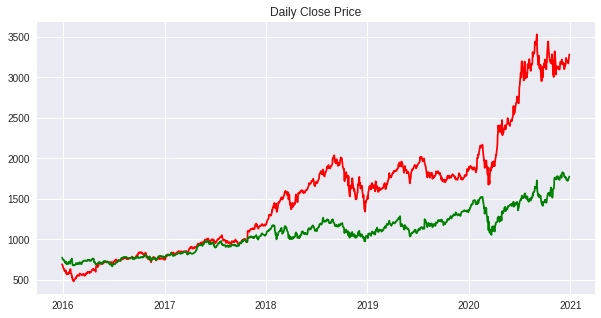

In [ ]:
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(amazon_data['Close'], color='red')
plt.plot(google_data['Close'],color='green')
plt.title("Daily Close Price")
plt.show()

In [ ]:
candlestick = go.Candlestick(x=bitcoin_data.index,
                             high=bitcoin_data['High'],
                             low=bitcoin_data['Low'],
                             open=bitcoin_data['Open'],
                             close=bitcoin_data['Close'])
fig = go.Figure([candlestick])
fig.show()

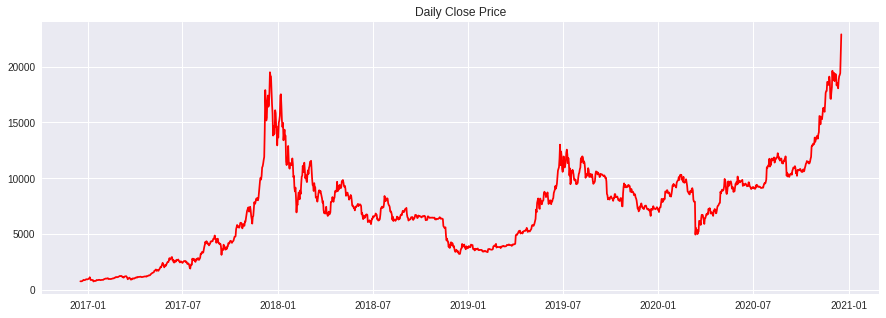

In [ ]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(2,2), loc=(0,0), rowspan=2,colspan=2)
ax1.plot(bitcoin_data['Close'], color='red')
#ax1.plot(bitcoin_data['Open'],color='green')
ax1.set_title("Daily Close Price")
plt.show()